# Subject: Data Science Foundation

## Session 6 - Introduction to descriptive statistics

### Demo 2 -  Descriptive Statistics For pandas Dataframe

## 1. Build a data set

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
df = pd.DataFrame([
 { 'name': 'Smushface', 'salary': 1200 } ,
 { 'name': 'Jen', 'salary': 25000 },
 { 'name': 'James', 'salary': 55000 },
 { 'name': 'John', 'salary': 35000 },
 { 'name': 'Josephine', 'salary': 25000 },
 { 'name': 'Jacques', 'salary': 15000 },
 { 'name': 'Bill Gates', 'salary': 100000 }    
])
df

,name,salary
0,Smushface,1200
1,Jen,25000
2,James,55000
3,John,35000
4,Josephine,25000
5,Jacques,15000
6,Bill Gates,100000


## 2. Basic statistics 

### 2.1. The sum of all the salary

In [4]:
df['salary'].sum()

256200

### 2.2. Cumulative sum of salary, moving from the rows from the top

In [5]:
df['salary'].cumsum()

0      1200
1     26200
2     81200
3    116200
4    141200
5    156200
6    256200
Name: salary, dtype: int64

### 2.3. Count the number of non-NA values

In [6]:
df['salary'].count()

7

### 2.4. Count the number of NA values

In [7]:
count_nan = len(df) - df.count()
count_nan

name      0
salary    0
dtype: int64

### 2.5. Minimum value of Salary

In [8]:
df['salary'].min()

1200

### 2.6. Maximum value of Salary

In [9]:
df['salary'].max()

100000

### 2.7. Range of Salary

In [10]:
df['salary'].max() - df['salary'].min()

98800

### 2.8. Frequency table of Salary

In [11]:
counts = df['salary'].value_counts()
counts

25000     2
35000     1
15000     1
55000     1
100000    1
1200      1
Name: salary, dtype: int64

## 3. Central Tendency

If someone hears we have this data set about salaries, they're probably going to ask, "how much do people make?" They don't want a long list of numbers, they want a single, solitary number. We can get most of the way there by describing **the central tendency**.

Data in the world tends to clump around certain numbers - the average height of a man, or the average score on a test. This is called the **central tendency**, and is usually just called the **average**. Luckily for us average has like *two hundred different meanings*: **mean**, **median**, and **mode**.

Double-luckily for us, `pandas` can compute all of those for us with appropriately-named functions.

### 3.1. The MEAN

The **mean** is what we've always thought of as the average. You add up all the data points and divide by the number of data points.

In [12]:
(1200 + 25000 + 55000 + 35000 + 25000 + 15000 + 100000) / 7

36600.0

But like I said, `pandas` can help us out here with the `.mean()` method.

In [13]:
df['salary'].mean()

36600.0

Does that look right to you?

In [14]:
df

,name,salary
0,Smushface,1200
1,Jen,25000
2,James,55000
3,John,35000
4,Josephine,25000
5,Jacques,15000
6,Bill Gates,100000


The problem with adding everything together is **Bill Gates is exerting undue influence**. His salary is an **outlier** - a number that's either way too high or way too low and kind of screws up our data. He might actually be making that much money, sure, but by taking the mean we aren't doing a good job describing what we'd think of as the "average."

Because of how it's calculated, **the mean is susceptible to outliers.** Because you need to be so careful with it, the mean is definitely not my favorite way of getting the average.

### 3.2. The MEDIAN

The **median** is like a new, improved mean, in that it describes the central tendency **without being susceptible to outliers**. To compute the median you do two things:

1. Order the numbers largest to smallest
2. Pick the middle number

In [15]:
df['salary'].sort_values()

0      1200
5     15000
1     25000
4     25000
3     35000
2     55000
6    100000
Name: salary, dtype: int64

We have seven values, so it will be number four. Count up the list to discover it: **35,000** is the median. I'll prove it, too, using the power of `pandas`.

In [16]:
df['salary'].median()

25000.0

See? Told you!

If you happen to have an **even number of data points** you won't have a middle number, you'll take the **mean of the middle two numbers**.

My favorite description of the median comes from [Statistics for the Terrified](http://www.conceptstew.co.uk/pages/mean_or_median.html)

> We are all much more familiar with the mean - why? People like using the mean because it is a much easier thing to deal with than the median, mathematically, particularly in more complex situations...
> ...
> Always use the median when the distribution is skewed. You can use either the mean or the median when the population is symmetrical, because then they will give almost identical results.

Which to me reads like "if you have a computer, **use the median.**"

### 3.3. The MODE

The **mode** is the least-used measurement of central tendency: it's the **most popular value**. Even though our salary dataset has a most popular value, the mode actually shouldn't be used with *continuous* data, you should only use it with discrete data.

Let's say our buddies are reviewing a restaurant.

In [17]:
import pandas as pd

# Let's build a data set
reviews_df = pd.DataFrame([
 { 'restaurant': 'Burger King', 'reviewer': 'Smushface', 'yelp_stars': 2 } ,
 { 'restaurant': 'Burger King', 'reviewer': 'Jen', 'yelp_stars': 2 },
 { 'restaurant': 'Burger King', 'reviewer': 'James', 'yelp_stars': 5 },
 { 'restaurant': 'Burger King', 'reviewer': 'John', 'yelp_stars': 4 },
 { 'restaurant': 'Burger King', 'reviewer': 'Josephine', 'yelp_stars': 4 },
 { 'restaurant': 'Burger King', 'reviewer': 'Jacques', 'yelp_stars': 3 },
 { 'restaurant': 'Burger King', 'reviewer': 'Bill Gates', 'yelp_stars': 2 }    
])
reviews_df

,restaurant,reviewer,yelp_stars
0,Burger King,Smushface,2
1,Burger King,Jen,2
2,Burger King,James,5
3,Burger King,John,4
4,Burger King,Josephine,4
5,Burger King,Jacques,3
6,Burger King,Bill Gates,2


In [18]:
reviews_df['yelp_stars'].mode()

0    2
dtype: int64

Despite the fact that most people gave Burger King a `3` or above, the fact that **the most popular score is `2`** might mean something.

In [19]:
# Import this because it won't let us display images otherwise
from IPython.display import display, HTML


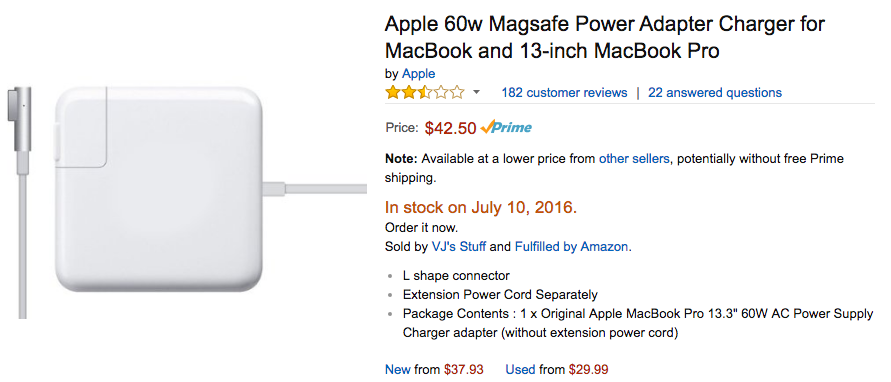

In [20]:
display(HTML('''<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA3sAAAF+CAYAAAA7nwN5AAAYJmlDQ1BJQ0MgUHJvZmlsZQAAWIWVeQk4Vd/X/z733MnlmudZZjLPJPM8z0Mq1zzTNUWRkAyVZEghhUSKRlNChpRkylCKFEKpVIZMeQ+q7+//ff/v8z7v9uzjc9dea+3P3nvtvc+6FwAOVlJISACKFoDAoDCytYE2r6OTMy9uHEDIHyMQByIk99AQLUtLU/A/lqUhRBcpLyS2fP3Pev/fQufhGeoOAGSJYDePUPdABN8DAM3uHkIOAwDTi8j5I8NCtvACghnJCEEAsPgt7L2DObew2w6W3taxtdZBsC4AeCoSiewNAPWWf94Id2/ED3UI0kYf5OEbhKgmInivuw/JAwD2NkRnd2Bg8BaeR7CI23/48f5/fLr99Ukief/FO2PZLnhd39CQAFLU/3E6/vcSGBD+p49dSKXyIRtab40Zmbcy/2CTLUyF4IYgN3MLBNMj+Imvx7b+Fh7xCTe0+60/5x6qg8wZYAYABTxIuiYIRuYSxRzub6f1G8uSyNu2iD7K3DfMyPY3diMHW//2j4rwDNWz+YN9PI1Mf/tMDgow/4MvefnqGyEYiTTUvWgfW4cdnqi2CF97cwRTI7g31N/G5Lf+WLSPjvkfHXK49RZnAQQveJH1rXd0YNbA0D/jgiXdSdscWBGsGeZja7hjCzt6hjqa/uHm4amrt8MB9vAMsvvNGUaiS9v6t21SSIDlb334kmeAgfXOPMO3QiNs/tj2hyEBtjMP8Hs/krHlDn94KSTM0naHGxoNTIEO0AW8IBypbiAY+AHf7rmaOeTTTos+IAEy8AaeQOK35I+Fw3ZLEPK0AdHgM4I8QehfO+3tVk8Qgcg3/kp3nhLAa7s1YtvCH3xAcCCaHb0XrYY2RZ6aSJVFK6NV/tjx0vzpFauH1cUaYvWxon95uCOsA5BKBr7/XfaPJeYDpg/zHjOIGce8AiZIqycy5i2GQX9HZg8mt738/nzQN578L+a8wAyMI3b6v0fnhljP/tFBCyGsFdDaaHWEP8IdzYxmBxJoeWQkWmgNZGwKiPQ/GYb/ZfHPXP67vy1+/znG33JqMWqF3yzc/vLX+av1by86/zFHHsh/k39rwsnwXbgDfgQ/hRvgGsALN8G1cBf8cAv/jYTJ7Uj405v1Njd/xI/vHx3pCulZ6fX/1jvpNwPy9nqDMM/DYVsbQic4JIrs6+0TxquFnMievEZB7pK7eWWlZRQB2Drfd46PH9bb5zbE3POPjISc38qyABC0/5EFI+dAZTYS1hf+kQkhe5NNBYA71u7h5IgdGXrrgQEEQIPsDDbADfiBCDImWaAI1IAm0APGwALYAidwAJl1HxCIsI4ER8FxkATSwFmQDS6CQlAMysBNcAfUgAbwCDwGz0AvGASvkdiYAp/APFgCaxAE4SAixACxQTyQICQOyULK0F5IDzKFrCEnyBXyhoKgcOgolAClQeegi9AVqBy6DdVBj6CnUB/0CnoHzULfoVUUjKJCMaK4UEIoKZQySgtlgrJF7Ud5ow6holGJqDOoXFQR6gaqGvUI9Qw1iBpHfUItwgCmhJlhPlgCVoZ1YAvYGfaCyXAsnArnwEVwJVyPrPULeByeg1fQWDQDmhctgcSnIdoO7Y4+hI5Fn0JfRJehq9Ft6Bfod+h59C8MEcOJEceoYowwjhhvTCQmCZODKcXcx7QjO2oKs4TFYpmxwlglZG86Yf2wR7CnsAXYKmwztg87gV3E4XBsOHGcOs4CR8KF4ZJwF3A3cE24ftwU7ieeEs+Dl8Xr453xQfh4fA7+Or4R34+fxq9R0FIIUqhSWFB4UERRpFOUUNRT9FBMUawR6AjCBHWCLcGPcJyQS6gktBPeEH5QUlLuolShtKL0pYyjzKW8RfmE8h3lChU9lRiVDpULVTjVGaprVM1Ur6h+EIlEIaIm0ZkYRjxDLCe2EseIP6kZqCWpjag9qI9R51FXU/dTf6GhoBGk0aI5QBNNk0Nzl6aHZo6WglaIVoeWRBtLm0dbRztMu0jHQCdDZ0EXSHeK7jrdU7oZehy9EL0evQd9In0xfSv9BAPMwM+gw+DOkMBQwtDOMMWIZRRmNGL0Y0xjvMnYzTjPRM8kz2TPdJgpj+kh0zgzzCzEbMQcwJzOfId5iHmVhYtFi8WTJYWlkqWfZZmVg1WT1ZM1lbWKdZB1lY2XTY/Nny2DrYZtlB3NLsZuxR7Jfom9nX2Og5FDjcOdI5XjDscIJ4pTjNOa8whnMWcX5yIXN5cBVwjXBa5WrjluZm5Nbj/uLO5G7lkeBp69PL48WTxNPB95mXi1eAN4c3nbeOf5OPkM+cL5rvB1863tEt5ltyt+V9WuUX4CvzK/F38Wfwv/vACPgJnAUYEKgRFBCkFlQR/B84IdgstCwkIOQieFaoRmhFmFjYSjhSuE34gQRTREDokUiQyIYkWVRf1FC0R7xVBiCmI+YnliPeIocUVxX/EC8b7dmN0qu4N2F+0elqCS0JKIkKiQeCfJLGkqGS9ZI/lFSkDKWSpDqkPql7SCdIB0ifRrGXoZY5l4mXqZ77Jisu6yebIDckQ5fbljcrVy3+TF5T3lL8m/VGBQMFM4qdCisKGopEhWrFScVRJQclXKVxpWZlS2VD6l/EQFo6KtckylQWVFVVE1TPWO6lc1CTV/tetqM3uE93juKdkzob5LnaR+RX18L+9e172X945r8GmQNIo03mvya3polmpOa4lq+Wnd0PqiLa1N1r6vvayjqhOj06wL6xropup269Hr2eld1BvT36XvrV+hP2+gYHDEoNkQY2himGE4bMRl5G5UbjRvrGQcY9xmQmViY3LR5L2pmCnZtN4MZWZslmn2xlzQPMi8xgJYGFlkWoxaClsesnxghbWytMqz+mAtY33UusOGweagzXWbJVtt23Tb13YiduF2LfY09i725fbLDroO5xzGHaUcYxyfObE7+TrVOuOc7Z1LnRf36e3L3jflouCS5DK0X3j/4f1PD7AfCDjw8CDNQdLBu64YVwfX667rJAtSEWnRzcgt323eXcf9vPsnD02PLI9ZT3XPc57TXupe57xmvNW9M71nfTR8cnzmfHV8L/p+8zP0K/Rb9rfwv+a/GeAQUBWID3QNrAuiD/IPagvmDj4c3BciHpIUMn5I9VD2oXmyCbk0FArdH1obxoi86nSFi4SfCH8XsTciL+JnpH3k3cN0h4MOd0WJRaVETUfrR189gj7ifqTlKN/R40ffxWjFXImFYt1iW47xH0s8NhVnEFd2nHDc//jzeOn4c/ELCQ4J9YlciXGJEycMTlQkUSeRk4ZPqp0sTEYn+yZ3p8ilXEj5leqR2pkmnZaTtn7K/VTnaZnTuac3z3id6U5XTL90Fns26OxQhkZG2Tm6c9HnJjLNMquzeLNSsxayD2Y/zZHPKTxPOB9+fjzXNLf2gsCFsxfWL/pcHMzTzqvK58xPyV8u8Cjov6R5qbKQqzCtcPWy7+WXVwyuVBcJFeUUY4sjij+U2Jd0XFW+Wl7KXppWunEt6Np4mXVZW7lSefl1zuvpFaiK8IrZGy43em/q3qytlKi8UsVclXYL3Aq/9fG26+2hOyZ3Wu4q3628J3gv/z7D/dRqqDqqer7Gp2a81qm2r864rqVerf7+A8kH1xr4GvIeMj1MbyQ0JjZuNkU3LTaHNM898n400XKw5XWrY+tAm1Vbd7tJ+5PH+o9bO7Q6mp6oP2l4qvq0rlO5s+aZ4rPqLoWu+88Vnt/vVuyu7lHqqe1V6a3v29PX2K/R/+iF7ovHA0YDzwbNB/uG7IZeDrsMj7/0eDnzKuDVt5GIkbXXcW8wb1JHaUdzxjjHit6Kvq0aVxx/+E73Xdd7m/evJ9wnPk2GTq5PJX4gfsiZ5pkun5GdaZjVn+39uO/j1KeQT2tzSZ/pPud/Efly76vm1655x/mpb+Rvm99P/WD7cW1BfqFl0XJxbClwaW059Sfbz7IV5ZWOVYfV6bXIddx67oboRv0vk19vNgM3N0NIZNL2qwCMVJSXFwDfrwFAdAKAAcnjCNQ7+dfvAkNbaQcA9pAk9AnVBiegbTCaWGEcO56VgoegTmlO5U88S11HM0cnQe/JUMw4wSzGEsXaxE7D4cBZwvWDZw9vIt9zfjoBa8HTQs9EgKicmJf4+d2dEstSItJWMnGyFXKDCihFGaX9yqkq1arv9hDVlfe6aqRo3tZ6o4PXVdRz1z9rUGs4ZgyZCJgamPmZp1vcs3xp9dOG2VbOzsI+0OG0Y6XTM+d3++ZdlvevHQSuBBKbm4S7loe150EvT2+Sj43vHj9ef8h/PKAp8HJQQrBPiOUhZTJvKD70a9hQeGNEWWTm4diogGinI0ZH1WOUYhWPqcRpHTeJd0jwTAw7cSIp62RJ8t2U5tSutKFTb09Pn/mc/v3sYsbSucXMxazVHPR5ptzdFwwuuucdy88tqLzUVPjs8sCVkaLx4tmShVL4GlOZWLn2dZeKyBtZN+9U9lV9u013R+6uzb3Q+2ery2vqax/VtdY3P3jQcP9hVWN5U3FzwaPsltTWo21+7TaPFTtYO1aejD/t6Xz8rLXr0fOG7qqe3N7QPp1+Yv+LF3kDXoMKQ5ih4eGylxGvNEewIx1IfCm8mR7NGFMbm3h7elxt/NO7wvfWE/BE1aTd5MpU1ofdH5qmracnZ07MSs1Ofiz7FDQnN7f4ueqL+1e6r/fnLec/fDv6neX74x/pC0GLpCUvJI4mV9s3JDc3t9efH7qF8oNl4Rn0bUwc1hGnjpegECYIU+6ikiaqUlvRuNPG0hXSNzLMMtEyK7OQWJPZ7rGPcVJyyXHv44njvcLXtOs1/6IgpRCPsIKIkairWJR45u7bEl2SM9JoGT7ZPXLO8mEKaYolSnXKz1Xeqy7swapz7JXRMNMM0ErXvqXTq/tZH2/AZShrpGdsZ+JuGmR22DzWIsHyhFWSdbJNqu0pu1T7RIcoRx8nW2fdfRou+vudD0QezHa9RWpx63Rv97jvme91xNvBR9qXynfOr9e/PqA8MC8oPTg+hHzIhawZyhO6FjYYfjMiKdLtsF6UdLTAEa6jbDFMsbTHsMeW4t4f74y/nZCdGHlif5LxSd1k0xRS6vG0q6cenx478yV98exyxuK5H5nzWZ+z53K+nP95gfaiSl5QfmlB96WJwtnLU1feFr0q7it5crWxtOFaZ9nn63wV+2/k33xVxXjL/HYycnqt3Jes9qjJq+2vxzyQbzj48ERjaVNDc+Oj6y1nW2PaItvjHqd3FDwpfnqp88yz8C6b5xLd6O6Rnju9aX1+/VYv9Ab0Bq2G3IbDXya+OjkS89rrjc4o++jcWN3bk+OO7yTe499/mGidLJg69EFzmmp6YKZ49thH308ecz6fA7+EfA2ZD/lG/h7xI2ohctF3yWCZZvnuT72fz1acVz6v9q5TbYxsr784aINMoJcoTxgLp6PF0T2YaKwUdhZ3Fe9DIUWxQuikLKSKJFpTy9JQ0yzRvqJrpi9nyGSMYfJmtmZRZxVlY2JbZ5/h6Ods5KrkLubJ483hy9qVzp8kECFIEtIT5hX+KdIlWigWKm64m08CJTErOSz1RLpe5rpsrlycvKuCiiJWsUcpW9lRhU3llWqBmsceWXWs+tjeao10TR8tXW0hHVpdoPtDb1p/yOCBYY6Rp7Gg8bhJrqmFGc6s1TzBwsiS1fKjVaN1po2PrZod0W7M/qbDUUdjJyant85l+4KR+39l/8MDcQd1XPGufaR8N3/3PR5UHiOe17wOeSt7r/s0+cb5afoD/+aA44E6Qeig9uATIVohPw9VkJ2QO7s8zCJsITw3Yk/EWGTcYa7DD6Nco5mjR45UHE2IcYwViV061hqXedw7XjdBLJH1BGUSSFo4OZH8PKUq9VQa6ZT8adzpkTO30lPP+mcYnKM/9zhzX+ZcVnS2Vo72+eQL+IupeZMFbJdkC1Uuq1xRKJIqFinhu8pWSneNUEZRToNEkvoN15snK29Wvbi1fkfkrvO9c/f7ahhrnery64cbMA9FGw2a3JqPPbrU0tj6tm3zMV+HzhPvp6c6bz8b6troFu3Z13u+b+yF7MDpwS/DNi/rRvheZ49KvaV+FzmZNhP12fz70orV1vrvfA+3VbBIdpqJ5Jn2p5E6C0BGDZJnPgCAhQCAJREAWxWAOlkJUAaVAPI/8ff+gJDEE4/knMyAB4gCeSTTNAXOSOZ8GKQgGeUN0Aj6wQewDtFDopAmkh+GQqeRfLAdmkBBKD6UNsoDdRLJ8vpRqzA/bAZHw2XwMBqPVkUHoovRrzD0GBMkI2vFQlhNbBy2BYfBGePO4l7i+fAB+DoKHIUDRRnFKsGMcIWwTGlOWUaFpnKjaiUKElOIX6htqRuQTCeDFtAeop2kc6Lrodenf8igzFDNqMrYymTNNMEczoJlyWEVYq1lM2ebYU/mkOGY4CzkcuMW5/7J85g3m89jlzw/lv+1wF3BdKEAYRMRcVGi6LzYoPiD3ZckYiVdpFSkGaXnZZ7LXpdLkfdRMFaUVGJS2lT+rDKm2q/WuaddvW1vh0a35ojWjPaSLtDDIucc3hBvRGFMZcJoymcmb25uEWSZZdVgPWVLtJO3d3KIcbzs1OY87UK5X/qA/cGjriWkbrefHgKeNl4nvBt8Vv10/C8ErAS5B/cf0ic3hMmHV0VKHL4dvedIb0zwMc64ofisRNMTSyezUnantp/yPMOU/jbjeeZo9mYu70WVfNNLBy9HFV0uGbkmUX75hnTl+O0r9w7UUNZVNuxvEm/hadd/UtRF1SPStzSQMSzyqu/Npbfn3/d/cJ1d+Uz/9cZ3sCC9pLK8uZK6Wrs2sP5go/hXyKbS9vkBbX/nQA84gBCQBRrADLiAQBALMkAJqAM9YApsQMyQFGQMeUEJUBH0CHqPQqOEUaYoMuoiqhX1FeaETeCjcBU8iWZHW6PT0O0YCKOOOYJ5gFnHamATsE9xtDgn3FXcd7wWPhP/gUKNIpNijqCPrPk6pSPlPSQTJlMNEFWIl6kpqQ9TT9M40XTT6tM20+2la6LXoe9ksGEYRTLTVaZ0ZjHmZyyHWJlZq9ms2D6wR3EQOUo4NTknuTK4jXmoeUZ57/Kd2eXLry3AKvBJ8KHQWWEvEW1RQTF6cfxujAReklqKXppOBi+zIjsjNyzfqfBI8ZFSp/Jrle9q1Huk1a32+mqEaZK1fLQddQx0VfTk9ZUNDAwPGsUaXzHpMJ0357DQs/RH7rQsm/O22XZZ9pcdmhy/OSvsi3N5foD7YJhrjxu/u5dHtud9r27vSZ81P2Z/uQDbwIigi8HNIR/JLKH6YRHh1yJGDtNGmUWnH3kZIxQbc2ziuHcCbWJnUlgyNuVkGvpU8hmO9NaM+EzHbJ3zahfU8tQKVApFr6CLHpdElHJce1juVsF0Y7Sy/VbPncX7MjVH65410DTqNpNbSttmO7Sf3umS6c7vHe1fGPg2NP1yYmTmzcJb6B1hgnFKYNpwNmdO6Wvqj9LlgJXutcT11o2FXyvb649Cdj8d4AYSYC+wAl4gBuSAW6ALfIQoIHHIDCJDuVAz9BHFjNJFhaFKUSMwHWwEJ8LN8AZaDR2NrkevY7QwqZhhrCj2OHYUtxdXhMfjg/EDFCoUBQQUwY8wSKlL+YBKheoR0ZL4gTqeho+mmdaFdonuLL0E/XOGIEYiYxmTNtMb5igWbpZu1jNsbuzaHGKcjJxrXKPctTzneAP5THdJ87MKYAVWBL8JfRX+IbIhRi0usFtTwlUyTqpAulbmhewPeXYFI8V4pVYVKlUXtVvqOORdtVFrl3amLrNepYGzEZ1xn+lF82BLO2tZmxE7Z/suR0OnF/u8XH4eSHCFSCFugx5KnvneFD7H/Qj+xYFmwSCkhhwcxh3eGhke5XHkS2xJXNTxofj1RNQJfBLtSbnk0JSBNLtTs2eSz0pmvMpMzlbL+ZZbfvFAPqHgWqHS5YdFGsXNV3VLO8ssywcqbG/0VupX1d0WuXP+Hv5+TPV6bUq90IPeh/FNis2zLfltFo/RHQ+ehj4T75rsvtTr2M/4on8wfdj45ebIjTcWozNvw8c33sdPwlPx06iZhI/oT8fmvnzR/xo1X/Dt9PfwH7o/lheuL5ovvl7yWVpajlie/enys2dFZ6Vilbgastq/prCWu/Zt3Wi9aH1tw3bj5i/4l+OvG5vQpt3m9a31D/WSk92+PiAqbQAwY5ubP4QAwJ0DYCNjc3OtaHNzoxhJNt4A0Byw89vO9l1DC0D+2y3UKTYY9+/fWP4LzM/MbdbhuTMAAAGdaVRYdFhNTDpjb20uYWRvYmUueG1wAAAAAAA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJYTVAgQ29yZSA1LjQuMCI+CiAgIDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+CiAgICAgIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiCiAgICAgICAgICAgIHhtbG5zOmV4aWY9Imh0dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjg5MTwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBpeGVsWURpbWVuc2lvbj4zODI8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICA8L3JkZjpEZXNjcmlwdGlvbj4KICAgPC9yZGY6UkRGPgo8L3g6eG1wbWV0YT4K38X1tQAAQABJREFUeAHsvQ10ldWVN/7jMxeqhqASZCQvaInQJmPsCl2xCeAk619oaBkN2DF8LOEd+p/wMU0s630R6QRhBkbWu1JDByR9JyO4EGKLRMuQFLpMaiBo/pDVRm4qcBkBA4NJVMxVC5cPvf+9n/Oc5+Pm3psPEr6yj948z3M+9tnnd/Z5OPvZ5+zTL0gBEgQBQUAQEAQEAUFAEBAEBAFBQBAQBG4rBPrfVq2RxggCgoAgIAgIAoKAICAICAKCgCAgCBgIiLIngiAICAKCgCAgCAgCgoAgIAgIAoLAbYiAKHu3YadKkwQBQUAQEAQEAUFAEBAEBAFBQBAQZU9kQBAQBAQBQUAQEAQEAUFAEBAEBIHbEAFR9m7DTpUmCQKCgCAgCAgCgoAgIAgIAoKAICDKnsiAICAICAKCgCAgCAgCgoAgIAgIArchAqLs3YadKk0SBAQBQUAQEAQEAUFAEBAEBAFBQJQ9kQFBQBAQBAQBQUAQEAQEAUFAEBAEbkMERNm7DTtVmiQICAKCgCAgCAgCgoAgIAgIAoKAKHsiA4KAICAICAKCgCAgCAgCgoAgIAjchgiIsncbdqo0SRAQBAQBQUAQEAQEAUFAEBAEBAFR9kQGBAFBQBAQBAQBQUAQEAQEAUFAELgNERBl7zbsVGmSICAICAKCgCAgCAgCgoAgIAgIAqLsiQwIAoKAICAICAKCgCAgCAgCgoAgcBsiMPA2bJM0SRAQBAQBQeAaEPBWlMN7KUAUEpCTkwHPNdDqblFfVTkONgGpOTlIju0ulejlmrxVqKr1gVvqiY1HUmoWJiZGqMzvQ1VVPXwtfs6MxKRUpE9MvA7Y+FFVXgE/1RQIBJCcNRvJ8ZHb5ac2VXiN3IhNno6s3gIvMgs9nBKAt6IMJWUVaAl44CHsF6wrQlbCtUul31eLivpWohme5ZjYEUgYl4zkhAgyEb7YrRvr92JHhdeQ6REZOcjoBsaG/NW3ID71OssejY2IHXkdesTf4kVVJb1P6uvR0mK8UZCYkYXs7GxkJIYOWD9qaUyfCMQie/Z0hKZeB3ZvsipaULGlBGUkewEajJ7YdKzbtIj+9ZHQUwj0C1LoKWJCRxAQBAQBQeAWRyDgxeRRU9BoNqO07hxyEiPMhnutqQGUzxqFhdVAEdW/oMfrb8KWuSlYVtm+AUn52/Cfq6bDOb1vqi1Gyow17TMjH3XnVqHH2XPWFPBh1qg0EBRGSFpbg/2Lkp05HPcB7CDclpqZM4tq8PqCSHkdxW7iW1/5XKQtdHfU7lPnkeHsoG7y79sxC2karGg0Mtei4fXbf/Lp3TwLU1aawpNdinOv5nT5Y4ZvB/XX0kpcP9kjxWnHesxY6kPNudeRfN1fVfQuWRj+XWKJVPZa1JUust8T9I6dRe/YamTeGJ4txm6GG3rXz6V3vWuIF+LU+QLXO/hm4PRW5kGWcd7KvSe8CwKCgCDQwwg0VZVZih6TXlhW38M1dJKcOWmL6WT2zmfzY8tke3KWV7QNNTW7UZitKDRumIcttWS906Gl1lb0kvKwc18Ndm7MM1M3IG1ZuWEZ1Nl7/Eo4OL/8N64sR0ukSvz1KOG5epLK4InpefQiVd078QE07jBngUn5Bva7d+/rOUuvRyObhLzCQhRav3zk5+VqGIHqlUhZUtG7/dw7AHaBahPKtKLHpSqLcTCioEUhS5ZXDtdL9gK+ClL0SrhGXH9pb8Hm79vvEiTlYuO23fQ+qcHunaXINcchKlciba7jPeGJMcf0jeDZ6J6b50/gBMrNIZ6ZtxH7avZh975sUfR6uIdkGWcPAyrkBAFBQBC4dRGgJYPreeLkCBuK4V2ecf2/mDtY6MnbgLccy0yzZVHNKSwwlzkmv3oOCeYX5jUltSjImG5UW1vynKo+qRBH9xeoSdrEZBxNGI0JM1YCZQtRVZiD6Vpv6Elmw9LagIO+5WGtrU1VlUpR12bZsOVvpUjSdE2lf+2m5bQk1Xzo6SZkF2BdQU47qqvWFWLH3AkgQxX18xacKJp+24yD0Mb6D1fAPfIbsbnSi6yb3DLssdbgkpLZS+IRipV+9m5ZgpXmWMsrrcG6HKcVPRkZWdnILZ6LGWvoC0z1QpR5s+l942bykibWV6+k+KrPA5lYVUhL1N3w9FVUerzdouz1OKRCUBAQBASBWxSBpipTEUrC7rpNqEqbgg202Kik0odNOYkhjQrAd7gerZ4EpJLCdKKqCrXeJlyi7+sjxqUiK2si4h3/cAdafKg/0YoRyalI8J9AZVUtmvyUOzYByenpYfa1hFTneGzx1lL5etCWPpooxCCB9tplZ3Ru/1x9+RaDUlL+bkvRU6Q9yF5OX+Nj65GUlaCiaAllyQY1m8tfl+uysMVnzEZR0koDr7KDPmSlX6L2+ak94zDRtanOD2+tl/bc0Q7I1Aw4t0EFmryob/IjdgTtC4u0V1BxYvxNIktBI7Gzo+oEKXvOiSUnk6Je7J6uO4qatwE0eetR7z2BplZlvYwZQfgnE/4unnVJ4l33q5/4TCaceQ+n7zC8rcC4VGcfszwcRH29D62XaAobE4tx1NcZqcmIdciBotwxHywv3hNnCB9V4oz3IA77aWJIspVoCRbt56utRG29l+SOpowxI5CaldUlWTKoB6D2bepmW9d4zF5XSsreQoqphreJ9kw61uz6qf+qTDnmIiMSSO6zM2y5D7TgcP0Jg7fUjGSXLtJEMkxdj1gqk+wWCmoPNZrGRUayKYdEu1Myb9bnSUim/U60/668HpeoH1IzaN9Y2P5lrjkEULuVPlxQSCrcjdLkKqQ9SSN/WQl8CzYhdOQbGemPq/0xCcjKyUIM1Rc2BEiWaD+b12vKB78nEhKNsZ9s9SeV1G3gMZFAMk374LwMFPXvuNR0ZDnGOctIFe0vVqGM7nPhT3CPvwDtpausrCUaJCHEWrs+Mgo73mUJAVSSNdl7KQbJNF6zQ/rNrIz49GL1MjajU8jdFqLoqWjWPjMK1iF3TRrKKGrZ6krkvu5cGktvLxobTbUVtHeU5YRaOWKcIcMuTExyAX8Tja96nPA1gV6dJO/07qP3QHq6Q+YousV7GCf8HuKfpKCyHFW0hzeBxmK2QzbVfmV6L10ibGOSkTU7G8n0Rq2lgc3vb3uMqcp7Q/5afF6cOOMlSeXQCu/BwwiQeTbB8V5xyRjl6rH+M+rsQ394z54EQUAQEAQEAUHg0IuTgnFxccG4SS8HLxIc1nPci8HmUHguHgnO5LwRf5OCez5kKioc3z4zSt644KTn3zLqVLkvBnfNUbS3H7dpBImL7WZ8u3onPR880qZri3T9MLjC5HfXhypPW3Nz8Pjx48EP6douXDwenGPknxQ8EIb2ke1zVJvm7Ar6dpn3cc+7sLp4fLvV7sV7zErNinQbJ718pF3VdsTx4GKDhxXBPbteNGm56zDyNr+l0ibNCc6ZqbCbs/24TYba8vykKP21Yo8DfyrWfKCD/o0LvnxE982HwRcj0p4ZPOCEtpN8HHnZlMVQ+XrJxIr4U7i0b9OkFbuCYbrLxsK8O75rscJs5i532505P9xl9Z8ti23BXc9Hlufth8wGO8q65UfLFfG+eI+ztuCHmqdJ202eOi/zTllzj4/FQbfkuaoMBtsOBCeZOL/EfXrxkPX8oqvz7HIHXorcfq7bKXsXj++x6Ln5Un23Yo8tp5HbYPYzjXP9Sjjycvu+j4tT7y7m9NDLZv+GylDcpOAu58siyrtsj1N27eYTZC+ZcjEp+FaEPDp785EDwQNHjgfb9HAJ6jEdjn8VF4r78T3PW3IYDkP7XXsxuD3CWFTvn+bgy+b7IRwdjnO/j3pL/i4GX27XL6rthgzSCO7UGGOQu9F/um/6ylX27PUhxV6aKggIAoJAZAR82LpGWbFyl2cZVoiJtLxNhTX0dZjMH85g7TsxI7MLsa+uATW7N5p7nRoxL2W9vb/M2h+l8heW7kNDQw025qmNLY0bnsSaqmibhGgj/xJzSR2RyC4sRU1dHXaXFiqCjRswZexmw4JmctT+Qh77lKEoCf76cjw3eTjGTpiAtLQ0pNB1+PC5qPLZ7Qw0NUJtJ0nGiDAbgmLM/UlsFhqdnmfWtwGNjmY01ZsbUii1jJbFWYGshnqvSkHWOCs62s249CzkGhl4KafNJ0f5DioLR25eHln99GYhm1rVsjSYRkrkb6R9ioRdzW7HvqKSeag0rWhsJdw8YQbZslQoLOV9SLux1tqEpOL1lkDfjuegRCcTazmv0S9rTTmoxoxlFRYjneVjXPYmbNtG/Jklub93btuGfdMZKx+WEH9sLeHA/NXV1aDU3HjZWLIQY4trVWJn/pJ1pZ3x0SxXW77DvEtCgmmB8m7+eyzcoK06a7G7pg77dm4kdxsqLJ06ARWMZUI6TOkkL422UAR89aZcUZ6yg6ZMctkA6stVq3IL2AtuV2Xe3YqkzFyDp8yivKieDX3WPt08TOd1dJ5kFJh7WNcUV7F4u4L/8GbM0Pv7Mgup/bRHTY9DV05+aMKatHnmPuBMY09bnUs+gJJ5G6hHdXC3gfu97mgDdm/MUxlonKetUX07Lst+f3Bi/kaSkd3pRl/6ypdg6jJTQujdxH3E8q6a1YiFU34Ea2tu6LssKRvZ3JlJG5EVYXl2S9NBxQ8yMDpCHjMD4pMzyLKaGMbCbebIzEMp7UXdXarHDLBmxjIbk5YKpBFGRsjMx7bdNUre1+rRAcxbX6WrAy22cIQkZOdyYzKRRysWDhc/CW2QzDTeoTXY5qDDBRP0wO5V+aOVFPRO2eaQm8LSbTTmd2L6OA86PcaY4W70HxfrU6GvaLXSTkFAEBAEBIHICLQd0FajmcFDllmkLfiS/kq8+K2Qwo6v0zO3uy0pH+6xvkKvMK1ZlhWFvua+7PyqTlTfWqGtOCtMC0R7y97F47aF5aUQa8PFD9+yLAehX8TdTDt4tr4qTwrO1G004/RXcrvOOUHLiOUgaLXJsAzZWK2wzAH0ld31FV23jz9Gv2xiFMZK56gjaFkBFtNdMHhghfr6PVNbuIy8dt1vNbcF9yxWeSzriuPL94p2Zgjb2qktV82WLMQFt4f21fO6ryjNNLEc2W5aUCa5ZaTtgLZGrDB4d36B7wwf3DRt/dxlG3+CFu5xc9xWQ8r/4Vtajska24HFxaazOLjn0KHgoQNkgaHfIbo/sGdXcIWz78h6axhmyKKorWAzXzxgoG/9IZwta+MKhcURbQEznznvkZe1FVj1k7YyO/HhbrLlLy7YGZl35l+8PZq12OKYbpqDL5py75SptkPachUXtMTZKGbLWhxhYr0qKM1Zv5Y9p6Wuvejp94Q9vlw0QizeHzqsW5aR3LKeqvFhsEjWY90PM18K6SN6w2gr9CSr/+z8zjZZhjiDqPuPJTtaLtzJHTyFr48L2e8Fuz32qogVrlUDnP/DXSvUe8SyTtvvzri4xfZqB26MQ3bnhMhH81t6rNpWWWdf9J78aSzs9jr57MwYs9+RNJ4cMhmt/xi7vhT69ynNVhorCAgCgoAgEAaBAKpK1hjxSfkFmGhtu4lFzqp8lb9stf0lPIRC6bocc5O9mZAwHbtNi52P9nq5Arl0zw05+y0rf5WZhfaihJoRdApZ4lTIQ1aq+1O6h/Y9mdUZe+DMjB1e2KnCufP78fr+8zhVU2p5X5z3M+U5z8ObfIxQqfbIhFCMp70tdohFVp6yG5RU1qto9jSnzWNGTIm1B81bpaxdSWuzXXsBbXqhdwrH1CfWGgnVTq+c5DFUOYpYi9T4WPA2HFcgS82mBrJskHWj0GWqCNC+Kz9GhBgC/a0m/3nbMDu0r2gPUkh2BFpNi2Xjajy3pQJeX4thDYrNWIXz58/Tb53a99VFPtjSpUPAumcPnabFJjeX2qtzqGsCWT/ZjkG7G2lPnF1epUb6W4Z5U6di6owZmEG/qXQ/Y95C5dnUKJKHmk1qr1XA32paqbKxKi/DTZDaV7jTHC8l5YZlZlyW6filpMq01PhRv8W29jKBKnNjop/28RniklRktKup2zKfjTyXsxA3m86ngO8gzJGPRY4ysRNz6GARFdaXHXYUacFBtQAAG8mSqkcIZ/Ak5mCbbWwyynBcA1uRa466rWS0h4/37Kq+om1jjhrUbS4KQ5zDJEzPs3jym33Lx+upQEJv3gea6i2r7+zpzjHKOWlv4QJTQmpbdRGTBrBxud0mt43RytKjN+0wpP2zCkIvzpjG4MScTYYlr+ZooetdEaB3q9+ywrVnK3Njvu25lhpjy24e1s127/mNzyrA2pCBfT3kz+ba0X9dHGM2jevff866b+Z7cdByM/eO8CYICAKCwPVAoKXeOueoccNzKI7NgqGjkbJzqXyDyUEjSip8yJgd6q4hG0kOpxWa3RHkmIMn3NXlJxBwTCyyc5LaL5mLH21McMpocZtygqGpOK56yST5DEwbVeJIcN9WVjZSfZ1w1pK30+VUITY5Bzt3ejGBHFOgupIOPJ6NcZaimht2GWcLHWBuBHNWmEgHUZPPel6vCd+m6Ug4oSbvvFxqNnZgIXnl44l9TkIMKtlDH4W8LPeky4iM9Icmsx52koKVVIvtldNLy/A4ZG/Mck2+nWTiyRlGLDur2FJsOHnweStRbU7anfl4xtxIXj05ZI5zrQdT2cgBTRbdOYsm83LfNezEhGRk2TzLq2N23losyOXDtW06nedDVRf2r1bwyuZhlKn3hct3sLEJsxND5TVcTlqxl5mJEY6k1tZWcmqRhRxSKJ3Of/zkUMIImTmg1WbtQvxo3Z9+XOL+Skw1ZbsEjT5SehN8qGDwyLvrToLtyYVrUFblJQdI7EzD7Me8dKMfW7oo8zYzCYbjD/s58l19WbGZ2IjVG1bDS1oXTbvJmUkrSZgKjWtomWXeq+qcOJqIK50qG6lOxzJm3nFZpKqUOTvFQ05EEg0HM1vIgVA9OdPxVla75Mcs6r5kZ4VZehqLZP6eQuJZSc6gZtPSyPDB7piFKXSGW/hMNM6r0BTIsc+/o3y0IrCTgVGi0NRiOFaxa1TRnf0buVwjWlih5aXDtAQ+kRw4sTOi4hJ2sORDZbV6f0Srx+n3hvO1NprvK/L05JR1RYOwzSJtjz1A6XAd5E9X5bx2dYw5/0HpfP85a7z970XZu/37WFooCAgCgkBUBHxVJY70Rqwx9+45Io3byqVlaJm9yvV1mWde7NgxsjNJNTXUtCrZjWM7z546tQeu7uraETSnaCh8IrVdWnx6Dlka2P+osjRYXt0j7QTUkyFdJ+3RYmvIBrIrNDYV4VKtmlwlk7fQLGNnVjVN7E9gXTrn4ZCH1DCKspEU6Y8nEQvyCHXqMuWVMwFVxtkAwIIsnvxqZtwEvFvmYkqYU+QzaXNSNU2+XcG0KLSGJUWTdzaMOIqw9eZcw2iUlWzAshKlKDK9yhJSSumHXDqg27SMdYkPF1P6wYMRhinSMSnVSSHXThv2Mkvxe5eXxBBCzketDFSHn+Q7IVNZE5FD/VVG/VVFymfWJfoAwvSyUkFGSBV4315RMqrMTZU55HGyS8FZKRfMJo+3nSFAHiW1t1nO3kj9Fx7VSmylQ/fWkVU40NJqdn3AUHI6rsZPx1eMVcdXuDLTXrJM2hPrkCNXcmV4fHWe0Cbr+K5dSSF3FaCzFcMosK4s5kPsCH5/kKw3lsHrX4QMp4kzpICfjntZX9aEVFJg3d496UNZZ+rzH8bcsVO5NndIykRmY7XqjzBaY1aSWwoCZE1Vwd1qTTR2RHsVUKdFvYZ2RmflLxLRLo8xTajz/adL9JWrKHt9paelnYKAICAIhEWgBWWmspCUV4qiXHKAYa+Noq/KHlw6UY4ZC1k92YDywwVYZK/zpDha9qT/cXbSNycWSeR8xDkPyR4XZkIRuGSqU5mmE4zQ2YODcOZGnHt9toumI7XDWz0nO2EcPaCfzGJsitG3fE2gCSldKum/RnK7nxiimLV6lZUnk5yGqDbGk+OYJGwgZbmKrGMtB9VMNouWQpIDfEWZrIEV5eakKz87olt7lTn8X2MpJylR1WW18JHTBWMZnrn0L2yJpnJb0WNnFbRUbVxCPFlvYonvAHbMGoWl1qSblKkM0ubIcjAinOIYaEKVldeuzZMwEQvWvUq/AFp8J1BPVoQtZLUystJZhOXU1tmeyi7wYdN23wXQekKpJJlFNXg9ZKmfO2/PP3noeAcjZDql2llPiAxRUiphDlomXUbHWGS1qA8A+WTR9cQGzI8DtSQTo2GmID3BSY/uOynzVs3WTQidkMcWWiaqFIgkbNxdhGQax86iHs8lcoo0w3DsU0LHBizPWoBYcv5jGtfU0uZIMJh1NZU/Zyl62fmlWJ5Limj8CJI9KkjK5txRU0weQpjLjA+ztNN+NWWN0+bdkHKux2zUnHu1C2e3aWXIRSTsQzwdZcCrHhvpv7IqWvEQ8QMWLZFfbS4JLmnF0fPuIzjCEndFspMeW9HLJ2dEuanjED+C3in0bg54d2DUlKXujjPLO/uSo+JpubuhoNJfVvfcXUfHmIQb2JSvt+SPSYcL3Rljik7n+y9cvbdzXP/buXHSNkFAEBAEBIHoCARI+WA1jkPB/Bw6Iy4ZEydOtH/0nJGzgGxQKqzcEOqdrxLl9NXfHWwFMsHa96ZyGNZBd2ZSivSkkxSNcIoj5bcmJtXlqG/3bzpbD4aTN83hmLzaXKoUUod6VFYWvi8rq3dNbDmupfYN02qhl8HFI4utWBR2HDyhbqy/PpSZlhiPQ9tNpgkxh7JlC7HSmEkXYhzrlLT8kab8bD7B0pVlfIe12XrJn/HY6T+xE02vnI0ryZPoPKNcboFa+heOiFN3311aYHgGjDcUPcrtr7f2pmmMx5nL46pXbkCoE1a7r3RNLdgyS2G/2cjsQTyd/TU9pwCvn9vn2t/XVT50DZGu1Vtq29tcWYEgOWBZWB3Vu2skqtHjY2JNJaN6GSpCPKJyyXo24XFISrfOVIwly64hRmXLsNAQiiRkGUJB8pWvVIaVS1eS2kDFHHs4dX/QWuhrkHmDmzB/SAkpNkc+LcOdnTERyc5xT/fJ5EVywXJz5DcuszzVqk8kdP4mLet2Bz7rUcm2jrcVjkJsWpVD5xQmKEWPMvjrq0xFjyhajTVL0iHk7V8rB62PErGOMadK2DRsizydwUhnzIUG744lhnwMn1zs8IQamquD59hUy2Np2cKFqA19BZrF/d4yLDS+eNBnsdL5IasiOqgjNDl/H1bROZeJ/KHGbGR9uSlvofiFlqXn2HHm+4b6sjwUlxYbW13UItkr8qdraX/tzhhrT0VinAiIsudEQ+4FAUFAEOhjCBwso6/CRihEesTVYwnIXWtqPZW05ytkYrPhySU08dWTKj/Kn3vSVCCTaE9aKNENeHJ1hTVJ5yVOT/I+OQ75ea79MypS/U3IzjOdOZAr/x/R3iJdHalsh8n1v2mcRC4tIYoW0nOLVDIdlL2QlAU9GfX7KvDkPHPilJdlWtzI6cps2oNEoXrZFGw5rBtObVyiDkqmNYoozLbb6BmnHSyoapIKU80JXjzSyepnBz7oWk2b7bjO3iUi11ASdP4k5LbDWafxVbeS9u0YB1SbaX4fin80w1AyOKaqkZbYUohPp31qxh1Z4r7/HA4bZejg6arNak+jkab/sIVB3a9cvQWWGFBUCx3ermxwei7fNT50De4ruWxfbvYhKbs/csgSH8i9g/pJWasyaTVjZ6w/buodPXkS7eMUlqbRJJ8svjp4yYo1w/wAkE0yZPWuZxzozGpHoP1+JmvJ2oGLmercw9lTMu+o2L51TO7zaY9gpJCQ9YTlRGUhfSChBduYb8px5dI07LDGBB3MvnmJ6SjIQc1aOtiKFhsq8Hj7+xlrzIy87NmRaMY++WSxLU9+OsT8ySfNlEJkmVZ2T+wI84OCF41e5RgICVnYaL6uVk79e5di03J4B6bQcnQOSbmkkJsUu37xIKdop1msETMmTMbmisPkYEq1I0CyWEvvpbFTlpl5srHc8Z7oUn0amtYz1nuTy/sqii15AzmFauqIaHw6Sk1cltHRE+WHm4w3Q4uvCnMnaGxtIr0qf3Y17e66NcbaUZEIFwJ9yfWotFUQEAQEAUHAgUDbIevgbO0q3ZHqvm3WbtLjgjMNl+jaZbZyH28cxjtzjuWWnp/nOPzlW67KHUcezJlpu/FnN+H6sGRyQG653Nfu/ZmZDx3uwZn+zDnu+uJCj4Bwt8B8uhg84Dg+II4OWJ4ZkQ+j1uDzFs904HBIG0MPSucSb5nHIzCPLzpO03a6sw89TNtkLsxFH8A9x4EPnYNtHd1A+FO7bTfjNnZWn7YdsfrZwG3x4uDiOe0PxVb9qlhoO6SPhrD7l8s6f7pvXO0y+8V1nMWkl5WL/i7zYbdF16W4uxh8y9WHJGsh7XG2JQyoRpQlk5bb+kg53fFOl/SMxySSw5lObCa91M5FfvMe00U+53/xkE2QxqA+yiEuzjyiwk7tksxbfHWiPUde1v1vH3vgqNZ1a8uzPpbFPq7DkAcaE672Uxu17LnklONXrAjOcR5pYeKmj2Ox2mDGM/2ZIX27y35REJ96fGjZNF34O45/sXh0HbEy03GciqbhHmMuECI8hL6TjLocvOvnl+3zbBw8h6mPjo2YY5bXMm/3FbdxZnDFisXt8OZ4dUpKpDFjNsDxzte8hV5nbrfPOQltX7R3rtV3nZA/G07dXrccWrRMLKKPMZuGSzTsSvr8XX+X5icPgoAgIAgIAn0GAX+T6SyCvo23t8CFwBCfYX0tr95S7/jCnITCokLj63ojebFUlpxMFO2sw6th9rEk5Raah3OzcwaVO4msbXWnNrmteqZZxFpKROwkZK2iIxK2QZ/tXV2p6yNXJ/SV/RTt5bOsKSHs248eZKzajxrrMF/CQPORvRY1oXzQt/9V54/ah79bbUzCWmrjpuntbQPGHi2jwkykO6x3sYkZlpWkkPYudTaoNrlbFksu2vNMAvmLshyr4DyIpb2GHLTFDbHJeLVup+nSnayU5C2xzPCMQYdc7ya3+KWKUnWF3a+xExfg/NF9yM+2rZFJxgHatGfIoG4fMh47cREa+MBqMyv3iwkpeJ/W0f2018tgqOt86A51ygHbCbO4D7fZh1BXWp4+lOx1Zi8fIWW0pKtr6wyHNIyNaSVp5PYqSshbu5Pau6gdyfgMcsZh5sl1mtBjyeGOSSeJjjKwbcQqc1dk3lq+6AbLrNV5oeMfKhTHSWRN53PUo4X03I1mcjXqDdNtAtadq0NRnsk4jQmDGu1N5KMEOGjZi01egLqdjn4qKVFOWegg8d10JMM288yUitomsw59yUXRWtOqrvs2KQ87606Rfycnw4lYbsqvKqm8oIKOfzl/qoaWSltCaclkZh6/b153tVuNYvcY05xEu3L/nGvYR1i4TLdWEZb/ulPnscC1z5kPgOAQpj5qmkqzMUxe8B/YaWLBnpFKSsoMvDPzNqKuocZ8D1DfmFb7GJOsEyWLodiJeJ3eZ6W0h9YKdIg8H+q+0YzKSLD56h35s2o2blRtsa49ml0dYxHxdFfVZ5/6sbrbZ1svDRcEBAFBQBDoJgI+LBnOSxlzUXeeFDVaEORvobWVNONkxx+hwVe+BGkLy2jfilICjTOiaHkSn2WnJ4ahZaI9q/JMQNUXdmITjYCRpnjmVVIe2ovVER9WnaRsxNJ5dt2rs0OmejWDn46TCNBSMw95EjWcZISrjZZ3lpc3YkRqOi01DVkK6a/F8LEzqFR45xcaIw/1S4zeFximjk7xEaZc+yjqQ6NNLArhZa99mZ6L6Wx7e6JGXde1yXxPcOKgQcs0+cw7kijE05iIHPRY80Qd8wFfOUbR8lh6UeD8q3SUiUmfCkWWV6NS4sEYyEQ/hAn2QqnO5Yted0ixbjzaskjS2PPvCGqHcRwDyzlpdHTpYqA9lTtoCX1CMnIyQvcLt2D18AnG8vuNdefoyJL2xG+U/Ol6O3qndBGMPpVdvHH2qe6WxgoCgoAg0NMIkIJnTrJiQw92ClcV56XASp4+uUDFdO2vKh9tctkZejwho19nslKenqmzk5X1UjZWxMMp487qArSfa+Ey3muUhN1H9yPD0vd4PyYrehxSMaL9fLDTGHWGD1VPR3+p/0hLp2bdkHA9ZeJ61tVpMFkJ41+HBbo21vidol4rin6H5Em5iqT88IcN/vV+6GVZpDbEX0s7yJPu5qVLDatg0+6jKLAHNrx0nqraOU0W+whfvW6U/N2oentfXq5fDaLsXT+spSZBQBAQBAQBQeCmR8ATn2QsN+Wjr2dMGE5LMcl5TyxZBehw7WqT+/ydue2WKt70DRMGbx0EwnxIuHWYv0k59SRgOq1q5SXWa2ZMQHl2PnLTY+moQDoWRK2oJydZ6xwfd27SdghbXUZAlL0uQyYFBAFBQBAQBBgB5RCz84crc5mmS3zCk4SbGgHa18N7/BamPWl4tqzcsMZ1FlphaQ0K6IBtCYJAryEQxjtnr9XVZwjHYsHv6xCgoyJWVtIJgZUbzONhFADZ+dvoeIyMPoNGX2qo7NnrS70tbRUEBAFBoAcR4L1frLrpM5+ik6Y9Nawd0hIh+WgfHambKdXf5EOTXynoMXSgeEJivPTfzdRBtyEv/F7hPW+RlmXehk2+7k0K+FtwoqlV1RsTg4SExA73LF93JqXCHkNAlL0eg1IICQKCgCAgCAgCgoAgIAgIAoKAIHDzIND/5mFFOBEEBAFBQBAQBAQBQUAQEAQEAUFAEOgpBETZ6ykkhY4gIAgIAoKAICAICAKCgCAgCAgCNxECouzdRJ0hrAgCgoAgIAgIAoKAICAICAKCgCDQUwiIstdTSAodQUAQEAQEAUFAEBAEBAFBQBAQBG4iBETZu4k6Q1gRBAQBQUAQEAQEAUFAEBAEBAFBoKcQkHP2egpJoSMICAKCwC2KgLeqHF46FsFDLs9jkrMwPTnKGWp+L8orvOwZnY5RSEZOVnLvttqqL/yBDSNGJyE5+Xq7DfejtrwCJwKxyJ49/dY6XJzxLK8HElK71Xfeii2oahqBBYumIzZsz/vhrapCva8FARKS+IRxSM3IQEL4zOEp+GpRcfAEYlOzo8ti2NJdi/TVluPgiQBSs2cjmth3RFXGUEcIhaZf+xjys5zUt0Y8oiEmlo4KGZeM5K4IXyib8iwI3AYIyNELt0EnShMEAUFAEOg+AgGUzxqFhdUmhaQinNq/IMJEHvDumIUpS83MSRtxbv/sXj13LeDbgVFpSzts3sZ9pzB7Yhc0ig4pRskQ8GLWqCmoRiZqzr2O5PB6aBQCNy7JwrMbfef3bsHYKcuI+fDt9vvK8aO0hWgM07zCnQ10EHtCmJT2UT6SsTSSscyNdXh9dmL7DD0WY8t+Ud05LEjsbkfadAzWZAx13EM9MIa0nHRYWeZaNLy+CJ2Tvg6pSQZB4JZDQCx7t1yXCcOCgCAgCPQwAs45buMy1LcsQFZY414LqrSixyyMcBbsYZ4scnYdmbn5yBinFDq/vxUnvLWorFaqxdKpY5Fw9DwywvJtEeuZG0+Mac3zIKZnKF5HKiaeXey7ltotmDCDFT0O4drdhPWWopeEom3rkDrCj7Jl81BCXbTmyRQkkEKV0xmFynM9OlG1RH+puOZ+tMUUkDFkghvl0hNjyJKTJOQV5mCEVZ0f/tZWVJWUqQ8P1SuRsiQB5zZN191t5ZQbQaAvICDKXl/oZWmjICAICAJdQGDLQR+ycsJYVJoOYk0X6PRs1lys27QKoVz5vWRNmqKsSWXEd0Y4vnuWkb5FLdCCipJlmLemMmq7/YcrUGLkSMLuo/stpTt5/1GMGD7BkJsd9U2k7IX2YHuyiTmbcJ5+t3KQMXQdey+7AOsKctpVuGpdIXbMnYClLLplW3CiaPotZYVv1yCJEAS6iYAoe90ETooJAoKAIHC7IZCUlITGxkZUFh+En5Sm0EWR3qodHTbZ3+RFfb0XvqZWXKLcMTEjkJicivSMxLBf1ZvIOldL+Vv9nDsW49LTkTUxXF4/LgUoi9OCwiWSc1CQvRALaULn5/TQ4G9CFe0h8zbRpkQKMSMSkJGVTfuzQgiZ5Zj/qqpaNBn8kPGS9rZlZWcgQnazlL4E4K2th1ETtTuD2hE9BNDkrUe99wSaWm3+kpPTkeHaQBaA73A9Wsl2wTR5n1llFe2bjI1F7AjaE5eVFb49rrbHIpnandolExYtT6TJsrXEN0pj2JJiBJp4u62r8cham4k1K6tDuy4itUCLD/UnWhGbYO+3avEdxolWD5IzaI8o7dXaUVlFeMRiBO3LSk7NCsFLk6b9g7W1Br5KvBKQnp6FiYmhkk1iReIQaDpM+1EPopVEkfd7Raar6be/XvsY6qxM2HX37TFEONC4D/NqoIR4zF5XSsreQrqvpndAAMlkWW7xkiz5SZZSE+CtLEcVbVhOoHdUtmOcX9t7wO4buRMEbgYERNm7GXpBeBAEBAFB4IYjkIQFywtQNW8hKsMuQ2tB+TLeq5dEk6IRqKw09+1ZfAdQsfr7mLch3I4tzpSPunNkmdM6VsCH1aPSsMEq77wJyWskxSJGl3VmRQuamlREbEi6r3w10haGryF34z5smj3RQcmP8tV/j4UbQtulsmzcd5T2BEZbXkiK0XO097FE5c/eWEOKmYN86C23//vU/khw5W3DuXXmsrPACTw3dQZNVyOHtbuPYpFDy2qp3UzLLle6C6zRyzApOgQrd0b7KWDocJnYuHsTpifUY2zKPDvRcZcwfRXOn1/liNG3TSgnRY9DOF1c53Jem6qewwxaLpxUVIP9C9gBUABVC6diaSSsKEdS4W7sL8iwyAR8Ffh+2ryw+weTCNvfa2zNEgtTRlllnTehdJ1p7e+vcQx1RSa48r4+htp3QCdiSJaWhJel+m0N2DQ99hrfA51gQbIIAtcZATl64ToDLtUJAoKAIHBzItCI2HHpyMlW3PEyNGcI+A4qxSw3D3lhlkq2VKyxFL3M/I3YXVOHuprdWJubZJLZgA2VplZGk/fyZbail722FDV1NdhWlGflXbjlsLN6uvei0duClhb9a4KPrILFs2iJoKEEJCE33bak+b2bHYpeLkp316CmZifyMxXZsqVT8VyF5oeob3YoerlrDf737dxIrkhUWDp1AhzZzVh9IUXXoejlbavDq7Ojeymt4vabykv+xm3U/jrU7C6FBVfJPFhwWfubzPoy86g9u7GztFAzgJUzSkjtNYP/MJ60FL1s1XaibXatztWJqwdZpXU4df51zCZFMibA1tfOhABamnxkVSvHkuEppkKfhEWddNACcy9WQoxthvQkOOvNRFHpbuzeabepcc0MVGkASAla5lD01lLeupp9KMpTsthI2G45rCypTqrseIbz7uN+MBOYbrmvs2rqtY2hLsmEjCG76+jDRaRvF7XlejVCEhJM87xblujjVS6P8kzkkXxe23vAZknuBIGbCoGgBEFAEBAEBIE+jMDF4K45ccG4uLjgrg+Dwea3Vhj3cZNeDrY5UDn04kwjfsVbHwY/3GPmmbkreNHIczG4fZKiEbfiLUcpdbtnxSSj7Jztx1XE8V2qDqrzeaLnDMd3LTbT5gQ590VHXuYx0m/mnmYHmebgizrvpJeCzpQgtWrXYk3neZXWfCA4ycw/88UDDjrMwJHgYk3LattxM25x8ENC4MDzqn3MW2h73MTMJ6I506S54i03d0GiuMJM235coRskJCweFmvMFa22Iy9beB0xsx96SfVVXNzioI4zcl88btGOs/ouLIdhI+2+oL7RrIXLSe3TeMbFmdisOBQuZ9g4LQOWvBDGWkbbtantSHBOCF7Hd80xMZkUdIuXg47RfsdzO6xsuruiNpabYNPp9hjqqkw4xkWozGn84uJu4zFEqNvtXBzcc+hQ8NCBA8ED9DtE9wf27AqumKnHOV3n6HFj95UhS/olx/Lc5fcA970EQeDmR6D/TaV5CjOCgCAgCAgCNwwBOmYP8elP0EJNCsZSTs1KE95Yw0vxkvBEOplYLoVaRTzI2XmUrCc1OFqYpQsZVz/tG6ONcq64phP15nOh8TXdmZiYvRzbSrdhX01hl1ylV8+bgHI+LNAIfugaNm5aEHIOXixyCnea+TbgIFltAuTZUxnZsrEqz14KaGTyJKNwZ77KX1IOt72zDD+b9X3MME10hbSUclVnrFdEc1MDWfLI+lnocnsagJ/2Fo5QBiiTR/elKC/bZcWIpf192gql7GABnDnIfQVkb8x3O6TwJCJvm7aeuun26JOHzuHLy0NhYT7ZS0zzZclUzN1C+wyvMWSS9dd11AWf9RhisjxTr5zJJBWug7s7PMhetw+l23ajZl26C8f2WI2z6HrPaLnqmPluj6EuykSfH0OurijDvKlTMXXGDMyg31S6n0HL0UvUMKCceajZlOPqby6eyeNDb98k02D33wMuZuRBELjpEJA9ezddlwhDgoAgIAjcKARI26NJZwFNntnhifYoGKDlkiXMUmaBMdEm9a1d8MTHg/1e1FZuQUl9Pbw+L6rNYxFCMwcumRSyE9o5gQGtsZqeQwqlGewFdJnYd+p1OI/SCwT8aD1RhZ+RN06e1y2cUox02jcW33IGarpPDklcmoFJNH60oSCV0SPT958xlZDMHIwLsx4sfrRektneSYyzjbHhNxWalbov8QnkAKfFi8otxeTQpp6WpFYiAlyuguSTpYNwCaxwcMghBxShIWFcamhULzzHY8G6dQbdgoIC2sv4I9rLSI5/lk1BbTYdj3GpApN57x85BLICOQYiTdTYS2fFhbmJj7WXdqpkW0L0s9/UzRIS3B8ZON2TMBG2eNllQ/d7Klrq74kWJhhtv6YzN9Hs5hjqikzIGHJiTqKUmek4egFoJYdBCclZyMnNRXYE51ChTpeu5T3g5kaeBIGbCwFR9m6u/hBuBAFBQBC4wQh4kL6ALFmVGwyvnAHan1dfXmLwlLfIbQ1xMmofuO2M5UlYNhqrleplpyiNJWnciHZf2+08oXcehM7zPZ5YmtDl4NUaP0YZh32zpW45cjzaEhMI68EzlLJ1WF51i+FBNFTfs1UCMlK2K2xHLJu6BKnnXnVbnuxk1513y1xMWRaKC+nT2Zmobuf8RhfNRVJCKHc6zb5G21nnbItdojfv2JK6CTtK+BB6kJdTsqSSv1LD3scKnjPU6n5zRrrvs5LaK7DuHB6MMEyjjRjXsWZsFe2YrpW1EzfdG0NdkwkZQ1ZHZJbi96+3t9xZ6RFu2vW5HtzX+B6IUJ1ECwI3DAFZxnnDoJeKBQFBQBC4ORGIT81Wjkkat6CeLHRVxjLFTDyRGsm64cNzhrLF7VEOQRqOnsK5c+ex//VXUbMxZJ2dOpyAHK60GpY1Nwp8fEEVag970dJJzcSTkKSWnhIho0jsaMU/P4fTfCjSqVZ49DLTzEiKlM1IKLmimlM4f2q3WX8lpqypcDcn3FNTua3oZRcazmCOniK8zp/H66++io2Z4QpxHHFtsxIhUwy0lUofHxEhY49GN5EzltXPLcFmy0uKm3yr49GTkEVOUMjBSuhvU1aHyn+HzSeAWr1KiVQWOUfFfBtoQi0drXHY63NB2THdEDodPHZ5DHVZJpQE99kx1AH+nUkO7fNreQ90pj7JIwjcKARE2btRyEu9goAgIAjcrAjQPqjZhn7WiBlpU5Q3xezZ9v6WUL5p1qSVp/x9m5BDZ6ElxMcaZ5eBfERWGacaUyFTl4qNHacoVO/AidAZV0sVpsx4EjOmTkG9JmrkJktGBF3MV/WG3hmm6iSLjspajQ0V7l12TKqlns6pM2hmYhyt5YqJNZXY6mWoCON5sb6sxMiNpHS4DWu5SOdNP7EZKC01d86Rp8fiDixUepklE91dSufSJSciXvPsr7f2GkVoruIl2l9l9MGaDVUuhYaLdOasxGikI6V5yxZiQ0kZVm5uXydam6z+UabTeEzMyEBG6M91tmCkmjqKJ8ue6ZS1spzOiwzJ3lJVghlP0r6uKVvbpYVkvbbHLo6hrspEXx9D19Y54Ut3/z0Qnp7ECgI3CwKi7N0sPSF8CAKCgCBw0yBAy9Dy8l3cFOZFXsLpzHjpjPZ/z7F+VBUvwRozQ2XVCeMuPj3HPAagGlMWbgGddawCWV22LDPPcUsqCjmcuwyNh31o8vng0z86HLmc6Kfpw+3oLL90QxsjRySFaj9Y5dI0bKltMisgRc9bTscSbFDPmUqB9SSmo9DMsTRtIWothkg5Kqcz30wHLNl5WSF7DEmVMHlPzFmHteYWtDUzlsCr22TV7LyxE1vNw96NVL8PxT+aYSlGVY1Oe5izfLR7Oi4h12wNHSa9bMdhzSKa6Oy9qeaZd9EodCctNdeUl+qlWFNuO2IJtNRiiXU2X174PZTdqTBKmdT5G1UqKe9LttRa7Wde1swrMdIyi3I7vQsvSlVRkro6hromEzKGokDfzaTuvwe6WaEUEwSuEwKi7F0noKUaQUAQEARuJQTiU3OspZC8NDPLtYQzxF5C56JlmYpOycI0DJ81F88tmYvhw8fiScOLp9lyWrZplCQHFuu0h8vKZUgZNRyz5s7C8FEp0NvY1hblhChW5IBlahpS0tKQpn9TpmLhGnazokJp3XJrAp+Rt8nyUrlsRgqGT56FubOGYwI5c1GL/DKx+z/0Pp945NWVmlQqMYMO2J48dy5mDR9OyqhSDpC0FkWzHef46UqtaywWvbrNojFlWYWlZFhZzBtPfLKF7cK0sZi1ZAmWcPvHpplnBqqMLdrTCD2GIO4iGZoWm1GAbXkqC58nOGr4LMyitqdYZ+9RWrfNhopu6HLWeKpTr9YtWTiF+p7xnoxRE2ZA99DGmuWwEXQ1oUcfPIk52Gm2v3LZDGr/5BBeklCQo53u9GjVLmJdGUNdlok+PoZcQPfYQ9ffAz1WtRASBHoRAVH2ehFcIS0ICAKCwC2BgLnszzX/94zDAnNlYlLeApfTkdgYcxmmVSAWC35fh7XZpsZHDllKytRCybyNu9FQU2oe51ABn6mZJGStwlGK17v5LKckSbnYRvvgFjndbkYBkR3A5BeVou7UeeQkWgwZHhE3nTuK0nyzhsZqaL8nmXlFqCHPnhlmu5k8Kwjnju6zDl1vrCTvmGa9eWt34uj+RZYiydHKTYiDgBE53d6fWMaHotvWGpOUutASv1frdlrKaHVZGcoM5jKxcTcdyVCqNJXqinpLyQtbn0k0XNr0daew2zqkvpo8o3LmbGzcWGiW6vrFQ4e7q5CA9o5HYzH7VXedldq9aGY+djecw2zLz330uskVj8rg6M6Y9lEWkfZpZN1cd55w1G0lT6AmL0m5a6nv91t9376sRZaW96r7BL0J0k5qfxeOv66Moe7IRF8eQ9QDlpxE2krcvpeMGN2vDvGycnb1PWAVlBtB4CZGoB8fBXgT8yesCQKCgCAgCNxCCATIGuWnDUgeD++F03vnojfA728xjgtg75qxnZlYRyfXPpWOaGghL5C8oS+WZnp0iRq604aoBKMk+gmvgIFXL7Wd7IuqDtpaSMdjdND0KJx2JSmAFuO4Aoa8t9rVWX6o/cQLq90eksfYjjq/s2R7MV93ZKIvj6He6orr+R7orTYIXUGAERBlT+RAEBAEBAFBQBAQBAQBQUAQEAQEgdsQAVnGeRt2qjRJEBAEBAFBQBAQBAQBQUAQEAQEAVH2RAYEAUFAEBAEBAFBQBAQBAQBQUAQuA0REGXvNuxUaZIgIAgIAoKAICAICAKCgCAgCAgCouyJDAgCgoAgIAgIAoKAICAICAKCgCBwGyIgyt5t2KnSJEFAEBAEBAFBQBAQBAQBQUAQEARE2RMZEAQEAUFAEBAEBAFBQBAQBAQBQeA2RECUvduwU6VJgoAgIAgIAoKAICAICAKCgCAgCIiyJzIgCAgCgoAgIAgIAoKAICAICAKCwG2IgCh7t2GnSpMEAUFAEOgsAn5vOVZvqe1s9g7znd57CM8WHcLpCx1m7WSGs3jthTq8fbLHCHayXskmCAgCgoAgIAjc+giIsnfr96G0QBAQBASBbiPQ4i3GhmVNCHSbgrPgSRS/cRHrfRdRvPesM6H79xcuYOupSzj2ec9w2H1GpKQgIAgIAoKAIHDrISDK3q3XZ8KxICAICAI9h4BnBJDpgacHKLa98wk2mHQ2VJ1DWw/QxCBFpCf46wl2hIYgIAgIAoKAIHArISDK3q3UW8KrICAICAI9jgCpUdXlKH5uFoYPH47hk5egwuenWgKoeG4y5m7xOmpsweZZk7HDy+mh4QLe3nMRGPINHH16CHD1IvY22upe8946pBTU4tl/3o9+/1BDv/14s6FVETl5BI8v2Y9nX6g102rwwq99oRUYz4HjjSgo4PLqt7WqhyyIYWuTSEFAEBAEBAFB4NZGQJS9W7v/hHtBQBAQBK4RgVgqX4nymNloOFqH0pwWzEv7EQ77PUhOT0blsvXQalfAW4mV1cC4BC4TEj45jec/BfInj8T4741CPiXn7mmyMrU1X8Z7F7/C3kF34aPVD+J33wae2HwUdZ+QWnnhMn57NYj1ZwbiT8sfxNGpMVhR/RGKa0xlUFNpbkTaLz7FsZF34tTPH8SfJsdgwW8+QIlWGnU+uQoCgoAgIAgIAoKAgYAoeyIIgoAgIAj0aQTYSleInatykBCfiJyCXyAXjdhQ5UNCVh4ySRGsrFWWvIMly4C8VZgYRtc7ve883iNKT02mZaEYgfkP9wNOtaHBZQSMwd5nUzBy5P2Y9tMHDIWwZN9JC/0//FMaUh64H+NzvoPf3Q08s++clcY3x/ZyHf3w/JwxGDlkMMY/cT82kxFx0W/c+VyF5EEQEAQEAUFAEOjDCAzsw22XpgsCgoAgIAiwa5bMBNj62whkZQLF7A/Fk4yCPGBGSS3yUhOwugzYWJceBrNmvPnOV0b8oyvfdaUX7zmJrXMeMOP6Y5iVOhxpQz7AC/6rVsywu/QtKXLfJmXxncvE3VAdSVf+PvkVHv0X59JSihp01XAwI/v6HFDJrSAgCAgCgoAgQAiIsidiIAgIAoJAX0eg1enp0o96WqqZMFuBkjq/FEhbj5KSBLL3FSIrsb1KFWg8i2dIZ3vxx3+F+ZQeuEJ64tAA3iz6byzY34oXLGXPCfR5nKYtfimxjn+GqJwOp88EgaGD3Y5jrnxNyYPw0a++h5FmxuaG93Ead7nzaSJyFQQEAUFAEBAE+jgCsoyzWwJAkxDwpKM7v25VKIX6LALdlTUuJ0EQ6AwC8UDjUqwp9yIQ8KN2xxqUULG8rESjsCcxC2tJzVuzphLZpdmg3CHhMur2/YXiBuGprG9i2Oj7MZKWYg4b+U08/sMYir+EvQ3n6cr/3FzE89vfR9uFVrz90kmsoJj5WffTXxXmb/4jmv2kBFYdwt+cAv51mlbpVPqYyXfQzRU8+1Ij2vxtaG74I+7b/DEefedLk4JcBAFBQBAQBAQBQcCJgOOTqjNa7gUBQeDmQECUtpujH25fLrSdrnbhFIwympmE0ppTyLDWdcZi+rY8rJxHSzlNBdCFxpUmbCUPLn+beo9lbdPpw6aMwPIdZ7CAztw7OpI/jgF793+M9fTjsGX2g3hs5GAEyEmLEZq/wH3/Wy3RzE+9F89mkbJ35UvTatcfnoe+g49+fAjTfvMp4t4jbzAUpo6NxWuLxxv38kcQEAQEAUFAEBAE3Aj0C1JwR8lTxwgwZN2FTYypHeMrOWwE1ATZfu7sHe13IkcWEgSBriAQCATg8Wj1zy55uHgyptYX4NyrOd1eLnls635MaLgDF4u/A5D1zhM73Kog0FiPIf92AUc3Tsb4K+cRGDQcHvN8PSuT6+YCAv4ALfO8g/INdqXIgyAgCAgCgoAgIAjYCIhlz8biOsCcvO4AAEAASURBVNzJ5Ps6gHybVcEy090PC7cZFNKcXkegnaLXVIW5c59EZSNQVJPdbUXPYPwKyfFF5YzFqegZaVf5o0bQ2OuHoaToddjSoaQsOh23dFhAMggCgoAgIAgIAn0SAVH2utXt19dqIsbXbnXSDSnUr1/XFfqO+zcyze7Ud0OAkUpvTQRi7kJqRh6yV83H7OSOVbBojRw5MQ5ld4U4XDELeO4fhrLUwRgZ1ZoXjbqkCQKCgCAgCAgCgkA4BGQZZzhUbrK4jpWBm4XhW2l5a3eXR0bDuh+6oeshev9G/7Agyl60/pA0QUAQEAQEAUFAEBAE+jYCsoGsb/d/L7Q+shWqFyq7BpK9wacst7yGDpGigoAgIAgIAoKAICAICAI9jEDUZZxff/01+vfvb1ge2PrAVgT+OS0RX331lZFHx+s8oXzqMpzOTgBiYmIMWqH5rvez5stZr25LaJzz+XreK37sGtmlDnULrtI+l4EDe15fj+SyR8dz3eGDlo32ilQ4TN002pdxp4d/imZJ0/y2LxkkGebYyHUyv+FCOHnR+VSZrpeLxoeqz1YiI/GleXDy11FeXUaugoAgIAgIAoKAICAICAK3JwIdLuN0Th4ZAp5AchwreQMGDHChotN0GX4OF8fpHM+BFcpQOi6iN+hBt0FXr/nVz3wNzaPTwuWNlj9cOU3bvlq5CDtW9voRdloB12k9c42kJOn4yMqeql/z7ORGy4EzznkfCTPOo+t15r/2e1uBCkcrEj/ReekezXD167hwWDrTOJ151T9nmr7na6T2OPPIvSAgCAgCgoAgIAgIAoLA7YVAp5Q9nlDyj618HFhB01Y/ftaKHytt2tLH8eHC1avKG5uefDLdQYMGWYqTjg9XtqfjuG4dOqrXmVeV0RYcRcNBylDGNN1rvTLOXDfTZ/xVH3Cd/Qjrr41JfEfK17Xy0DPlGS8b756hyVR0P4Sj2PP1qX4OX2e/fj1fn7NVThkzWm6wEZ6XUKxZvp0y3JG8O+uV+76LwB//7wNG47/z/57sFgjXWv5Pm/rj6oh8THzyxW7Vf3jnM0a5G1W+W0xLIUFAEBAEBAFBoAcR6HAZJ9ell3LyPU8YeaLISzE/++wzjjIsc4MHDzaUtoEDBxr5WfHTyiHnYSWQFb0rV67g0qVLxn18fLxl1dN0Oe/1DB3Vy+nOH/PmnPDrNBVvW1nCt4GVgfAKAdPhwNjqiTjHsbJ36dJlXLhwEXfeeQcGD44x8rFl78qVqwbGOr+R0IN/NE9dIUncqxY6m0n6iIp3RoZSjZwWjQ+njIVSZOwih0hKklYfI6RHU+iMJoQvR1IUqesjs8gpIfU5sWAZ6NevP/1suVGywPGKbG/JRnSmJfV2QOCzY1vR78ppoyl8Hzd+fpeada3lzzT82qiPP6J89t/vIe6vHu5a/VRGf4C5EeW7xKxkFgQEAUFAEBAEegmBqJY9Vs54ssiKm55k8pXjDhw4gD//+c+GgnfnnXfiG9/4Bu644w7cddddiIuLM56HDh1qKCNM58svv8Tnn3+O1tZWfPLJJ4byN2XKFNx99929qrBEw023ifM4J8Uc7/xp65q+Um5T4VPKr5NOtPpUPeGVGl0f86F/nJ/j/f7P0dzcgvvuu8/Al+NYydEW1ehKTUccdT69U+0MKuuvM6/GVl/D1UhqLbc2XJIle+ESo9IknCIGk8+I6T2c4MSjS6QNZU+1IxwNbj/Lgv7p5wEDVLzGR1+7VLdk7tMIsFVu9H2nDAzOfDQWXbXuXWt5turdn0BbBsa9hTPePV227rFVb3TyDxX/N6D8TSE8nxzDC6VfYv6zqRhpMXQBx/Yew5sNF9BGB9I//sNvIu0hfcD9ZTQ3vI/X9l7AafRHWuIwPJ4zvhPnHlrEr+mm7eRJeB544LrVd03MdrrwBTRsPYKG0fdjftb9nS7VWxmPb/9n/AY/xj/NeaiTVZxHQ/lJ7PUF0IaBeGza/ZiWottxY+Wlkw3otWxtDX/EC+8MxguLk3qtjs4TvoDm4+cx8iHqm+b38cJWGvfLvivH2XQewNs6Z0RXG9xqvZeOrXGsWGhlh68+nw9erxcffPABTp8+jbNnzxqKXFtbm6HYsfWOy/AElcv/5S9/MSyBn376qZH3ww8/NKyDXA/n0bT5+XoHPRFmPphn/jHPly9fNn58rzHQOGge9eSaJ9t831M/pq9pGxhevoLg10Sf/gHmH4K8Z4+x4zoH9O7PrLNz9TAOkX5R8OE6utEOsjsTUuF/0elF4pHjI/PJin53ftFodjWNZUMHLbMsnzzmLl68aIw1tgSz9Z1lWMss55UgCHQGAW2Vu/cegH9s4eO4zoZrLa+telz3yPFZNCaVda/T9ZtWPS57I8p3ls9ezXflJIpXtWDFKZoEXrBravj3ekx44wvU0cQ9cOYiHv2FF68dbzMynP71Idy32Y9nPu+P8YMuI3dfC4a8cMQu3Jt3x/+IuPVncMzBa29Wd/1oX0bDu5ew4M9fXr8qo9R08UIzmv0Xo+RwJrXhzee8eGTfX3CMPgwM+/QSfrD5Azy796yR6YbKi5PNG3TffPgLrH/vAgI3qH5ntae31+O+X5wzeAl88iWN+4tovuLMIfd9GYGoyzh5svjFF1/QEsILxgSYFRqeMPKP4/jKywo5nifA/fuz0qEsgawo8j0rcfxjBUCVV3GXL181ynOeGxV03bpNzKdW9vg+XOAy+heaHinezsc0o7eXedFB8cf1Eb5UjKFSSmV/DCAvnIy3dtRiWMWYNCl/xtK/0CsTDY3Tz2HSFBsmL2wFo8lW0GCf4qxyXKFRWMXRbT9aWqgDt0W1Qcd0cGUrlkWb8up76xpa3q4rNKWjZyfOHeXtiXQtY12lZQwPxt6Ui46uGm/1geKy8cGG98Tyj2VHyY+S4a7yIvlvTwQ+bdiI86cq8cXHx4wGXvjiE3zD86VhVdMtZgvb6ar/iT9X/BRD7yQNjMKd947H8LHZxv21lL+Ae9G/7SA+P1uPgL8On53vj7jhX7vrT/oRPnh3Cz5v8eHOEQ9h6F0j4Bk2CnfePdao/4tPTyHQdg4XPm/FF63HcVd8Iu6nMjrwfW+VH/HNybqam+d65n3M/5eP8YrJkcfirBV1DfSe/fa9ePOn36LYsxj5Dx/ghapmPPXQ13h7/1fA2DgEn/1ro8S0X9dibHUbyAiIlKEWkV66Uf8+egb1EvkbRnYY5v/qUczH4BvGgbviLgBMiuHznwLLn3gQL5BFD7iAlH8+jB/85zk8P23oDZYXd6uu79Nlqm4wPENpDtILHtG71RZW7IgXY6wnfRfBjcRjF7q6W3VKoVsGgbDKnp5QXqY9YcUb/s1Yknn58iWaMA6mSSc7DIGhBPbrPxBfkyJAfkIwcFAMrn5Fk/v+g2hBHi/KowmqYXGhiSXlA1lt+JlUQVIABmDgAKZF0ddN2eN/SFRQ7WNFQf34CANeasoKHqcxT8yjfc/5FK9GGrWE/w9lXbUnWpvIeykrNFyYg2spoeKF6TNyQfK0yYH5GDRgoFFsAClSgwYq5e/rr69i8CDGn46+MBjh8qpvuBzT4K/h/QxFnGM4qHboqxt/Va+hYBGd/lSnQYUzUTljmaWhyKlnqw0GTR3HdahgY8xtUPUapMx0J3ZGm61EzSNn1PfOq8JFp7FHUiOnkYWxMR478cedUfGrilmshKHipB+ajxXvSIG55D4JGyg6UpqNHeWgCp0/TuOfllumzenqQwXFM10ak1e/uozApSuGwufxxNBxHQMoj8qr28M4KmVQIxuWU4m8DRHo77kDZxp/j+QUmuhTuHcc/bG1AxVH+t2995BABb7Ax19+YcR5G5pwz4QfG/fXVJ4+ix8/8JKqPxZ45FvER0j92kIXuBTA1fMn8aX/I7xfVYRHHv9Xo/4P63+Nb2Utw/+IvQ8Dh9MywBg3gd4ubzAR4c8rr7yCd955p13q9773PTz99NPt4nsiouENUvQGxuCN732NJ/ZfdZC8jDZ6fNiaoA7FSGsWcIGWUA5CWZa94HPMtwnH6kimtlbsfcmHH7yn5Gbq2G9g609puWhzA6YVXUBx8ffIOshVn8ULS05izKK/xlNJw9BcdQjzf3MR+ziJ3kVv/CQRj3/7c8z/xV84BhOW1uCNnz2Mx+9uRfEvPsIzpGxwyE+9Gy/8JIlE4wLeLqpH8YXBGE+WpvVkpHr47iHYOvsObP23j7GB8vLzm6u/izFc/4WT2Fp0FgvOkvxSCKXzQjN9zPz8K+JnEE5t/J4qY+RU9YSmY/8h5Dn4/8OyJDz2APDmP7+HN0ffh63zE43SuPJfeLbgv5GyaBxG7vsvvHn/KBT/3Tcp7Tze/vf38Tf1CreH7ydeabndGMZt/Zd4Ye13kXLPYAQaG5D2b5+j+OepeGw0adonG5BC6a+9mITm7Y12+btisHX5d4wyquIe/Pv513jq/hhMSx1hEh2KMaPp37lmfuyavASON+L50k+x/nNFair1UfHyFIyPvar684rZn5w+ZADe/WkS0h4Y1q7/nk6MRfGyRDSwDNx1D978CX+0IAskWaBLBg3HXuoP5m3vC/XYO5own/NN+lAVrs+I9skjeLyoDcPovfPKp0HkZ45GMX0jCi8vRPbKWbxWdBK5p0iWaC728FW6DqH4cIE+uDxb9LEhnxgyCC+OvIrTBj+j8Dbx9uZYLQ8E5946TDvsQd0/pRivvoj8Ujvf/vf2fT++uRFj32X5/gv6LXkHp/KHIm8DjcH/Q2OQRKetoQEF/+7HK8aroB+2/JiXFJPQUnuK/9dJND8wGMf+fAm/JQrG2Pk5ySOVC5xsxLO//BQbTEPwi5n3oeDvTPkO12aJu2kRoLdc5NDUdMbYU5ednY2ZM2fhhz/8IbKzpxvX2bPnYv78/4n09HQ6M28ILRe7QpNF9sZJCgctN3QHrobjzOpIyTEmsaayw5NmPXF1l+uZJzVB5smtpqf44wkuOzlhRU8vdbNy0CyYnc2whZJ/fO9+VvE6TV1VnLaghF4NAx1VrdvKE219r+vla3/DCqqUYj0ZV+laYbWvBqoEK+t0XB/v1RowoD/xqq04rPRxPfzT9+qqyrBFln9cL185jalyHXa+AQ7aug6ux77neu0f169/djwvDdY/Oy/X7abDdG3aNp/cRge/VI4VF/6pfuIy+r59n7n7Q+PBbWRFR2PINEmpHtQ/7M9uC/Ov26KuoXScNDmvxiP0OoDqC43TzwoHuy1aDtlSx/eqz1U6t52fDZmiKz+rvlQedNna95e/XCCrfMBQCBV/SmHkevhZQt9DgB2vPPJkKbwNJKRKj6N/5QmHcD+Gh/JwXi7DZa+1/OiUv0NSbnXk+h1dwkrc562nLEWPnbbwj5U+Vv44LVTRcxQ30nq6vJN+uHtW6B555BFXEj/3lqLHFaU8PQHBTWl4PDXUmnQ/nsocgPfea8H8ojo8S0v0FtAEsHhaApWitGXfw1MpemLfitd2sAI2ECNp4ucOl1FXdNRQ9Mpm/xU++sc4eE79Bff9yxEELlzGPvo3NaCXkNEqoLdpUhygj6o404D7SFGa9sR9+Gz1g3hj9Fd4YvMxHMMoFEwm+aNQNvs+Um7Oo2AlKXr+GLz7swdx9MffwNv1n2JIUSPloH1izUH89uwl4NF7cfTpWIz59CIeIUVvzFR6nn0nRtJz3vb/orzNKH7mDBY0DzTonHr6ThwjOmkvHbPo7CNFb3zqN7AllRRflyVE1eNM97xTh7HEf8rke/HRz0fjjQe+xt+sp/14/mEYT0rQK++2Kj2IqLft/wTrr/aj+KFoPhnE26Q4Me91RV5S1L5G2dOj8dHP7sVTzRcx9n8dQtsDd9G+yq+wdX8r5QOO7f8c79G/wVvfMTQrHKui54FkTdrLk/2v8Yd/fBCfLb8X0z6/hEdWEe5GqR7+M/JbePaf0mxF0k97QFmpGO0hpaQL8kKK71O/IEVv0Ddw9OcP4tSiWKOPntp+mhg2+/PUJQRS7sWpf7wXy698hUd/+V/UpsukCFL/feqhcg/ho0V34hWfH49tPYcx9/fHb+vbFN7+cyghBWyfr432mlK40IRieh7/7eFoq4nUZ/SKI1n9LcnmK58ORNmjQzDtoWAUeWEF8gNS9IDfLRqNozke6h8KLpnhCAq0hLqALOvrBw0x2vtuytd4hvg5dkHJQPMZLQ8qe9uZy3ivma2FJDdR+G0uD9/3eGgEyu7n0oPw7qIEjKTtG8YY5KjjDYijpdkNo+80ePnDowOx4DdnyJp/lviksXkxiPWk6D1F4+7o7G8ANHYKfsNjhxTB9Z/i2ANx+GjtQ/hT5iA8U/0RtjaqJd9MWsKtg0DU6R0rQTyh5AkjL+nkyaKyeLGDkiCGDBliWP04na0Jeq9WV5pPZIygLRZdKdu1vKzAMN/qyoqe3pPH7eT6jUkytYWvTsXAGa/vue7Q+474IcpWGV023FXRceeNRltjp686bzjanY1z0uL7zgamHy6E1st5dB1doR+Oto6LVLdOD706eXKmRaPjLBPu3knHec9WbZa9cD8eU5F/9h5Cp2Ln/PCgFdzQOK34MR/MK49Rva+P9/YZH2YMuVecGt3c+a52Nk/ub3EEWGHLmPc7eD8YgI8/itwYTuM8nJfL6HCt5XkppKHwdVD/ufcqcKx2E77zd//X5Z2TFT6O4zTOEyn0VvlI9en4nyxciAceeMB45Cs/92qIVQqbpXBZlZ3H6bM84QSG0QetYaZV4tiZ81YOdUOK3nNHkUtWtTf+8VsO5y5mtiun8YKPrGRTH8RTU76JkUl/ja00gS/LYq1QTSss26pzMmwqgKdP8j7CgZi2iCbwPx9PFsChSEnlEv2Q8r1EeHyfGBa6d1enkfOY+zE+KxV7p5Iy6DuPY0yDf2PJ0vd338J4yv/UXfR8fywKcuh5ynjMp3Y1X/marGNn8QwlvfjjBKSMHIyRKWPw/MP9SNn9BKctOnEo/kkq5v9EWVUoux2MenT6GLz9BimYA4eg4IlR8AwZhmk/vgdTSSEr3nsS4394Dx4mZe3NBsayDXv/k/KOHY4UshqxQjCSqZq4Pfzte/B4yjB4Ro7C/B8Ts1cvYu/xkZg/FthQ/wllPI+6P6uX8SvvsanrPPbWB/H0ZDKxM09U57E/f47A0JF4npTmj1Z/07AIcUqvBXL2U/C/W2hp8AAc/ala5mvX1YG8kMXthdmsIP81Kb93YCR9PRhPhS3l2uzP4jnfwpgkUjBzCDDqPwIGbWxVungZx05+Ds/YB0jBfRBvU3+OmUKWOQKj7gwpbbQf0rAUE/4NJ2klCyl9+4jPaSn9sTdKnxEBI/yBrKdPzf8uHhv4WWR58ZPyQ/rRi08nEd0HSCa/i1OTab4TxvAd+LOS3z+RhWw8OeZJm/8dvMEyqoOWB8ezGjckN1H4VeM5TN8PojrY4kofA9KSWOuzxyB/NABi8Paz3zF4eWx+Kn5HWVaUNyNgjs1//fFDNI4Taeykophk8LShlLIUA/v8AXpnXMX4H43HR8spH1nnJdx6CAyMxjJPInmCyFYvnpDz5JGXcbI1jAMrfxzPnjhZedJLIaPR5DQ9ye8oX0+n84SX6+b2MO9Xr3K71ERYT4ydE/jQ+rmspmEUDMnA6Rw4T8TQicm0Lq/oRaEVsZLOJ2iedYlwz8yPWhqo2qb502WcV53PGafvnbSd9zr9Wq+hdUfjkycV3E2aD2deHReJH2feSHnaxStBaxfNEVxft2hSWS6nf0yL71mWvyaajAePSR24Hv5xPCt7nMZjdxAtB+ZASVRe55ZrX0Ng8Jj/x1Di/vTr7+Pe+8K3/iRNrFjR47yh4VrLa4Xv5K4pEes/1VBmKHXD7uEJjTtwHCt8f654FqMenu5ONJ96s3zYCs3IAfTR9Kc//Sl+9atf4R/+4R9oz3XUf3qjkbq2tOOn8Te+IMoWJZMFb7hBa9pL+/HIjrM02bsfxjTuEx+eXfURWaXIgkHLKac9FH5yx5aktMQ7LH6GpaTgKXoKNNZbcfrGUvweSMHRqXV4ap8fG97zG8lPf5uW5f2U9mAaSgxF8VUvMzUno5xx5LdJkdz3pWUxnHq3tlqSRYTKTCUlQgVlIWHlymO+257Z8QGe2WEmmxetCE+92+LOncF8cqUzP/TuvO8Zw6Zj5X/6IoF1DymSd3+MJ2g/Wx5ZnXJJSSn7YRg5pVLv/fljDHnmY6u8cXMxgLRppPht/pIUG7JUkVXwdz/24Ae/+RINx5XS+gfqozEj78DvaO/qD6o/xiL6cXhx6l+Rohu+n4wM1/iHlwE+Rtah92hp8NH/k2YsDbRIdkpeqG8+/RLTnnlXWcPMwn9rEaH+s/qTPkTE0/ggSIGheHz5fXhx/Ud4Ygd9aeIfreT53aKhmJY0CpsHfoo33/FhZMtFTH04DvPPfoY3D5/EMLb60seAMUShLlqfcRU0FxhJHwI4RJUXTudMDiv3GLIGY7/6eMJJOniGMD1ykqYjqFDKt/u5HCVZSaE3UfgdQ0uEI/W9rktfNVnP0FCbDi2XfYD+oW9WOTj/yHh7DIy8m9KMsXg/nl30CZpp+eej5JSHw8N3x+C1nw3HeFpmLOHWQiDqvzjaqsdN4knkFTKt9+v3tbE8TCl+7SeparLYuRljR5PqnoBS18H864kuK3r8ozmvMTHW9ehJs/Oq0/jK8SooRcF8sC66Diui3Q2X1zSciTwYbS2Q+dR8h8/vLNu9e5u+apd+1lfuXw76WdfCzzYOOrbrV00jlH44SjpvuDRWUCKFUF41Hb7yRwvGXN27iXCczhtK28lvaNlIZZiGcrITru/bYxxaZ7hnXbfmh5/5p5dyamVPp2tFWPPIih7/lFVwqOLPYDRcbRLX5xAw92iEa/eAocpBS7g0K66b5QcNYTMIhSjlVYZb7y+vhCkoKLihjAdYKaEwPlEpenw/5iGauL13mb7m0/LPz9/H46s+xm+HhJnUc2YdTMXs9KdKseLowPEjeH7PVeRlmZNfraiRBdGagF44i8ADI9DwqwcQaD6LhpqzeLTajzSyhs3XsxEux0s+OZj18G2bucyN78MGwxLkTgmQRYjD737+KKaNVhPUwBkf6k5Su2me3uDO3vET83M/ObD5J23ZasOxGvKAOJrHBCkgbKXbfJ6Ou2BStNfNsIK08YMKVJ7n2Pnk8KTYcHhCD4RJw7ufY+TYO8jhx3A8jf/GU7RP6r0hd+KxrGF4mpbcPfLLz2hv2BCkkVISONOGkZmJCP70DrSdPIu39zTjiX3n6EiEb/aKE522mkOI20HKFO2Vq1sWYv0kF/+dkZdA4xFM2HeRlNJ4zKclw8OGXsZrBe9hK8lGuGDJCy/xPPU1pv1sIgruCaC5sRmvvfIxeQQ9iYubaC/j9waQwvuR0Y/P/mMCHiNrZ241Wx+pGxaNUqSj9dkFtnpR4Dwkd1HlhdMpm60WUV+y56KBDu2PaVHQdOy8ZJmkjywYq9Kj/o3Cb+DMJxH7XtfFVxs/ujesdKbjFrNiXgattuqYEXq8mY/qcp6UUw+KN6Vgq78Zxxqa8ewOP576zUk0LB7vyikPNz8C4UeayTfNHQ0rgFrupSwGnMSWMV4OxoEnjzyR5EmlYVEgC59TcTEyOf6QGuN4ur63rNypPXp8jER4pUVPmrkt+j70SgnccPoRfK4fxbGS5Iqzn4OMFTW5/U+hwn81emooslsUM5ZIM12mYVxZaeRn8+qsk+PUL1xdKs7KQ/Sse6scxXG8WRfTZkcv+hc2v1lW82HlCeFXp/NV0aMljLTX0xkfeq95CXc18vISSQcOum5eymDdW1hxew01z0jjvtB57CthRJnC/Yw8Jjaue45jDHRa6JXGB4+TcD+tkBErnQ6hZfQYZAIsr2r/Je87tPf2aeJGOvUn02CvunxMw9df84ccysHgSOizCJxvqcHgO1gQVPiY5qn804HTPj61Sz+2u15r+Qsn/qNd/ec/+P+seobGJeBy20nrOfSG0ziPDlz2epbX9d5sVz3585BCMZWYe6Toj+R+v42UBTqP6zf0bzmdj5sytBUl/0yKHqVvnkZrznzvo+Gd91FXc8xYzuVq09D7kXc3LQXbwYpTKyluPnKm8hnWk7OTMYaFJoiS7e+jjSaJb//ynLnEjiaeZLF6ZDPtF9r7X8Ddw8nZh9LwhrElz5hwBtGw30fK011gq8+jvziE058Qn+TcY/4O4vNu5tPFSdQHD+3Zeppy/GBzA441n0cbO834l4/wNzscQh2VgjNxGNIm0r9VZD0qqaL9ZBda0UCOUibs+Bh1nysl2pMyCv9KL9EVp8jZx1TTUuokMXSEgduGN07jbVJcArQ08LWiD/DIbz4mJZCU0UEJxlLO9+hjx9+m3GXsi3uccGYr19MT7zEUjdN7m2l/4lHsbfwcw0jJHHMXYUehV7yYfvI+niJFj/5VwbO0RPcYyYMhEw1nKa4L8mLMesiCRA5XWNE7Vn7MsHzuO/Mlsx4l0J6yf2/BBNqTeKyZLH4kF8bST/NDwvjJypr7HvGXQhbokRO1dXcAHqO+pxId9pmz8qjyQn03n4bFItpj2kDLno2xU03/YJq8uOncg3yKeOSXNM4+oaXTNUfwLC2JHmNkor2h1Kf76kl+zrSijRThAt4HadCJzm/Uvmcl8WoAb1Pf6PHO1Y15lAcM7WHdSuPxAvFCzmoe9ZE80ZJgVgwjhiufoOCVFjz2yyN0HuddGENOXIZR5pFD9VeZiCUl4SZEIGqvsZKnQj+yArAkKUsYTxL1UkiVhxW+rwxLgfJIaE8WVPkb+VfxQiwb/LGyxzyzpUVbrzR3ehKsvSpyGWdwTrB5Yt8+mHHGrLl9arSJtFLzuIyq1PnMMfrHL10jBysTnF1fOY+DYX0f2kYuYgQn+2H4ZWVYB8aF69VB09bPzqvKq1tBKUzGLmpkdebRRzWwshIx2Ky0z2KlER5m+y0YuF4zXadpAv3IEY0KlMnkz84TwrAuRFcjjy6qn810honsa47cnb+1645cJjQP48g/jR1f9UcKnZctdxpvpqzzs9WeA59/yWN58GB1NAOXY2ctEvomAl+c+yPuGhzEB/8N0BwFg+LGGkCcPHMK99DcidM4z8gI8FxreT5+wVn/XX/1KL7842s4+acy4yiFO+95EHzMQqTjDjiN8zQfq8LZ/5+9t4Gv6qryhlcC+eAzfJVQ2qaAEqEFS5VWKggdaEvfMKLloVaQ2vIO+tKBd0CxdgSnFJ4pnapomIGBZ8r8qFZhLE6qKHlEhZGaWp7CWDDUYNCCaUEClhIocEMCPOu/91337ntyzv3KTcjH2nDu3nvttdZe+3/OuVnr7n32Ofhjvl/t/dha8gGwXGMy/6ovDmnBLfTD/38/ffpf6uj6L4eXIvbuRkdWjOHNU3g3Qxuz0GO8m2c0ZdHrd4zwBFm8vI6fFdu0/I9017NVlhWzgU/cwssZG+nV235Dd73KO2PyQf1zOMC0/kP+qGJ6dexBuuulY/QVPpAWjeVNSjADxpucLGKndNaLf6b1/UfzcrFLNJ8DyKHLrJ3YJfDPsBOhp4zHaOCPoHrO+2nDEyHqs/odDhgqLTfb+fpXMUPFszJeOdEnuad9yGdG0asX2P4Xj9FjfCA9M7GQ5kc2tbmRPjnxKH2Fl/bFvEA9oodfUh/G7a/+5ffhXrJ4WW2xfbaPA74xE3l2kN+R9umxmC3kZ7DGsvCOhoi+EY8Oo01H/kj/T0SeaNPs94V3Pg2rzFB2Yt/ZcKB+lf5qPS+hlNT1Pbr49/lJXy/5vORyS3/e3GT972kWdPBum8/cyD8WvM2zdahH8EElnMyfqD68aVB/+ql7/vhZvFdX3GIDlZsG8VLOOnqsoKfdRXXYAHqC6uinxbxhTlhn3HPGy2NjUtzrJZc+veIGOrH0GN3+j/Za+gQHf+7sc0RXzjDeafQCneENTq5fFr7uuHGIsSmX7n60Pz3yj++wHnvvLLoxi3ZwMIgU195bLwWe+xAHurftO8fn6Y/0+oJeVhl/5o8aS0ceeI2GYode3I+cHrmtP214aBjb/ofA73LKKabnP3WG7n/xXer7hb1G7rb+Peinj77flPWjfSGQxc6d47pa44VUdaiafvrTHXTXXR81gRLoNniwjjXKWAp26NAh4wT37zeA+g/oT9dd14/69O1FPXv0Nvx4px5etn769Gk69tbbdOzYMTOj8OlPP0Q3Fd2AeCWSXMc0QmxGATEE9GOUeGdgIy/1wO6NqJvdE9mxRZ8YizjGKAsG0rXUkTO3kZE2m8PxDpdkPJKHEUYAZWcUw5IsYFh4N0jRH6vTOuen3zlNR47+iYbcfDP169efbbUOPgJWcfStXJNT6WNnkx4cgleerbP/mSdSCLQVisx4OHc1RWgA3SRLsXiFW5GZZuEJs4IckYvSoiXRHqW4/MHXU9N+ohpQaqoXVKubr4HwyXa14GyGyWCNSXhFhtglspLHMCZZcXW5ZegUvWIb2nHI0k3kSMixnBnP7/Xs2YMKCwfGjBp6RDf4Ubb3P2qaOiICv/m3YdTw7hET5A2d+GRkExa8JP3IyysjbR/6/Ju+w2+ufNV3P0pnj71KDV17UfEnfhIJ6t7ll6T/4dfP87XNG4P1KqRbp37Ft/83djxDF8/V8rWaRe//KO8Uyhu3ILWWvK9RbZLIm1jU8axKDu+q2D2FqTK/sfBsQYj/JuZ354DNTQ1nePaLnc0CDx08pu0Kt0WXk1pRWRYqzwRlys5M6QkPMND+cHsyGXBrYNz88GlB+f3PLabnGh6ldX+LwLmVk7lW0rvmQnX49Sk9WTPKlM5ZguvFjAPLbuU6DcIRevgVFQX8ao7HD9BTxdfT/s8Vh5nDffA94DvDFs/etK4dfvk7b7ZCvFQ48uNPkNkxdJHj8fLr1zS1TwTsz/sBtuMPJmbBEFBIUCHBChw/oUccQuMfi4vJ7rLjePp3YR1qr1Ppz5seFc43m2p23sQMBspw5EFHgu1ip5SRy4E2JOFB2egwOyvasYKXqYbHli0/eCWJPtTBbvSiH0Q4cYI98ANnBBI2WMSSWeuE4/lJ6BUbWRHYI8ntM0J0ClbOjsEhO0Vus/+Z5vbjsHiKftqEZmAy/EKBvbaM8Ql2HpUGLy8tWhddUYpbCtLp8viX4+mFrVGpKP723EZboiWXP0pNXMK5lzG4/UBS6Ch728wS2TAP2nDIbB7KCPRcGl7J8N57F/gHmh4s5T/LCn5NHR+B4k9sigR5MlrstolDgj6h++XNlb/z3m9Q1oeWxKhG0HbHg98yQdvxg+Uxbd7K++6aGwnypK015aXPtp3zFv5NAq00LYbz6Ceaw7tNspPrmwLbvM5kpuzMlJ7waALt9x2tPzEIN3/uptR05c3mdE3VtQolXZvZuGZfrymdswTXS9LjgB5c07wUmR8PPBDzXGmCPuLZm3T/7lntzrak88NOunJu31q+1ggkCPZs0IMgyS59hLNnXwQqhksAhdku7HkhTi0cQxyYCZDZANc5FfnM5OKcwr5YhxT+KV6xcPFiPV3mCQ3M3sFG47hykBUvgUdslhz8GCcCL9Dk8NNj+gC/gMJlzMbZuu07tg2226f0oE/aLpkvZ7uhBsYCvcDdjiW5IAz6vEns89LdutgAmpSTkXN1+JWT0ZFMf8KTbh9+cs2hBdnjjtctoy9v3e0fT20y8oZHdAu/BIKo48B9Jm18sqA4okra8Qwf+HD9IIdOBIFYzvnOO+9QHi/nxO6c0C0z3ebHhnAfEYVa6JAIBM3YyWAl6JO6N2+u/Mg5v/aqjKkjaJPZupiGcCVoxk94W1pe+tFcEWirCPQe9gG6lbD+UFPrIdCdxj3Qi1+/IM8Utl7P2pMiAATiBntggDMIZw/P5LH3GHUmw232mT1wNk3ihKJFnND44VVTHc2lwOe9zA9+N/BL3117MC7z8nL2h8VJjtgIIU7gkfG7uQn2mAU04UMeca3hGJuW6IfhxAcccCPHutEc1oGi6d/M8tng1fTPdCy1u8z4N/BsDAI/JOOM83kx8o5TbxqT/JDxxmUHBmCQnItJycVVahsNRn62O32BM15/cg78uosn58ffHBrGIufLTw/ag+wJohs95geJaEAvvMjdseMaloQ2mdkTmvAKHwI5JMzwoQz6e++9Rxd4SWdBTi9jK2SMrnBf0rfo1FwRUAQUAUWgfSEw7P6/o79rXyZ3AGv5dQf383vuOsBIdAjtE4Ekgz37rBm7szFOoAkCEQPyskLZaEOcQ4GD/UWTxNkUemvlCEYbOdiDHeKsRm2xwatrs7TZANcuoUMZ9EjOuuTBf3ccot90Fm4ATXQakgDClSjdgmSCH24XeiQHL4eP4DIHbOGDH7g0vEbOKE/tIxk5sQGapZyMnJ8lEXnGJJJ4DH5JeNEWwdWPMR4tQHc8kVTbXNtcm716MGKcL78UT47PNIvY+w6y0p/kog9190cLvMdLZuaER3L0B17kUs7NzTXPtOK51p49upvZPlzvkuLZKDyaKwKKgCKgCCgCioAioAi0LQQSBntYrmiXcWJrdhscwQnM5u3yzUvJzeRSbIAivrx1Jm2gJI5law//Ur19p57YDjuso2zcb3jPxiRxZsVOjFmCOzAIHeWoPGrRBLroiVJjS2a5azhss3pEn/AhILA2Sbs48chxSJJ2qfvlyfD4yQnNlZdyojGKrDcXeaG7da9OtHlpIufmrg6XjnIy8l6ZtlaX8Uku9mFsMj7JwSPHZb5HEezJrB3kRIfwI0c7rnVpx+xefX2fSLCHdk2KgCKgCCgCioAioAgoAu0TgbjBHl48jYBHjhhn8SrvBHnZOpziPLrBEXhBx+HSWxumS5fqzVI1BKdiE2xg8zhxYIX/zoSLjNU+k2c4LR9/mvGbWMw+GyXj9uaQCkp2psa2Cp6wRXCCQda2WA3SR1TGBoTgElqshNUpct62RHLC7+pGGfpcmvClkyerJx5fvLZ0bEpXJqEdzkXmd07iyuNU8+w5NvKJycPGcojHV42dvcbFjEv08uUGasxu5KAN79lDwIZrFjN6eGbVXvC4xvEM3yVe4oxXkuCHhPpQvXmHZnfeoQ/3gpsyee5dvVq+tgicOGE2P7+2RmjvioAioAgoAoqAIuCLwKBBQS888mVvQowb7ElAhOf1LvPuJthchD1Os0EJP0FmlOF5MgQol69wbpxJ+9J1zBa8++67/K7W3sZpxDIxk9jRhBMJ5xbBJPpw/GDLk+Inhx9sAT45sR/LPiw7rtaOS/x+wMYrjZSL1y2gET4zv7rAONdsr/GhsWkKi2LJp53Rgy4wGo1h5xj2gou78DjBhhjwITLRZqsThkobnO5oQj+Rrg1ZloxKIApiZhxvt1+xANhY/UIxoJk+Y51/tNvz6KcnKh1UsuO3/QEPbwrDz+SmbcIrGEo92dwrFzfYSlZpHDtjrqXowCKag0eIkwE2nxw0NLI+c71KPZzjOsI1jesL9y66zQ6/X9CO3746JSurCwd9uRz0NVKovp43MwpRQcEVEwiKge6MstA07xgINPePSMdAQUehCCgCioAioAh0TATiBnsILjBDgIDObtXODiN23Qx7pnAA3V//4UzCacbufpB54TvfoxtvvIk+/vHpkeAEMrGONhzW5iarI2yWcWqhEY4u+oJdJoVz2Ii41TxnyDQTBLKwzObZoDYsYzLYjEBHFElPLk9yZbFFMHSxSCfgiCcjfSVnmeWCjNgmui3Njtlrr9QlF5nk+4RewTV5qXbJmc4JMQMVfLw5Gr20cD18ieJc4tzYIM++SkWws/e33CN2eTBm6y9cuGDu97y8PNt72nZLT5orAoqAIqAIKAKKgCKgCFwLBOIGe3AbMdNlD8zCwYOE98guZtgBhMMIqricGAReDzCAX6w+ceJEniHoY54LqucZAwSMEhSAL+MJhoQTAjcsTbOOrnVkpQzbEXRiCGZOkHkxjmiwZ5X42epHkz6Tyb3ygmMyspnkCbJD6K5doMkhNqBdeIWGuisndMldfpfPpQtvS+fe/r02uO2uLS6fy+PSXf5oGRg6NbfCZFdXlMsGam7dWw6SEz7YJYfQJLfXvF2mLTz44aOuro7v4UKS2Xj0IeNL1J/o1lwRUAQUAUVAEVAEFAFF4NojEDfYQzQEJ0+cQuPoGSfVhnbSBi9WlkaiGTN7CBA/+MEPUrdu3cw77vLz803QB2eyNRJsM68sYDvc2UTQxWE1OQ8FyzJN0BoxzQ1dow43ZDtqkrG52AgNuZQxfuGRsrS59EQ4pSIjvIl0ptoez95k+hQe0SN1fztkuWr0enL54su6nLHlZOVwfXsTZL3yGIvdpKWeevAL1mVsXlmtKwKKgCKgCCgCioAioAi0fQTiB3tsP5xEzMhZZxHBnzwfZNsQ1FmHUQIkOJB24HAU0Q5ZCbxaFBKYEInH7C6i6Bt2wEbkTZ1X6/Da8UVnAL12ep1ib3tHq8t4kUvZHaOLo5T9+FwZvzJkRN6vvT3QUhlDqhilyu/i5cXVqwt19+Dbw5wLzMLjfhV5r5zbh5YVAUVAEVAEFAFFQBFQBNouAnGDPTh5CPQk2MOzbJggwMvI0SbP7CG+gmNonUMEeI3GWezeraeZ5eOFnWZWD9u4I1TMdGKX1aiEbrx/zk1RRxVBBZZuip2WC+xBMuCNyrta0yu7uixWVk+m+0nWOrHHtcWloSx10Sm8oEsZbV4+4Xdz4XHlRNZLc+Vaqiz2pKJfZLz2Cj2eLi+PW/fqi6dH2lx5oUkOfdKOXMrSLjSXjnsBdfxAg2DPTaCnY6OrQ8uKgCKgCCgCioAioAgoAq2LQNxgD6bAycOsl93RDzkTOV4TJ1Fy12ws40SycvZ9XwgMWyvBaZUkDqoEevZZPRtwGtvxHKLDL3KtlYt9rdVfsv0AG++5FVtBR9nbLvRk+2hLfDI22OQdV2bsxEWW+R86gmxzxyBlyUVG6sjlwD2LMp67lXY51615D4uNmisCioAioAgoAoqAIqAIpI9A3GAPTp44f/i1HwnbtF/mVzFIG9rhwqJuD8NmZvLgHIoTGZW3OqXNcjfvE/1LvMZmmITgFLYhWSc16tDCJvDZMYAPS1FRN+yGDh6Rt9SW+RSH2qs9lm5HB3u9KZbP24q6IOPXFp/m1198iWig5Mp6bXTrLp/odtuFFpQnw+v2EcQfRIesX5tLE/0uzc9ee/pwn0Rbcd3hHIms7c/SolxBpUTn1touuiUXbai7B+wQ07CUE224d3Dv6svVBTXNFQFFQBFQBBQBRUARaD8IxA32vC9Vx7CMM8qBlCQ4hHAGu17tEgkM7a6WUR7wgk8SyuIgRx1fcTOFK5UcCzglWWfa6S7cYINRVNC3PeDewjbLIjaKbZbq/wke4ffnaEpNRm9TqeZQopj7afHa4637ybjnztueSF7aU8XN2086dfR9LfptaivOSdQWXP9y/UV545+3KF/8kjtetxxXCgZxEn45Z5LHldVGRUARUAQUAUVAEVAEFIE2hUCCYA+BnLxoHDN7NqiCcyrOIHKZ/fMbGdpdXj+elqZJ/9IPHNdsfrE6j0JIMblrc0yDVloMAe85ko6C6NKebJ4pPcn258fnva6SCaDStbtpABm9Z13bvDZJm9tvMnaKnOaKgCKgCCgCioAioAgoAm0HgbjBHoI7LHHEzB1m6xAcmRDJiZGMsxgeT1t0CsWZlVygt86sMxBp0DwjCFh801fVXHm350zqcvWmW3btael7RvqS3LXZpaHsPfx4W9pet08tKwKKgCKgCCgCioAioAg0D4G4wR4cOziAdubOdoSlnZg1kGfuxEFEq1t2zbqWDqLY5M3DozE22xk+Wb5mRuKar+UUEJBrxisSRPfyoY5zpan5CAiOkotGt46y1F3YXfq1vH/FZs0VAUVAEVAEFAFFQBFQBFJHIG6wB3Vw+uxGJU4wxL64LN00eXgHP+HHYz9wEOUAHWW7UQpqrZe8jmqsE2vtgJMLmzVdewQk8MikJa5O7/WQyX7i6QqyQejx7BIeP/3Bcv4Bs6sLZanbnGVMxBed5fPrU2mKgCKgCCgCioAioAgoAu0DgaSDPetUYqbPvnvh6hU76yfOIgI5OVwHFGU5rgUk6Bt2iU2SY4mqdXavhVXapx8Cci1526LnzNuSeBbQqxP1ePqa9pBZirdvr33e3hK1e/mlbmI2qYTzIF1CFxnJRdxrs9A1VwQUAUVAEVAEFAFFQBFo2wh0haPnOnOo48CMXWMDv2uLn9nLze1Kl+rx3i0MJsu8KB0bt+Tm5dDFCxf5ST7+hxjwKgdVZF+3IDN/kBB9Rnd4UxRbRmvUYXftsC3JfaJ/JLt9jJUx+p2xZPH79HxnFq8i6LPTenZ2z39GxGqN1S20tO22gBo1sFeSvz6cFyyh5Vdd8MvhkWCvKyfyiXKR8fYj9ETy8dqhQw7woQ/pJ55+aZNcZKBDaCinknANIrm6UBd9XjravEl4he6tQ4eXJrySu+1uWdqRC11yt82vLP2CX8YhspJH5aLXlqXZuuWTNugRCRTkgG32WpNWzRUBReDaInD5ciO/DiXhb7XX1kjtXRFQBBQBRaBNIBD4pnM4kDk5XSk/P58a+AXLXbt24XIuu4BXqT4U4nftNfLGLY0I80zw17VrjnE64TqK84kch8ysWbrjHDsBTqbRkH7dvsUeawd6jDq0KDd1kjNtVWb02YAvGiBkRmtmtHgxRN1LC+rJyyfnK4i/LdKj11ZmrRMsJE9WexRTG8xJQGfp0UCvqb5okB69TyLRYFN2pSgCikCrIHD55OuU9ZNprdKXdqIIKAKKgCLQ/hHoGs857dWrFw0Y0J/efvttamxsNEEbZvDwi2IXDgQxc5Kd3YV69OhBeXm5dOlSveGTGRXbnh15vs/CJQ5m5sCTGb3YGYhokCFjhIMrh9AyZ0XzNAXZI3SxGzlo3rx5vScvjX6TSWK38CYrJ/ySJ5KL1+61ATqFBrlUZV35ZO0TmXh9ia5rkXvtSu7sXgtLtU9FwCJw7NgZuuGGPp0SDgR6tONT4bUsnRICHbQioAgoAopAigg0WQcizjD03HzzzfTww5+lUKienWTZlIWXcXKw958vvUTHjh2j7t17mCCwa9eulN0l28zyQVacSDc35Rb2JiUWkRzjkdk99C8HbGzryT0Xrq0upi491bLo8ZML6hu86cr59SM0b3+oy7nytolMqnmm9Ei/fji4tEz3J/0mk7t2SNmbix7QpU1omisCbQ2By2fP0O9fe5H+sHABvflcJX3wYyOooBlG4s2xDfVEOXn8A2Yz9ASJXmbdDaw7P4ghRboEehR6j5X2TFFa2RUBRUARUAQ6KwJNgj0AIU4qZvNuuGFwuI5lXbbt8uWr1Lt3bxPsyXNwmMXDO/muXr0cCa5skOXZuAVKWiCxu2q0wnYEeug7Ly+PnzfMNWU8lyczjjK+FjAjYyrj2WjHGJ3hy1inGVCEoMG1XWxNN5jw6kvXRNemZHQE2ZuKHtGRikwytqXCIzZILrLeOuh+NOHXvGMjcOy179Hm3Wf4x7voOHv0GUJ33H033XpDjygxUrpE+7+3hvYPmU2Pjr8hQm2pwtFf/DP9duGSiPp3PzeadtN9dF35f9Jdw/zDqaPbl9Jvl3yd+r50jj42Mspz7th+2rt8Gb1X8bOwvvuo5+qn6aPTxsQNzELHdtCuBf9GNMCdVTxDV859hEZ958s0hAM7pHPH/g/tWbCALh46YOrZE1bTB775dzS8t6mm9dF47s+UxTN6JtBjDWvOLKE/bv9tjK6euV1oYI88+pvbbqA+PbrFtLmVP54+T9989Y90vO4CfeP+0fS+fn7n15XQsiKgCCgCikB7RsA32MOA4KBitg4OIMr2peo24GO30Iy5oaGB222Qh0AKfAiyIIPD0uwyTpSNM8n0lkxWvbUZgV7UfjJLTI0N4fFJuSXtSUe3NzhA3UtLR2+mZIJsETwF8yC+RHaIHPSIzkQyQe2iK6g9VbprD3S79SBdyfAEybYkHXY1sa1lb8+WHI7qbgYCZ363l/buPU4FBTJXdoHq6nZT+Y++TbP/cRN9stgbEDTQ/h/tpfJJJS0e7F0+tjsc6N1HvZ/6BJ19agFlT5hOVyq20amSf6aTh75MAz1jD735IxPoecgEXf815R5LnvA49R5JdPa5r9N7S35GPztUQdOWfCRwlu8Ezyo2HtrmVWnqF4R6Kqq/6wNPU86pF+lixRKquvMoZR/4Jr0vHBAKezI5no3P3vUoXcWMXjj9vO9tRO+el2pM/ua7F2jdtA/G0NzK9377Nr3JsvnZWdQ/L/CxfVdEy4qAIqAIKALtGIHAYE/GdPnyZRP0ZfMfBjiGCPrg5GJ+DnXr8EbLHCYaUXGymdXyo9CCyVjEXcAm7BTa2IhZRpQvm6CTY01TNrbD/vDRgialrFowcwVdmtgsNKm7/J2tLFgkO+5k+HHdJJPk+hder5y3nkzfoisTubf/5HQmN/bkdClXe0EgJ4cDh5xP0LrnPkO5YaMvHXuFvvyFNbT910c52LvVM5Qe9OiLL9KjHmpLVI++9h2jNm/t9+jue87QT56aTqM2/if9+aEcOnVgGR1+k4O9YW7PR+lXJTNdQqT8+lob6HVb+xbde88gS1/4Wfr5baPp4nNfo98v/E+6JSAg+8trmKm7jW7auY9u58lMLAOVJMtAX/+mnX2M6v8yHf6PL1LVU/9Cv3/p8/S+T48QkaTz7ANr6MrJ6CzentwpEdkPFvamO2/oS0fPXKBfvHnK0BHInTl/0czuIVBEcnfu/MwHb6RbB/aiMYMKYmYAZYdPyCLJ7CDo50IN1Cs/J0YP6JWnzlNdqJFuu657hN8I64cioAgoAopAm0EgbrCH1xV04efwmjqpHPgRtrW3W9tziOXM6FkaZHCI3yw6sjholNm/TKJwBa8kCAeaCPYkyLvEO4nasu0tJyfHFFxHWGzLpD2JdLn9+/FKO3Ipu3xCR56M/X46XH3ecqr8kPfakYwOPx7QhO7V6bUTdeGVNq+M244y2l2ayKWTZ0pPUN8yFpk5l7r0K3VX3m98wu/y+ZUR6sksPEOlqZMh0MDjlWAv94bxdO/gNfTto8fovWOn6Ktf/h7lDCb605/q6JZHnqa7f/c1+uUtj9NT04qJzrxBzz1dSj/nNqTbPvElWvyZOwnzgUdfeZ6eXlNOpiXnFlr0tcdpvFkaep62P/V52jtmOT31SdYRlPjZN6TsyDLIEF1g2l3fOUfneOFlL09w9toXhxPClbwHPkv1L9lA0SigEP/Fuo+LH6AhHwsHemjIG0HdeaLsIsdy9q+D5Y79PEPv/YoZRqzjRxs40PN7Hq/+EP35Jeahp+kWCSS5NvyBz9NhDvYa/+MAneNgr1es4rg185zef38jhmfb4K8Q1Z41tM9/eEhkGWbF0b9QiH+MRdr5p3fpparf0TsXL9GMkdfT/hNnaVjf7jR2cF967r+PUgEHbgO6W+BkSeeEIQPo/KXL9Orbp40OyPXrlkvf3V9j9Pbn8tr7bzFB3e6j7xg90C/p7ycU06Qh/aWquSKgCCgCikAbQSDhGg7M6EmCE2kPphhP0LaBZp/PQz3Kb+Wijrup898i8EuCGqkn65CKbFAOPTjgtMohwV+QjNgQ1O7SwesebltrlDOFU0vYKri4uv1obnu8MmTTTUGyrYWfjFvydMYhsjIWqfvp8msTOT9+pSkCsQg0EII9my7RsTe20+bjRIOHD6Gs88foeEMdB3pDaPYn7qWPDulDx/bX0eFTkDhJ6z6/ggO9IfSlr32Llv/tvXTgR9+gr//sGJ18bR19mQO9IbO/RN/61tfokTHHaM0XFtP+8ArEHj0GU4/uubbLgM8b7kSAxsHYZz9Dv3zpZ5GfGCmvaaBXw8/pnSh3+3PkAABAAElEQVTnwPCLe+mjC6d7NObTnc9sp+mHvknD3QCRg7Q6xGicouO39chn/VG68BeuHVpAez6ZQ9tvy6Gfjcihn3zx2/RHG3dFWOm2mykSl4KaN4i6Y0Lv0M/oRDhwjTLb0qWjP6crv4o+kyjtWa/+vRRNnn13KVWfOmfKmNWT5+3wHJ4EeqBjpk8CsbKqP5tlm1OGXUe7OSAEHc/rTbipgHYdOWXaIIuZQQn00AHkNv7mTxG9kHun/grreIf+qaLa2ICAEMtBkcoPnzC5figCioAioAi0LQTizuxFTZUZPCc2NAGeDXosH2ZMELhFpfxKEojZ3MaMiWT89CRLQz92psJKiKMPJ1jKyepSvuQQ8OKKugYdyWEXxOXi58VXZILo0p5MjttX+mrJ+zIZW5SnNRHgTUcayunzn+JIyU0Fk+jxB4t5em6vof7tt5bR3TyzRXSevsebuWA/l0vVv+bNUojmcdudaBvyOVp+6To6MySLfv51bsm5lx6991bqwZHU3bM/Rz/c+w363i+P0phpQ+jux79Od7NIvJQ/7CF6/zMH6A9f+Tqd/crPDOsfbhtLb33ucfrA5x6iIeHI6jJvoLKfN2ShAevozs+PoZw3fx9PrW2rP0G7powmLHbM/uI/BC7hPPfmAcNjhAY8TX2/0ofOPbeAGsvn0RvlL9OVA/9Ow+tDpjm75AOe2bt8s+MnT382CSax8Ur2/m9Ql0ObzZPwVzn4zfqQDfquHv4+XXWWbyLQeznnHg6+bKCF5ZtIsuGKqfDHrNE38qzbn6TKM3o9CJu3jL6uB63Y9a6hYxYPSzsx44eEWbsVfzWC63UmwAPtHg4OsdnLwp/aGULw4Bm/L/36MJrpczyreGPvfKMDS0c1KQKKgCKgCLRNBJIM9poaLw4hWmKdwvhrv0QumjfV3VyKOL3IZWaPi5xssCp9N7cflW+KgGDftKVlKN7+3HPrbWsZC1pWq4zBm3t7lXYvPeU638zA0MUxZR0q0A4R4EiMn0db+o+f4QDuEmHzrR59bqAh4ffZWVd+MF13XdOhNXDgx/N/NMRpu/W+TzLtPJ3COs66n9MX5v48RrDPGasxhhincssDq+gDJV+m3//qR/zqhXnMeYDqn5tDv33u/9Bls/EJgra/ZvpnaVj5582GLfJMXTbPAPqly2f306477zBLPqnku/QxDhCDUvcBt1Hvhx6nLh/7PH3sniGW7ZHP0qtfnECnyr9Dh196nJdrWnJQf366s3/9Zbpa84tI0xUs2bxxMlHfW4j2fDVCz/7wlyhr+EO0+5fRABazbjjcNO9DN9OQXrlmtg50zLwhKENCICezf5jlw7N5EqRh+SVmCTHTh4TZusUfGWKe1ZMZQvBsPVQb0SGze0aAP0qGO0tjhai5IqAIKAKKwDVHIO1gD5ZbhxCzfjbAg8OZjNMJOfC5QWKmnUuxQ2xCsOf2F7UfJU2ZRkDwh14535nuw6sv09eQV/+1rMvYXFxhj7ceRGuO7d77pjm6VLatIsDBV84ddEvxkMgze00tZR7EhN5VlxwYEh0nXjkYaTv6y+do67HRVIiY7pa/pRefupsLSOep+rU3qOGGIaaWykeXvD78LNxH6E1+7m4YvyrivWfuoRMv8cYn5X9HVP8/bdDGz+OFDuym13jC6jK/AgGp7hffp9eGDaFhLDsg3OHJ/d+nPZ+eY2rZD/2CJq2Y5JmNCzOGsy7XjaG7V3iDwXy6feHj9LNy1mOWZ9qgsvEXQc/m3Uzu6lGozp76Al39zWoyQZ50+V+fp6zBEyO7b2aNmG1m+7AhyuvH7cycsEqOWTcEdQjI/vN3x4VMD44ojJR3hjdwQSCHWb4f/v5kpG3y0OtMGUs0kW7nZ/sw83fgVJ2p4wM8//bfR00ds4Wf+/DN1Cu3K5271Gj0uZvAGCb9UAQUAUVAEWgTCKQY7MmsXZYxXhxNO2sWdTyF7jvCVvAcpX/J/exorQDEr++OTvPijjrwloDFb/xeGT8eP1qQbqH7ybRHmvd69dYxJhdDt5zKeHFny7lqhVs1FdOUtxUQ8IvlEnXbY/jddAuV0zeefp6+9dSDlHP0l7TsX39O182+lx6cdjP9ZPO/0nOvDKbZYwbS4Z+X0qrNv6N7l/8bv78P7+p7jt4Y/kn6jFn/6d/TvtV/Q8efI3o/L5Xk+S6bOPC7k5dxbnuJA62z2HhFnhdbRsc/J0w2b/zmHNPa/UADDeBo6+j2r/FrGZaZxm6rK+neaSNiBXxqf6naTVW/Okp9H3iERtm4yIcrTDpUZ2K/6EYsJ+g9PBM44iM00BvtMdks28RsHgd5dPZtc1w9u9koyxr4Qbr60WdNueKt6MwcZuz+3zE3+u6SuesIHi4ks3zT3VETG7ggyRLO147ZwBGBG2b1MPMXncWzYbE8h4dgEjw9cqzLgBlBWSqKsm7OYqDVD0VAEVAE2iQCaQR7NtCLHU10Ri/iZPJLzP1SpN3TKPR4AYFHJG5V9IHJOsZx2bVREWiTCOA6du8J97pubYP9Zsdb2wbtr6UQ4PWW3YN15+RiPSaOaOoh1dwh9Pi3FtFT/JqGL8y1z/wV3PEI77A5hPrQU/SlM1+nb6z5Kv08LHrH7OX0uVv5GUGe5XujnN/ld+/dcYO9nLOIlA7QW7/gXS6nYfYsn7CR5OFfvWg18nNjN5V8jwpKbDXbBFT5dOHQd2j/ZxdQz+cO04dvG0Q9mf6X1/4tHOjdR4P4hex3BryQHZrO8TN4ObwEFD3WHfhneveb23hH0dtoVGS5Z4heX/t102kOlrvyRix9JxCdqlhAv6/6LA0Iv8i95hcv2om/kbxRi+Fu+tFl4O3UWLLNvk9PntPL70lXJj9PXXmGDQmbq0i6g5/Xw0xanx6xf8Lx/J4szRwzKLpNjBsoYkdOLOH8bXhHT+FzZ/6weYvLI7ts4rUNmF3EclDpB8Eint3TpAgoAoqAItA2Echi51Gm63wsDGrKovUbnqPKykrq06ePeRFvQUFf6tu3Lw0YMIAKC68z5V69ehlHtb7+Ep058y6dOnWKTvz5z3TkyBHzLN2MGTNo6NCbud9oP65j62OQLwnSV8MvdQfDxYsh8wL1xsZGCnHf2InTOs3ZlJeXR/n5+eHXP9h377k7dSbTf1zIuP8gHcnI+fHU1dXRsWPHeMvvGwzW0I9nEbEDKvJrnVybYZtbF9uCMJF2b+7qiCcrfF4eoXv1tre6dxxS944X45I2KaMOPuTe60Rocu3jGa0LFy7QxQv8ji6+V2+88UYaNepWyuFf8t1vCJ3ta29XUOvae/481m3yDJAEgtL9pfN0nqcNc7ghV2hJ5ufe/D79V4ldcpnHz83Vf//rkZeq4xm9kdgcxQR4sQpDLPczluv/0jkabwKvE/TzETeFl3sSdZ3wWbrylxNkn7HjvxnH8mnQ9zkAvIEDyW//D6p6Zhv1ZdmPQZZflr7tY/eYDro+9F26/p4+9Je1f21e14ANYcZV2OcEo7beRj2fWU09z+6gE88gILyPbn5tO90Wjb9ijQ3XsFQz6yfTzMYsl+/9DuUOude0gP7IDw/Q+XoGkdMPHhprgj1T8XzIe/Lc9+JBHu/KQ8Jsn1sXPtAkIZD040E76Hi/HhKWccqOoIagH4qAIqAIKAJtDoHYnwWbmOc/Owc2OJFZWdjwxOa2LvzI4WSCM5rgKFpn0T6v53Uc/RzYqHRwCb25XUkfoLIVEYfXcpnQ0NjhtS+4h5ZrSTTmWFwt7rAmkVwyFosON0hIRi4Rj+hNxBevPVkdQXygZ3pc8extqTYZn4xF6n79ecfs8nrb/ORBc++jIB6lKwJBCPRoEuWFOXlmsEeqUV5YtBfvxjnuO0SvfXaOCfRAvlKxjXfdfJyGfX+Vb6AHHhvaoBRO9c5umLxKsbGClXJyfy5rMDtq8o+BvTHzKFt6ceG6STSp/Be054v3sA1z6K3vm2bKfuC7dPszD5kNYUBxbX3vK/fQe4ZtOs8i/nvCQA+sCLIaeTavy+HN1CUc6An9u//jw0Zbog9ZuunyeWcBvXXpI56MtEEWL2TXpAgoAoqAItA+EEgQ7MUbROwzWHBG5YjugGkDrXhatE0RaA4CEgQ1R0dnl5X71sXBDRRdupYVgWuBwMA7H6K/PvQQ1R3bTbun3EODd56jsTfEXzqIwGs6y0QSvzy95FCTEDDS7Bbe98C/Ew43FQybRFN/2EB1Z88YcgMvUh3gM1Nnbf0E/YU3icFL2nvyEscurqIE5a69ricKv34hAas2KwKKgCKgCCgCCRFoRrDHswA+U2OukyhlcSb9+BNamAEG6VfsgEqhpaNexpWOrMooAtcagWSvfZl5x20u5Wttu/bfuREouOFm6lmyjq5PEOi1JEoF4Vm/+H3k+waC8WW0VRFQBBQBRUARyDwCaQd7EjiJ44gAKHpkN1lmCD7M+Al/5ofir1GWpaFfCdJa2wZ/y5SqCFw7BHAPeO8DoSGXe8Va6K1fO7u1586OwBCa/E3etVKTIqAIKAKKgCKgCCSFQNrBnvfpHgn0bK/WORSamydlVRtn8jrJXnNjHWVvq9YVgbaDgAR4YpHftc2xnyZFQBFQBBQBRUARUAQUgXaIQNrBnjeAE6fRzYGHyyfldoiTmtxGEYgXWPsFLm10GNfcLC9W8XC95saqAYqAIqAIKAKKgCKgCCgCSSGQdrCHX/vFQbzC79yRIA+9uo6i8Ig1qKMdW77bBNm2+0yQ1353bDImb+6V8bb71YNkQHfbUIYNbu7qS2Sfq8uVS7bcXPlk+2lvfHI+0rHbxVTOn0tLVqfISO7KCU1ytElfwoc2tx33JZI+r2dx0E9FQBFQBBQBRUARUATaGwJpB3sYKBxD6zBarzBaj4Uh1oGMBitWh+X1Op6xGjJbQ184xJlNVbvXVnd8qeryyopuL93VG6/N5WutstjcWv0l2088u1oKQ+nTT3+8tmTHlAof+nPtQFnq0iY2Qa/bZuu2N5fHUvRTEVAEFAFFQBFQBBQBRaA9IIAX5aWV4AD6OYHWobQqxXmUDvz4pU3zpph58WuLGOk5bYtnJXot2fsx+mOMn7VyDiX341GaIqAIKAKKgCKgCCgCikD7Q6BZM3vBw43OIATzaIuLgAR2cLil7La3lXK8gCBeWyL7W3vMLWlr0FiC6ImwSbfd7c8tQx/qXhroWfjQpAgoAoqAIqAIKAKKgCLQIRBIO9i7Gn6NguswwoFujhPdIRCNMwgXqzhspkl4JU/Ef63b9bxHl0HiXCQ6by2Nl/QvOWxCn24dNE2KgCKgCCgCioAioAgoAh0XgbSDPZkC8DqtqMvRcWFruZHBGRdM3XLL9dg8zWJr87Q03SykufoSyXeWoAfnx3sd+Y09cs8yvyZFQBFQBBQBRUARUAQUgY6BQDOe2fMHwDqS1mGMDQT8l435a+l8VODm54S3ZSRiz29btrR1bfM7j619ft1zEwnkGAYpi42Sty5C2psioAgoAoqAIqAIKAKKQGsgkPbM3tUreHUCb/zAQUp2VjZdxesX+OB5PWN3FtMuX75CXbt2DTuYiCu5DTMNXLpy9Qrn9p9RI3JGOtUPaJRNKKws+ifi4yr3d4VLXL/CS09hLyy8ykTwwPkVh9d1kIVmtUU/g+hRjqalVGXA75URGnLXTm9vIhfEE0T36tF6eggI/pIL3pKLVmmXuuRB9KB26PWT8dJQx+Ha4fJE2vnuAI/LJ31rrggoAoqAIqAIKAKKgCLQvhBIO9hDcNW1C0I7BFMcuPHRJbsL1+xkIZxFBFfiRJpAj1tBM3Ti/Opl61Ry9NV4uZG6IPjKtvKpwQgnFhI24EOQhzr3xiQuMBmBnTxnaHjh+DpdeZ1b1F1nODV7grm9/bic6fQn+lKRTWZsote1T8sWARcbwd3FVGhevEQuqN3Ln25dbEE/0qfokr6RSxltUjb3jblBREJzRUARUAQUAUVAEVAEFIH2ikAzgj3imbtGE7jhBeniLEoZTqY4mmiTwE+Awoxf1y7R7jHzJvzCk14uAR+kTQQYoMbl82cJskfG6i+VPtWvP6Ehl7JfD2hrKbv8+lNaUwSCzk8QvamGzFLcfvXayCy2qk0RUAQUAUVAEVAEFIH2gEA02krRWgRrjY2NJsDIz8+nbt26UTbPyuXk5DDNKgMP6ggKxfEEDYHfpYZLhsnO8l01s4IpmpBxdtjY0k5xIv2Ckzs4l4ay1KUsOoXuymr52iLQFs6JXB9AAvagLteOoNMW7BRbNFcEFAFFQBFQBBQBRUARyAwCaQd7PXv2pP79B1B+Xj7V19ebwA/B36VLl9iZvMIB3mVDR25pNgK8ws/19enTh0L1F8zEW5cuXcxI8AwfloS2ZvI6wa3Zd6b6kjFILnrVeRck/PN4+Hix9NfQlCpykoMDZelL8qaSrUsJssPQORjUpAgoAoqAIqAIKAKKgCLQMRBIO9ibPHky3X777XSy9jQdOXKUBg4cSAUFfSg3N4+u8MYs586do7Nnz4ZnEngmj4NABIOY5Rs/fjzl5Hah6667LjKT1tqBnpw+1zGHs4u6OOhBTjFkXTnRlYlc9Eru7UvoyN2yl09siTcG4dG84yEg512ukXgjFN54PNqmCCgCioAioAgoAoqAItD+EEg72ENwh2Cta5caOnXqFPXq1css2cRSzstX7AwfZvxQz86ObtYCx3LYsKEcFPJyz/CGKshNsHeNZhVg07V2eMUpD7LDDe7cyywePUiXK6/lzCEAvHE+/HD3o2Wu5/ia5NqKz6WtioAioAgoAoqAIqAIKAIdDQFnP8rUhiYOJJxYBHSuM4uyOL1CR24P26UJ9BLvkZKaUcwt/YXjyEgdy0mxShTtsE1sFn7QZEzoVOpBeTKGiWwyvPF4oMe1E7yg4XlHoceT97ZBVlN6CMg5lRxapIzcez5Qx+HypNdzVMrV5ZajHPFLkJEk8lJnQyNFLXQSBGr30voVpbR+896YAVeWbaIVK9ZTZV0MOW6ltqY2bnvKjaFq2rxiBW2uqElZ1E+grrKMVmyqME2VZaWsN7G9rkwTnXV7qXTFZkqspYlkXEJdbQ2F4nIk0dhCtiXRczNZaqmstJQqapuNgGNHHW1fv5RmTpxIpTszcy05ytMsnqSjb542smd+vY/+/l8PpqmnBcRO/I7+6Z9eoxMNRG3OtgTDzdR3UFRPstcj8/H3qP1KccsJDE6x2fu9FbGzrrJFvotgXrzvo7rK7bR0zkyaOLOUWu7Osudg/fr1FDk2babtFZXB35MtiEeKp6xNsNvIKw1TECy5TiNUuAEU2lxHV7pgv5eDFPtuPvAjYVbP6yQLf7K51xYEk+LIiu7ojp/hwBN9wyBOLq/QTEP4Q9qlHz8e0ORwZVH243d5vHLeuuiQ/sUe4fPLXf1+ZT8ZofnxdxaaYOCXJ4OBK5cMfzI80OkmOf9yPbhtKLv8Yg/oIocyUpO6JetnJ0IgVPcWLVuzkpYtnEqbIpFdiA5vXkJr1iyjfTXJON11VLagH40cUx78xzcNTGtfeZ4WrllDC6dvykhAVVtZSmuWHGYbeXylK2nD4cSRrJXxD75CtYdp5ZoNdDIZiJIdf00ZDR05hg43U2eL2JbsGJrFV0elK1dS5clmKYkRrqvcTA8v20CFU2ZQUV5eTNu1qZyh/1hcRUN/Ygd54o3z9OyBCxm9d5ozrtCJ9+grRy6aYO/EGxfalG3xxlVTNicj30GxepK8HkN1tJm/Rw/X8Y3rluMZnHJbiCrnraSF4ZvDtTNUW5n57yLYF/f7CN/7D9OGmkKaMaUo5dEkLcB4lvF3wrItO2nnTntsWbKQHp4+iQYv2O5731g8Fmb2uzlpg9seY9rLONveUKxFmJgwji4XMPMls1/YCAZlJCwrRWrOHIafkw0a+g5qM50240Mcc3Heg/pqRhcqmgABP8xBa+nkvaYS9enl99Zb2l7V3z4RWDKplEpOL6dCmJ9vx5Ccb8y/vG5h/pICEbPCzfqso/IVG8Ia1lBZ5WJ6bHRBszQWz36ZTs+GCnbIBvL/ZPz+fGacnB8wLoA0kJJRk5rhk4n3PmtmainbmmlWQvFievm0nfFKyJokQ+3hnUSj1tK65ebkJynVkmy5RvnUbmEXLIf/hnTLDl9j2KnctrekBXF1d8UP8VnWnhwumnpciTbSyPf1qEx8B7l6krwe5fsSSLjljCKTT7P53ohexVE7Q6bTogx8b/gZHPR9VEvbeUJ67Z51NLvYTy5DNMaTR0prN36X+wmDy/W9m+bQ1CWb6PDqaTQ6Sjad5hfPptP2yz5DRrRvNWnP7LXdYUeDPDi4EvAhx1JOHAgIWyq1lFMN59518KXcUv21FD4dQa9gf63GEtQ/rgU5YJuU9Rq5VmeqPfa7hpaUVbPhnr+cGEpdNW1aOof69etnjplLN1M1/gLzn+GdK5ZSOYrlpWY5j6GDf8HMCP+Ksr3RX2BrdtIcXlK3Yjv6Ckg1FbQEjsTuPbSxhGjZszvD8iHavnQiLTB2imw1rWB9Zeg4VMPLqaJ29pu5lCqsoVRbwfYt9fklOI6MwWJXGZUuDY9l4gLaXu0/I1hTsZlmhvHpN5H7DVqKGNhfNS0YM48HtYvG9ZtI231mVWsqymiO9MH5Ul6Wak6DQBGQV+/cRBNFDrYZ3TVUyrhtlhldXjYLHNdHlrfWRHHlXio2L42cz4l8/sW82or1fN7n0IKZ9trw2l1ROodmLl0Rae83Zz0JhE1lD7NNM+255LHUVe+kpROt3n79mL5XFs0G2+NCULtzBY2bt4vo4EK2fSlV83U1h/UvCF+bS7fXmGt7/YKJkbEt3RzFFLbPWVpKK8Jjm7hgM1VW76WlYSwnLtgUuHztzP799OiC3ZT1/+F4mZ7f+aYx7dD3fkOzLhLt2HeMxvzTfmvuxQtUuvpl5nvV8G/4qeVFY+j3B2nxYtGzm/W8bWUa3qTSxS/TJ5dCjtv/Z1iXbTWfJ3a+Rveb/rl9QQX9cH90yvSop+2Xb55xJP2LgTJv/pY+ueBlejRsy+Lvv0nx+vbXztRanJ85vIR8QeR8lLrfE/y94neuQtVlNMac53nUb+IKc05CfK6Xhs9bP76fosu2a2n9zJm0gpcFyr2E84rruake3CPR6zG1+89+V83ZVOkMF30791y4paJ0Js3ZLHwst2ImzSytiMjt5PpS/s4D31LGw2vnW4aznLasXxHBbYH73RCAG8QqoNvBOPo9Ge/7iL8b+o3jbyqiheP6me9jc5/PWRD+Dkx0DliQvwc3y/cqvsuc+w52JUp3lMxgll10mE9ck++R3/xvXra9wvyNMm1zVvDjCvL3aAH/TaimMv47Yv+eLaCd4b8R6DPp7/FEBrah9g4T7LkOsAR4wBl01LETKHKkTDnBrh5xqF2a6SwD/UEnbMdYcKDujlf6QS48krttWs4cAtcCX7nGMAp3ybTXFrkGvaMVuqvHy6N1RaB83lJ+Ti9Eee4kGgcBC4aOoyUbOKSbPItmTeY/sRsW0rjB7DwzZKF6cSAP0sGTKNfSCvBv2UUl85+k+SWjaM28qRFnJhSqpfKDB2nnyfpAwCu3P8tt82nK6GIaP3c+B5LzaJ/x8/Np+Ngi2jLv+cjSzrqKclpzcCANL8qnsjljaN6aItq2p4qq9u+m1fkbaPq8MhMQ1bHzd7CiaaAWT4YIQJRTWd5s2l/FgeeMWnp43Mdpr0dN3d71NGb6Qhq9cQdVVe2nF2ZU0/SRc6jSJxIL7q+Y5m/ksdIo2rhjI03g8cQkXlI1Zvo8Kti4jaqOVNHuratpw5LptMVxVGL4w5WanUtp3INLaIqxjccwoYKmj7mPKuqKaPjog7Rwi3UyQ4dfYRwP8nKpfUYyVF0RwXVv6X00fWE1bdy93+A6o2IhjblvMwGGupOv0MFd7GiOXksbV6+l4QNdu0N0cl85Xy9raODc3XSkajc9HVpG44au95ftfZUqDu6yAWxdBX183INUMWEj7amqom2r82ne1JG0k6+DePa4GBSOn08W0idpx575NDB0kq+9XbRly2jauHE1TRleT0v5Wl1WOYN27K+iPds2UsXC6TTYONrW9vINK4nY9j27X6CiLQtp0ripdNNWrvM5GrhlCX0x5oeHcO+/309919fR/pt6UdVX30f/dVdXmvviW/RPHKiNmDKAnmC224b2ov/41GAuwRW7Ss9f6E5VX7yBXirOosdeepsO8TNzdOIgjfvmO3RoUC86wnpen5jHev5IGxC0NTTSLy9epR+9c5U2TexBm27tyQJOems/Xf/iRbr/gevp3RXvo5duukwPrD9k9J7hH1GGctuYidfRn796E7007Ar91bO/pf2e69rRRvFkQhcu0Y8ar9K33+lKW+7qRvf3Px3Yt6vTWw7V4fzw/bxzOO3mc75n69O08uFxtN7ccDWB5yq/eLw9z7SIdvAJL+Jr574x06l69Ea+b/le2TiDl4OPtEvVeVngK7t20Zply2jGjj3mPBKf16Xl1dRET4h/VJDrMeX7L59Gjx9N5UueNd+TGGuospyWcYQ0vMj9giUqGl5I5QvL7Hda6DBtWrOLdq0stz8khCppPdeHDx9IJ8t28X3LP0F5xntTGEheec/ffftp9wtP0hb+bjA/gLGWuNf4TqtTzkX0ezLe91ERzd+90Ygs4u+VJ8azbbjPy7dQ8dqNtHbtBBoY7xzw3b9+8BhaWDHa3Hf7WVc133f3xQTGYpH9+RGbPkYS/w3ZvqGUqyU0imf7vN9BRbnv0q6DlQQJ01a+hpbRXNqzh79/SrbQ9HHjqOym5VzfQU+O2kIPMtZIqXyPG4F28tFhgj3BWxzfyxwc4XUPOEJ8s+KAk4vlnBwvmbLIpJP7OcxCk9zV60dz2+OVRVbGhrrQguTAqynzCHhxlXPipWe6Z/d8S1+Su325fMnQXR4td24E5vMf7BcWjWIQdtGCZ7ewe4CyTbWvbCGs0hy16AU6/oN1tO4Hx+mF+WjfQGvKamjaqo00C6wlG+n4y6uoqIaDBtQnr6bVqxbTqtWrjLZd7MzUMDm/eAY7/VX041mjweWTqmnDsoM06ulZZklp4dgHaDJzlZbboKR4yiLWt4HKTSTFM4v8/B0tWmyW8oxfvoOdxCdpQnEhFQwsoqKxbKcEHyYGcQMR23VcGROSPElbl/PzXoXFNGPxN3msB9kZdWcl2YZn2csatZoD29GUz0s/p8x6gm3eRRt8NgSJ19/osWPZqIE06o5iE2bGgDNwPO3YwQHsjAlUyNF40U1FBtf4y0hDtG/FBqInd9DyGXdQIcawaiuH0QcJMyYTZj3Jp7HcOJmHK7bb7ra8Yus7F/I5ncu4VtOalTgfT1AJO5z5A4fTrNWrzWxZdHiLqGr5bJoxdzY5K62sPgS8i7bR8mmjqaBwND227gUmLCNf2T5WBJ/VOzewlYto66oZVFxYSBPmrqOtG1+gm5KyJ6wnv5DGji3hShHdUVwUmbPeVrWcZsyYS+NpL19Jo2jHjxfTHUWFVDxhBm3dOp9o5QbroDu2F4+eRjOgav5WemzKaCq+YwbN5gvT75nNQy+fZcY8+uXff4hG3HQj3f3oWPrfNxJ9pewEhQYV0ZhuRIP696YRw3iZMOGH6Dz66T+MpREfeD998jP9uH6Vjr51gQ799DQd4CWVT31mCA3qlksjHriR1rPsYy8eJ8ISS05PPPA+evQzY+nRGe+3BPlEsMjp6JsX6MSFrnT/Yx/gwG4Ejcg5Qz99id3grt1o8QODKb9bH7r/UwNoKvdZ6swoWmn5TE7mv746lj796J10/7CuRrBp36Ivfr6Nz8doPufFUx6jrfzlsux5nm3lHx+Cz1X4PI8azee5MHztTKYn5pfw7c8/EJXMotV8rpZs4Nmy8FfAk9uO0Ay+z3AeVy3iGR0T6MbqEV5jbRr3X9GU+fw9UE7l4R+ZXtmwhK+f5XRHbKxHRRPwDbrG/KAVOryPvzmQNlAl/7AROlzB9Vn8wxcbzpcLrhjib0ZzXYfHa0j8se3Icv7uK6LR0+YS39l08K26BLgxU0RnWIvBx4IU7/uocPQoDrU4cB11B383Mn/4Xlk1m++L2VOoxty//ucgxDP2/I1JT6+eT6P5+3ng8BJ6gk/QwSUbbIAbNkUywLVk0tDIrGW/wSPp4TUH6emtqyi6gjT6HTQ819of/W58kr+fplFx8WiaZm7iRbT6sSlcv4O/03kUPDuIf6l8j4tt7SG3d2NzLG0jMQWcXOv8ZpmA7ioHexcuXKD33nvPvNwdbZiu7doVQw4/V9fKtkdtTB1wyGI2B4fMUPo5+65mtAc5/y6fllNDoC3h2pZsSQ1F5W5rCNSw87DqiXU0ec0knoVZYv4Qi411/Gs70sECcZb5F+uxCNQOEvYjCEy7ltDIfuzcRFKl5WfnqwDOQUCq27vTBJe0bBL1g0cgackWqp7LTnbBHfQE+0YPb9lHc4vyCKu3Nq5CkMR+XN5Z2vDgYNrCS0AjCZFinBRfhgc4ucgJvDiQY32l3nFjOAd5vIPd8RLNqvcyxreRf5e0CbkXIsbt7L4NNHgqQu8UkvEOXWXsKPIY2O2lgrFTONSZRPuqH6UannJYvW0b7Zs+nV7hei1jv2jbBOaqNeM/uGwqDXbPB0wwBrOxkzmQQz0gjSqyLqppLhxunMS6BLIFmF5mZzaqt4CmzJjGKqoT2OOOFT6oBVWgxWzAQPNgKqwxJw6xViQVDse1VE1y6iZzgGsTa8BQx8o8itUorREFXMjvnu1WucyB2jB2Ok6AfCnchiAvnNg3icS5/fPpE0w+ejZEQ8ys32W66x/tDx3CTjmNZlSwYMSNPSPkmMKwMVQ1dQ99ekcdrTlgp+weubWASv9uiA0UL16k679wIEbkkYuNMfWYCoLLuDJZNGhQ+HnDwL4HRscZo9ytjKIC53wMn8LOeCkHLQnPlT0f9hNXTTlNHYmZUyeV1EdwG+g8tDtwON8Q9ZbPvV5irqR07r/80bR4PtF0DjLn84qEFXzrrt0z3jEoXCwYS6v5d6nyfdU0sGYT/062jWbvm871Sio4bG5E/rmCaJ8j6dppyZOd55DzqIiHVFbL5/2mxNe4ozamGPf7iDldxCEYvVdQCz4H/EUNBlrGM/WxXymz7FdKDPA848a8i17YTXNH59l2vhYKi/h7OcLHlgR+B3HbqOh3uMHN4bU4hhUZqJL7HjcDaCcf8YM977NtJjjyErnOdOx+aT+97U2RMGqaktOm8Oae3Du08jJH/ofZu645OeZ9fxd4HTyWcHbr1s3QsrO7WL4s3k2US1eu4Bk+O1MmjrMESJL7GSa8bpsfTdrR5pe463CyBctnedE/xMSOHB4TAj2pI3C1zyBGlIgykwtfDFErbRoBOWdyvUjdNdpL89Zd3qCyn4yhmWvOXn/22rMacJ0GXMJBXSi9vSGAv+rsmKzbuohGPrgmxvr88JrOUeZPrm2qkdcsRP7YMh0qTMYFpJK1VLVxNhXUV9MrOw9T3vDhNFz4TX9Ssez2k39dxVoknhXcs24GuwvQlU/1h7GEcQn/Qr6IZ18Kacp8nlniDWVKjc/wNE0x00nV9De87I9/7qWq2eOpkD2B6rKZNG6zq99bTkImZuqmjvZxcFk026MHZs7fRqdXIThCClH1Xl5GxA5JbEqiPwj4QFNd9jf0IEOzlZeojufZCx4dPx8zLlZ9UM1xnuE61fIYBuKRl/zhhB+2H166lCsltGfCWCriQPpBXuaE+u6x7LDxkimeYODhVdEqxt4kplXuq6GBvNS0DoG1/T3Atvl9hsKeNNqwVI+zGTLGANm6Ou71YK3xwS0rL6nbxLufjv5IXHv8uo+l8cnC+TJKUWAvG+aF7cFW83ETRBKk0IUrzCGbrljmEyfwtxr0cMrxBoTScCVqXgP4c+jP/+ujNCjcfGL/7+go9WZzL1hKo6NTVCC/8DaFeOZw//8aRqETb9P+3W/TXbvqaNz+s9Sngdtv7EtX/+GDYYkzdGj3cQrdNIDlMCvpk5KRAQ+CwsC+T9P8MZi5TD7V8NJHXJR8pbFQ4nNlTyuuWJ7pkQ2nuFZbXUk19Twz7XyPxbMifDlEWNK9/8Y+upFo3LO0YUMR/zz2ZPi7KqI2XMin8Ytn0ZKH51Elcy3eM5bGD5xF8x6eZH74Wr0bP0D4J9gZdEnaHyLSuMa9XXnB8Lb71fk7IugcUIg3TeK0teo0TYl8pVTz7s98qn36wgiG89+PIr9Go4k/Ar5HpDkmD+JFR0l9j8doa/OVoG+aOIbjy8oNLsJ1BCXwEbPctqZqrBtp4sNweBZbbiqRDAXPsuFdfzzrhe7ZK83jXw1y83Kpe49u1LdfH+o/oD/16NmDsjjYc4NDVzscbDng+MohPNKGurR5c7SJo44yksiJjX4jhjNtHepsE5xCL4K5xsbL0GD0IIgFPfLKCo/37fYLPjdFbYiO0W3XcmoIuHiKpEtzzwXapU14M5HLtddcXTHXSvgegE7P5dXcblS+nSBQOOUJWjs51tiiCQ/AxaKDK6fzRhv8Tj5+qH76yl1M4aU3JbyIhh15uGG0q5TmLFhPNUVj7bLO8oW0oayMyjetpAfnPUzTF+wzPnWoejP1GzyYZm6uhlRsqttH89i3W8QRSHFhAS87LOSDlyzy8rqn2YiVpXajlvzRJew27eLtxnfxqjoEhZzCHk9x4U0m0DObe2Dab1dlsB+QUIY9Ed7cY2UZv9OJn/Wp2MyvbOCu5k+JLh5ClDB2NkdIG6bTpgrePIH5KstW0ripU2mf97nEhP2BYRc/W1jddNbUyBbzrBQHetzHTn53HM4ClmoFp3waNbuEf0KfRJv38iskMIZNC8yv6XMnYAzsZM5fxF2yJt7woJjro0rmW3WzZtld7vKLaK4Z3kre2IBnWNiJK1s5kiZx8B3kM8XYw87bwWULeEfVWt6VvoY37pnOzez0xnPcmKN4wlz+XMYbN2BzHw6eeVnY9CUrOUq9vXn2OMbl87Vaws71VGw4w9PUeF5pwVTuYxaWrzqMKRaH3NWdJS7S/Od/R2cunCZsbHIXX+6PTBzACF8x2na8xQHWm/ERHDKxJ/M2mPfwnak7Qyf2/4auX3+K7vr1ewktCr15nG5fz88J/vQPRP370ZCb7O/7fbr2pnF38A/fb7/Ly4z/QKELJ2n/9w7SyM2naM/ZoJm9PinJBPfNbidvFrK5dJNZoug/iIO8lJyfX+MfhGoqNtF0/u3pyfkTKOG5wv1xcB9fo7U0cAJ+jVlDK3mTEswg1/I7NkeOm0RT98XH29jj6DG3nBiZ1v3Hd1jxFHqar7GV/FxYCe82FZlUFr3hvHg8fn3h5575isRzaIVm+TEaZ9F4v4sxyM6wPmQYbXzceAklfw3sWvg8n486PjW8qQ2+M22UyNLoJOD7iFvipaI45yC/2P6NeHAlb/SF+w6vjhg5jqZPfSWeyhZuS+F7vIUtybR6vuvaf4IjjZlFOK1wUPFqBQREebxneO/evc2Rn9/N0LwOsjjloMusmTi/bu62AzHIoQ9x4qWMNvAGHW4f4HHlIYsHUBHk4UA70pkzZ/gZEPtXB/1I0GdeFG849EMRSA0Bue4h5ZZT06LcHQqBiGPL23uv22aCO4zPkHnZ5M/2bKVZHGzt4s0qlm1gZ2DUfNpRtTEcDAynueZ5v4NUvgXv5iui1fu3mYBvzcJ5NA8Pv09+knb/mGf5DGi2s/DXWgyMNTu3cL2EZoz1ukQFNGM5gpKF9Ap+MGaXqWQjRyDMO2t8mDe/mJbz5gwb5o0zy/aHjltPE56ezzw7CRORMS9QkPEmlEFfvORxHr/TafBQ3qSkkjcpOUIT7EC4xSoqmrGadqydT0umjzN8k+ZtoCc3YtlRhNHoYc8vvo0cfMDieaynzPOyveJpT3DbBpo0lHenZFvWvzWB8OjkhorDVneTT2tb8YyNvLnJLFo4dYwdw5IaXq5ZRdOKrEAhB86TuThrBivjVMhLO5GenCWzCfk0bV0VrZ1VyRsbDGUdI2nehsmMw4/DARH3E3EOjajvx7xJI2nw0DG0pAbXzuLoteCRjZz5omlUtW01753By0f7DeZNZlbSky/soRkcJMa3J7Z797zba87iYrj4fGzEtcobdIwZOpiG8qYeNbN4RnodlotycliTqhsmFhs1lo480I2+/eop6vuFSrMZyiO39acNDw1jjn40xgRb52nks0cpK/zsXVg00k0+v/Ig/wMfoj9/qhvtP/AO9f3yAQ70ztHUoQX07t+OYL7YmUNXHuX8UcX06tgu9JWXjlG3hXvp+m+fp0Vjr6NPj+pDQz4zyrQ99iK3faGKbn/5Mj0zsZBn3XAyHNcQtoXtiyeT75mljNc3poIXrlxC++KtAa+cx0uiB5vZ/Plrd9Bi3HAJzlXR2Nn8vcU/CPDs/ls8bV21bS1V8iYlQ1nPyEnzaDI/c3yEl4EjRa4xU4v9cPXgFhTeRPefe6m4ZSxnnPbCfO5klOdHoth++cYzSzn5RjRLNlHnbzwa9eSs6HNpjmLXzrfMnIDTGFZtfk9JgNsEfp52Fr5XRg6loeOmU/F8fBvYhEARlvt9H4FDsDHcnu7zi+Kdg2JaXbWN5lfyRl+470ZOog34G3FkbpNbDro9qk13sR/M4XyPuPe5e/9bXV5tUdmkv8djO2/ztSwOKGKngFyTvS3mYrK/SLGLyEsIr9DRozX0299W0nW8AN4NqBCUIBhBfvWqlTl//jy985eTdP/99/OySrumRLpvjsMJMy/zckx5aTp01tc3mCAJwRN0d+mSQ1gGKYEUctiGJZ4NDQ0mR91NQbaB7m2TOuTdsqsPmElyxytl2Ce7hiJHsHrq1Cl6/fXX6SMfuZN69eplAlIEe9h4BjlsTuYZPulD+tc8cwgEnW8/uh/NtUTa5XxJ3eWRsl+bl4Y6DrlGICs8oOHAfYp74CI/i3Hhwnm6cP49uvHGG2nkyA/wNRZd6Y0fUjQpAjytY37rlR+gYhBBG/+Vdf+UYnMs/Kn2C+xiZDNaYTu4W18bA/tJLIOxJNaZWI81IVm+pgYbTD04N+Xyo6TfZ0QbzjFXEuMgEiEqmzmYNs/eQz+YUcznJRkMRTaaB445ZXuiOr0l00fGr1V+WTqCmu79KL9JUHeBTcAMYDJJ9PRkPbnJCER5Gs7w7N0Vyi/wWT4Zry2qIbaUiowvr70m6lYdp7lm+XVUPV4pMHhcGe05/V0qxrkNuM5TOVeB106025RK6ejbWzqRZxUX0/Hvzoj5fkyp4wwwx8MtnXEla1I83fFsSlZ/5vky8F2ZeaPS1hj15NJW0TYEJVBjv5ad16smaIJTC6fZBnbYhdNuWOLn/IpzLTwYleiUEYqTLPWgXHT5t0c9ZuFDLs42AjqkgoICE6y+8cYbdPPNRdS3b1/jlMM5R5CHQ5Mi0FwE3Gva3C/8g4Rcl65u3Fca7LmIdOJygPNlEPFpSz4oyCSm6QSXiWWSG0tiPXakyfI1xSU5O5rKZSTo9jnHfj25tBBPBO+ahofiUgkSXQ1x5NKwJ1ZztJY+rlEdTUvdOcgKCuiC6E21ICgM1uPH79By+rCsU3eL8dpcPreciowfb+0+2jn6BVrtCfRsF/gpocZujhPn3KZyrlLhdYcZVE5JH94pOudBfp0E0erdJdc00MN44tkery0Ii2Tp8XTHa0tWf+b50v9+zrwtzdfYYYI99zFCBGmYFcOsHmbIjBMbDvQEMtBkVgNlHEhu7jq9Qhd59OG2iyx0JptEJ/Lc3FwTlGLGDvXjx4/TkSNHqH///jzDMjJiK/qUIFRmAZPtT/kUAUEA15h7/UXK4RvJe21DDreIBnyCoOaKgCKQHAL8HAy/u+6FAmeNVXKCytVRESicQOuW+w8un5cubly7PPK2FH+udkTN601jJ8ynkuWP0my/5+7a0VDU1PaLQIcJ9th15bPAs2bGIb3Ks2CNVFdXZ5am2UDKPnSMGTEslxRnFkvYcMDZBQ2HBGzCg9MrzrCUXX6XhrIEYyg3TdGZPWmDLgk8sZQOx7lz56h79+78DpBiDlgvczs2arG6xT6/umHSD0UgDgK43rwH2EHTpAgoAopAphHAu+vc7WwyrV/1dSAECvg9kLM70NVSeActXnVHBzpBOpT2iEDawZ44hjZAskOXX/0laJK2WB+yabADaVdfOkCawIx9Vbir6A8BEoImPPMG3VlZdidL8GFZpyS0eYM9aQOv2CU05EKz47PjAc2lS9mVs+XY8QsfctgB27Bk8/rrrzevi7A22NlC6U+CPdQ1tV8E5Nz7jSCoLYjup0NoXhl7TdkfN8AjdcPP1yGSyKCql5mBRD8UAUVAEVAEFAFFQBFodwhEo54UTbdOoF1SaN1DKIgNPuAwXjXvY7DOoziQ4ERZghepI29W4u5hAfrE7N2AAQPM7Bhm8xDsYcYNh/u8G+yQYA99i02urV6b4rWBF32Ax+UTh5rJkQSaJMhIEOraIDqEV+qQE53SJrqkza1rueUQEPzdcxPUm5yzoPZk6NIPdMm1BjmhJ6MDcvjRADrkiCeHS9W5XOOxapsioAgoAoqAIqAIKAKKQBtBIO1gT+yHg3mVX1xnZ5sQwFknMjr7BE4b1MDBNCstPYGQ4WghTxJ9IrjDbpzIEVC5yzhhv/fZN3GaJZexppr7ySPYg3OdTPKTT0ZOeTo2Arh+5Nrw5h175Do6RUARUAQUAUVAEVAEFIFUEGhWsIfABc6mBFRwQjFLhnp0tgCBTeySsWhb1FRxWtGWyQS9olvKyL39SBv6Fn4vj9gV1C50L5/UJegVviD94BeeqKyWOiMC7nUQdL24PIKRSxM50Fy68GquCCgCioAioAgoAoqAItAxEUg72LMOpF2T6OdAol2cS5nlQ34lvBkK4BQelMErTinqmUrQiQMBKA43Sf/CI23eutDdXMYMXiSv/VJvyhc8sye8krv9aVkRAALuNYt6MteKyIBfkyKgCCgCioAioAgoAopA50EgNvpJcdxwNDGTh9cF4D1xV3g5pzx3JqrAIweCPbyIHTIou46qBE0il6kcfWGZJnLpV/q29kTpYidytAUdrh4/HmmXXHgwdpRB97aBLknskLrmnRcBv2sB94oEcNIuOZBy7yXQ5doCXWbdOy+iOvLkEailstJSqqjFe6+apsqyUtpcUdu0IQVKXWUZrdhUkYKEsioCioAioAgoAopAKgikHewhuENCcHeZXwtw9uxZOn36HXr33XfNy8BPnz5t8rq6M+YVCHgNAni6dLEbkXgdUtRdWiqDiMcL5xY2yoHn9kDz5tJ/Mrk4zJJDRsqubpS9h+gXfqkjR4JzLsktC03zzolAc64FyIq8XGedE0UddUoIhOpo88qVdLjOTypElfNW0sLKk36NSdNqK0tpzZLD5B9OJq1GGRUBRUARUAQUAUUgAIE0lnHaZ/AkiOnduzcNGlRIoYsheucvf6GsbOyEmcezCXAw7W5/ly6FqEePnpST24V5b+DAC4GdtQhOaEYcUGx84gzS6PcETugLsxySgx11oYlDLGqC7BI+5MLj0kQeufAgt4e0IqhzLXbpKEtb8FJZkRAbpK5520NArg+xzK27ZWmXHOcW7ZILPV4u/HJdC6/bj1tGe+QakhtThFo6j/620dI9dTz98hXRUiPLt4oL8sOFmH7yaTb/oDc7hpZ6pXj2y3S6uUpS71YlFAFFQBFQBBSBToNA/Jk9OBPuYWABwW7AgmpBQS+6fcxtNGzYUH4vXC7l5+VSnz59qHevApP36tXTOJLXDexPH/7wh+iDo2/lOiThwNrNXSKOJshpJDERotCNR/M45jQJTq04vV4H13JYRxc2uId35k14RYfwgi404XFzd2woZ7NhOKy8tVfwACaSQLN0oWjeWRGQa9E7frkG3Vx44l2TaJND+JGbfiI/MrgtWu7QCIRqaPPSmdSvXz9zLCjdTjKZhzCvjJdrzgm3TVywiWrC03AVpTNp6fZq5qil9TNn0oIVK2hmmG+Oo6OidA7NXLqCFsy0+vvNWU/V4Q5qK0pp4tLtZmbPlOesoPUrxJaJtMlZJlpZtiJi41JeXjpn4hza2bxVpB36tOrgFAFFQBFQBBQBIBA/2EuAEZxMLIfE7F6fPgWEwA7lgoIC82JwOA+o9+jRg/Ne1L9/P57162qcygSq025mP5Yd2Vhx2Jlqcp1lKUsOXeIs++Wp9gV+12F37c2U/nRsUpnWQcB77r311rFCe+msCFSsHEMLq6fRnqojVLV7I21Z+TB9vAxBHP+Yx0f5yjKasWMP7dn9Ag3csoS+aNpCdLJsF1UgaOPlnq/s2kVb1uykuburqGrPViLoWF+JRjq5r5x2bVhDA+fupiNVu+np0DIaN3S9CSjrairooFFCVHdyHx0sX0PLeL5wz/49tHER0ZLpSwiW1GxfSpPmraGnt+5m/Tsor2wllR8sp9o6XQDK8GhSBBQBRUARUAQCEUg72MMsgAQ/KCOhjmfy7OxVdPdL0Hkui7pk43k5vODczmwFWpWRBhvgSZgXFO+5gVW8bmWsLg9ofnSXJ9my6JJlpcjdTVy8egTDZO33ymu9cyIQ73qN19Y50eoco+bHqYl2HabDNbWUP7yEA7Iq+nFJsRk8mhZt20oz7iim4tHTaDEHYLsOhp/TG0jE/4nCqzwXbfsxTRtdSIXFU2j1C/Pp4LINVIN2xGOLttHyaaOpoHA0PbbuBSYso51oNLLuMtFFVLV8BhUXFdOMxauMcH0oRBXPbqBRq3fTY1NGs/47aPlW6NCkCCgCioAioAgoAokQSDvYQ5CBXS7hICIwQQLNbnxiN0FBEIiNUfASc9CFxxQy/CHBj6tWaMjZusAg07ZHZ9dcHX4OMGheutC8dFdXorIr65YTyWl7+0fAvVbdcnNGJnr8dMg1720zk+JX0/5a8KrTejtAYNrqPfT0rAp6eOo4Gjp4MA19cCXtC6/VRJw2fCDm92waOLqEqKLGd0OVgQV5wkaFo8dyuZZk4m1UkQkLbXvhcGIt3OadleP6ZA4IRUvBQJocLuez+EGXPaxDWDVXBBQBRUARUAQUAX8EmuXViTOJoA4H6vb1AvbVAggG5Xm5K7xZCw48l+Y6mhIk+ZuXOpXjMA7E7CHSYqfUJXft8JZR9wu4/GjQ58rLmFLJRQf04BBMBVexWfOOiUDQtZLuaN3r0S0n1OdZAp2QXxnaPQK1NfU0ZRVvlHL6uFki+XTRFnpwXrlvQGen6dyZOP/h19VgCWch5QlrqD7KWHeSyrlWIG3RFqJkN/esfcvocEW1rAgoAoqAIqAIKAJNEWhWsCezdRLQwWFtbLSvZJCARbrEMs7sLHQXDaIQlLV44sBJUipOL8YiScqSgw5dXn1+NNGRKIdu7yEyoldy0F1e4dO8fSLgnku/crqjcq9PV6/o82uXNsLsHm6B6G0QacpowU6642tBj1QxyMiJCNEr8ybRuI/bTVMKioqoEFNrzkRc027cKTbbCpFlC56lyto6wnN4C6avIXpyFpnFoBzUHVy2gMoqa/nxvhratGA6cz9JU4r8or2mvWGt5/jH5nMHk2j9zkqqrdlLS0c+GMNYWbaeyvbqbi0xoGhFEVAEFAFFQBFgBNJ49UJT3MSRtLNQXczMGrhARzKzfWZWD74jnt9ruYTYznZr+5a+xEavgyuWiK1ST5Snyp9IH9qhM8g+l56MLuW5tggEXR9eurfuZ3UyPH5yiWiuXimb64xvokuXLlHd2XP4iYZfp2I1Ob+bJFLt2w7dubxbb15unnlFy1V+PQte1SL3qK+QElsYgXyasXUb7XxwOm+asizc13zacWQGh1jVPDfnTRygSZDmxGp4to9oJ00ayUEep1Gz1lLV4glcigaG8yaNNG00ivVXLTbLNevsDRVyFwAAQABJREFUQ3uGnu+ULWP0s3DKKtrzwkAa9+AkftqPHwF8+kkO/sqoqBBGhOhw6TIqnT+Fny1sanFUi5YUAUVAEVAEFIHOh0AWO3nN+u1exE+ePElvvPEGP5vXlXr26sMOXFdettnIgV4j1daeoPe9byiNvGUERzT87j3GORq8NGty0feMYUSXLjWYl7rX19dTtnmRun2xOgJSPEeIWUnYgE1QZCMUP2UyPsnB45b9ZDJBkz4kh91uiuLnUqPlRO1RTi1lGgGcMzlvrm6XjvPjrbu8UvbTI21+ucsv+t2Zd5FBm9Bx/eM+wRHi56jOnz9Pubm5Zidd8OHas3rxVZH614WVtff8gAED+F2bgyg/P5f7Z93NjSBlQJ0wzzR0OPeYRfN9rV5cfKv5lQvjaPae4zSDp/JCIVdHiMpmDqbNs/fQD7gRfeSn3gFVbFpKlUXzeYOWImNJqHozDR5XRruP/4BGO0FnXDO1URFQBBQBRUAR6IQIZGRmrxPi1qJDFucYnWjQ1qJQd1jluIa8R7KDxTWHXXOxsRJ0RIM9+aEj/aAPAeWZM2fMq1qg21zfqcePyQ6lA/Nd5feaZjbKSScIMwBzjIhH7ezsnhvoWfhDu3gHz2n2mb10+xg+sI6mPziGDj65lqYUHKZ5S3gGsWRjZJKxA59oHZoioAgoAoqAItAsBDTYaxZ8mReGA5xMijjKyTArjyKQNAIS6HU1s3s28JOZPfnxIbVgT65p5JjZwSoAvIsTus1zv0le80kPoRMwAstRo25pGyPNL6RVGzfyOfULPvNp7LaN9ALvrNmcVDhtHe3ZVkLlO1+hfSfzaCO/b6+EX8Pg12Nz+lFZRUARUAQUAUWgoyGgwV4bOaPiEAeZI+1mJiTM5EcLkld650NArhXJBQG5bqTu5ld5mbVd1mxn3SDrleeQj0VwYHfdxAnymB3EgWDv7NmzZik1lopiSTX609SeESigCTNmBA6geAK/Ny+wNfmG4gnTCIcmRUARUAQUAUVAEUgeAQ32kseq1TnFyXadcylLW6sbpR22CwRwfcS7VqTNOxgJzDDjhudvWU1kGWeQjFeHXx3PB+JVLA0NDUZf7969I8/N+vErLT4CzTkX8TVrqyKgCCgCioAioAh0JAQ02GtDZxMOnAZxbeiEtGNTcC3JgUAr2QQZzLQhMMOB67FLF7uZS1Mdrl6Z7WvKZWf18FVzhWfycllnFw74urJ94A0v5WwqppQ4CKRyTuOo0SZFQBFQBBQBRUAR6OAIdIhgD69zsIkdznDRPFVkvcmMnUI4wqmkVPm9upsr79Wn9ZZFQM6XN5dehY66W/ari0yyuVef6BS65O6Mn/C4fdjgDrN6CMj4tQsc7GXxuxe4mETyZ0LfCBztbCFezWIDSizhxCG2JdFB52KJ83WjL6zoXJeCjlYRUAQUAUVAEUgXgQ4S7NnhY25B/CM4kCbgCyMDpxXJ6+yGmxNmreGQio1Bxvi1+9GC5JV+7RCQ60fOl9Rb0qJEfbnt0bK1KFqPzhA2tVXuNrS4d18sJ3Qh0ENu7ku+N916LLfWXATst5ZL0bIioAgoAoqAIqAIKALJI9Ahgr3kh6ucioAiEA8B/CYigZ7wWZqdtQtePugGfiJpcwlsbbB3hWcJEfTx+zZ5xtDm/iGNyMVq6zw1i4o/NtGftToPHjpSRUARUAQUAUVAEUgdgU4f7Hkd29QhTE0iqL/O7timhmL74/aedxv42Gc029a5t7tvwj5rsw3ixMbYcQQFIrHnJypL/DxgI79M/TLvynnRvFw7Vl+sXGevJYduZ0dJx68IKAKKgCKgCCgC8RDo9MGeHzhR51TdLT98lNaREbDLNjFzhBk9LM/EbF7sPeEukE4OCzz/h4TNX6ALr1+QDWCS09D5uOJ9+8j56Hyo6IgVAUVAEVAEFAFFIBUEOnWwJ7MKkgM4daJSuXyUN1kE/K4rP1qy+lqKj+OwcLIze7ARgVrs8s0IkzDHzaEDQR7uM7xbb9CgQeaZvR49ehg5fc+eP3zxgj1/CaUqAoqAIqAIKAKKgCIQi0CnDvZioWidQK8tOvheHLSeeQT8zrtLc39wyHzvyWu0s3l41cJlqq+vNz9+wLaore7rFpLTC3nZ2RPv15NgLzfXvn4hGmA21ddWcGlqWStQ4gHTCt1rF4qAIqAIKAKKgCLQ/hHocMEe/CPrsAafHNeB9JajTm2wvF+LK+fq9ONVWsdCwD33bX1ksFUO19bINcvtmGlruNRAly5dMi9BlzYJBF25ZMqQu3rF3pgFBb0pJ6cLdeUXtiNdYbos8fTTlehe9pPpOLT/y977gFdZXfnCvwCBwx9NQE0iSgooETQM6TzQJ60ULTwzULilNIU+gvQRnot3sHAvONx+KsyHwB0ZvL2MYS4K98od8FqBKTVFWhmYFgo2aj5h2iAgEK1AVEyiQoJCTiDhfGvt96xz9nnznj9JTiA5WW/7Zu+99lprr/3bb3D/sve7X13bS52x1J4oAoqAIqAIKAI3BoGUI3sCo5lgBie2PFmVCStPdKUsk3S7LHrip7Wp+I5mL+3E04tmr/LOhYAQGnu8W/MMiA333vblRoPr5HbXSVns2afc5i8lRMD69O6NnKwsInxXacslnZpJH0S323Z8JLbKJ+3wN/V466ZDYYj80f/Te3h/m09i7NKpcr0uPfzaeUVAEVAEFAFFIBkIpCzZSxQcnojKARSc5wmtTE6bT24T8yr2iWmrVldAwOuZ8JLdcCyIgDEx7devL2677RakUd75VIKzYh4ZMym38JLtnOxH7tb+nrWwaVVXBBQBRUARUAQUAUWgyyGgZI8mndfjkglt5GT5erSsbVxPBGR8JeW27bzE4iWTuhuZclzOHz9o1S64siSr5CxwVijld6Z1S08dte83EndtWxFQBBQBRUARUAQUgfZAoMuTPSZhQsQkTTbQ7eU32XGqv7YhICRGUvZm58W7l0zq4qVtsY3nm+uZ2NG3zg3RM3n+QRev7iXzsn/vkulXfSkCioAioAgoAoqAIqAIhBHQF2aCWNiELNkTUZmgSxqGX3OpjIDXeHvJ4mGQ7OcxVnvXAteCHz533scLt81kj/8wwoQw/I5fInnus/3pBi6LzJbHikvrFAFFIPkIXL4S2yfXx1GJ7cCqZV/x2qMzoXDZsomVZd1Yl/EVRyeWvdYpAoqAIpAqCHR5sicTT6+0tYPME2D3xf716roIyPNlIyCyjvRs8LPbvTudlkmHqfAV/Ba6ybf2EXYTQnlvj1NnW6hxrz9uGAJ+HPlpGt780Rx8cOl6BFGLE6/vwbkkN3X5zHbqQxrKXjmZZM9JdHflJMooxjcXb0ddC9x+uHOO6duRCn8LrGKrnnpxEv40exo+8CBE597Zjrcozj/NTsMhxvT5PfgstrsotX6c2lkc8sX+3vppMd6viVSv+6QM7zxagENU/ydqj3U+qI3UsUuflW80uuVeeFw6gz+umOT4In9vPjwN5e9U2eaaVwQUAUWgSyGQGmSPeZTc9vB5zE6d9QlHXybZMukWU1vOMilLfTJSd5vJ8Kk+ri8C9hjKM+JOkxGR3Q77k7KduuWtadfETr9HnDY2NlIKSq+ZlP9+YRO/lvqXP4DwSp7jm39h9eooCASuciS15p/R9o2JiOXi/jj/UjEuJZlYXg2SlmumL+3bi7Z4T+wMW1cLQayaktS3D19/Ep//dq9pxBn7cHvV7xTj9P+YSc/CKKQ/8By6pwNNB7+LihU7W0RQ2ePxZwrx+dbHyddE4yt94CgEzj6OmoWTcEIIX80BHHv8m7hadwRpo/4B6V9zdKr/02J86EFEL1TsRMXqx0zAzcb6EpHpuUNQ/x71beAT6DXmEeDqa7j0P27H4fIY7DHcfc0pAoqAIpByCKTEO3v2OppN5ni0pJxGc0u+hRQ6NpHb0WR0ZWJqJr8iDKZcF03OKlznVe9yo8VOjoA9xpKXlLvmfk7kmeI60bNlLE/WJf7j+WM9Jl9yc5n/x2Unfvo0Qjp9dqGNvMzup67mxRuVG1Mv/4ZK2n5R+IKufejet/1a6cie+S+sTTcowLqak/jzzx5C/dkjoQgix7wKH/2Px6luIjKf24P77qDsgjkoJ4J+6b0f4HRFPQryZAxDLjwzVz45gNoj1E76cxiyeTEG9mQ1InBEND996Vlc2E0rsHOG48SLi419r598itEP5lD+SXzwymJUv7YOVTvmY+jDw039lUu1eH/rCtT+dp0pe/04tWWxwbb79/+EwocLjMqF4w/ivZVz0UCrk5dffAh9vAxVpggoAopACiOQEit7PJm0J5QpPF7atQ6GQKLEqoOFreEoAjEROPfmRrOV7tTxMhxeXGC2EL758CSUvbgH1TEt/TjxCm3boy15vKXS2PxsO84EV6aOPz8NX5n9m6/h00en4Y8HqhxvV2pxfMsavPUwbyelm+oOv1KGC662qo/vweGfTnJ0eLvfio049Un0rY0fvl6Msp9Ow1vP7Gzmy3b9wYEtKIsSM+u1Hg+7Fa98Ff5I8ZW9eCDiXbXLRJTKHp2Do2ea9+3cAcJ38RwcOe5aqbpUTmM1De+8Uu7VEMn8+PPCEYbopY35B/OHULdiXcUBNLBw1JMO0TMKmRjy6DaTu/zWGZMm8qPxaq1po/vkSUGi51jl3OeQMFOiba0XmBDiHzDQED1H5+4Z841t4EB5aDWxcuuDDtGjFbv0gY5exM8rZ3DhIK9WPoe7gkSP6/vfNwd3PP0nZC2bpEQvAjAtKAKKQFdBICXInj1YvN1MLiWAgoSmioAioAgkjsDlM3vMdrvPV34TDecGI33MItoOtxdNv/0uPvjZgaiHdpz4WSHOv8bb9grQa/IGpN9GNodm4pO5xYYkdkNmKIg0WdmjSfo7s/ujdvdTZPcIev3Vc0irew0Nr30T7z26JUQueXvhByu/i4aze9F9zHPoNer7CLz3GD5/vBCnXLyHG3n/lTm0gvQ4ms5m4hYij/1DLUdmjj5TgOoX5qKpLofa5pirgjFPC/ltLR6RLXmUaLXKf/Y1NL1zxiFZQZWrlyiGupdw1WOra9/bchA49xK+IuJdZ7n88LfFNFavAXfw6pjX5UPfR7bh1v9+Ad/66ZO46WteOo4szeUjY1iBQ77Kw+QrurVT02fwNHzrFwFaYXNW5kT/3Jt7JGtSMwkZOBjyOBhhzxz4MihXR+8KBjG4acwK9PuvpzGmeA3ufPCRCB+mcNUP3iKb9lcFqH1zu0PeifS99dM1aMgcjmGDw89ec2OVKAKKgCKQugikHNmTobJJn8g0VQSSgYCs5knKPu18MtpQH4rAjUQgRMru3YZ7f7ET36ADM+7/3287q0EVZ+DBQUy4jZeOUDoRWcVbMHrOfHyjOICb7x1FsjP4koxGLNiCfmZV5vvIKd6Jv6TVnDO7V8C8ijbqX5H/Ctk9uphIwgX0ZTJSNxdn/41X/6pw1mwvHIWb/74ehT9djNHLduKOWTzpP4Ivdp6k1Lm6pdOhIET0al57ibYQ/gNu37wF92RJbWTKh7pcNFsNWW8Ptc0xlyPr++z3NXxe7BDb1uIR2ZpHid6HM/8R7utzUg8VtyjjvknoTXY4twbn5L03wuf8VuovkeVbvxWN7AH3THkI9xjSQ8TI4/2/9J5Oa74xg52M9dPESWPYqncOg37OHVhD2zM5zom4ZRqRQCFoBcPB3C58yTbf8Huk2QXTMOobg8Eh+j0ewLpPyumPBfRv8W+/g5p1M2k7ZwG630bls0/RHwR644/uldBwY5pTBBQBRSClEUhZspfSo6adu2EICKmTlAOx8zcsMG1YEWgHBHrPsFbEMgvQ1xC1aMSECIRZYduLmv80CYdf3I4Tx8/gzp+W4/5fFONus3TjNxNyDrXJTNj9qD3gTP5vXTDJmvBnIm+Bs3Ww8SyRPVrpamSje9fgHuudscHTNmLIc59ixKzw6lHTa1/H54ZQjELW5icxNGLJiJ2ErypaAeKr1yJ6N8zSG/bwk+jOFZ+ciVg9axke7KA9rkzkPPIEOT6CC791SG7d8eD2ywcWY2iQsLWmZTnkpjW28Ww+2PkkTr/wlFHr9/RO3GMvtKX74pm3qD79kRO4/8UtKCTiPuQn/2Bs61eHV4lb5EyVFQFFQBHo5AikFNnT1bxO/jR2wvCV6HXCQdOQ2wkBH0Y9cwK9vjbRbPls+O1MnF85BO/NpXfrfrYzdHR/WrB1J/Uh/Q5e+aMVLl6tsq4+g2llhsqBd07i4zPOqk3aMGdlJ6zmw0Dactjfk+AQGTpwJqzqkeuWOdhIu9HKWuQ1HL3NyuJO1HqsIkXqXv/SwPsfcrZVvubgem7nGhPEzdMKkhLMlffPePvJ9KGXd00MaS2OrKCtslufJR06+OW/12PUfUG8ieTxJCQQdXvoYHMaaAznoar00BjSgTBThofkAx9cjN68bHj1AC52wLEMBaoZRUARUATaCYGUInvRTg20J+Sx3uOz9ey8jb3IOfW6bd1k5+32xLfEI2U79dK36zWfOAKCZSIWXroi41QuL5nUSWrrSF7qYqXR2hEfdr3tRybitkzzikCiCFxJH457n9mDr2++gNuffhv9/opXoGgyf+gHOPuOWfZzufLjagVv/Wy+PfAKrao1kTzt/gLceYczeQ+cc/ugLZsHDuDU8Srjw/yg7aB3P/d7k726aRqOfhKucucaPzvjFgXLVfRuIGUzHsKt1opfFGVvMb2LeJgOnHnrxfLm9UQ6Ym2HvPB+WXMbW9K3AP3HMEl+CufKD6COt6JmbCacbKVW5INbO6+5Dr25fO6kMxb3DW/ZIScGg/746j2O7zmzVfa+wb5wYNSewYHG9UpYSrkq1J+jJKMQt3gS+QhlU+hz23BnmzERSPcx41315NfmKKlEEVAEuiICKUX2vAYw2qSWdVuyEmiTxFg+vWJQWeogIGRJesTPhf1siPxGpBKHpHasknenEqf0Iy34oXOnLLWaKgIJIEAnKx7mj2LPXoMv+2Zi6H2FGPXoGgyZ5xC+K+87hCz05w6zkkeHhnzj++R8L77YEUmK3t9a7DTKepk5zrbKQ2tCh6ZwJX9c+/MXvoPPd5/hornSBg9G9h0P4o5HFlH5CC7+P8VRP+B+y5hpxqaetpx+5pibn+cObHHeI6RSq/8jSadRXiEyEyAyKieYXni/3JAmPo3E+BWyQ6QzvOjkRx3ZxLu+NuNJo/LV6u8Yn+l0Wmr/eEZx6vkgFrOaepA+fB4OCKdfWWEse1iHnFy+RHFGMjSX91r8ccEQNFAf08bQ+5j0iQV7q6xR7jvcOSjm6mP45Lg/ZH/uwHYHp8E56B2Sxsn0HOwc6kK+zlq+rtAH280JsOmTkBkk7leuUOzUv5jhx2lOqxUBRUAR6CwIuP8A1lni1jjjIMCTer2Sg0AsLO06Oy8ti0wImC13y6ROU0XgeiMg/1pI2qr2ezoT94t0IMYHi2tRM20SnctShou7efsecNODw03aPZMSOjWyesE0XJyzEX85awU+++1rCOz+Ot76ZDMy6NCWenq/q+EsrQZhEXJmOHY5sx7BJ3QIyef0PuClR55Eei35fs15B+zmWYX0Xt8Z419Y2uApa8xR/ZfOPY4zLz6IgY8WOPXWz/73TaMtfnNpFWkuKh49iSoiTNeOb8FXB18yWjcvm2beI/zCskk429chH/V1j+ODR8/gozyg4dA6Y54+7UHn/cSQzlM4TZhVjRmOxkNzcfWc00osotlnsHNQSz2RKT6YZcCYHMcowZ8y1pIaMxpDPpzmU3rnsWYucPknc9D05hrUm0NsNmAIjY256OPl5XNHIECrife+OMeTZPJhLPV1jnqggt7fXLwR15hAMuHiscorRsFPH0Qufdbh2N/NxKWVhTg8qxi9avcEn5mJuHXBg+ZAFsdLvJ8+DFm82XxT79LK3nhn8q/Q97Yq1L30mDHs9ZNpuM3k/HhvQW9cqqODhOhQnmFBAhjPu9YrAoqAItBZEYj135LO2qcuFzcTCrm7XOfbscPxMBUiFy2EWPVK9KKhpvIbgUCaWWXLdLbBUQDdaGWOr+5GbrIJ/Ri54jR630vv7J17Fhdpxe0ifU6B39Pq+18/xcg7HBd3ztjmZOjzCvU7aAsibUkcvf5P6DVwFAJH5qJ2HX9e4QjSvrYB2f+7OHTgyOBpW5A97zmy3Yv6l8i3IXrfx81PXzC+5STJbk7opOdDwQrnBNHAb78eZTtnJv7yxQu4eQytLtY5MRuil7GITv0kv8Eth63DIxP5P6N+ZVAodetCRK/7X/0e9whpohjzn3nbwZkwq3+Nid4j6D3ZWQ11gKKfQUISOR5yUAvVj5kfPAAnZBE344x583fihj68Bbd+n9unzzvQGNYf2QsMfI7GYn6QLFEVPRfO5CHaYT10YuYnzkoufbSP+v8SmojgB2jMAyY9gkBNleHlGXkP4e6l2+jZO4KGrfzM8B8HaFz/fnvkIS52jzzxcL6pl/f0r8xzfHX3D1BLRC9A7feadwKj7w+T4TTzjOSEnnfbteYVAUVAEUg1BNJoQhrxh72WdlDMa2pqcPz4cXTv3gP9buJJQw9cCzSiqakR1dVVuOuuIRhxL/2FNnDN/AMbnuwmj2/aPbly5QrOn7+AhoYGpKeno0f3nuhGW9S6d++OHj16mJQDabp2DY2NjbhGKfdF4pJ+MR6Sd6ctxSqZ+hKnl0+vOi+Zl63KwgjIeIclzZ+FROtYj8fAy6ftw51vrb48z2zPN5flEpnIua6pqQn19fXw++tx6asvMWjQINxzTx797vQg+5ZteZZ2NO26CFzhLX50rD7o/akMOjijpwcUl2kPXQ+qsOvq6LtzvPWxR3om+kddcfHjs1ryTUQpgw4Mse09mklYZMd8W+iwj4TNYypeqK01WHRjPKIEzH3nTwr4sjKdVb+YHp3KUy9Ow+e0KtrvvxOlGZyAQQtUDB6kz9t/+nvgce7fFuP0pgL6NIf3yl4Lmgqq8rjy2BO3jfLMtMTnBX5GyFcv8tWnJYaqqwgoAopAiiGg2zhTbEC5OzyJV3LX+oFl/NyXyCSNVu+W22W3rV3W8bKR0nxnR6AnTbBvIzIW6+rjQXoygiuKseyY5N1GJC/ZVyIxt7bN/pmh5caoLrjvGVEJbqTZmePlqD9zAOeJ6CF9AwYOjqxPRsnBw9vTlU/2ENFbh+6zTnhu4fS2iiflcY2nk3h9/3Z4RhJvXTUVAUVAEeg4CCjZ6zhjkdRImEgogUgOpDYpc3u06+y86IlMx0IQ0VQRUATahkAVqlZ+3TnAhBz1XjonvL2ybY4Ttu55Bx2A8/efYmBeeGtkwsaqqAgoAoqAInBdEUgJskcb1YKg0b7MRK4E1diVTNYlTcT99dSx43ITCq5zy65nbJ2hLRs/d7ytrXP7kTKPhe3THhtbLvrxUrGx/bCNyOPZt6ReFjtbcoJtS/yrriKgCCSKQA5yl/4en52pha/gQdwzOPmrnPEj8WGwEr34MKmGIqAIKAIdAIEUIXsOkjIR5YnpNboNBWQhT7Ipobfy6DU9krKsW5jx8WRZbq+Jspcs1tjJ5LuldrF8RquTuKPVq7zlCEQbt2hyaUHGncui6yUTfUlFV8qtSbkd8SOp7ceut+WSZxtz0y9OKG9+gURDU0VAEegoCAwkkjewoKNEo3EoAoqAIqAIdGQEUoLsJQtgr0lysny3p59YcQvZYB3Jt2csncl3LNzsfth6dl50bFk8UiU2mioCioAioAgoAoqAIqAIKALtjYCSvfZGuAP5F1KipC+88ibDI9hIWdJo8mj1XvoiSzbutj9uQ24lnDI6mioCioAioAgoAoqAItC1EejyZE8mzDIh58dBJ8td65fCHnu759HkrBOrTnwkoiO6mioCioAioAgoAoqAIqAIKALJRiB5H7lLdmQ3wF8qTs65T+5+ecluANwdokk3NhxUNHy8dKN1oiW60Xy0Ri5/vGiNrdooAoqAIqAIKAKKgCKgCKQWAkr2aDxv1MQ8GY+SEJNoqbTRmfsofUh2migmgi23b+clHpGJP0mlvj1TL3LnJWvPGNR3aiDgrz6KzSsXYPr06Zg+ewE2lJSimr9dnvBVh5LiYpS2zMjT+9GSYmwtrQ7VVVeG8yGhZhQBRUARUAQUAUUgLgJK9qJAlIoT5utJQqLA2mHEXliwzEveYYKOEUhnjTtGl7TqOiJQXVqMgSMewJJ1RzF2ShEmDKvDsnlTMWLgbBytSzAQfzWKV63C+4nqR3Xrx9F5q7DwaI3RqCyZjREFu9Ei3hnVt1YoAoqAIqAIKAJdC4Eu/84eT5KZ2Am541Qm/ZLyI9GSyXRLdOVxExuJI1G56LlTtx93PZejteml25lk0i87Zi8Z10eTx6uzfUu+W7duofc9xa+krfEnfmUsbV9SxzKRSyp1kto6tq9r166Bb9tO8twX+n/ool8LvVIVAf9RLJi6Chi/Fid+ORfZpp+zMHfm6/jrwh/jgaWv49zzUxD3a24+H3LJtlebcfJh1vnzmBXyQzQvPyN++yF9zSgCioAioAgoAoqAIGBN50SkaVdDQCb4qdDvlvQlmi7L3XVeMi+8EtXzsr0eMne/7DadOufjerH0bBvNd34EKndvxH7kY9f/EaLn9MmXNwU/f3k+sO1Zs7pXXboB46bPxoLpAzBgwAC8XulH9dESTKc8l6fPno3dZBoihf5KbF063dRx/dKtpaHVudLi2WarqGO7EpUuGEuLp2Pp6xXwV5SgYN5+4Ng8DBjXXI9XJMfNXokNK6Wdcdhsbf+s2LcZ44LxDRi3FKUUM6i14nHjsFWWLP0VWEnlDSG7SlMuqdC1RNewaFERUAQUAUWgEyKgZK+TDJqQiFip3RXRs2WcjzaJj6bvtu+o5Wjxx5K7+9ISXbctl9n+RlyyWufVtldMsWTcA6m/Qd3x6obK2hEBP22/xPjFGJ3RvJHc0ZNJeAzv03t4dTVv4tj+3dg2cj02rV2PYdiHEQ/Mg++ZHThxogxFpMeXQ5HqsIG++r2wdCT2lp9A+cFNqFg4FX+9+ajRqDm8G/t3b0Pe+k1Yv34ssoyl/PCjpmQ/Smk7qC/vfmwivgkswl7K8MqhfdXVHMax3euwjNYBy8rLsGkRsGTqElSQUuW+pSicsQQTNu018W0aW4qpBX9NfnMxbOQxLNzGsVC877+JdceOYdm2w065opTKWRiWG6KtRq4/FAFFQBFQBBSBzoiAkr3OOGpRYpZJul3NMrfcS2bbdLa8u38Sv5c8Wt9boiv+vVIvP156yZDZfWHCJ6RP5LFiiVoXfF6i1icjcPXRoRCoqaGVs/2VaPCKKjsLTPfC1yKceHoWiubSJsvSzSRei+cfm4Ds7DzM+nlZSNdfsY8IGPDM2vkYmeVD1rDJeGLteBxbstFZxWNGuGgXVs8qwqxZE8KrgdIQsT+HAGZjNBPO/JEYk+dsMBWVcMoxFSEvNw9Fi1eT2I8Gvx+HV24Elu/F00VjTHxFq3dgPhHSYloxHDtzObBxN/jYl/dLX3dcbXvTKe9bCEyei5HK9cIQa04RUAQUAUWg0yLQ5d/Z67QjFyVwmaTLxF/UvOSxZGLnlbp9e+kkUyZxJurTS99Lxv6iyRNty9ZLpi/bb7w8txtrTLheYrP1bDm3YcrBNF6bWp86CGRljTfvxHm+a1f9vtmaWWS6Swxt/EiEFgDpHT1Zx3PQILKVD/D5LD6f423ZxBGG9Dn1/HMmiIeZa/ywyPU8R9r8pz+4VshmzfmXK6aMLFBvnMu4ty2IOFJlKdVmjJ5AG1cfwOGKOahcth9rd+3C4alT8SaVq4mlLto1VrxoqggoAoqAIqAIdGoElOx16uFLTvA8ybdJQHK83hgvQmoSaT2arpfclrUUK9a37ROJrb10vOKIkNGzwBfLgtn2CkX9dhAEskdOoZ2aS7D5UBEeGxOicia6fRt/TOlk5OcRaeJdms4BmU7khrX5rANZKrGPdO6nWr/fOZJzx4nzmBBckPNXV+BwJcC7I50Nn46bRH/atC3Cxo4pooIKEQy2DtW0iJnFzNU3DItpwfDHS5dSYTLKxo5G7kxgRmGhKR/02tNKNXopAoqAIqAIKAKdDYFunS3grhivM/F2Vme88i3BJGJibxlGk1sqHT4brQ/R5B2+Q0kIsKV9vzFvHSaho+qi1QhkjJyLHfOBZROHYCV/W6+OSFElfXNvwQDMWEc7IXetRZ6H99zRfF7mEjxbctSQu0NbN2JbUM+XN5rW8Ig8rdqKijp634++4bdqRCGmTnzTw1McES/pHTuM0orq0AEvcSyo2of8WcTmlj2ArYcqTXylmxeYVca5Y7k3Ptw/n17w20/sbzJtAWX9yQQCXzNnBrdwVqNkwwYc0k/8ObjoT0VAEVAEFIFOiUBKrOzR20ou8MPb1niyyzevrvBx8nzxcfNclts2tifHXO912Tpe9dFkidh56USLI1o7LBc/Xrbcf74ED1OgH2LDZS87Lz2RXa/UjpHbdJdjxRFLN1ad22csXcbNrue8lGNh6m7DLou9LXPnpR1bl9vzatM9/lIWfU7ZD/+68KPCvwac2p9icLev5c6NwITV57B39EZMpG/rEb9zrvyZ2HRwOYpGyrtytLZm7bz05RWhfEc1CmY84Njk0wqg2BJ9WntiFzJmTEXhEHoHjq/xy3GQTvz0MWWLukznqNr1TCrzMQ9TC0tx8NwbEe/S+WzFoKkkeUWbsKtuCRFMOijGCPNpu+YJTMl1NLJHTqYtn+uQzXtP6cqmrZ30Ih+WzxxtyqDVya3LlmHKhLkYkx0vYMdEfyoCioAioAgoAh0NgTSa1LXpj/liXlNTg+PHj6N79x7od1Mm0a8euBZoRFNTI6qrq3DXXUMw4t7hNDsnokUohCehbV9cdHeAY/L7r6C2thYNDQ1IT0+nu5chN9xujx49KM7uJgbWbWxsjPq9MemfpDyAdr4lA9pau5a04dYN4xyukTjcZC+s0bFyQj68opK+JFoXS599SL0bN5F7tXOjZO6YuCwyydupxMnkTuSc55t/B+rr63H58iVcvvQVBg0ahPvuG0G/Mz0M2eN/JZTsCYKpnfqD2zPNK3kJdpVtfFEMWuMvwWYTVKO3/phfRokvQSeqpggoAoqAIqAIdEoEUmJlr6XI80Rebpkct9RHZ9FPhf65+2CX7XxrxqSt9nab4stNFLksdba+nXfbSF08O9GLlbIP8ROtnVj2Wte1EGgNKYplE6vu+iBL63+6MHd9oNZWFAFFQBFQBDocAl2O7HWlya5M8Pmps/stebu+JU+m2LfEpq26rY01Vrvt4dPdXqJYtVcsbr/usjteLSsCioAioAgoAoqAIqAIpA4Cbd9D2Qmw0AlueHtiJxiuZiHa48d5+26m7BK4yRaX3TKXSVKLduxJdazOFAFFQBFQBBQBRUARUAQUgTgIdJmVPXvSfb0n/HHGoF2rpd/cZ84nQnTEpl0Da6Hz1sZk29l5bl4waWEoUdWjYetuN6qDJFZwmzei3SR2QV0pAoqAIqAIKAKKgCKgCLQRgZQnezrhbeMT0gHMo41hNHmskG0bJmftQfjsNux8NDIYK95k1HEMEseNiiEZ/VAfioAioAgoAoqAIqAIKAItQyDlyR7DwRNdPnHQntxzWersybARBn/IBNmuF1m0SbPU234kb9dFsxfdWKnth/VsX7HqWJfrRce247pEL9uH2LCv1vpjHxKT+EsklfZsWzvPPkRH/LnLbn3RiyaX+mip287dnpedbSP6XjIvW5Gxvtwss/1wnm+7XvyzXH4X2I7lou/44Z/sz0n1pyKgCCgCioAioAgoAopA50Eg5cmeTFztlIeHy3zJpNcU2vmHtNnOzdxQ99cTT+7o9W7vhoKrjSsCioAioAgoAoqAIqAIKAItQKBLkT3BJRmkK1kkw/aTjLikjzcitfvS1vZtXy3BhXVt27bGofaKgCKgCCgCioAioAgoAopAZ0Ug5ckeDwwTAPu+kYMlxKUjEJJkxiC+pH9twVh8iQ93WeTR0mTEEM23yhWBlESgrgIlJbtR8nop/L5sjJ0wAZOLipCXEb+3R0uKcTRrJmaNzW6mXHe0BMWHs/D03LGuumqUrNyGrPmL4WHm0o1SrHoPxS9eRMHDw/Hg0MxIpcsfYuPaKgx/+N6Iuqp976D4VB+s+clQlG95F3twM56cc2+kbZxS7an3sP0357HnI3oVIL0bJhVk4qGH8xGK4POPUZWehZyMnnE8AbXl5VjxykUcuNoTO5/MxM5/qsGWOmDFf/kLTLsn5DGun8QV6lBSvBlZM+cT7q6PD35EeP7iIvUp0pv/KjDp4b9AQU6fyAq7RGOxZstXmLPkG8hJv4Lyf/kjVrzdAOT0w1M5V3Fi0J2YMwHYvuZj5PzoL2hMzlv5GH7tNoL52vI/Ys1bPWkM8121H7fap8uRU7z8AbbQeFDHMWfSUE8VFSoCioAi0BkQSPlPLwjJ6yiDwcSlpeSlo8TujsPGNln9EmzEn5TdbUtZ9KSciqn00Z2mYl+1TzcAAX8FFgwpxLwlq5A7dgqmjM7AqiXzUDhkNo4S8Yh9+fF+8SpsfN9bsfpoMdYtqYTf7cRfh63rVuH9umY1bs3o5RwfznzcgO/86lwznao3qvDYx1fhuzmSMNV+6MezRy5TPFdwsrwBTx36qnlszbyFBX4iGv3/8TM8VnENhXk+FN58DY+98QX6L34Htax29QNMW/ZnbD/9Vdgoaq4G21+sw7rL3fDQ0B54b3s1Hv8igElDeyLTRbiiumhphb8axasY9+aG/i++wuMVDdjy4RXsse7tFVdQdbm5vi3xV32Fp07Xo4qIIeo+wJz9DTjTJx2TcrrjXSJ9c48THpcvY8vpBpy8SGNu521HCeSrDn0ZHEOXcht8ujyZYtWeKsw9fRVzf1WFKi8FlSkCioAi0EkQ6BIre/ZY2BNmW36j8qm0CsXY3qiL204lLG8Ujtpu10PAX3kY26jbL584jynBxbm5MydgwIgZ2Fhaieen5MYGJQvI6uWt4vORbb5rBYlVg6IMyXibx5EOxfzRH2Pd4fM4SSRjeIggnceBPSS4sz8Kb3W5YJ0ewb9xcv6Wni2K4AyRQ6AXPv1fhcgJup72SilGvFGPAx9exjRaAGL6mtnDo89B/XBSi52NwObH/hJzCmjVa8EhjBp1O61Y5YVVkp3z+cCj6TlcBpc0bP/ZOAvLBAMI2ppef3QZR5CGEyu/5fiZcwWPglY5r1YYZ0YnOFaJoBSO4Aplabz60Pv2MobhytCKZGLY24Ze+Rrs3NcUrLiK7W/VYPG36EHXSxFQBBSBTohAyq/stceY2ITRKx+tTVs3mk5nl9t9bEk+Wr/ZR2suJX6tQU1tujQCDdYqW/YE7Fr/DCYIi6NtnhsWjMOAAQPMvXQrbff0BIu3Z8529MZNx+x5u4kJeioaklWybSWmB30u2LAPZsGp8nWMG7AAh6zVp+rSDRg3e6tTb7kb/j1euWvCgUO03U6uqo8xs55I1PfuFIlHmomCISS+xdlCyNs7J/3NQaTxvaAUO8stfx7W4BWs4DX84cHYltebti9exM6ln2Avyef+z0N48l8+RFVJGQr+W3kYq4/exaQFb+Fk3Yd48m8+dXQ3HMJfLTmEmUT8jhz5FAVL/xjWl0b8lWFcGa/pS1Fa4YxAdWkxYbMSG1ZOD47POGwurRZLVNNWWsF4+uzZoBGJTXBDpDnkwmSi9uWypXemHGn/8xIJAhix8CC2H6vCgbVlWPwvH1hKHlnadrvlv73h4E9jsPjFY2EMrvL2TK57m8bmDUx7g/6bECVGJo/bf1MeGss5/1TurLieKkfB35Si7HMmjM5VtY/G5qfBFVkRSnrqHB5jIv7I7dh2M/D4rz6OiKd48RtY/E9lmBZ8Zua88C5OHjxMbTjP0Jx/ejekf2bf4ZAeP1+LSZdHzn/sj0a/YMFBFHC/fvoGPRtvEGa8RkwrzyXvhPzxM3ng1Hknug/fxTTSK/6nt8J4vWDhJX3QVBFQBBSBIAIpQfZoY6T5H/fJ5gZMFPhY+aamptDx8kJAZAuim0zYctGVp0V0Wadbt24R7wGKHadel13vpSNt2SnHLrctd/uPVefWTWZZ2mWf3CfBhMtSJynLuC9clsvGQfpp14lP8WGnomendr20Zcu88rZ9e+albbsNlkmcIvfSYxzkFj07ZRu5wnp8UI3z+yApjRKpheXXrvGWYh4XJ3Xqm4+T+NY0NRHw5Y7ETOrajwsGYtyCldhasg9HK6oxdtZjKBrDS32VWErbPJcdLcLe8hMo27UJpQunYmBxaTNA9i0dgXnrgB1l5ShbXYRjrBFl+YZfB9y97ihmHSxH+cFNqF42A9/bcBTIHYaRtNa4bp+zEkT7ArF76TIcu38kmr1CmJOLbb2Bx/ZVhWI5uYcny73oXboBIZlXZvjDI3BhzmDgo3Lc/ot6TPrB7biw8i78alATfrDhpFktdNsNHsPksAG3E5GZs6YM20uO4eRHffAQvatWOCgHD/7oJmPyxLjbsHhCDmq/uIIjVWGC4adtq3sbG+FPz8HiR/qGdNdPz8QiKo0achO2PzKwGWQlswsI11zsKjuBE+UHsda3EVPnlRjSUFdzGMd2r8MyzEJZeRk2kaMlU5fAoFf9OkY8MA++Z3bgxIkyBEckRERMABE/AiijPh3YF7z3vIvyIMmI2hfb/o5cvP3N7kaybdbtmDSoO6o+DODARXq/MepVheLHP8Lcqh54+2/vwulHbsLJw1+g8IWTZHEZe9b8GTNPA//62CCcKPLRqiFdUcgeU//XTjdiziODjJ+q43V48J/eA4b2QwH9UWDNbyrZmi5auStpwJFB/cLvWjoV5mf5Xv5LQ3dM+lYeHuT+XPwSZR8Fx/HqZRyoD2Dd8QY8RH3808ReeOnIBYzYehlriBy+PS4dLx2/gJ2n6Dk8dRhDfnEJmd+8BZ/Ss/Wnib2xjnS3lJ+Hb1AWtsy6DVsezsb2RzPhvxigZwMYfGsfnCGiN2IvPZP0HH36BBHOnCZ85x+P4gA9S/7LV/BaYwCPHwfe/s+DTHvrjnyBnYYkWp3QrCKgCCgCQQRSguy1ZTRlci2pm3S01Df7ER/iU2ScduWLiYh92fiIvKtjJDh4pV7YRJdFf9bc4xDRFpsFIscpol4LqYeAbySeP38ae19ej7F1+7Bw3gw8UDiCVomc1TV/RSk2Ih97f70YY3KzkTe2CDt2zAdWbXQIhSBC7/5t2Ag8Q8RtQl4u6c1C+abJzBU9L55OL9r1f1A0Mhe5I4vw/MszcWwZ+8zD/LXjsZtWBVkH1aVYQqxxR9FIDz+ZmPQ92pT4cS3KzQrTx9j5dgDf/+atoW2WHkaOKCMLmX14e6FTPEPbMKsu98Ckx+7Bp3833HMro69gNAIr78CvRvdC7UcNmLn3C4z4+6NIW/qOea8rs+BmfJ/cDR81GDk0aXdIif2fWSfvQx/kfCszpHvPN4ehkEhrzi03Y/g9Oc1Cvv/pvTh4YjnG5mUjI4vwGk2Hk2TZLHoRTjxNB+rk5qFo8Wqy94MXaiv2bab8Wjz/2ARkZ+dh1s/LQCMS85pLffrOL4L3ry7QQSufO/qGYHn1xXKXPgCF3+S40lBARCkzg4zo/817FLbxH/sYj1PxuR/l0lkoPZFTMBgrRqXRKufnOFP3MYo/prpH8om8D8XwCd/A6XH075O9mhh2ZVbxnvhRHh761lAM/tZfYsv47jhynLb54m4sJp+vUV/4TwH40Fm5+9f/MNiyDmbpvctiIlKj7htg4s4ZNwATqWrNrz90FIJE84kf3IWHHshDQdGtZhwXTRxqyGHhw1mm7K8ngpuTg7dnZWPjnHzk3NwPg/N6YhR5MSOXcScKHriXcBoO/6Fas8r7q7/9CxTmXEYZbyHNuw1r6IChnKHUn//3LvPHgDW/PuPEQD9/T9tkC/OHovDhoXiCyrWNsQh1yEwzioAi0AUR6HLv7Nlj7DVRlvpYdaITK405oY5lmMJ10TBhrO06wd6WdXZY3H1paR9F38bBlkleUlsv8TyvkOvV1RDw11UTqcrGmCmzzL2aiEJ1xZtYUjgDExdMwLnlPDUltmW96JU9bDTJKgyhCOFFamYSGxLQIt3oIjIl1hHlysoIO80eScc1YqvxOXLyYl6ewr7q+cjf/Sy997ce9wffJ3S7yhxHk+1ffII9tJWzYFANniKFt//D3W616OWhBTgxsQwP0WrOuiOGXuKR+zJQ/F+IDEZYXUHtKWIeQ+/GtEfp5rrLNTi554xZhZm/5QPsfPias2rWyH3mVcAY11VbV0iU94Td1+siNs4YiG00DKFrvOSorfHWqieR2FAVvaPnvEUoukQGiSc6vRSZndK7ds/RO3txQrct3Hk+vdNcnAaJUVDimfjSnWnI41v/jMe3RqowiuaZsuIZPJoKb3jjxNY5vYnAB6+cArLeTwfyUCwFvOWXVtX2fFiLgj2EQI/edCqo5ThoU/vW53iJ88c/M9skg2Ky/dx5N5QEHNfwO/s5VcFxLMiLLJtKOpG1lux6bz3o6Hr8PLmlFF8/HMCGR+4JnsBa64Ebkejef8aBkH0akUcp+FBAEJKVXoqAIqAIeCIg/4XxrEx1IU/AeethMi/xyal9yxZHnox73cmMoaP7YlwSudpGXBJp4cbotLRfbn15ftzRu/Xc9bHKjs9YGlqXqggcpq2XI4ZstgiAD9l5E7B8PVGGSj9NbHlqSwyBTtKXq666UrLhlNRCk/OglN8X8zygJVhvcT16t+wwSbPRi2f32aOxiZovXreZTvM8hkWrJzQjkkEXNDG+G0/mAU+9UYk9v/kSuDkjdDDLSTo8Je1vylwTYRdRuEzvYw3NQvn/egD1tNXu7fG0LY+2/22nrXaRVw1W/ONH6L+BtgXK1ScLw4k9baPJ9pnLtAdPLjmgRYhPUG6Ii+gknFbgPxLxrp5JWzFPn8P58+dRxuDYV41dsPJ+Z0TClLoStEPT5u2WcpxsUvrSvA1/vbM98l//7psI0BjwXf93t+P3s7IwmMii+5mq4iVcrwNagq4z+3QLNVJVztbd4GPSOcjZ8rvmlZNYcwR44nvNt8syZdrzG3rQe/fGib+jFd4n7qJV3ntw+ke07ErbQHe+QWRfLvdKmrtMeie3nMR3j1+jLah3oX499W39HWaVUOLn9yBHvN2Ef6BVwvnfyhHPThpBlC+iit5DdWmE9LmXeikCioAiEA2B8L+K0TRSWC6kwyZlbe2uTMSjpW31nwr2XqRE8HL3z0vXrdNVysnESJ75Ztjp0l4zSFJdMHL+WuriEgxZsIEO/ahANRG5Uvp2XuHC/Rg/fyQyc0fT1r9jmLh0KyrpnbO6ylIsmLgKmDkXI232QidvzppMnh54FkerSa/6ENb9eHfUA1oyqNWFhascXfK56scbgeVzaBMnXz5MeOIZHNu4jN7em4mZo6Ms6xldoPA/kLePL9HEGtjwg4FBKb3/NIpXeehzAiUVqCp/F2toiydoq6Adtp+29H19w0dYs4cOEbllAAYPclaaMpsRCvpW3H30hypa8eGDP8ppla/q1ElsX3vYHK5iTmsMEqLyw3Q4y+e1yLyFfDVews63iFBWVaB4Ex9e0sIrOJPPyx6E7Awf6ir2Yem8/bRidZTePIt95Y6eRQpL8GzJUfjpcxeHtm40J6/GtvKuTUpfPFz7aLvkIyT/7oZynKw6T9tj38OTf/8pvrOV1qqITM+hFazH6B3K8o+o7kP6nt9+GsMIIhR2Smt3mLvhmKN76hie3M/bIQcEt+TSlt8f9MIR+lzHS/Q+3pxxd4YNJceH+9CnBp+YNBDD6R3MnKF3IofSwRNy8RwN5VO/PmfIp6jHTc3z0A05dw6A72oV9mw4Z7Zrlld8hdq33sHtex1i+dB99MeCUx/izLEPUFVFq5AFznO25eCH9I4eHXLzQoXZ6jrfK2ZXENWHSrCBxlsvRUARUAQEAee/alLq4qkQC0lbC4fYC5lkPyJrrc9UsBMMbFy4X1yWOk7d9anQ9/bqg+Bm+3dkia2eih3bOHbK9gSTrpJmjJyLE7t6YcHUhZi6bVmo2/PX7sLyWc57cpvKd2FJwVQUbFto6vNnrseJ56dQnphIiDn5ULSpDNWzC/HAiHVGbzKRv5iz4/xS0nXIWf78TTi9eIyx4x8ZYyZgPh07Urp8JuiTdrGvewZic+86zK3vhWnWEfm+/Lvxr3nH8N29n5rJMnqk40+P3Rvhy5efh7dHH8M3f/UJnqKbr0Wjb8ND+UwdIq8C+tj57198D985XGdW/6R2ww8G0ecT+ECYbpg/5FP84O0vcIDe/yv/SS42vE0HjLz0Z6P6/SF02MdpWVkkEiAOOI1CYODLw9Ob5uOBeYXYOI8Vx2P5M/Oxf9k+VFY/TZ9SiA6OL68I5TuqUTDjAZgRyZ/Ma7StunKKYvdFnProQ/MRV6hftMJmKrjeytPK7MYn/MhcS+8/Ph0kKb174U9/V0D6PfEQvSNZRaecfp3ejeTr+7x90bXKaCrIp7l6NIV0R93ZFxeWhMc781u3YtHWT3AgL9Nzq+qZfbwZMg0PNSNVOXhowod4nA5NOfDxzZHjRu1GjGOob7TV83vU3uHP8PVlh0xoE+/shUU9GrCu4jzm8/cG+aqvx5C/d54PLo4adY2em3z8/jI9Z1vp4JqtLKU/YvzoLtrm2YcOfXHhS3WMa9Ab6t7fimUbizCX3nGN/mSwR70UAUWgqyCQRhO8Ns3uxLympgbHjx9H9+490O+mTPrnsgeuBRrpJMxG+ktxFe66awhG3DucWM81qnMm+A7Izf/hain4dMajMaGNkzRh5WyA/op5BRcuXMCVK1fQo0cPunualImEU3Z4Lh+m0kino/GJndIXSe04WGbLbYLi1rPLkhcCY/uQumiprSv20XQ7ilxwsWPn2FjOWHPq1Reusy8vHa96dzu2TkfN2zFzP+1yrJjdetHKjtzxy7jaepIXOZf5d4Sffz9t+bp86SvU08eJc782CPfdN8L8PktMFKpeqY4APQM8afSZd72ad5afEZ5aRqkOGxg/CeixRTTdulKMGzIVi8vOoSgu2ws37Zm7fJ7e2yKCkdGcwIX0r9bSKso10ol9iqejT++B0amIfPn6ePi8SnXpvKoYvLh9xq0PTdZbfdHYEPzRxiaeWx671tpG+E5KXyI8Bgt00mTdV4RbFJxMu/0IQwtXLzcsixZj1TEUPP0FnvzPozzJfDR3bZMH+9WHYrefiUScmmeSxjzWc5uIH9VRBBSBLo1Al1nZE/Igk2ue5IpMJsBS5tRNPhJ9SsSHl76041XXFlk0v4nEEkvHK6ZobYlutHpbbufFrqVpMny0tM14+q2JSZ6zlo5DtFjCMTT/Gw7X2Te3zTe/T8ppgP4Qw1akFc29ylMdAWJxsVYDEiYLcfxEwNhM1499xfMwYxVtAaWDWSa3lehxY31oG11Eox6F9EyaVHvIPUV9YhM396Q+kfY927GFCZJn28TKJzx2lo1nNil98fJM22tjEe2WtNtMl97FW/suvltB/7bRwSzTPFZtvSJKjixOv2I10qJnMpYjrVMEFIGujEDbl9U6OXrhyXG4I16ycK2Tc+vYk2i3bmvLTADkjuXDiyh4yWwfifi19ZORjxWTxCNpMtpLJR/u583dN8FWUnd9PHvWJy4Y/OG21rIicD0R8CGL3hOcv3w9yn49Kz5Ju56haVudFAH6pMMtPbEojw5eWcnbQ/VSBBQBRaDrINBlVvZ4vYKvRCa9LR3+9vDZ0hiiTfJb6kf1OxYCXs+WLbPHnfNc56Tcj8gVOq6zbaUsaajnZGbrheSaUQSuEwIjixbTh9X1UgSShUAfFMwpRHGy3DlUC04AAEAASURBVKkfRUARUAQ6EQJdhuyZVQtrYHgyKxNlmexK2VKLm/WaFHvJ4jpqg4JM8m0XXjK73itvx90aLLx8qiwxBGzsY1kkoic6nMpt+5R6W+bkWZ8pYiRJbK6nEkVAEVAEFAFFQBFQBBSBzoBAlyF7PBg8ybVJkNek12tyHG0gveyj6ban3CsOL1l7xtBVfN9IXL3atmWR+dgjYutGaoYJIhM/vRQBRUARUAQUAUVAEVAEOi8CXYLs2RNbO8/DZpftfKwh9dKzZTdiVcxun2NPJAab+Mbqb1erc2PZEfrvFVM0WTR5rH6wjVnVY4JnkTyW6SmcsZDTOkVAEVAEFAFFQBFQBDouAl2C7DH87gkwlxMhRB136MKRufsm/U2kf16EL5WwCaOUeM4LT9s6EVxt/euV57jt2O08x+BV75YZPZvtXa/gtR1FQBFQBBQBRUARUAQUgaQjkBJkL/LzX0TiGCY6Rv4afTuM1iWI1NGHbINXWhofQOpY8KoFX/bk3XPy65pEsw3r2XYsi3WJLtu15nLbJeLPbeNuN1q9+Hbrd8Sy3Yd4cdu6sfri5ce2tfNuP162rBPLxu3DLseys9tiPSmLDa/IOXl+5pznTmQsd9+mXbLhb+6FPwkByjeZzzPwoyttODFGfhuRP5SslyKgCCgCioAioAgoAopAx0EgRcieQ94iYY1NqpyJa9iCJ7EySQ5LE89Fs7cnx63131q7xKNXTS8EZOwYf3t8Re5lk0xZIuNux+Klz7KwPPw7IXJJnbipnvWtD7EzOeQ27HaS2Uf1pQgoAoqAIqAIKAKKgCLQfgikBNmLBU94ouusctiTW/6IdHtfdvvt3VYy/XeWuN0kxB23uz4RjMKrWpEkpzW+EmnPHbO7HKtd0eVUbm7TztsxsPzatTDpkzqRc9+53rGXWk0VAUVAEVAEFAFFQBFQBDojAilP9nhQZOLLqVxOPryaZ0+obT3R17TjI3Cjxy0Z7Xv58JLFGg3Wt2/WFR9O6tSL3NYVomf7t383bLnmFQFFQBFQBBQBRUARUAQ6NgKpT/bMzrRIkicTX5oCt/vohNtq96ZStoFYGF5vIhIrllgD0Fq7WD7tOvZv31znbtOul7z44DKv6vFqt9SlpTm/H1yW63rjLe1qqggoAoqAIqAIKAKKgCLQcgRSnuzRFNigIhNYmbi6U4GOJ7N8S73IW5PaPiSvk+XWIBndxmus2oq1jJGk0rr4lfKNTmPFE62O5RZ3M11wZGGyeKP7pe0rAoqAIqAIKAKKgCKgCCQHgZQnewyTe+LrLguUXsRB6tqSRmuvLT7Vtv0QEJInqT1+dt4rArHxqktEJvbx2vHyxTZiZ+dF113n1pF60ZdTa6XM9RKfyDRVBBQBRUARUAQUAUVAEei4CKQE2ePtZzwJ5bRbN+f4d/7EAsvsCaw9uXXkkat4zja25K1wSPuSJvMxsPsVz69bl+Phy5aLLJ6vWPW2v1h6XnWtbZ/HLNrF8dgx2W3Ycre96HnpcJ2XnH2IndtfNH3Rs+vFh6ReOiKT1G1vYyLPNOuynqPrbNnkTyyIrXxuobHR+ewCy90HubhjkvY1VQQUAUVAEVAEFAFFQBHomAikBNmLNQkNhE4W9CJxLIscGJn8Rkqbl7zajCZjn151zb22j4TbdvfLLrclNi/fremFHY/bPlZ8XnbR9G25l520G6uOdaL5YTupi+dD2oqWuv1w2fZp58WHrcP1to6U7VRIIadhUhgw39mT9tk328gfUaQtTRUBRUARUAQUAUVAEVAEOj4CKUH2BGZ7giqya/xx9eBkVibDMuEVHSlzKjpcx2X35SVz63DZHYvYueVetsmS2W1yu9I3W+5uS3Tccim7baUs9a3tn9uP+OM0Vp2t55W3be28l67I4unFwsi2tfPs28vOjZfYSCoxcWrLOG/bSp2kos9l9y3ETuRc5pU9Z6UPaGxsRPfu3e2mQz6U9EXAogVFQBFQBBQBRUARUAQ6NAIpRfZspLt1C5IbWtmTyS1vSwvu8jSqMjGWSS8LRWb7iiV360mZ/chkPJpP0b0eqcTCaTLisfvH8SfDZzQc2uLbtrXzjINgEq3daHLbj+iIzPZp50UvkVR8sa7bh10neU7tvDzvbO9Vx78HomMTPSF8Tdea0LNnz1Db7hjYr16KgCKgCCgCioAioAgoAh0fAecFt44fZ8wIeTIqNyvyBJZXIPi2j5KXfExnVGlPkOPpxqpviR/RjZZGayeaPsvty9YTuS0TfUlFJ1YqupKyLudbc8dqpz3qYhGYWPG7YxFdt9wuS1us675smZcvkUkq9mInckn52bdvkXMqciF1dvnq1atmRa+x8apZ1fP5fKGtm7KaJ/2QGDRVBCIQqC7FypUlqI4QtrBQdxTFK7e2zUcLm+zM6tWVbUK7M3ddY1cEFAFFQBFIEIGUIHtefe3WrbuZtPIkVya39oTXmQRHWjqy8CqJ1LI8WZfdhp2P59/WtfPx7Lje1ud8IjKj1MIf7nZaUo7VVCw/8ezsevmDAKfJ8Mk+3Jf4teVumbvMurYvqbdl4k/qxIbLTNrcKcvkuZc8b8/ku6mJb2fbJpeZ6Dlk7yquUJ6JXu/evYnsOQf5cFuCncShqSLgRsBfV4l164pR43fXJF72Vx/FqnUb2+Qj8dY6t2ZlyWyMKNiNNsDduQHQ6BUBRUARUAQSQiBltnHaE2POd+8uK3tE3oKrHU1NvOLnTI558upMZsMTWraTm9ETUpAQkgko2TF6qXN7Xldr7cSXu09e7UgbXnXiR1LWFT2xk7rWpsnyY7fPJEcuiVfS9mgvmk9pU2Jxp7adnWc9LrO9Wy51LJc6ToX4MZmTvOgK6ePfA85LWUggn8TJ+Zv69UWvXs42TvYZL372r5ciAPgIhCz0ahMU7CMXvTjRKw4CRPPyMwzqcRS1WhFQBBQBRaALI5AaK3s8p7cWWfhwCZ7Idu/O5IknqwHUX74MmjKbFY2GhitoooktXzJZlpTtOB/r4nqZLNu6tlzqxZ/o8cTZnjyzXG5bV2R26o7Jrmtpnn152UjczgqQs/ojxEHii2br5c+WueO3y7aeO2/rufNuXbssWHvh7fZjl20fnBdMpP9SdutJmX2582LDqVyiY6fuOn6/jskZ63CeEpM6sXA7zs069s369OcKczvv6Dl+HB2HCDZepfFtJL9NAfjrG9Dgv4IrV64gM/Nm9OnTm2ydZ9OOWeJzUse/tBNZpyVFIDoCftryuXT6AAwYwPc4bHi9wlLejW0bVgbrBmDB5tLQ6pW/kraKzh4Xqpu+YDMqgktbpcWzMX3pSiwQv7M3oKIu7LaydCumm/aozXFLUVodbU2sDvs2Lw23wVtTg6p1FfuwYJzEPR1bSyuDDVRjw/TpWLlhA2YH2xi3YCsqrdhmr9xAsQdtpy/FIXFKHmLFxm0utdosOVQNf0UJCubtB47No76sBEcRPbZKE9vsBbOdPi3dFwZFc4qAIqAIKAIpj0BqkD0aJqJQzv8CDpni94xkK1qDn/6LS5PfxqvONjYzcaayTJ5llIUccNmZXDuTbMnbE3Znst2cCIivaKn44tR9e9mwjlx2XmScuv3YZYnTliWSF7/SDtuILJq96EZL3fjZ5Wg+48ltH+68xBHPh7te7LxSt65XWeLgOsnbvtw2oiNyLostEy6+5DFguZRFPywLP1MOwQtv5Qyv3jUaQuen3wkmdrx9k//4wat6TOq70+9N3759zBZo0xD9sMmyyJxUyV4kHp2/9OGHH+Jf/uVf8H//7/8F59vnqsbGEVNRMWEXTpw+jYMvT8CyHxdiq7A2anTdMmBXWTnVLce2JVNRYuoqMK9gKtZlLEbZiRMoP7gD2duWYN42Jop+1Bzejf0b1yFr7kGcPnEQz/iXoXDIBjDfqzu0AQVTF2Lkpr04caIcLxdVYOqI2TjqwfcOFX8PM5aUYtPeMpwo2wXfunkYQWVUvo4hhTNwdMIm0/6uTSOxcGoBikvpvTl/Hd7cv5/iXoYisivbuwnYthBLd4dj202daijai/KyvVhUsxETFzhbMGPGVleK71GbpWODba71Yd7EEXgz435sms+jswh7KZMbMza/iW33tkqs37QJ6ycMYkO9FAFFQBFQBLoIAqmxjZPnnMHrWqAJaQGHw/bq1cu8f1RXdxF9evdDA01ue6Sn0+S1m9muxrsmebunPZm1J9D2JFr8S8p1tp3I46Xi09az/XjVs8yrPS+Z7Zfz4k90JeU2mVQkctnxsX4sO7eu7V9isWVtzcfy6Y7F1nXXJRKH2EvqZWPX2W3Yebaz9bzKIuNnVQifyCRlH3x7kUWRybt5XJZDWDjP5I9Ttq+vrzfEj9O+/XrTyl5/9OjRwzzfrCMHtHC7eqU2AqWlpfjyyy9NJw8dOoShQ4e2S4eZgO3/6H1UVg/DyAlPEAFbjIxs2rsZXODbdfppjM0gpby5WI5VOPYRWeTlYvnevVg7cgyyfX74fYMwjFSqZd8oE7dFu/D0lJGUAR57/mUsG/Fj7KucCzxL7DF/LeZPHglfAzBh5hMYv2oiNu6rxPNTco2+86MC61Ydw/wdJ1A0JptEeXieSOW+uixUlBZT+Rn8+ukimNCKnsaOw+swY+mbmP9GvjFfvus02ZlarF40D0tlZTEY2+qiMUZv8epFWLeUhX7sixHbooaNOEaE7sTqIpho5j6PHRmlGOTLxrDRk6lPIzEmLxsVWzfHjW3Rrh2YNZa96KUIKAKKgCLQlRBIDbLHI8YLHkz6KDUrFMHvhN100034/PPPwcfJB3jlgiaxjbSa4Xxsnbd6Ou/28WScJ75syylfkpqCR1nkdso2bjupd0/4RS4pT6z5Ej3bj+S96sQ+0dTxxf2NTvakvUR9tqee9NmrjVhxuuvscmt8sn1L7KK1J3JJuV9uv1J3jZ5b+2K5+7afWX6G5LaJnr2yx/VM/PjifENDAx3MQqt79Ozf1K8fkb3MCIInsbhjtOPSfOohIOOe/J5lY3HZDtTMm4GJG5cY9/kzn8Gm1Y/R23p8jUeWEDh6AzB3PFBSzayJiMrFY5gxcCIRoPBFlCd05edmhfLIHgauq6NV7Ax+B/DYEowY6LQnSjMbmi/tsWT0ICZszpUxcgKKKFtZwkSJmKJ1GcJFi358sV1WOHBkDaPALfXxw8KxZWQRTZVOxIgtoxfFQYTOigYTiqaY9iqCm1u5XR+Rv4jGqOSObVhW2ItxoD8UAUVAEVAEugQCKUH2gtzMcL002oZGH1wwE2KenPajwyb69OmDr76qRzdaJTETYSY5VJdG82ieTMsHpHlyw/VyyeQ22qSH5awj9e5U/Nip+LRlkhd7W0dkohOrTnTsVLBhmR2rreOddwivu47jsWPwqnfLpBzLTnS8UjcGtk4sn7adnWf7WHa2f7edXdeSvN2e+JTU9sN6Ig+nYQ1+Pllu3+aZDsolz6mQPU6F7ImMt3ByW2Yb55V6SmnVu0c33HrrLfQ706+Fz0o4Ps11bgTGjh2Ld955x6z0fuMb32hFZ4i5MHmJeflR3ZCF1W+cx/O0/bHiaClWTfwx5o0ei3+739uQaRK/p1Y4Ywme2XEQs+4nAkSreyXTB2Kr3Z7fYld1NdhNdkVcz4xo/i6cXz2WMnz5UXHoKBpyHXrpyIzYZCvr2I/jmN8TfLakBn+dxZ85GB1xAE11Jbdg001jHvcHhxO6YsRWt4/aPFZtOGMwGpRuptNKR8+Es5boROn3Jy+2UFyaUQQUAUVAEUgJBFKC7DkjQeSE/k/z14iJfDpt28zIuBkXL35J1d3N5Ja3xvHNK1uszxNge5ItIyuTbSlHS0WPU3tSH01f5GInZU7d9l46tn68vJA96Z/tz92W7Ytxkcu2EVlr0mT5sduO1Qe7PTtv23vlbZ9uO3fZtmc7vt06XI5Wx/ZcLza2vSMLD4TouQkfP78iE5LHKd9M8oTsScptik19/WWzssff1+vfvz+ysrPNB9W5LY5FLndZ5JqmFgK8bbNtWzd343ApkShZROL3pbNHYmSuzcgqsfSBB1DzzC78eu5Y5BLhYvWsjNByXjNQa4zEoUjZg0ifiF7Fvs3gM0qQ9xExOiJt1MSxZQtQMnYHJuc2YNuCqVS5HBNyM1E3ayYwbyo2Ty7DzNHZeH/3s3hg3kasPXgaI3n7qFy+PMwl1R9PXIr7T6zGSB+9X8jvCU5+GU8sn0Va87CkJB+raTto3eFtmLgKmPnyWGo6gr6JtwRSH0bHiG3u2Lnk48dYunU01s4aicp9GzF1ySpsKl/sENhjh1FacT/yR7dHbAmEryqKgCKgCCgCHR6BlCB7Zk4qC1GG8zmrczI5vvnmm5GeXkN/rebDKPy0kpdOk91rZiWD30eyvyfGIyaTXLa3L3fZXSf1Ym/XS17qJDaRx0rFbywd7zqHfHAdtyttMgngK9a7WNY8P0RE2IZ9SB+4nKwrVh9jtRerzvZp5+PFHE03mlz8ufG09e286EsqddIXKTupQ7g4LzePn50X4iYEj8tcb5M9IXpSxyt7/L29S5cumfHk1e3bbrsNA2/PMc8F20s8EqemikAiCCyc+kCEWv7ag3hjrvMenVNB78HtWo8ZU6diCL1Kx1f+zE3YUZQHXyXvbbTIl6mljzGQyJc3AZtm5mNe4RCiXHSNn4/l8/OxauNRVK8OLwnOe2CEY5U/H3v5XUAqZRStxV5/BiZOLYRs5Fy+6SDmjhRW6pjwzynPn8B6jMDEEdsc4fjlKHt+CnykWr6rjg56mYhgDWau3YW15p2/CvNOXdiLK9e8S9RpRyc3ZmxTcGLXWozgNhc6+stfLjPc1k8Ej9DA1MJSHDz3RszYvJp3RahFRUARUAQUgRRFII0mdZGMpoUdFfOamhocP36ciFQP9Lspk7ZU9sC1gPMB5+rqKtx11xCMuHc4sQVaTaM2whPJbi1s0UM91IMgyeMlvuDFveOTCc+erTR3NyJ6fHBLt249iOw5H17nSbpNgJj8OSd1Ov7YVSRKPPGWFkytmVw7EiZYdp3bNlwn2JGGy1/QU8iRUx8qBl1ExhD2Gy8n7YbHgGOM6JA1PpHeEtUTK1vfbo/rI+vEwisVQMM4iS/bh5elyBx97qPji8dbfIR1nByPvfuy24kcB4mNLcLxue3D5XAMIrN9s8xdFhnLOW5O5bZJHOe53r6lXg5k4TqW8c1bN52Vv6uG6N1///3m97RbZAclzGZ4hSo0owi0EgE+FZZeOPOgdzEcko2fLMjMuoJbOmeV4ZdEGtmvL1IhqEu2pskIY8uPlTXtcHjNdVsVt+XaOxs7tkTbTFTPOwaVKgKKgCKgCKQaAimxshcxKDT3JroVEvHklsncrbfeRge1fIEvzteaSSvt7jQrG7yiwTdP/FmPJ9GNjc6EWJzIxJpTuew8y6TsJhAiFztJ3XJ3WfQ4dfu06zgfyzZWnduP7cu9SmXrun1Giy+enl0fzYfEZOtKLLFsxI5T0ZPUruM8X3YdPzP25dW2XS+28fRi1UudpOKffbNMbo7Nzgtx8yJzNrHjerZz7K+ZyTDb8jZnvu+66y7ceeed1Gx4NVhi0FQRaC8EvIhU3LaikEP/fjrhc4rzzl50v26SGKO1KO2wRXT/MfzFrYodW6JtJqoXNxxVUAQUAUVAEUgJBFKP7DUbFiZoAdx8cz8zma27+JWZ6ApvE6LHk2ohfjLZl4k2l+XmCbP78pLZOtHqbbmdF1shEVJuaWpCpe8Oxruat01b+KIsuDbXjSRKdltuXSGQbrlt45WX8fCqE59eddyOF4YyrmLjjscu23nRt1PbfzxdsXPr2WU7L/qcspzJGWPBeSmLjOVC/Dg1382jP1rw6rroOzbhd/h8vp60yt0Tt99+O+65Jw+9fPQXEHNCa3e7ac0rAp0AAXr3bdcmvJzBR7nopQgoAoqAIqAIKAKCQIqQPZuA2XnnO3o88eWtmdl0+MSXX13GJ598Yg6l4BUNmfjzZJnzTPiYQMgkXibXnMrNk2a5ouWlntOW6oitxGDbS52dip4t47wJMwGyZ9tJW2ndwn206x2/zevsGMSH287WsetYP1qdtOflM5aN+I+mw/7Ep6Ri45WKDvtz+5QyPx/xLrtd1hW/tp0tE31O7efPLgvhE7LHq3iNV3mrJhFDOIcQ8XMt7fHzzSdupqd3N1ua8/PzzSmcjVcbzeEsdiyaVwQ6CwJ5Y4voq3h6KQKKgCKgCCgCioCNQGqQvTQ3+QiXA0R2eHLLE2FOBw2607yn9OmnVeZ4cXtlz1kRaQyRPZ5c25Nqe+LNIHLZK7VlRsH6EY0QiC9RFQIhZXe9yDl169p1gWvRV/a87ELtpEUnLiEdqyHbl1e9V5y2nm1vuTVZGzO2iaXrto1WlrYltfXc/r10WD9RPdYVH+7UruO8XLae5N1kj+VC8LhO8ialVT1+PDlG5w8YAXquJZ9miF5GRgb9PgzCHXfcbpol+ivNa6oIKAKKgCKgCCgCioAikAIIpAbZizkQDjngiS5/U8zn64WBA28329zOnz9vVvh40sxEkFM3sRAZyyUvzXGZL07tvMhMpfXD1rPEIVtb1hIi4dYVPya8GCt7Yiexix31iFiC98Rf+iC2YRuHWDT35WiwXGyi6di+7Ly0acs4z/5i+YrWXiwb8RvNt/18iC6n8S67D+4828aKVeLlVJ5DtuG8TfDEr5OST/riJD/XfPPFbfTowb/yAfTt2xf3DL8Hd9O7er3od4J9pVMd20osxkh/KAKKgCKgCCgCioAioAh0WgRSnOw5q1o8ge3WrTtNdNPNZJbf3/va1waZgyk+//wzc/w8E0EhfKwvk2rJ86TayOikxmv0XhPL+eJUbrtsKoP1kueUfXhd4i/aRFvqvWyj25B2HLLn7Tc62eP2vWzsGLzq7bjj1du6dt5tx21Gw5PthORw3rblvF3meolfUrcNl/ly2zlSxz5anejY9hIDp7HaFL1ottx/OZyF/Yiv7t27oTs983w6bhr9oYMiN3jwKl///hn0jt49GDzka/D17hU80Eji4Oc6+mowx6GXIqAIKAKKgCKgCCgCikDnQCBFyJ49OZW8M2ml+S9dDjHjCXCQo6Ff3z64k7av+ehQinPnzuFi3UU6m4JO7iSDJlK6RuQuwEfw88fXiZ9da6Itc+aUTj70guuI8LFnSq8xeQiW7WG3J+oiZ91mF9uT0Ez8KZUJu+gZC7FzOuRUiUwUPVPBI1zJ7fAl7Ug5rME5jziDClzT3GuwMkrCNoytZ1tecsaE7zhtNYvSwiSNV7Sssh2a+BaZZ38EaxMLa3JMTip2TkrWng7CWlIt/Q/FbXyHSmEDyjlNBXEI9sOcNEvOQn5YzluVzSqefEqESR+7ChDZ47sbGul5Tu/R02zZvPvuocilD1P3pMNZWI3vHvQpknh9YI96KQKKgCKgCCgCioAioAh0HgRSkOwx+DxNlmks5WTSbsbFmTyn0TbFfv16E9kbiD69exvCV11dg/r6y7Qi0sOsihCNo21ydNMBL4EmmlCnkZw/2XCt0WwJNTN/IoNpzAYNKYzc6mkIRXCSLlHJJN2EYv2wdTlevr107b7YNparZlm3DSuwrS13G8VaMYtl5xWz+I4Wr/iTVOKTGORwEfFjp6IjMrt925/US2rriUxSsZOU5XY7ttyxCZO15nVuDQd7R+r8TONnKOIZDdfyUyy4sY7osYxj4jSdVqxF7ljSKh49373otE0meg0NV9C3jw/DhuXhvvvuBb+rJ5iKnaThljWnCCgCioAioAgoAoqAItDZEUgRsuceBp4iO5dM6t2TWS7zZJk/rJ6dnYWsrFtRXf0ZPvroY3z2WQ19nqGBVusc0sjEsFv3NLNdroHlNMF2Fo1k1YVP6mRdJlC0StLDeUdKZBIL80+hBRIX1zn5cMwcm8hEzx2/45P1mMyGWkgoIz5jK0f59kJso5i1TDC82ua+8VZEu4+CHesLMfFybpMwqZc2bH9Sl0gqdpKyDfsUv9F82PpuHanz8uGQNreFUzZDS2PMBw054xwebPbJRFG2q7JvR8bv5nWjZ5IPG0ojknc3Ro0aZT6cLgRR4pHUu3WVKgItQKD6EDZsexN0xGukUUMNMkbPx6yx2ZFyV6muuhK9snNb9oF1l49YxaMlxTiaNTNuHLF8uOsOlWzAm9XU5VCFD9m5w3D/hLHIbv4t9pDW9c7UVR7C6yW/wu7SCiA7DxMm/ABFRWOQkYxA6o5iQ/FRFD09C14jzG2XUNv7uG0ftV00mdoem5y2kxF/0Ed1ZTWNnVcPIhtpj+cosgUtKQKKgCKQXATSaIIo/KNVnsW8pqYGx48fp4l5D/S7KZN4TQ/zja+mpkYiUVX00eYhGHHvcJq10lHw1FJ4kpl8UmF3ROJjWbhNIVg8gecaniQ7Wzzr6/344osvzAfYeWvnl19eotW+enMQhuODtsQ1XjXkhH2Lf8lLary6oaWO22Dbuo7v8EQ+bC8xssSrD5EyRyvyZ/N+S/8j9ewSkwSvy90lt04s4ul82JstbBQcEsPPjfsSbGP5pN4bf/Hicvt2EyfvesaJa8LxxmpH4nX74rK7PVvXXRdhTw06f3RwpOGx5JU9Jy6WsT9O+XMifAhRRubN9EeM28zps/zJET6YhYke68gd0Y4WFIE2IuCv2IqBhQuRP348Ir52V7MfeYvLsLooxocRKkswoGAeDp47j5HtQpL82DpgIBY+cxDnHxvZxp6KuR8l0wdi3v58jB8f7DH1df8xrp+PsnOrkdcufZH2E0sr961EwYx1pDwez6wvAo6VYNnG/VRcj9O/nNVm0uWM+0YauzeajZ2/ooSeiXmm7eVrpwDvv45VSWw7MQTia1WWzEbBvAk4d35unD820JiPG4jiuWV4Y26M5zl+k6qhCCgCisB1Q6D5DPu6NX1jGwpPkB3Cxqsg9FYZetOBFXwU/e235xDJ89O7fF+irq6OSN+XdH+Fy5cvE9ELf3SarK3JuOOLJ94OKeDJuENGTMpZuqUuMmVCwArhSwiBTOSj1YflrvYMSYn0ycRF2g3Hxm2yXtje0QnHYufC7dlSzotvt9wpC4G025cuC3HxtnRIjXddZP8EM2/dsDR6H8I6Ti6yT7yKFs02kbYT0bEjML2j7hs7KhBVo/adMuPIh6/0THc+jn7TTTfR9/JuxYBbbqEtyn3Rh7Zu8sr1lStXzLZj5yROxzZaH+y2Na8ItAwBZjbjsemXv2zl9+7G09bjlrWYuLYPs+j05VmJGySsOX79JvxyVnjiX31oM0ZMXILDlcuRd6PZXt0hzGaiN3MTTj9fFCR2szDlfiKAP16IrUen4LGRbVvf82XwoGVZq5th6CoPb6XCcpw4vzi46jcXk0cvQOG8hSitpjjiL6SFnbVrzg/kZ8QhesEAiNdnhZdy2zUqda4IKAKKQDIQSHmyF2tS60y8HSLBerYub4PjUztvuqkvkb8cQ4OuNFw1n2poMiskBD+b0hZPfmXPfKqAT740s3Ou4zxVBGjl0nyzjlNnos2ZgGNEivzeFevSykzQ2JnMOzLTBrs3rMiZ6BtHYhdK7RiYHQTtQ16pntslfa7jVNrjGufiDvFKK68AcWo66FSF8kx+yHeoTFmKXdpzfHrbhbdmBl2yqekXb4tlAh1JrKTO6a/tU+xZ5sTr9I3jkDpOOU4eHOkLy5wrum+nHWd8eLW3iQzYj5N0S+M4vX02b09wMtb0g/tHsZjnIlwXJoASb7A9p0mycXDh7cR8FIvgxCfE8jt5ffr2o9U857AVAtT54wPrcp5sebWPV/VYPxZZlSg1VQTaA4HqUiJBU1/Hy2U/xxQmQdWlmD1iKu7f9TqOTeXVH6BwwDi8XP5vmJILlG5dhakLNxp5/vz1+PnyWcg1ZsWYsbEOM4cdxbJ1+6k+H2t37cBcs03UH2k3+Rk8//xjYD5TWjwdu4etxuopRMzqKrBh6Tws22aW4TB//S4snzXWTPZLi2djY939GPb+MqzbTe7Hz8fe55djTIL7MrPHTMBkMjv2UR14aa+uYh+WzpsBp6nxWL/rH2kraa6JZ2PW0/j5LF5p9OP1lbOxOWMxfrl4LJWBfSunY99IipdWRCtLt+Jvpy4E9xb587Frx3KM5XgYwxnFyCAX27btx/yXy6l/BF7wqty3BccIn12rheg5FblT5mP9/AbqL5EcpoBx8Cg+TDq7t1H7i1B+/mnUlazEA/N4tTAfk/MZQ+5xtCuSGeUVLcemytHh1V9/Jbau+lss5BU/utxjUVwzDNkV60Ddo2aeQRmNZ57hpzzWz9IzwnHwFcbWC5flIyvx7NKlNKbOmI+fuRar185FLq0qF8xj5/sxYNxRlL/xNHJjxGSaoh+VrxNh3jYMp38eXh0t3UDPTsYTwTEVTU0VAUVAEbjBCNBksE0XTSLpIMprgaqqqsC+ffsCBw4cDBz+9yOBf//344FDh48Eyv6/fw+8tuv1wLHj7wWaaD8aHW5C+o3UJp15ae42Nd9GY47oaqCx8Yq5m5qumtg4vmt0/CZf0j/qIuXDt1fDYV0HE6cc9kEkkfrv3I3kv7HpGt12ynm6I/RIh3VJFikXWVPIp/iOl5p2yae3Ho2K1X7S8oQ0wWdu8xxQjtMImbtdq170vFKCMfkxU9sGczM+kWPSNky8Y/Xql5HRD+/nKvyM0SFC9Pw20k2IEoZyE7kL0CdFQmXWYZnUez3DKuvaCPz5z38ObN++PfDSSy8FON+Sq/7Uq4H+/fsH/vk3fwj84Q+/C/zud8Gbyqdq2VNt4JUf9ied5wJV9VWB50i3/w9fIWkg8O6rT5H824FX3zllyu88920q/zDw6rtnA1Vn3w08923S/baje+rVh007/Ve8Gjh19lTg1RWs+3DgFPmp+h37+WHgD6eqArVV7wZWcBvffjVQT/97lXx8+xXWOht4ysifC7xztipw6g+vBr7N5ef+QHWk9zDlqfzUq+8Ezp56J7CC2/4h+3BfpEv9+fY/v2tV1Afe/c1zxv7VU2Rx9jcm/22Olf4b+YdXV5jyc3+ooqqfUH5FoIqt698N/JBj6P8URRcu//O79YHad14wNisonqqqs4HfPPdDKv8wQFUBwZz9vPrqPwd+x21a16lXSNf03xI2yyaIxyuvBl555XeBit8wxv0DL/zu3UDVqT8EfmLiJvwjmzathOPrH/jJihcCr/6OnoUqW7E28ALbf3uFGYuz775qcHAwDY/Fit+8a8bzBfP8vGCekbOvMg79zTPDuPzun/m5iIbL0cDD3M5PnHE4++7vTNzf/mfz1ARefYqxpxjoueHnNGZMFMMP+TkKjq0ZZ+4tjSE/Ry+8ax5203/9oQgoAopAR0CA//Lfpksmjp2V7AUCTDwdAuqQPDcZ5Sl3mOTRXJomy0bU4h9sFv1m4iP/c+uJXFKut//n1u/o5c4Sux0n528MrtEeNPnd41Su/7+994GL47jyfX/+F439bGPkBLzyiljKQqxduFbuRQ6JQGQhCVmUZTeAYoOwE31C8pDQrrTms/EC+5GBu3Li3A8G7WLgJQTi2EAcGbzhAi/aC9rF4CwBvJGYsREolsw4VmZkW2FsPzGK//Q7VdU93TPMDIxAsYxOScx0d1Wdqvqe6p4+Xaeqrces28HijWP8zQQMAsLIa2hokH/C6IskmDf2aXTTKwww449uyA1LgG6I5U23uPGO3mMaCLPCUMyTBptGnyJNWuOYRvOltTn6c421UjzJIUtIGXu6kSQqODcs8wrjRxlQaWRwkmE0RybenEt+SyNOv0mfn26n9GnamOWeXBmJwmBUBlx0lTD8VJgbJgONDE2riaJiTGNE1M36t7NR5ZfGVrQyTgx5A8KwEAaYrHe01kv2xfykap+QofaFgbeHDD+9PmmtZCATC9Em15g0iPb0UqxuYJPtGDT07qGyghqqZvLIeFB9hNFsNXB13Qn+QcPctNbbXqftFEazwWlPuzRyjfo3jrlI13NS32OtwoiztN2iC82ljGfRD+Zd09rYpGq46CfTA8LIVkanIdfkQvFj1CdkHUW/mJYPG6TRRpWeFQ8QSCciGHnD1Unlm9faRZv0+rmkEVyujHcpiT+YABNgApcHgVXvxrn4wKlymZPehGESLxYfJqsvynTO8x2ybISLDRYX7JhF3GW9+WGp++VdT+WK6q/oYMesKRaLt6bl7SubAP1EXQSADIyeCzNnz5aEAw3Z6N/bT9PI9vkWMPEKb0IRxDd5JwovPUdlFtZVioOWIBNSoowkc2GRqBhy4FMhbvvDOHywAjvuy0KZPJSIg4dbsDvTdG2UBZBzo3WSWWx8MqWewQW9Hhnx5hIzUTHxVBm9gMAvkX7fExjdRWn0vFG0omisnMdGJdnEpLQLfrnik8nlcYQORSWjNpG8IydmEONsQ0ZtDwoncmjfjihyIcW+HohaTxAPOMqwaZ1qkSGswKgsuVDGhJj7Fp9JZIrdsgZCjDU47ePwxiRQGbKAJfMQ/pcO8lD1hThaoMa347/hcTqBuARspzmN2wv3EyMPZp7rRsqOvSjLTMaTycrFszJrE/xVXUArYitZiXGmLhAbLx1GPRRpo04y0bwDWborrkptdSe1cqE2vunAjnVZfqo0Unt15YkixQJXIoSrk0xA3DIf3gfkdML5UBJGHmmmNW9Gg65IqtLzJxNgAkzggyFw9QdT7OVSqriZX+zvcqkr14MJMAEmcGkJpKam4lZa4Ecs9nP33XevfGE0x6yYDD0ROouLaZGOgCKE3UF33OJwSc8UztGiKvLvzBSGeo5gq5i0J8JZ9RX46XW7EZP5sMxzemoUTxyMQ+WOCth1w0GlFztkZVlsMPHah1DBL2uQRBnx8UgggyYhQf0Zhp5I6vWKlkRZ7Uq4naL9QqoNW/cXoPO+YpRVOlC4NRlbs8V+OnJqgNpcYYBSEElLekwW585g9MgRlGw1DFhKEKKScfG0AiaZUd12q3UmZNrxQHoWUjrpdQgycwQ8iD2tZWIGt0POJfSfmSei3Xhk82ZsaLKbaclCS8jchRYqzum5QHxUvQ5P6XomfZ8hvfUc2SfnZ8qM9LojX/CchaAXZaNVMb+Rgkp3AYamTis2oy0qmd5FZLt0LmJV0JQdZSg4PITTtOLrOWLYkkEpfGnNrEuqk16h2OQCMj470dzUhr30QGB/prlQj56Ev5gAE2ACHzgBNvYWNfYu79GdD7wHcQWYABNYNQQ2btyIe++9F/fffz/EduThLBwjdtjt1r9x2hdGjxtNtCCLI7GBlrg/g4YMB3I21UvDThkcRynvDDw01rSrAGgmi2dkxiMNpu6aTUjPKQtl4/mq6RysQHrKX2KQ8okRtrhYYZXY/Fb5tMUl0w26A1kVHWRweOFxjqA0i6yrgl0LXh3gE3yRG3HJYv3PMpR1j0OMRjlpkRpZ1INqMZiErfQqBKqLg2qUSIu5xIpRPxkKsFW+g8KG5EIJA23ERhgi9u4apGRlYeKsxQjScwV+2ZIK0EIiy9I3oK1vHG5aWdpppwVjvphOBloGhnZtQWQ8qD5koDrKSsmAdFN9xOIqYnGdAKtJViQWBQfJoqpMR2lTH+z0Hju3045uWgCnmAyjkuR4eu1eMqh12FHTgRmhC7cdNZtSkJNF72sUgcQ6KvWyPE60lebQwQPINIx+eq2M0LFXX2CGxklxMvABghSkrL7Y9XHSUJwZbKNXZtCSLBOvyFhp7zomqL9R5sXqpHKoT1sC9h1IRHMl9Z/sFiSHGGG1ZuFtJsAEmMAfmgC7cf6hiXN5TIAJMIFVS8CB4pz0ha0jA+/fSvppjCkDPf+7UJoGhT/sQfeGHJS2ZeLpgmR6Mx15HOakoHboDHY9NoUG7EBOygZdFr3SYeiH0hhzBjUsVLKEwsfQ8NwO7PDlS0TDkcPyVRAOwx6hG/SWYz0o25xDqynulRkTCxow9ZgYBSOjwEinl6wSWHeWvm1LyMWxHg8252TR+I8KBeSuWWusmBmrXDnLknKlyyZZe7TeJa3EeaDA9/qKuNxaHPFGIYvYGI6cB1qGsEssMeoUMoNVWJUl4nKfnMKa+hrc53NtpbiMfTgy9aBcpZSsm4h4JFB9etzFyEnfJAtJzDYMVKNM8ztp95PoiRIrZt6HTp+fplg99RgKpTGbgNqpHkTtyEHKBqULZBzA0A/F++7M4cpivSyxEumRqf3ShTfzoQYkphdjQ6cwNsl4PHgAGUdrMEHWnsJrcrElZKKlIBHF1C9kalph9UBJIr3zzw73w5kQRjnFUn8bke8LDFsnU6wsd0vug0DNfSQvM6wmZGL+YAJMgAl8AARW/UvVPwCmXCQTYAJMgAmsBAEaDRO3/DZbwB32YrKXmM9L6YRBFKn4xYoPFi/LooIibIlFFLEQtugyKrtYexeLt1SG7OLIdKNkh67/wrLVS+s7CkfxNL1+QsQHa3uo4351NXZknZeu74V1MgSZ357xJmygkcjRc0/6DHQzlreYABNgAh88AR7Z++B1wDVgAkyACTCBYAQu1jhaYr5gxkOwaqzEseWXtXQjJVR9F6vDYvF+cpfI2MizmOxg8V7harlduasGixeyQx03yvX7XtE6O1FfVIQaem9fRu0QG3p+oHmHCTCBy4kAG3uXkza4LkyACTABJsAEmAARoPmBPS14glZbvTzDGnL/TMWB7Iexq5Deas+BCTABJnCZEmBj7zJVDFeLCTABJsAEmMCVTCAhNfcyHjGLRe7+h69k9XDbmQAT+JAQuPpDUk+uJhNgAkyACTABJsAEmAATYAJMgAlEQICNvQhgcVImwASYABNgAkyACTABJsAEmMCHhQAbex8WTXE9mQATYAJMgAkwASbABJgAE2ACERBgYy8CWJyUCTABJsAEmAATYAJMgAkwASbwYSHAxt6HRVNcTybABJgAE2ACTIAJMAEmwASYQAQEeDXOCGBxUibABJgAEwhBwD2Ops7ngDVrfAlsUbGIT9qK1KRY37GINzx21NfbUfBQIZYhJeJiAzN4nOPo634G/SMzQGwCMjO/gtzcLYgKTHgR+x63E2ti45bxwnVV6ErJCdYEj70b9fb1eKhwS7DoiI953XZ0Njejz+6mtyzEIjO3ALnZqYgN+dZ5N7rrOxFTUILU0ImoHktNF77K9u562GMKUJgautc5RzrQNgHsKilEXMh6hy/HP5bqXk1tLNlPbfSPCb+n2uxcE4eC3bkB5wnFNXXCiXjs2r39ovure6QbnRNu8/S2RSEuPgmZqUnL77eib03E4KFdqYs08xJdY4KUKvW/nvS/xVSE6LP93YOwnwWSMjORHabtodLK82hkDXZtj0F328mQ1zXPzAg6OgdxFjFIzs3Fdss11Dneje5+Ozwx8XQNykWSOB/cI6hudqLEep30EK/6fkRllvj14/GOekzEZmN3ZkKQltMh7ww6HukEMndRvrggaTwY7+vDM/39mHF7EZu0HV/fVYAtIU6C8e4mPEenueWXAbFx8diaGe58D1LsJTwkru/ddH0fFNd3G13fc7OJbepFny9Lqirpp74+dB9YkoylJtKWGd5//31N/LlcLm1wcFD7j/8Y0iaeP649//wL2vjEcW30l89rP+vp0xwvvKi9p72vvff+u5T+XSr1Pf1vmRXg7EyACTABJvCBE5ifbteio6O1tLw8LU//E/vib0/X9EXXT8lN0ybnL1rEsjPODlTJdkRH52mN7e1aY3me2s9r1+aWK322S8padvtWSk6w9riGtTyhS2rvSqjBNVyn80zT6lqJZ9VOfX+nNhkS6LSWRnVoXBTUUtMFa6hxbF7rSqO+3Bqu385q5Xr/Lh9wGRmX9z0/LTm3TkdImfLt1OvSHpB3flr1L9F3F0UXpvbTXUpHxvktdCHP7/LeZfeJ6fY0krV437pU15jAZhv9M6/don86B2R70/ZojXV75HZa41hgVrUfJu10u7h27NGGx8T1MrhOjPKj99RpdXsEm2italj1sdnecrm/s6pRK6c+Gh2dpg2Lc8bVK493WfTv0tP6n7eq3+4Mc012DagyoqOrtIU9e1ar0nWfV96otbc3qmsDHWsNevLSuZSn6mn8LuTJeotj5ZqlusFZ/gGOWs+RutZWrW4lr+9h6v+H/G1DmHosKYqNvSVh4kRMgAkwgVVNQP1g5mmW2yNqr0trFT/0aYvfyIWC45Mb4f1vKHkRH58bk0ZG9J4uP8NutlcZgI1Bb3AiKEUaaYHcIshvJF0pOYY8/dslb0rFjRn97exa9o29Nj+pG46tfjeS89O9OuflGw8BTbiIXXWD6nezHyBlbrJVMRFc0lr9+kZA0gh2lbEXaLAtKoCMvT3GDXjrpF/yyUb9wUT0zmXdWE93kZy0Ln/ZXcLoCW6w+CVcZMeQvdgp7rsW+Mlb/jXGFDevTbYbhk60ttNi7CmDtFyb1RPPyrbvCbjeqchwaZUBVqVNTgojPBi7Oa1O6LJ8QC9JN5byxLnnkoaWaWQqwy1P6lzFmUbcvNa7Rz9vSfc+Q981IPtt70IrTi9vTmv1GWPi4Yr/0xejP3X5HZ9WBmDQ8yD4ueQaU+dPxH1dr+VKfikDvM7vejQt9Ruthea0/Br4+vNiHX/5RWk8Z2+pQ6CcjgkwASbABBYn4LUmiUV2YTbgcJA7EnkHOcnVqGgb1q5dK//yS9sw40vvwWBbhRlX3Q3yEAoIXow0lWLttgrYPVIgub0V+fKsza/AiCkQ9u5qX1xFfT2KthVhkNyJRBB1qchX9Vi7dhs6RvQIFe37dA7+CA4koufhXD+XnrjtJWgoKSGXOb2Snhk0lZptq+gYMWIwUl+EouomarteHtVzXDZuBqWbi6mso0ihOvQ5SZbXiY6KfLPeFynHS25d1vY19ZF7UpDgdfZh29oKix6sibzoz9qLxAMtaDmQSHWzxlm2qawi0mm9rwwnmkjP+fUjlkRq09nfTK0lnj/c5eduaEvYjiefKAE6H5G6dY80YVt+EUp1HfU5T6J+Wz66df26yZUt3+hHFfWoKMpHvVSu05LOjab8fFQ3Ncn6iX63rbQDArMI4fujShPqc6S5DMhowehQA/XvMgxa+p2qewWqfXosIndV0WEpCFbUD6urqR/r9Te5qSTG51L7qPCjFNITMxJxtIzOG0MAbXVWHkXJQeLqC3QOdZjnxdq1+dT3nb5Yz8wgKrYZ5wXxHjel+RLpG0mJmbQlzmw9hDkHRA0Hxbnr05mpB5XbpxTZd7aVdss2GaL9vv36of81Rpxr+UWlet+oJvdVYGawjfq43ia6dowYHcBPKO14TyJ9bzP2tTyBwO4el/kYeo6UwHBqjFpP54Mg7VcXJTBc2qj4eEqUhLi4GPkdQ7rzC3RdqqHz48iDgq0XXq8N2T+cwtRj2bB5TuIQHX2Q3MdViMPXGzJwtM1OKckVeh/QP3hSj3OikzwxDx4+jAL0Y+Sk6n/uk4MUvw/Jpneqnt7INoIyB9AwNIoWunRXPjJoaeIMmqk/JR7oQW6S1YE9AfuPNKAkN8qS1l9s4F7sFnKDpYOOV1S9gutInMt0bTbOHXIvrab9Jt+12in31TVB9Gvz92Nbhdm/Fl5LgijN4mQq6pqQe4CuebXkRCuCuqbI67PcB13T81HRra6pss9VVPuuVWuLmjCjmkWnu7iOhbgW6LKoh8p2tBntFMfpOpG/tlT9zvnSLWNjuQYjj+wtlyDnZwJMgAlcHgReeukl7Sc/+Yn2+OOPa2I7kmA8pfQ9QabM865JrUo8JaYRIY2egUtXMxohmya3/9nJATkaYbjKjdUJd6U0rWtsWnNND+tphzUll0Yl6Ln2cJV6Ut2r+/4o96BybXjapblmJ7XWnRSvjyIa7k6NA5Mkb0zVg56YyyfJc8NyFCmvqkubpbpMdim3wmBuSPKpL41ohH/4qrv0pdVpY7MubXq4S41S1Q0LClqXqBeVXd41ps0adZFP6jUqW4wkqHbP0fhQo3iqn1Yl5czS03/hPpkmn9xHIsclRwfyGoc119ycNqmPQgZ9ik5P+nfubPSNWATqfH5OtXxWuPGF4TDZrtz8hl1z2nCdaG9wl0zJU297YFma7v4m6mm4DUZXtWtd5Oo5/TvLqNesclnb2ThA+pvWusqVq5scidFdIWVbLe6Nol9Njym9qNGPcP0x+GiEr776aK9y33Qpd84qoWsVjLqnVfUSf5c20CjYpGljNEii+rPQcZ02SX1veqBR9o1GEUm9XOg70j5qnFvtw70yv+HKp9zEzFEkcdrMihE6KkOeZ65ZbaBV1E0fYdLPi7RydY4Oy7hoTXipqjbt1Lp6B7Te3l6tq0t33/O1O/w5MFAu+gT180l1fsvrQnSjHE2RI3uyTxguglVBRyEXv8ZYzpH2LnIxHNBmdJfEKjr3XL6+ors+Ggrzfc9reneXrofBRnbn6drUqrtx5rX7j6L6xOgbwdNSGXohxrc1n9E/du5R55MaUW/VZkl3Sp/iWmgGdV4qz4k56R5drkaopFu98BigET5x/alTLqfDQg8+nZlyjK3JRnEuKRmGO6fuQUoVUKPyQa8jhoAF3+pcUtcwI5JGUHvVNVf01dkwOpKjk+Xq3Jo3RtP39EpBiofqu+r3I4/616z8LagTvzv0WyDPKt0F2XctCbiYG8wF6z3kHts1MEy/UZZE1muKKlm5ecuRX7PPVfVOanP0m9co3VYb/coOfS0gHVFRsp2W6+Jkq9DDSnkMaBq7cRp9j7+ZABNgAlc4AWHkNTQ0yD9h9EUSrD+Y8gaFfjjV905N3SzQDfwY3XDJ39B5bX5uWhkk8gdT3Xhb5z7NkTHYNUy3Kvqco7w88eOXp8tSNXNNjtENs/pRnp+f0waEwSh/MOe1dvqx97vB0Oe0mIZEnjZGeefJGJqf113B9JsIa7sDf4Stcca2MfdC3q/rB9WNkjJSpVFqucGaGyYXUMO11eJ+abS1ccxFdRL1mtfGWtUcn1lhNIqbiCXIEe6zcl5Neas2RoawkOMiI8xy+2JUfcnfi7vazWntulEr9G4YHIEFKEOwLoTbo+oHpo6sc4ZMQ0gZ4K2W9ujubHpf8hlMdKsrHjDUyUlNqibigYF6wBCuPyrWwW72hRTlwqeMN7E/KXVkuuQpw8jqFqYMwj1dpEW9P1uqpA0IdzvZ9yxtlDeoS+ujhpHYRbqWN/aNyggZE0Y3bc+7lMuguKmcJ4NnbFL58Il+MT0gbrqVi6eqt5U5nVNdvdo03TEbbm1paXlaWloa/enn9852aVyEPQf0m2WrHjTdndDUdbQm53KlKQNQcA0MBjv/64uoh3mN8T9HSI+inrqho+QpXYTSrUoTWv8uemBQVVWluyLTQ5IwJ1UkaY22+tpIHKbJKJybHVYuunvIrVO/VlgfqCl3YtNYF2xE3zIeqgi5rl7hbivOOeUiWme9UBkFy2/lDpym9x+NHmqIc0m5iQpBat5ixMae5bpg1d1OehhFPTKsjqwGrOFCahijk42k253C8FPnuXBvFX16TlzvdDdROuX0BxXWfi0b6/9Bv0e97XXaTqNfU7uj96i+LeSb1xSRzdo/1Lb1uuybP+krO9y1QBl7hiGrrgvqemb9PfSvbOR7vBrnMkZFOSsTYAJMYLUSoJ+Ti2haIp4YakESLbsmHWXEin1xsfpqfeSv9KYDO9ZlkVukGYQrjwgiffJ60zUoKikTueL4jEp99Kj6dp4l/5hYlc625k0071iHTqvADCGNFlQj/xuH1VsnNl66DalYkb8fWZvWqV3jM/uCrIfVsyo+kwQWu3GB0liPiyxO+zi8MQnk2iViqBLmcnOIjU+mYzO4oNchI145BIl8UbSKngHBa9SRvm02JaAyaxMqRUJfKCB3LrWzFDlidcv9o4dxtngHsoS7IYXEgoNoeXiY1z8bAAAysUlEQVQ3EkzESuCKfUah8EAD9vbvBbJbkJsQSEsVFBNDPBOjrKjMGrhPklYg9S57REaSn+usL6GNZFt1ThpIJrELnUZVv4qJMRUTE08JhTKFzsL0R19ZCzY86KNVQUXI2rDWL7a534nHcoWjn1BWjKXusbJ+9R5D2YmIMquE+Ew6C+o96pzxSVx6H/VlIb2nluwDcgbh2R2DZ2qAlmO0WuYFw7VP9DFgopn6hd9Jo87CqDVUZqKVeRStSrhdip8RLouJLXj2WXFWquB1DuKLm3egrDsVLYlC3yHOAT29VQ+IXR9wPpIzs9QpuXwTptALroa7xqiCrOeI8sMTdTOC0kWwvmKkCPcduyUXD9Ef9mdi24YcdE8UYn9q8JMqkrSBZbY8qZ+rUak4cLgEnTu6Yd+3VSazdB247X2kl+1qNVhbEg5Sigm7HTHdR5G961GZPjZZ6Kyajiehm1xEa0NcBDzjg5A9uzIda60XoLJOzOxKQkJsDOjsgedCkKshuZ+Pn/QiISnB0u9l8ep02PcERnfRdU8/BaJo9eHYKKEXOiAvjcF1FJWcSTVOx8TM1+EkF9Lanh5M5OTgOdp3Ux339YgVXN2yTEdlFtZZ6y2KlxdOKiPUtYSSeJxOIC4B2wvF337K48HMc91I2bEXZZnJeNLs8kJi0JAo3XL1KP23xmOUHfZaoPLYkrLJubYMzeRSnRw/iGYiPbQ1lK9t0CqEPXh12FiOZAJMgAkwgSuGQGpqKm699VbcdNNNuPvuuy+i3TH0qgUyfhISkCD+fIYe/X7OiB/PMhQcHsLpM+dw7twZtNCdA01JoQ9VlNMj78LljpxPVd+tzwiiOSynz6CH7mP3ptM8Bpl+Bt9I2QF3wWFMUdy5c+cwKgSGCu5XpCGhhIt5SPswRXlEPvE3NTpE82S2LjDo4uLFzW4luq3zKYQQrx0PpGchpVPM2xAVojk8ZvUhXoMQKujN9Y8mDl66yRDh8JRZrzNTozRXaF/Qpf1DyRH1cV+IwcPPkpwzpzF65AnEdVaiuNvuX+aK7rlRX0yGngj9xaj2zatRh4xPsUy7mOPWNq5PajEi6Huw+T76zEaiYSietURaN3XL18Tthv2ofs9oTRdmO2x/DJtvEJVklBzsGcXpKZpLRX+nT4+igeylzmJjvpzo1GbtxM2ok+qXJG9uFwp32snEjYvy73vepfdRQ6LAEkU39hk066u+6RDdMO7DVsP2lIm86P5GCirdBRiaOq36/miLyk5V9nioTId6sKEO0jyotnrq+6IuC4Mtbj3NPqPe5hG6DHMO6B3VYzm/qTA5n05JFflr6bowhQNkbqQTx6B9WyYOfY1RsoJ8Wq0jmgnojrCvCIkjTTTvlubG+UJUjLRRJs4uZBNJWp88fcN44OPV+7g8LK8L8YghI4JmZWLCOufwAp0kMcbDkyikHiTt0/yxvdTGXclC+RRiE4krPWhL3wFHYkmIBz5eDB4iSymjFqPUN0S/nqLvYz21JKCZXjkj2hmL7XSZqwwyn9Le+QCy0lN8c9VEsdaQQXMVE8igkr8L9NugDD1LilA6ssVjP51b91VU0FU4G1tTk0FvaUFxCvVj2s9NJkObOouoXUnPlO96fo760lDPEer/4lykEOpaQjkf2bwZG5osuqWHlAn02okWaqv8TVrQGXWZSrL69FrOd89Z+VujTvelXgtiUUCTJPsfaUbzIXpAt28/koIUYy0ykm029iKhxWmZABNgAquYwMaNG3Hvvffi/vvvh9i+qLDgh9GQoiJi18chyuaViyYU0w3J0YlXaLghAfSaJtRkiYVLaISDFnpo3pyDQxNr1ENf8WSUfjlTHxyViw2kl/X5RroSaIRA3DjIhSWkQDv9rtuwdXcJ3ZWko2nQDje9Q6li0w6jIohLLaTtQ6hpG4F4+uqm93xtSklH1sTCOwJbUoFcqKAsfQPa+sbhFjepdlrE4ovpdNtFT193bYEtLpluOxzIEosC0OiNhxZZKM2qAQp2LeEHW3A5Cge93+kCySEM2FHTQTdNJIfe61WzKQU5Wc/56h56w5TjoafsFenp+Msmah89846LI+aUMcY6nGQIEu9HbDKMFONgqO+QyqUFC3agxkE8yJAfpUUjDuXsQDB7LyppF2igApVZG1DdPSJ5up12tJWuxY5DwAG6uQzx9i9fpRIyd9N2Gb7RNAink94JVrFDLlwR2b1RmP7oK2nhxgQZsuJBQW4qjWDExiKW/qKiaERgnxhTqcGgfBIhaJfhETKuPXSjPtJWRjHUHTL1m2/qK6WPiAWIvHCOtCFHtLvE/x1zkfRREq0HahON7ohz6VAljQ00qHfuGVrz3Y5SneNodFycZ00Voj39OEl3ywmpu2i7EhUdNGJN/2YGm5FTRjWn92XKkVDHBEZo1MhOf+M0CtRUmiJHgnKT48OfA7fEQazTVGk5v9tKxQg/vTNRGvZUQzHaSyOTJcL4JMZl+uIXesP8v4wG+R8NsmdDoiw4HR3jTvkwZaStlFpIhhDpb7FgvRrEEIL+snRp+IqHMiNth+isJQNjq5Jjp3fJGYvZLJY2bLlxmWggI2NvcTMtziGuAbRgy3003rYvma5zSdLwEXHi+iCuWym0msq+/eZDqvhUGoZyiJodtCzCQou31JJQChklyQtH3kSEZwLF9MxhH1lWCdQ3RL+Ope84kneQstbUi4VaosggIf3Qw5oNtLjW+IxbPtQSC6Okl9HCLbVD2CK6fkRhMR3RtVyMVh+lNmXn0rWB0mfTBUSEggJ1fbXFyT7fnFNDC3TR7wc9KOmu2YT0nLLQNp6SQJ9kZJGBLH4rSpv6YHe66ffCTu/0LEIxPdQpob4NMv7EQ429P+qnc5ZG/UaaIH5qfNcb2nBUlqq+4XHStSyHUh9ApjQ0F7sW+CpCBmYJEh3NqCF1txQkmxErsRW556d/Dl6gxZ8H7zEBJsAErkQCaq6JmvsTvP0urUt/Z5Sct5FXTu8zEvPwjPkMLq3dt1Q4zZfIq5NzhdQ8FVOuseR9HU0EVIubUFoxv4Lm89U1qsVOjAUFpvVFAER8VaOYm2QuzOAableLqMi8NC+FFtMQk/mDB5oLpS/K4JtzkkeLqFgm8c8bc2t0eWm++R40p4PmrFjnCMn5TcacPZrPZLyvrZUm48zTvBj1/iy9XcRBrXIemZzA9qXRwjjBVlu3LnIQvO3qqJzPFeLVC/OT6h2LjQZ4KqlRzH0J+R5CmouoL4rj40nvL+vS55KJEmV5lgULxLwZ8XoBY76QeFWDmEcj8ot3jok4NSfMms66rbeD3nOm5uyF648LWeu5ZTnWJfnVcfGpLy5CcyrV3DeaG6jXT/S7dpqHKYIxJytNLuKg6l/ebryvzZyzKNIG6jB0H1X5jHmSc2Nq0Rfj9X+qTPWagDnSlVkvWjSIzgvB0XiPm2vY8koJwbRXLQdizNnz6Uu0LW+n1j5svIyA2hbyHBANn9Varec36XtYP38CF/+ZlAvDmOeqYCHC4teYYHqjhZ1a1XvxVN3TtFZfP1VyF36SHNKP+RoDkWKOrgGWRVPkYjPGGUXpqb+n+V7VEC7twtIWHKFrglrkQ/UPc+4YpaQ4tbiN3vdp3pvftEFaREXMU/XNs9OFG+eo0UcCy1TzUC2vaLAkcOnvGTX6k2uyV9tjndsm+g8tgONXD19+xdJ6/fNF+TYW0ZE+d9D3vlZ9vqf4DTCD+P0Qvyc6M/o9MF4PsfBaYuZSW1R+e5Ulr5Ah+onZt405gEr+Hq2c+odqk+pzIr2v7LRy+m1Qkhe/Fpi/bSKHel2GWtxFSViZz6uEmOUYjUb2s2fP4oUXXsA111yLG2+6BVfhWryvvYv33nsXbrcLn/jEBmz60zsB7X2KA666SnyKcLX64k8mwASYABNY/QRoNMNLz0TF3KGgQcbTU9OQCQJzieXJF6Yfodc42ONKsFsfTfHOdGBdSjeNPD3tN9om3aWorFDVWVCaKCxM/ZX7VZj2BQoMsb+iciJoX4jqXLLDF9NON42GHbLH48DuVF1vM7RMeQq2j57BLsMFdKk1Xqw/LlWOJd1Mdz5SOgpx5mkaZSH51r4s3EdFPxw99yQSRNlL0E2kfdRSlZCbQqa1XoEJl1NmWJ1K3gvP18DyV34/+HUi4nIiqX8kaYNUJBzHcHFBRF2aQ8ts38JKrYCOllknxTV0/xTx/ucNuUbnr0NH4Siezk2g090/Pty1YGH7PWhauwHPtYzSPMHFR54X5g995NrQUUuLMYw2NeS7hMmEV12zNMGcigkwASbABFYfgcVubheLX0AkuGEVH+NBzo7NcNCiIZlRJ1FcRr5ytHCIMYXDEOP/w20cDf29WPrF4kNL9o+53OT4127l9i6mnbHxMWimRRqaHfQurMwodBeXkUtdAR4KVO5Sqhlxf1uCUC85AB5VvoYL2yeOO9XCPUsse6GMJdRhkSSLyVwsPpz4sHmX2OZw8i8uLvh1ImJZkdQ/krRBKhKOY7i4IKIuzaFltm9hpVZAR8us02Jcg8V7yaXz6HblJL0gPuy1wCTgHKT3wO6oIddmcoXPXllDT5Sy7JE9s6q8xQSYABNgAkzg8iEwM9JHLxl+DmcvrEFyZi6yM2llwsunelyTZRDwzIyju5/mmp29gPW0Yt/27MwFhvwyxC8rq2dmBIMno5C7Xcz0CQg0T6677xVsLcyk2UIcmAAT+LATmBnpxsmordietPCMDnstsDTcPd6NQ884kfn1XcgMsVqqJXnEm2zsRYyMMzABJsAEmAATYAJMgAkwASbABC5/Ajxh7vLXEdeQCTABJsAEmAATYAJMgAkwASYQMQE29iJGxhmYABNgAkyACTABJsAEmAATYAKXPwE29i5/HXENmQATYAJMgAkwASbABJgAE2ACERNgYy9iZJyBCTABJsAEmAATYAJMgAkwASZw+RNgY+/y1xHXkAkwASbABJgAE2ACTIAJMAEmEDEBNvYiRsYZmAATYAJMIBQBj3McHfUVKMrPR1FpBdq6x+ExEnvsqK/ugNvYXwXfHns3qttGVqAlHjjd6t1sKyAM4uXd+aXd9AL7pYXAdridhpbc6K6vx8gK1s2okcftXHL9jDyLfV8KmdYy7d316Bgx2FhjeDsSAtb+5h6pR371SpxDkdSA0zKBK4cAG3tXjq65pUyACTCBS0rAOViNDZuzsLdmBltzc7E1agZlxVnYkN8hDT6v246aQ804u1QL5JLWdmWEu+31OFS2XKPFi+78DdjcfXJlKkW0m1OKkZC7dcnvFVTtOCmNL2d3ETZt7leGmNeDjpoanPRZ7CtURWc3NmzajJMr2RcuhUy/5nphL67BXju9NJ3DsghYz5vY1GzYDuWgY2YlO8OyqseZmcCqInDtqmoNN4YJMAEmwAQ+GAKecRTtOAQUtOD0Y7mIkrUoxPat1dh831502Ldj1xrxSvM4yK8PppYrXqrNFgckLvdV7Sp/RtSaFamf196BGhTgWObCl/yGKiCh8FmcKzRi6aY7MUoZinrTomzLbaMh2/qdcQn6wqWQadTZhsJz5+DDZBzm74gJ+J83CTjQkIGUin7kPp275AcUERfKGZjAFUqAR/auUMVzs5kAE2ACK0nAOfgjOJCInocNQ09Jj9tegoaSEsT6HPb60dlUjbVr18q/UnKBNJ7ne50jqC7a5ovLL22D8bB/pL4I+UWlyJf5quEk8fZuU04FuRoWbSvCoO5hJ2RV5Ksy1q7dZnG9c6JJupgWqXIqBhdgCFcPkBNqd7Wedxu5qhb3AzGGCC9GOsw6rV2bT+WKmlJwj8j6VVeX+tpX3zcjo2a6K1B8FDi6NwXbqlV9nCMdelupDdsqTDdKKScfpaX5Uk5Fny5fShIfXvRXVwIHS8isBkbqqY4ddj3Wi77qfOTXmy5zg7Rf0T1D1avHtoo+zJH752ZRGUcxlas4CzOvm9wXi3SdbSO9OA2l0SjiYJPZpvyKDl+ce1DJ9CWluueTzBnvDEo3F5PUo0gh3fSZwvR6UitC6M890kbtzkef0TEED6pX08h/BpEp9FHh473NWjfR3qJqNFH7VV/chjafe2ZAvqIm2PWRTcGzQtcbPDNoKjX7a0WH2ZdFfy2qbqL+rPfB/AqMB3WFdcv+WFpd7dN3UX2f6fociq97kNKX+urlnenDtrVF1E90hBS/bW2FOn+8TnRUGO1ci8B6Bp5XPiWIDWpjm97XBKdqcss29Dkz2EZl6O0TfdTQY9A+Gu68ARIyd1N3KMbESo8g+zWGd5jAFUpA48AEmAATYAJMYJkEptvztOi0Lm0+jJz56S4tOjqa/qq04elZbbK3Tu63T4tc09pOEbenS5t2ubTZyQFtD+2ntU5T3LzWtVPki9bK27u09vYBbaa3XO43DkxqrukxrSpNxUtZc8NaGqXNq+rSZknWZJcqp3VyjkTp5USnae1dJGtAyLeGcPXQtIFyUc5ObYDqPz3cLusQvVO1e7aLGFC5XWPTmss1qw207qT9PG2Smudre1qdNkl1mh5olGkbx6hOc5NalWgr1XfaNafNjam4qq4xKae3TsgNkEMMu7paqR6BxKe1PJLVKgqlMNu7h/JWaS6xMz8p46Kjy7VZy75Iq/TXTqRdWpdsY5U2Ni1yTUs9RBMv0a7pyV4pI69d6UXxoLhJavP0sK6HRlmeKVMUJhgIXqodk11Cf0omEfAP4fSnzWnteUIHdZpr3qXVUVuj89rpqEZ69pc5Vpcmy+uanNVcs5NanegjaSrtdJfQDe0L5rPTWleVSLuTWqtprgEhJ4/6qEubcyndqL5N/ZBkpMm2z2rlIj/pc2yW9DncJftcdN0wSbD0V9LhrNE/84KcH5b+2DvpIoYD8jxIa5yUckLznZV6KR+QmtUmW1Xf29MrNWvR55zWKOtJ+qR6zk52Sf2ltSr5geeVf2/S81L/UW1slcxEmbOSUbSm+ijxKxf80rRheYqZ57nRR8OdN9RQCqqsvK7A81HF8icTYAIXTwAXn5VzMgEmwASYABNQBHr3iJvuIDezFkCGwSNuCFWYkzfr6oaVDI4xMm7k3ea8Nj83LeMMo6JL3OBXiRtpEea1dnHTLW9Y1RHN1StvRIWxp27k87QxEjY/N6fNk1HQKvLv6aXEypirGlY3yXpuy1eYetCNuTCkGnVDSmSaFUaDbuTOu6a1MbphF2F+nuQMCCOTDAhq08K2k+EomMk6aZpon19b01qJxbw2N0dtcI3JcsWNvE9OqOrPihttZVDJipDhJIyaXko/P6lu1s19YVTukYbftDBU9XYYbZL5g/AarqJ6l5MudB51pkKFpSTLU3owZUom0tjPkzwInKxnsFv78PoTcCfVgwFhxFD9ffaun0yl57TGMamLOWLpGlPt7yJ7SJWhG8GicpKT4qYM5DSttZf6o+A/R0YYfVPBPj0pwzVNE7a6EZSRKAxGlc7sr0J8lTQ0/Y0pkdPoj6Ygl3yQQXpZhK/Uw54BkjGvteoPO1R/mpcGnrW/NI65iIM4F+a1MWkYCr0vrKfRFvmtP5zR7Ul1aKCLjGC3NHqj68YsyV3S+BV9eEEfXeS8UUJMthahvMkEmMAKEOA5e1foiC43mwkwASawkgTiMzOAYjcukNDA2V1OO7l+xSRIt0IgAzG+qWlrEEfZut3Cd4vml73pwI51WeQOaoZscxMZ8T5/Sdho02H4k4k0sfEw04oZg/3I2rTOkps2sy9IFzSRLT5GzSr0TyD2qPah6kFRgW2LS871VURMa5to3oGszlAtSIR1Wl58JtW43kN1sjZEVQGOMmxaV+ZXvYILRrpsxISYjufVk/gQRyWjNpFoTMwgxtmGjNoeFE7k0L4dUSfJ3XNfj9SLcihVxRn1EaJEe8W3lVdMkqg3LUojlEAhxlQo6WG9RQ8yOuiHUU8pPBCqnPEZWn82WxLN8cpG/95+miK6Dwl6/kCZQsOOyiyso2b6BZmQWpWRpM8tpdioGOqZKsRtfxiHD1Zgx31ZUBpIxMHDLdidKRxjjSAKJT37QIsumEzHZmCoydpfo2LiZXIjd+B3jKVjxCYJOWpRI5EuFN/k3FogfRAzB9agzZGNwz3Z2JHzHOwPRkE0uSc1DjZaAVeEyqxN8pjckR8FMHhZ62nGK73TSYP1lr6WkJmLBFJat1S9VXGxSCaApoOwpY9SMmtKUYb1vFFl2hCTRJ6c/SeBwgRrNXibCTCBZRK4epn5OTsTYAJMgAkwAcTFbycKleg2JjcZTLx2PJCehZROqzlhRKpvcd8oXhWQsqMMBYeHcPrMOZw7dwYtdPPoDbxL9M9q7rlfIfNOD14xcWkfpmgxjXP639ToEI48uPjqlGHrQfaBYQAZRbnp1QtqgRa6Af5GCirdBRiaOq3KHW1RyUK0wWmnGsfpC6GIlEY6UUhJj6/ugsXokSMo2WoYG3pFlHS/T7WOyllpdKsIG7buL0DnfcUoq3SgcGsytmaL/XTk1AC1ucKwCB6M6iyM1SmILwoejzDx9eChV0gY23q8sRtUXrCDi+mP5oQVk6EnQmdxsTlPzVoQlS16QUnPlMnxzBSGeo5ga5xe6Fkjg/+31+1GTObDMt/pqVE8cTAOlTsqYPdrj9ghK9radHqVRKjglzVUIv24xykMtFifHRmKry1pKy3D04zi0hw4Mmj129RUuZ9elEOGbAOSydr10mqqIhyeMs+FM9SmniP7YGCQCYJ+iFr3k37NSCfNmazvJiNXBIuhS70AbprqKc5lFSiv0Wh906pq87wx05+lZmdkk1HMgQkwgRUlcPWKSmNhTIAJMAEmcEUSsCUVoIUGfMrSN6CtbxxucdNvH0TFF9NpGY4MDO3aEpKLuudWd4ax6+MQZfNCLP4gFy2ZeCVIPjJgdpeQbZmOpkE73PRuv4pNO3zp4lILafsQamjxFw8NX4gby00p6ciaCHF378spNsLUg1beLJRtfAR2WmzD4x7HofvI6DDvcOkePRZxsVHwisU7KsQiJP04aSyaQSNBpY90w011EjfNOYeAAyWpvtKPTjgw476A5MICoDmHFgyZkTfr9u4apGRlYeKsxbLw5QrYiEsk2g7YjcUyKDphK40+0jEHjdIk0jBYbDI1QoYCbE2y3oLrhwUCxwRGZty++3U9xvJFiXQelVli8REaoZSLeYiR2RKkUjlRsTRUQwu99NtJjo+HUZ4o5Cgc1EaPQu6THV5/tKDJJjJuEhtwhozghgwHcjbV6+9utMik8cpdEmMNtYPqRgZkd80mpOeUYbFe4BysQHrKX2KQ8kXFxkl9CkvcuoqsLS6ZaDqQJRZ9oQZ4aEGZ0iyyngt2IRhSX+OCbIgRyMpS0ac8So7sGAU0Yqn6Wyi+pFkU7CPEZGRlFyZSDeNAdrxQNQoKU+WzA1tCMhmAwI6aDsyIeorXn2xKQU7Wc0Fq4n/IlpBKmoRso+izHloEpoj4TVCHTxQnAp1/HeM0wksG5UhbqRw53JUaZFRuKecNleMlxVySRV/9m8V7TODKI7ACrqAsggkwASbABJgAEXBpvXViQRAxl0r/y6PFHdREPDHBjY6rOWwKl5qns1MuykALg+wRizwY+cq1OrnoAy3EIeYW0QItak6bCXpaX+BF5KlqFPPj1AIRIoWLFk8Ri7QY8vKqeuUiHsYcKbUojCnL3ApXD0pF848a5QIhSvZOsXCMPldxbtK/zHKqk5jjJ+YHGvOY0ix5y9vNOU/TcnERIVMskkLzqtrVAjRG/eu6xIIaFBYwVIfNT32hC7mIiHF0Ts3posVv1Jwxl1oQRi4motIY8/TkzDSaq6XYpdHiMmqBFisvOd9NX5RGm5/VWsXcQ4N12h5t2NA3aa5VX1hHxO+sEm3S9U9y5QIndNxYTMaorfgOpb/JdrXojW+aIM21E4zzxPzNBTJdWru1T9Fcxi6xSA8Fa3vlAZo7l+eb6xiYjxbzoTlvcs6epR/Ozw7ri9eo9qftaZcL0wSmE/LlHD9aHCbUnL3oNLPvm3JExnB8xdo++jxEfeKia4DmBlrOA1m2a1grN+b0CT3l0SJBEkPw80rkMcI85RULJRn6zaszzqN5bbjVeq7THEdjHmywPhrmvJFl6XNLu3wTMI0a8DcTYALLJXCVEHDlmbjcYibABJgAE7iUBLxyQpAt8if1lM9LYxKLPeEfaSO3urgS3zwq70wH1qV0Y+jM034jK7IeJMwYT1pymxerR5h4UaYtoAHCPVTUb/Tck0gQeZdUJ0onBtACZC3WBs94PTZkncWxcw/r8yQXy7EC8ZJHiLrKuMV1GqwWF60/q7BwdbOmC9xeYr6L7uuyvBl6hUIKCkfPIJcGxbzktxxU3UusS2ATrPvLqWfovBH20RB9YaYjHyndhTjD79mzqoy3mcCKEOAFWlYEIwthAkyACTABK4FIDRRf3iUZQWLBEA9ydmyG40ADMqNOoriMfCKzWxbMQ7pk9QhTz+BlChdDp1q8I0xeHwe5EeLG3z/Rgr2oLbtwEBvwSF8JHttuzPNbkGxlD4RrU7i4RWoRnOUimQKjL7b8JeZbVh2pWwi3UjUtLoy+l1iXwKZb95dTz9B5w9TZWrixHawdNK+3Yu9RtIw+GflDGUMufzMBJhCSAM/ZC4mGI5gAE2ACTOByJRC7/TGM9jyBeI8DE7SAXwst7HLmSf8Xul9OdbfFJqOl4SHERDzEeDGtiMLuqR5E0YqbwsTkcBkTsMXi4ZYWWkzlD9IxLksQbrsdSQ1DNLJ55TK4LBXDlVo1BNiNc9WokhvCBJgAE2ACTIAJMAEmwASYABMwCfDInsmCt5gAE2ACTIAJMAEmwASYABNgAquGABt7q0aV3BAmwASYABNgAkyACTABJsAEmIBJgI09kwVvMQEmwASYABNgAkyACTABJsAEVg0BNvZWjSq5IUyACTABJsAEmAATYAJMgAkwAZMAG3smC95iAkyACTABJsAEmAATYAJMgAmsGgJs7K0aVXJDmAATYAJMgAkwASbABJgAE2ACJgE29kwWvMUEmAATYAJMgAkwASbABJgAE1g1BNjYWzWq5IYwASbABJgAE2ACTIAJMAEmwARMAmzsmSx4iwkwASbABJgAE2ACTIAJMAEmsGoIsLG3alTJDWECTIAJMAEmwASYABNgAkyACZgE2NgzWfAWE2ACTIAJMAEmwASYABNgAkxg1RBgY2/VqJIbwgSYABNgAkyACTABJsAEmAATMAmwsWey4C0mwASYABNgAkyACTABJsAEmMCqIcDG3qpRJTeECTABJsAEmAATYAJMgAkwASZgEmBjz2TBW0yACTABJsAEmAATYAJMgAkwgVVDgI29VaNKbggTYAJMgAkwASbABJgAE2ACTMAkwMaeyYK3mAATYAJMgAkwASbABJgAE2ACq4YAG3urRpXcECbABJgAE2ACTIAJMAEmwASYgEmAjT2TBW8xASbABJgAE2ACTIAJMAEmwARWDQE29laNKrkhTIAJMAEmwASYABNgAkyACTABkwAbeyYL3mICTIAJMAEmwASYABNgAkyACawaAmzsrRpVckOYABNgAkyACTABJsAEmAATYAImATb2TBa8xQSYABNgAlcIgRcHhnD2CmkrN1MQcOFXAyfwHsNgAkyACVxhBK6ponCFtZmbywSYABNgAgaBVxz47j+fwrUb1+KPo64zjtK98Yv4bsNp/Mmnb8eN15iHV2zLY0dTWRnKHulGTGY2EqKuXTHR4QS9OvYURu75FF5/+sf4TcMv8ds7/wfWb/wo5JPPCy6MtbfixR//DK/87lpcF38HbqZqvffmCfyyfxC/OfUSfnNy2vfnPOnGDQl34IYFBXrxYl8XjrV14NSp1/H+bX+CW4UgPTjHjuD5hlb8evgl/C76dqy77UYj6hJ8n8foD57HwByweePNFvm/x7EfjeNf3wCS/Y5bkkS8STLbSeZrIWR+QDp3PPM9jH7ly3izvwknCcRbd38a66JtsnXvkc4nniadt/4Mpxyv48LH/wQf8+kqvB798Bh95ynqO6+bfUeliUCOn1DeYQJMgAksnwCP7C2fIUtgAkyACXxoCXjfOI/y31zAZ77rANkDvuB1vY3y0/NwveM7tKIb9o5SVHY6kZm7FVFrVlR0SGHvvTqE5+8vwvtptbj2o8C1qcCbe5Pw/Ksiiwv/5671cH3nx8Dtt+DNqs/j+bv+WY7+nX/9OF4rL8JrZfl+f2+UfQ+/u7CwuInym/DrsiJcwG14v78IU5k3YUKWAbw6UIFj938Zb792C+18H2fuXY+jY1byC+Ut78jv8fKxC6ifPh8g5jxOjF9A84LjAcki2j2PY78ILfOD0Pmrw9/DqfJKXP/AQWrJXbh2zb/gTHYNnKJdF07giNB5Fen8ztvwzg+K8GvS1Ziuq3B69Mdi9J0y4KO34G3Zd74HXQyWLsdfKu8xASbABFaCABt7K0GRZTABJsAEPqwErtV/Bt6dx/4fzZitkMevghr/MA+v1NbJTgcSa1vw0P7dSI29VKX41/Y8jb6IG/7E7/wtom7/G8Q/SkYfHXn92Mt4a+oI5mn7Y4MT+ELZt/HF/idprwwnT3lx08Z7kHPiHd9f+jMiDri+4YeIDzBU33ttCGeeAdZ8x44vUzlZNMwVfSdw5qGfwUv/TlX9LyD1aXyx5dv4QssEPkYG59u1R/CWlHiJPq4DbqO/BSHU8QUJl3rgI7hFDHMGK4sOfyA6PzVEJT+JtG99Fdfe9fdIfvRp2v8XvHoKeOvUL/Eu7d0mdP6tv0X28ZMQ6jwr3D3D6pESWcKrwz+WfefWZ96SfefLY+PUrypx/JmXI5JjEcmbTIAJMIEVI8DG3oqhZEFMgAkwgQ83gcf/87f4+anAESDVJu+0A/v3D+Gq/1v9/WjwNxRxHv9R+yz++gcv6g2fw79+91l8qdah75/Hz2l/f/uv9X31NVi9DcWUxFGWgm2l3fC6R1C0LR+lpflYu3YtKvqcgGcGTaXb5L481jFCppIKI/VFKKqoR3X+Whm/rbQD9plxVFBekXZbaZsaufErlXYuKAnn5bcH76y5E9lkxGVvJ1fM27OwrnYEf3q7ymRbc5vceH/ByN0cnv9KEdmMTyLl8yqNtZjzr78sd2MyycKT4Ras/1oOcGIO75Dp/PFHB/DxiiyfEX3dxyjRgjL0rH/Ir/On8KP/+axPv1+vPWaO9AbE7f+Bw6cLvPIi/kHvF5v/fgJfeRO4I4ixF6hz50gTtuUXoVTXYZ+TdHMpdC4ZenFB6Jz+rr/9r7D9+Dv4zEYa1X3LhuvveRobdZ1jzR24kdT2PuUJr0d/xZyXBuVj+OQmm4q4+U7p2vv+m96I5PhL5T0mwASYwMoQYGNvZTiyFCbABJjAh5jANZj6x1h8jVrwF2SoCadC/bZVtcnlQMqjb+DEbTfh9D9+Ar/atga7fvoSmo+9jTv++Gr8bGKOnCApeM6g+bSGIzNzeFnsn3einvbv/LO1Ys8XtpbUooT2Eve1oOXBTMp3Fv2Oo+jsTEJLSy0y4y+gYkMKKu25OHJsCqM9LRjZm4N19SOUy4uzE/3ob64Bdg1hdOgJxHXuRXpKFtYfpv0jLYjpLMMD3ZZRSr3km24nNz4cx6/vuglvHD+O3x2nET097pqbb0Py9k8jiubnPff976E38/PkkteC/2bcwOvpnH3fw9u0ve7Re3CTfizY1zuGYIp8h2768XoPXGTUxd2djrs22vDS8FP4Pw9sl6OA0VV/FVZWMPkre+z3ZLS/gl1v2KgffBK/3X0THp/x4HM/Eka6C/V/R3Gua/GfD3wCp792E05MvIGUxhPUsFPY/0+v4ZHrrsevHvwE6hNC31IE6tx79jk4jvajM6kBLbUNiI85e0l0Hn3XV6kNxRi6KwnvnjhOcyipd+ujsbfffQ++UP1XII9eGTxTT+ENatb15MZrhFB6NOLN75fp0YcZriGh7/cfx/+nH1q6HFMGbzEBJsAEVoJA6CvzSkhnGUyACTABJvAhIEBjGevvRPPXrgeEO+dTNGp3g/nzcOLn58hEugpVO+/Abdd/BHd+5Y/RREl3//QM7kgXN8bvYPQVMsNeeBtHZGvfw7FTv4eXjL4juAZf2uxv7NlityA5A4iJT0RCXJSPT8/UQ8jN3YWtGEczEnHkf+/HlrhYJKTm4vBhMg9rmiFNOLKdsK8HD21PQkLSduRm037JYezOpP0tuSgk2WdFmsBw82Zy1XsF66pqaUGW43jj/nj8+53fgINGo4zw3lsenD89h6uFBfD6TzFNbpxmcGG6jNww7xlAsjEaZEbKrZs2ZYHQwJX5AMbGTpAr3/cw9Z1/k3HW6Y9vn5olo+M2edwz+Euf0SkP/ME/3sWc8GGd/z1OnHoTtg0b8Tsy3v7jq3HwOn6Dv6OoOtrefNtHcNvmO1B111U4fvx1TNPfIYr71T/eTYu//DE+983/jk5aA8ZrbajeluA634ephwqRu6sQcc6RS6Lzj27+Gv58cBy3fvNvqCb/gtnsj6Gv+Cm8rtfL+Hr92FMYEiO22U/LEdul6lHkX//5v6XP/4VjxY/DMXUMz5Xn4XeiADGSuMT+IORwYAJMgAlcCgLmr/mlkM4ymQATYAJM4ENBwEvDErbPbsa/bwAeP3oKPxl/11Jv8VOh4TP/ZMf1lVO4/u9ewm5hHLzzLry3rUPTtcC//mIGxybmkXVXNDpvpf3xUxgdpKGsDbfgDosktWk1oIzIbMTEGttiXNHhG4ERR2Pjk+mT3PH0rBnxMeIwBTpA/zOS16tdsUPBiNUPml9raATv3r+leXQ0Utg/TobZj3HqJ8d88dfc/ml84TsPI3vkNdyIf4Pr8V/64t4idz05r+9b6b5jCzduwxeO23Fz6jRc9ydh9idA9DfJjROfxI2W+X13fY3m7H3nh0j5cS3e/8Hn8WtawfKDCzfgrx/8I9Td+h6+0vFbRH/7OKJrX8boqbdhu46US+HvOl7C9d8WurfjM8c1ecx7lX4L4XPbvAGb/+yqEIv66IqTOcWHUFoSTFP/0un8pts3Y2vZt2hRnsfwZ8/QnL2RIjiOmfU52VeBX9xLht49vfjzR41R1qXpUbTERi7A6f0DuPZEMU59ZQs8H/kqbryLItLuovYtXY6QxYEJMAEmsNIE1FV8paWyPCbABJgAE/hQERC32sBH8Lmy27Fv76soOCrMmqvkUbwjZjFdh9/+P5+lW1cVXMdeJFfNm8ndcy0+99lrsPvobyFMpn/4mzh87oU3Kb8bj9N+0+51eo7FvujmW9x/y4qIjUQ1l01VDB63M7wAkWWR8NJP8vBCVQ6+eEI4rJIRtnEzrqFRwVcGp/HrTc/ixYYofPapr+lufbeApvTh7RMuOeomXDZnB2hUD7WIDzGqJ2SCnGCPD7ix8bE+xOnGnaP2OvzuzicRTS6RR//6y7i6YgCfu1u5Ct78UWXunH+LGvAxvbFK0Ap9fgS2G0DusHMmXin5bRwjFbukbn8P1+n38aUHtmD/R71wOVz4yeOv4S+aTuF33xS6B/7ff/wMvrT+I3Lb+8oMGYLAx6+Zk/vmB40MvkCGYIJ5JOzWWWvspdC5F8/dQy67mXbkfIvKItZ3bEoHVZ1Gb1+md1HciePfz8Psoz24vtaOL2wnhftCOD36EskN8WqO6akopI28o7vjenH0zmIaJRT6XLocf6m8xwSYABNYGQI8srcyHFkKE2ACTGB1ELjuT/Dd3f+XX1vu2HYj7b+Df2ik+Xwemp937L/wR02v4TO/eFumu1PGQ7p6bv7kLbhti0gvwjX4XMB8PXU8/KctLhnZNLKXVdEBp8cLD7n4lWbVAAW7kLQMe+imjZ+mgovxi74huSaKa+ApvNJPr2C4Px2xt8dSA4rx/DPH4KHhw5cGvq/mb30z3XcD7/nxceCBbb45XkYrvK/+Ekdrn8KrcqGVObxa9nkce/gIXic5Lw9/H6d+QPPAaFGWm0AG5JrjePP+Gjhe9eKt105gtJyMAvw97qB5fJcm3IDPZZHVSe6599b+F05M/4aMuRdpMZZTeIQK3P9ZMQZKC+38wI1ND02CbFvcsv5mtXonjdjZSH/CNP6LpmMUdw5zYkGWf/ot/rxjDrYEFfepf/4vuES/GDqmFmi5iIZcGp3baMEVGmJ7tIxcaqfJLXcWz/d9X47ORt99J14f+7409HDXY7h9oxeOsWP090u8KF13w+mRnktYdf4WjeKWbcFo3wm8dWEOv/r+TprXeRfWZ99JJMLLuQhUnIUJMAEmEBEBHtmLCBcnZgJMgAmsfgK2zcn41V3P4lNk24hg++R/x2+/OoYv/fQNRB+nt3BTyNoQhZ/sETezFNbfRq6cHuyOulGtxEgvKX8QHvw84Rbc6XPxU0l9nxbbxia3rQcS0HKsB2Wbc7CZFl8RIbGgAVOPbactGgGyJJWRi+3LROTaefe38fHyacySMSbC23t7cDW57m3dfhsZYvdgU+0spuimfahcZbi+ahxp1hU3aR7f1WsCCyMzmN7X9vYPfgrP3ntwOzmtJv/4SYzSu/R+8ZSSs4bkZOgjeSk/GMfRb27Bqcx/kSNM+OjfY+Pww5Tv0oVb0v8bfvWbSXzq2bfws0eNlWOuQttX1+Pr+nzKe8tuxc9r3yCDz65X5Br8Z/WfkhvnDWh+0ItbrHHXr6F5eptpxPAjaH7gbcw96sEfkeunCH8V7q7CDx3tWH1tbZdG53dV9OLNV79MLrX5sn6uMjK8aRTvbgI+2fB9eQzHS/Hrr6hN+fnAOP70W5vD6tFP57TC58aqv8GpsiT8uxRwF2798QA+JVZaXaQ/yOT8wQSYABO4hASu0ihcQvksmgkwASbABFYNgfPw0kgbbriRjADl0nepm+b1Cvc+G5RBuFKl0Uuw71yP6MF3Fi60QqNxHhqhE0bdTZY5dhdT8ltygmFwOW/RCp3CQTLqZj8L6GKKiSAP6e/872V62w3KjTQws9dzjjx2ifcN5PvpF2jBHQ+N5IaLi1q7wA73E7HEnUuhc/HevL60I/gfJyI3rMPp0dqk90jf5+nAddR3gml1qXKsMnmbCTABJrBcAmzsLZcg52cCTIAJMIEPHYGzp1y4fqMY0eNwZRDwwkmus3GW1ypcGe3mVjIBJnClE2Bj70rvAdx+JsAEmAATYAJMgAkwASbABFYlAV6gZVWqlRvFBJgAE2ACTIAJMAEmwASYwJVOgI29K70HcPuZABNgAkyACTABJsAEmAATWJUE2NhblWrlRjEBJsAEmAATYAJMgAkwASZwpRNgY+9K7wHcfibABJgAE2ACTIAJMAEmwARWJQE29lalWrlRTIAJMAEmwASYABNgAkyACVzpBP5/G8PKgOMksuQAAAAASUVORK5CYII=">'''))

**Look at that adapter!**

2.5 stars, not too shabby. And so cheap! The real ones are like 80 bucks, I think.

Let's take a look at the actual distribution of the scores...


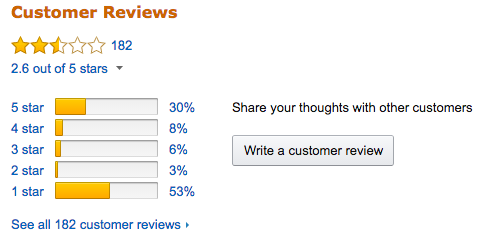

In [21]:
display(HTML('''<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAfEAAADxCAYAAADbRY7JAAAYJmlDQ1BJQ0MgUHJvZmlsZQAAWIWVeQk4Vd/X/z733MnlmudZZjLPJPM8z0Mq1zzTNUWRkAyVZEghhUSKRlNChpRkylCKFEKpVIZMeQ+q7+//ff/v8z7v9uzjc9dea+3P3nvtvc+6FwAOVlJISACKFoDAoDCytYE2r6OTMy9uHEDIHyMQByIk99AQLUtLU/A/lqUhRBcpLyS2fP3Pev/fQufhGeoOAGSJYDePUPdABN8DAM3uHkIOAwDTi8j5I8NCtvACghnJCEEAsPgt7L2DObew2w6W3taxtdZBsC4AeCoSiewNAPWWf94Id2/ED3UI0kYf5OEbhKgmInivuw/JAwD2NkRnd2Bg8BaeR7CI23/48f5/fLr99Ukief/FO2PZLnhd39CQAFLU/3E6/vcSGBD+p49dSKXyIRtab40Zmbcy/2CTLUyF4IYgN3MLBNMj+Imvx7b+Fh7xCTe0+60/5x6qg8wZYAYABTxIuiYIRuYSxRzub6f1G8uSyNu2iD7K3DfMyPY3diMHW//2j4rwDNWz+YN9PI1Mf/tMDgow/4MvefnqGyEYiTTUvWgfW4cdnqi2CF97cwRTI7g31N/G5Lf+WLSPjvkfHXK49RZnAQQveJH1rXd0YNbA0D/jgiXdSdscWBGsGeZja7hjCzt6hjqa/uHm4amrt8MB9vAMsvvNGUaiS9v6t21SSIDlb334kmeAgfXOPMO3QiNs/tj2hyEBtjMP8Hs/krHlDn94KSTM0naHGxoNTIEO0AW8IBypbiAY+AHf7rmaOeTTTos+IAEy8AaeQOK35I+Fw3ZLEPK0AdHgM4I8QehfO+3tVk8Qgcg3/kp3nhLAa7s1YtvCH3xAcCCaHb0XrYY2RZ6aSJVFK6NV/tjx0vzpFauH1cUaYvWxon95uCOsA5BKBr7/XfaPJeYDpg/zHjOIGce8AiZIqycy5i2GQX9HZg8mt738/nzQN578L+a8wAyMI3b6v0fnhljP/tFBCyGsFdDaaHWEP8IdzYxmBxJoeWQkWmgNZGwKiPQ/GYb/ZfHPXP67vy1+/znG33JqMWqF3yzc/vLX+av1by86/zFHHsh/k39rwsnwXbgDfgQ/hRvgGsALN8G1cBf8cAv/jYTJ7Uj405v1Njd/xI/vHx3pCulZ6fX/1jvpNwPy9nqDMM/DYVsbQic4JIrs6+0TxquFnMievEZB7pK7eWWlZRQB2Drfd46PH9bb5zbE3POPjISc38qyABC0/5EFI+dAZTYS1hf+kQkhe5NNBYA71u7h5IgdGXrrgQEEQIPsDDbADfiBCDImWaAI1IAm0APGwALYAidwAJl1HxCIsI4ER8FxkATSwFmQDS6CQlAMysBNcAfUgAbwCDwGz0AvGASvkdiYAp/APFgCaxAE4SAixACxQTyQICQOyULK0F5IDzKFrCEnyBXyhoKgcOgolAClQeegi9AVqBy6DdVBj6CnUB/0CnoHzULfoVUUjKJCMaK4UEIoKZQySgtlgrJF7Ud5ow6holGJqDOoXFQR6gaqGvUI9Qw1iBpHfUItwgCmhJlhPlgCVoZ1YAvYGfaCyXAsnArnwEVwJVyPrPULeByeg1fQWDQDmhctgcSnIdoO7Y4+hI5Fn0JfRJehq9Ft6Bfod+h59C8MEcOJEceoYowwjhhvTCQmCZODKcXcx7QjO2oKs4TFYpmxwlglZG86Yf2wR7CnsAXYKmwztg87gV3E4XBsOHGcOs4CR8KF4ZJwF3A3cE24ftwU7ieeEs+Dl8Xr453xQfh4fA7+Or4R34+fxq9R0FIIUqhSWFB4UERRpFOUUNRT9FBMUawR6AjCBHWCLcGPcJyQS6gktBPeEH5QUlLuolShtKL0pYyjzKW8RfmE8h3lChU9lRiVDpULVTjVGaprVM1Ur6h+EIlEIaIm0ZkYRjxDLCe2EseIP6kZqCWpjag9qI9R51FXU/dTf6GhoBGk0aI5QBNNk0Nzl6aHZo6WglaIVoeWRBtLm0dbRztMu0jHQCdDZ0EXSHeK7jrdU7oZehy9EL0evQd9In0xfSv9BAPMwM+gw+DOkMBQwtDOMMWIZRRmNGL0Y0xjvMnYzTjPRM8kz2TPdJgpj+kh0zgzzCzEbMQcwJzOfId5iHmVhYtFi8WTJYWlkqWfZZmVg1WT1ZM1lbWKdZB1lY2XTY/Nny2DrYZtlB3NLsZuxR7Jfom9nX2Og5FDjcOdI5XjDscIJ4pTjNOa8whnMWcX5yIXN5cBVwjXBa5WrjluZm5Nbj/uLO5G7lkeBp69PL48WTxNPB95mXi1eAN4c3nbeOf5OPkM+cL5rvB1863tEt5ltyt+V9WuUX4CvzK/F38Wfwv/vACPgJnAUYEKgRFBCkFlQR/B84IdgstCwkIOQieFaoRmhFmFjYSjhSuE34gQRTREDokUiQyIYkWVRf1FC0R7xVBiCmI+YnliPeIocUVxX/EC8b7dmN0qu4N2F+0elqCS0JKIkKiQeCfJLGkqGS9ZI/lFSkDKWSpDqkPql7SCdIB0ifRrGXoZY5l4mXqZ77Jisu6yebIDckQ5fbljcrVy3+TF5T3lL8m/VGBQMFM4qdCisKGopEhWrFScVRJQclXKVxpWZlS2VD6l/EQFo6KtckylQWVFVVE1TPWO6lc1CTV/tetqM3uE93juKdkzob5LnaR+RX18L+9e172X945r8GmQNIo03mvya3polmpOa4lq+Wnd0PqiLa1N1r6vvayjqhOj06wL6xropup269Hr2eld1BvT36XvrV+hP2+gYHDEoNkQY2himGE4bMRl5G5UbjRvrGQcY9xmQmViY3LR5L2pmCnZtN4MZWZslmn2xlzQPMi8xgJYGFlkWoxaClsesnxghbWytMqz+mAtY33UusOGweagzXWbJVtt23Tb13YiduF2LfY09i725fbLDroO5xzGHaUcYxyfObE7+TrVOuOc7Z1LnRf36e3L3jflouCS5DK0X3j/4f1PD7AfCDjw8CDNQdLBu64YVwfX667rJAtSEWnRzcgt323eXcf9vPsnD02PLI9ZT3XPc57TXupe57xmvNW9M71nfTR8cnzmfHV8L/p+8zP0K/Rb9rfwv+a/GeAQUBWID3QNrAuiD/IPagvmDj4c3BciHpIUMn5I9VD2oXmyCbk0FArdH1obxoi86nSFi4SfCH8XsTciL+JnpH3k3cN0h4MOd0WJRaVETUfrR189gj7ifqTlKN/R40ffxWjFXImFYt1iW47xH0s8NhVnEFd2nHDc//jzeOn4c/ELCQ4J9YlciXGJEycMTlQkUSeRk4ZPqp0sTEYn+yZ3p8ilXEj5leqR2pkmnZaTtn7K/VTnaZnTuac3z3id6U5XTL90Fns26OxQhkZG2Tm6c9HnJjLNMquzeLNSsxayD2Y/zZHPKTxPOB9+fjzXNLf2gsCFsxfWL/pcHMzTzqvK58xPyV8u8Cjov6R5qbKQqzCtcPWy7+WXVwyuVBcJFeUUY4sjij+U2Jd0XFW+Wl7KXppWunEt6Np4mXVZW7lSefl1zuvpFaiK8IrZGy43em/q3qytlKi8UsVclXYL3Aq/9fG26+2hOyZ3Wu4q3628J3gv/z7D/dRqqDqqer7Gp2a81qm2r864rqVerf7+A8kH1xr4GvIeMj1MbyQ0JjZuNkU3LTaHNM898n400XKw5XWrY+tAm1Vbd7tJ+5PH+o9bO7Q6mp6oP2l4qvq0rlO5s+aZ4rPqLoWu+88Vnt/vVuyu7lHqqe1V6a3v29PX2K/R/+iF7ovHA0YDzwbNB/uG7IZeDrsMj7/0eDnzKuDVt5GIkbXXcW8wb1JHaUdzxjjHit6Kvq0aVxx/+E73Xdd7m/evJ9wnPk2GTq5PJX4gfsiZ5pkun5GdaZjVn+39uO/j1KeQT2tzSZ/pPud/Efly76vm1655x/mpb+Rvm99P/WD7cW1BfqFl0XJxbClwaW059Sfbz7IV5ZWOVYfV6bXIddx67oboRv0vk19vNgM3N0NIZNL2qwCMVJSXFwDfrwFAdAKAAcnjCNQ7+dfvAkNbaQcA9pAk9AnVBiegbTCaWGEcO56VgoegTmlO5U88S11HM0cnQe/JUMw4wSzGEsXaxE7D4cBZwvWDZw9vIt9zfjoBa8HTQs9EgKicmJf4+d2dEstSItJWMnGyFXKDCihFGaX9yqkq1arv9hDVlfe6aqRo3tZ6o4PXVdRz1z9rUGs4ZgyZCJgamPmZp1vcs3xp9dOG2VbOzsI+0OG0Y6XTM+d3++ZdlvevHQSuBBKbm4S7loe150EvT2+Sj43vHj9ef8h/PKAp8HJQQrBPiOUhZTJvKD70a9hQeGNEWWTm4diogGinI0ZH1WOUYhWPqcRpHTeJd0jwTAw7cSIp62RJ8t2U5tSutKFTb09Pn/mc/v3sYsbSucXMxazVHPR5ptzdFwwuuucdy88tqLzUVPjs8sCVkaLx4tmShVL4GlOZWLn2dZeKyBtZN+9U9lV9u013R+6uzb3Q+2ery2vqax/VtdY3P3jQcP9hVWN5U3FzwaPsltTWo21+7TaPFTtYO1aejD/t6Xz8rLXr0fOG7qqe3N7QPp1+Yv+LF3kDXoMKQ5ih4eGylxGvNEewIx1IfCm8mR7NGFMbm3h7elxt/NO7wvfWE/BE1aTd5MpU1ofdH5qmracnZ07MSs1Ofiz7FDQnN7f4ueqL+1e6r/fnLec/fDv6neX74x/pC0GLpCUvJI4mV9s3JDc3t9efH7qF8oNl4Rn0bUwc1hGnjpegECYIU+6ikiaqUlvRuNPG0hXSNzLMMtEyK7OQWJPZ7rGPcVJyyXHv44njvcLXtOs1/6IgpRCPsIKIkairWJR45u7bEl2SM9JoGT7ZPXLO8mEKaYolSnXKz1Xeqy7swapz7JXRMNMM0ErXvqXTq/tZH2/AZShrpGdsZ+JuGmR22DzWIsHyhFWSdbJNqu0pu1T7RIcoRx8nW2fdfRou+vudD0QezHa9RWpx63Rv97jvme91xNvBR9qXynfOr9e/PqA8MC8oPTg+hHzIhawZyhO6FjYYfjMiKdLtsF6UdLTAEa6jbDFMsbTHsMeW4t4f74y/nZCdGHlif5LxSd1k0xRS6vG0q6cenx478yV98exyxuK5H5nzWZ+z53K+nP95gfaiSl5QfmlB96WJwtnLU1feFr0q7it5crWxtOFaZ9nn63wV+2/k33xVxXjL/HYycnqt3Jes9qjJq+2vxzyQbzj48ERjaVNDc+Oj6y1nW2PaItvjHqd3FDwpfnqp88yz8C6b5xLd6O6Rnju9aX1+/VYv9Ab0Bq2G3IbDXya+OjkS89rrjc4o++jcWN3bk+OO7yTe499/mGidLJg69EFzmmp6YKZ49thH308ecz6fA7+EfA2ZD/lG/h7xI2ohctF3yWCZZvnuT72fz1acVz6v9q5TbYxsr784aINMoJcoTxgLp6PF0T2YaKwUdhZ3Fe9DIUWxQuikLKSKJFpTy9JQ0yzRvqJrpi9nyGSMYfJmtmZRZxVlY2JbZ5/h6Ods5KrkLubJ483hy9qVzp8kECFIEtIT5hX+KdIlWigWKm64m08CJTErOSz1RLpe5rpsrlycvKuCiiJWsUcpW9lRhU3llWqBmsceWXWs+tjeao10TR8tXW0hHVpdoPtDb1p/yOCBYY6Rp7Gg8bhJrqmFGc6s1TzBwsiS1fKjVaN1po2PrZod0W7M/qbDUUdjJyant85l+4KR+39l/8MDcQd1XPGufaR8N3/3PR5UHiOe17wOeSt7r/s0+cb5afoD/+aA44E6Qeig9uATIVohPw9VkJ2QO7s8zCJsITw3Yk/EWGTcYa7DD6Nco5mjR45UHE2IcYwViV061hqXedw7XjdBLJH1BGUSSFo4OZH8PKUq9VQa6ZT8adzpkTO30lPP+mcYnKM/9zhzX+ZcVnS2Vo72+eQL+IupeZMFbJdkC1Uuq1xRKJIqFinhu8pWSneNUEZRToNEkvoN15snK29Wvbi1fkfkrvO9c/f7ahhrnery64cbMA9FGw2a3JqPPbrU0tj6tm3zMV+HzhPvp6c6bz8b6troFu3Z13u+b+yF7MDpwS/DNi/rRvheZ49KvaV+FzmZNhP12fz70orV1vrvfA+3VbBIdpqJ5Jn2p5E6C0BGDZJnPgCAhQCAJREAWxWAOlkJUAaVAPI/8ff+gJDEE4/knMyAB4gCeSTTNAXOSOZ8GKQgGeUN0Aj6wQewDtFDopAmkh+GQqeRfLAdmkBBKD6UNsoDdRLJ8vpRqzA/bAZHw2XwMBqPVkUHoovRrzD0GBMkI2vFQlhNbBy2BYfBGePO4l7i+fAB+DoKHIUDRRnFKsGMcIWwTGlOWUaFpnKjaiUKElOIX6htqRuQTCeDFtAeop2kc6Lrodenf8igzFDNqMrYymTNNMEczoJlyWEVYq1lM2ebYU/mkOGY4CzkcuMW5/7J85g3m89jlzw/lv+1wF3BdKEAYRMRcVGi6LzYoPiD3ZckYiVdpFSkGaXnZZ7LXpdLkfdRMFaUVGJS2lT+rDKm2q/WuaddvW1vh0a35ojWjPaSLtDDIucc3hBvRGFMZcJoymcmb25uEWSZZdVgPWVLtJO3d3KIcbzs1OY87UK5X/qA/cGjriWkbrefHgKeNl4nvBt8Vv10/C8ErAS5B/cf0ic3hMmHV0VKHL4dvedIb0zwMc64ofisRNMTSyezUnantp/yPMOU/jbjeeZo9mYu70WVfNNLBy9HFV0uGbkmUX75hnTl+O0r9w7UUNZVNuxvEm/hadd/UtRF1SPStzSQMSzyqu/Npbfn3/d/cJ1d+Uz/9cZ3sCC9pLK8uZK6Wrs2sP5go/hXyKbS9vkBbX/nQA84gBCQBRrADLiAQBALMkAJqAM9YApsQMyQFGQMeUEJUBH0CHqPQqOEUaYoMuoiqhX1FeaETeCjcBU8iWZHW6PT0O0YCKOOOYJ5gFnHamATsE9xtDgn3FXcd7wWPhP/gUKNIpNijqCPrPk6pSPlPSQTJlMNEFWIl6kpqQ9TT9M40XTT6tM20+2la6LXoe9ksGEYRTLTVaZ0ZjHmZyyHWJlZq9ms2D6wR3EQOUo4NTknuTK4jXmoeUZ57/Kd2eXLry3AKvBJ8KHQWWEvEW1RQTF6cfxujAReklqKXppOBi+zIjsjNyzfqfBI8ZFSp/Jrle9q1Huk1a32+mqEaZK1fLQddQx0VfTk9ZUNDAwPGsUaXzHpMJ0357DQs/RH7rQsm/O22XZZ9pcdmhy/OSvsi3N5foD7YJhrjxu/u5dHtud9r27vSZ81P2Z/uQDbwIigi8HNIR/JLKH6YRHh1yJGDtNGmUWnH3kZIxQbc2ziuHcCbWJnUlgyNuVkGvpU8hmO9NaM+EzHbJ3zahfU8tQKVApFr6CLHpdElHJce1juVsF0Y7Sy/VbPncX7MjVH65410DTqNpNbSttmO7Sf3umS6c7vHe1fGPg2NP1yYmTmzcJb6B1hgnFKYNpwNmdO6Wvqj9LlgJXutcT11o2FXyvb649Cdj8d4AYSYC+wAl4gBuSAW6ALfIQoIHHIDCJDuVAz9BHFjNJFhaFKUSMwHWwEJ8LN8AZaDR2NrkevY7QwqZhhrCj2OHYUtxdXhMfjg/EDFCoUBQQUwY8wSKlL+YBKheoR0ZL4gTqeho+mmdaFdonuLL0E/XOGIEYiYxmTNtMb5igWbpZu1jNsbuzaHGKcjJxrXKPctTzneAP5THdJ87MKYAVWBL8JfRX+IbIhRi0usFtTwlUyTqpAulbmhewPeXYFI8V4pVYVKlUXtVvqOORdtVFrl3amLrNepYGzEZ1xn+lF82BLO2tZmxE7Z/suR0OnF/u8XH4eSHCFSCFugx5KnvneFD7H/Qj+xYFmwSCkhhwcxh3eGhke5XHkS2xJXNTxofj1RNQJfBLtSbnk0JSBNLtTs2eSz0pmvMpMzlbL+ZZbfvFAPqHgWqHS5YdFGsXNV3VLO8ssywcqbG/0VupX1d0WuXP+Hv5+TPV6bUq90IPeh/FNis2zLfltFo/RHQ+ehj4T75rsvtTr2M/4on8wfdj45ebIjTcWozNvw8c33sdPwlPx06iZhI/oT8fmvnzR/xo1X/Dt9PfwH7o/lheuL5ovvl7yWVpajlie/enys2dFZ6Vilbgastq/prCWu/Zt3Wi9aH1tw3bj5i/4l+OvG5vQpt3m9a31D/WSk92+PiAqbQAwY5ubP4QAwJ0DYCNjc3OtaHNzoxhJNt4A0Byw89vO9l1DC0D+2y3UKTYY9+/fWP4LzM/MbdbhuTMAAAGdaVRYdFhNTDpjb20uYWRvYmUueG1wAAAAAAA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJYTVAgQ29yZSA1LjQuMCI+CiAgIDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+CiAgICAgIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiCiAgICAgICAgICAgIHhtbG5zOmV4aWY9Imh0dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjQ5NzwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBpeGVsWURpbWVuc2lvbj4yNDE8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICA8L3JkZjpEZXNjcmlwdGlvbj4KICAgPC9yZGY6UkRGPgo8L3g6eG1wbWV0YT4Ksb/32gAAQABJREFUeAHsfQtcVVXa/oPcDqSA4gUNFDARFPM4fy1sGlCZCexiSuqo1Yjz2aRpaVnBaOWlNJwZJ2ws6Jcz4jSp5WRpjUHfp4EfCZN8ekwFRERGSA8oyiGFA6L837X32efG9SgiB95Vnr33urzrXc9a7Ge971p7b4cGCuDACDACjAAjwAgwAnaHQA+705gVZgQYAUaAEWAEGAEJASZxHgiMACPACDACjICdIsAkbqcdx2ozAowAI8AIMAJM4jwGGAFGgBFgBBgBO0XA6Vb1vliihb5aDziroPLwgmdfFZxvVSiXNyJw7Rpw3XhldkIgq8wub+dp2cEvcOFEJVWhh/PIqRj+gM/trI5lMwKMACPACLQRgZskcT0KP1wFXc76JqqJgsv4eAyOnQDPJlJvOepaMY4nJOI6kViD+1QMfWECet2y0M4qQI9Tr7ihpqYZ/Zweh2tkAobHBN/WiZP+RApqc3ZLStRhAsAk3kyHcDQjwAgwAh2LwE2QeCWOL+2N2uaIBWmoywIuzyQSd78NjbmmR13pRkjPxbmF4cZtqKIziewh3BrNYV2/G7Vpu3Gs4gh+9oy6M6nNujACjAAjwAh0AAI2k/jFfcmNCdxtLhy9K3G9VLbWhKPX4RaVJy+y5EZu5DKmiYFYyJdczERwri3UoyfCF+5oZ3dy9beQzzxJ1CuC4E7zIOSISOt46zyiTmextNBSRvNCNp2PBkSP1R+1KNVwQgMd1E16PvSGBjm2oruFQKuLIc98gUHPyJHNNUvgc3vbLtcvmiP6vq39KZfiX0aAEWAEuiYCNpJ4JbRf/t4CCdeZZzA80l8iN/3FfBQmzUJtabFkKeuL0nHq41RAWOTesxAcq5bzNRMv1lyLd+1A5QFyl9coRBUFx4Bo3PVoLPw883EqJdm0RlyVgpMbitHjWiUcxi1FaKS8VluasQMXP52N6/UmVR2DtsN7/iySocRpkbuB6oEXWfM+6BUZjKufLkBdhah3NFwm7UDwr4NxSfMFzqdMI31EuSi4zUnBiAi5HkVSmSYV2o/jUV+l6Aw4+CbBe+ECDOkr5yojnbRZpCsq4Ry+FP19tDj3VSrqdV7oG78Avs2xo1IJHV0XZiNUTfRF7T25YRaunEmTU2u+wOXqWJPn45oWJz9MxJWjZssdBtf7PeR6V4kliQ3JaHCmtl9TwXP+Uvgb9Lym1SA/ZQfNVgQu/vBZNgsw091x/FKL9rfW9ouaHfgxldrtTGvqHtEY9swEiYDF2DhJY0N4GhyCYhFKeolQti8F2kNaCSeHoAUU70+xLY+LYaFeoigHRoARYAS6HQK2kTiRdJ2Za9cxPI+I098ImqpvMEJf16DsuBbuRNzXqrTk+jYQiVswqg3WYtPx5KZ/hdz0VUZxhpM0XCey+unABFx7QEPytpplSEN9gYHIPIhsiMRPbVCjqsBEpkrm6wWzUf5qAvRxGgwLpNjqSugL1stuebq8XKDkFMejqNsfgh/2m8eJ8zTUbBuIk34NGC5kUCh6fyouH90tX5j9NpQuxMUVX+Daa6m4x49oqGAH6s/I+erOrMcZY97HUX9tQcsmviFvDycicBGIYL3HTTCRuNMEuImJEoVr2mwcWzne2C45ln4Nrvfc0m8x4gVyvWvXG/vy0lfR8I+VSVSbugp1Bj3h/blk3ZeZ6e7gHQsYJjFtafsAGmH1Z5SJnxYXYifAj4hbm5qA+lJD353xQllMPAaQmpX75qG+QtbaMWipiGl1XNDMRi7Av4wAI8AIdDMEetjS3p9K883IIQoej8o3fmsZA0LJshWRFlMEleQGl/I2Ea8/mWpG4HPhsfA87vnDZQxY+C1cveUaVAFT4TkpSb4Qv05L0HPmt/CY9jV6R/rj0sFkCwJ3mZSFAc9nwcVNKXIUVWSBXhKXRCQWjXdbAtfR7zRaBnDwfpvi4xQB0vHqvnzpqNOkmAjc4x30X9uA//dBDXqPnmvInwbdp9nSeQ8i3qaDvunoJmLrctJRlEEWbEoC/vOpQoyU0ScYfaT8lTiVYCJwl2l5GPlBA4LivoWjQV7DiaUo1XrB57G3jTU0HErFRUP5ykOmCYnrzGjJam5K97a2vVfoBLgYa9qKqyfFhRY/HTUQuJT2e1yW4vNRYyBw4fXwoElZW8aFUTyfMAKMACPQzRCwoNNW265YglJGHzgarL9Wy7Ulg2HtVs66FT99TNZrABHAcDX6vVADTx/50bV7fj0BGrKQpTVx9zAMiZTds6Lcfz5MNdUU9C1G/TpMuvZ97Vv834qJclp9KqqqF6APkbgpPI6+f0zEEIq7lAGc2fainOS2BcPWxUoTkuL3NaiwIB6yEQ99YRJRRevSX6VAR+1oOGPmLSjJp/VqWQ9j5oDP4bswGu5U341qWm1oI47XsybicpZRinzivQW+8dHSMgWZ4dDXmNKvF2SjsCidJiy0X8EYfRR6rR59w6eilCYCUnz9i6goWoq+SEedcQniHfgI130zwZa23zU6CnUG7PRHtbjmmY06K7nVWcXQO+eb9PSIRT+x9FFinrHpcWGeg88ZAUaAEehOCNhE4ha8h63QF6UAw9sIl2XhRoVUw8PkPVuGlIaqrXTjF/+AKxR3fuwRjKQd2M4WZE/uY0pTqMZEVLTO6u1jqsOTJhx0paQ7mFJMZ0IQ6ehsXo42qCnB0d1MniGyh7u/kkzHrajNMiNvJcVKXxHtQJbzAE+D7DYSuCTOiTa2WW1qc5sbiwEGbK9p5b0IStXXT8wztlmJMx6dg+FF5KpMTK4e0KAIKcZkx0lTidSbD7a0vV94LHksZMv7Ok0qiq+lyoI9yMvhnY5aWi5pOJFKfJ1vrNBxvOHRwbaOC2NJPmEEGAFGoPsgYBOJq8gqFgTYYMDnyuYduPTHWQZXrhypp41RJ99Nh/fqpZa7pYnMFB5vcue2sz9GkCv6x11fQEc39HotEaLRKiQCzknEudgUDDHvm6pUVF6bhV4GwYrLWMpSrTflpB3j5o+iKfqbMjRz1gQBm+e8UV1suvTYDt+4aKDKUC9NABxpQ1ZNNW0co1wWS/2tyDUJtTxzW6jBiEANDr84xtgHNX+ORfEfUuBPlTh7+1v0jxstSfj40ESHrH0BviPpdP2iFo6B8gTi7sfijSTekDUGl43VPU570PyNV02d2NJ2kEtdDDSpO0tno6pUluiopo2GI31oMyQRfNVCVBm9DORKDyfFRWjruFAGl1yKfxkBRoAR6BYIWCwLt9pist76kPVmDFWzcWbRUuTuorXafem02zsWJ1aOoY1J6bRZi3LVmxFpzWzaqU75Uncgd3OCUYRy8hOtL//wbDxqA8PgH5+Ce99rgO+cLUoyHSvRIGTSPxMha/DTCS102mKUlOih8g425m84Go+TGlp7raad2u/GGkkPCDZuAjNmvskTlZ+pPlSl4MKBYnrUjt5a50Pr37piaFOiKU57k9IbF7sh8HRXY9jC7WaJW1GxPBFlIsbdy7j2LS71X4qlAxXc/Xygon0BVfTmtdK/xEueDZHu7BeGuzzEmVUIWGq2i98qzXBpW9tpj8RIs3FjkOE23h+eI8Ma7UOAcKUb3ABtHhdNq8mxjAAjwAh0aQSEgWRT8H9uB66Y7yKv34iaNPpnIUUm716+ZiRH6XUHJjZaCxXFBCn3kJziG3ElaSMKRaR18I6Ft+R6ljfIya7xo6hJGijnH30E/++5eCLN9Ybn2NNI1kBYbDonma5z5V3QQrxpMmDyLlhXa57HOm1A9CpcpvquSpux0ujFK2n4j/l+LSrg4GNd6tave5EF2z88G+UHNsrCaE27NCEYnrQ27k8EX5g0W4pvKJ2HivX0z6LKx82uVOj/6DumPQCGFLdHw4xeE7PMFqe2tl1yqZ8wB+dteAUKkcG4y5eWTAzWuYgxutLFRZvHhZSZfxgBRoAR6FYI2GaJS9B4IfSPtAObdok7NDUF8IjDXTMT4SMIt28YfGcmWQLqFge3sUtMcfQiFqGEilzBjk3Jo2e2ncZ+i4B1Uw2vV/XH4IWfN7LeHEgO6Jnv0MTL6Dlyrkm+cuY0Fz0XXkboA2QlG4Kp8V5waModS3HGPGa7y6W3qEkyVAheVwPvKMJCEWpxpFfQBhnqM5NvKm+RudULoy6U0+/JRPQMMLNuz0zGyVQtPIngg147AldfszQzyQ6+Uy08EX0iZlk+RECb+XxCBZZmoUndbWg7ieqllvc8KFIdRkdLj5SJa+/wd5RoOpq50umq7ePCTASfMgKMACPQTRBwaKBwK239SVdJb0UTN316U5mnl3F92kImrUlf1FYCbuRqbuUDKdcob7WO3rRmWA/vSa5pK0oxiv6J8skmowq9rDaIXaM18UtUp9hBf50k9CE5ZlxklNGeJ7qL9Ow56S3W5p3Fx2CsdGrPutoiS2Cpq5C9IqAnC3oS9s1h2RZ5LeW53W23ZVy0pCenMQKMACPQlRC4ZRLvSmBwWxgBRoARYAQYAXtCwNxDa096s66MACPACDACjEC3R4BJvNsPAQaAEWAEGAFGwF4RYBK3155jvRkBRoARYAS6PQJM4t1+CDAAjAAjwAgwAvaKAJO4vfYc680IMAKMACPQ7RFgEu/2Q4ABYAQYAUaAEbBXBJjE7bXnWG9GgBFgBBiBbo8Ak3i3HwIMACPACDACjIC9IsAkbq89x3ozAowAI8AIdHsEmMS7/RBgABgBRoARYATsFQEmcXvtOdabEWAEGAFGoNsjwCTe7YcAA8AIMAKMACNgrwgwidtrz7HejAAjwAgwAt0eASbxbj8EGABGgBFgBBgBe0WASdxee471ZgQYAUaAEej2CDCJd/shwAAwAowAI8AI2CsC7U7ipz5/uN2waE9ZP6a/0G56nf731k4pq92UYkGMACPACDACdoFAu5L45fwUXDmXCnG81dCusn48ivITm3CZjrcahIzLJUc6naxbbReXZwQYAUaAEbA/BNqVxM8cWAPfwQ0Qx1sN7SlL++1CSa/Cgym3qhaEDN/Qx6TjrQprT1m3qguXZwQYAUaAEbA/BNqNxIXl7HCtGP36QjreijXenrLKCw9Ar8uW9XJouCULWljhDiTDJzhSOt6KZd+esuxv2LHGjAAjwAgwAu2BQLuRuGI5C6Vu1RpvT1kV2fGSPpJet2hBK5ZzZ5Ml9NGkZCMlo1ScmoK2ADvezcbSNw8i+eNc6E0pQHUpUqlMPKUlvJsDTUmleSqfMwKMACPACNgBAu1C4uaWs2jzrVjj7SnrxxNfG61wodetWNDmlnNnkiV00aZmY0xWLXYUVItLOejyMXXlecw+UQd/zxtYeOAC3JZrZCK/VojYF09jMpXx8u6B7BNXMeato0gtMiuvyOEjI8AIMAKMQKdFwMkWzeqK/xuXyjLw07nD+OlCvlS0suwseve5YbR2FXnCGi/e91sc2TkfXgMGS9G9+gWj16Cfoc+ACOm6vWRV1rviWuk/JZlVpTkScV++1KNpvcgaP521BVVlBejVfzjcPfpD5TUIvbwD4OIVKMmoqyzCTxVnoK88h+qqcvxUfhIeA4KktXApg+FHrI13lCyvvr7mVRvOK6H58DjG5FyXrlVmOSpPVGE3XX+7NhwTaIlj1r5sDPy0CvnE08EFlyD213/92nhE+7kA14qwdHEJEveVIjowyEwKnzICjAAjwAh0ZgRsInFBurnfJGCIz3X4DZSb9bNhdDRnD0NrhTXer28DoL+OC1fOSLFV2jPIPf4NRjwkZ2ovWddrqnDyf9+X9OrrQ7I9gTEjiNia0EtY4+KfvlaP+ktFuKI7jyuXinE8LQHDJzwvKXYy/S8YPOYJeA+5D0M8B8KpTyBUro2FdaSsJkm8+pxE4HHhnvA6qEO6DKv8W3NDOnq5y5fC4gaoPyhUVjshLsgTYYLARXD2QZhbiWV5OYV/GQFGgBFgBDoxAjaRuM/9b0lNEeQ7iohcEHWrgbivH/27cBH4j9aRCDweihxRtj1lCSJvq14SKQ8cgbrqn3D2yGcIjYpH/3vCpeY4u94lkbo6eiV6Up7WQkfJaqSH+yBc/sM98PKsx45DhyySvcL7Y8mnJRjzSibeGd4DKSeuAUG9oRak/sDPkPCAKbtek4vZNUCcn4HxTUl8xggwAowAI9CJEbCJxEU7FAI+JohcTUTes/XWXbgCHNM0JvD2lHX3hHclRY4JIm9Kr8aGNC6d/jc0qastCFwIEWQeSkeRJoi8z9D7Jdkt/XSErMb1exGBi9jGa9n6InKdiyRnckg4GbY+aPXQEpf7UJwSKjU56J10lXYjemJVdFMueyUnHxkBRoARYAQ6GwI3tbFNkO/oxxIlYhYE3VJQCFzkV0jbPH97yhJEPuyxj5vWy2JrNnDlfG6TBK7oJhE5WeeCyEXelkJHympJD1NaNVK36pDmcRdqEh/EgufCoFnbD1FVNUg8oDVmy//koETgo8m1XvO6uqnVB2NePmEEGAFGgBHofAjcFImLZnirF2NY2HyUnnUwtYpcslJQjnQh0kU+kb+50J6y/NS/xvBfPGepVxMVn839WloDV1zoTWSRLHKxTi7ythQ6WlZLushpelTqgNEBPU3E3LcPJlBi6knxKFkdst8/gJD91/B21N3QLGMCl3HjX0aAEWAE7AsBm93p1s3zcKHNUmakbTw3xEnp1oWaub6dsm409IP1jOXGtapmNDFFtyWPyN2WfG3J01ZZJg1NZyYbuw/UagcczSnDjoM9MVXtgvzPi/B7yro9cjAqD2ow/ij1m4cb7Uavh+YgeRrIzQ4fH6iH9zEJ5DNGgBFgBBiBTo3ALZG4/srZRsTYVGtFvtZCe8oSj5kZ9l03W61X32Bc1v7QbLqSUFVWhN4+9yqXTR7vhKymFPF3N01T1M8E4+uqfEzeehrS82RUIGmaH2YNd0d6gmGGRe71MUmmGdjo0T2gYRJvClqOYwQYAUagUyJwSyQunhX3M2xsu17tgOLLDdIOdPEImn9vBzi6N4CWZVFieKa8JQTaU1ZF2XEMNzwCZ9LrEgb3/isCRkbB0dMXHv0D8GPB/7SkkpQmnhMfcm+AdH5dV4ozJ9Kk3eziEbQ7KctScS/MSozALIvI/ohe1h8N1yqhr74BlafJwp4QH2F42MyiAF8wAowAI8AI2BkCJtPtJhQXL3rp4+KA0z8CGXk94OL/LMKXlkhHcS3iRbrI11poT1l11dUWetW5jUfEs4fg6t4TGf/4HX285K/Ss9/iJS6tBZFHPCcuyoiyQkbE7z6/47Ja09uY7uxlQeDGeD5hBBgBRoARsHsEHBoo3EwrrpcfQcYH46SifqEPIeCXRIy9DOYvxdb/dB5n/ue/UEIvdxFBkKhj/zHSufXP7ZI1MOA+BD30nkW916/VovjwDvwn5xO49uyDMTM+gLs7uQuaCNXVV+mNc8+i9solDBn7a/j/bBYcnV2NOe+ULKMCfMIIMAKMACPQrRG4aRIX7zi/mPdpI/K2RlMh874hM9E7ONY6WbpuT1kNhzcgP/ezRuRtXbHQq0izB/0Cw9D77tHWybJe9NWyC0XZCFRPsZigWGfuaFnW9fM1I8AIMAKMQPdE4KZJvHvCxa1mBBgBRoARYAQ6DwK3tCbeeZrBmjACjAAjwAgwAt0PASbx7tfn3GJGgBFgBBiBLoIAk3gX6UhuBiPACDACjED3Q4BJvPv1ObeYEWAEGAFGoIsgwCTeRTqSm8EIMAKMACPQ/RBgEu9+fc4tZgQYAUaAEegiCDCJd5GO5GYwAowAI8AIdD8EmMS7X59zixkBRoARYAS6CAK2fwCluhSpn5YiveQGvDxdED3tHqj9vJqBQ4v0lGJ8QXn9fdwxa+YI+FCZ9g3lKC5ygn+g6QMfbZOvxRfvFiL55HVMiPRDfEygWbFq5KcWQEPf5FYZYvX1PTBh5r3wcTbL1urpzerWqmDOwAgwAowAI8AItOlLoiaYrhUi9sXTmJxVCy/vHsg+cRVj3jqK1KJqUx7jWSkSnj2JiZTXx7MHUnJ0GPjqYZi+eW3MeAsnldixNA8BX5XbLKPyYDGmnbgOHz9X+DeaWFxB+pc6zN6vwzTDv9kHKqEV39xuc7h53dpcBWdkBBgBRoAR6NYI2GSJ609ckj5N/fVr4xHtRxb1tSIsXVyCxH2liA4MsgCykuJ+TzGfvzQOU+kb1vHHc+Dwl6tIP16JWaHNWe4WItpwIVv1UW42NUOSqy2oA5zckBJ/X+N66POdX9TT97cXjsICta0WviLu5nVTJPCREWAEGAFGgBFoCQGb2K+y2glxQZ4IEwQugrMPwtxKkC5dmP9UI31fLRDUTyJwve4SVMPvwfm4K/Bq0vVeh/xdGsxKq8FRIcbJEd++MAIThhOBFmkQvaEaiYkPIFhyZZOFv6gI/gvvhfroccyuofw5P0JdcQWaeLW5EsDFAiT++TxerJCjl4z1RsIzoajcdRAhWeLjbTVweDYTee88iGB3s6JFV5BGl/Ee9agsKQXcesKrbzMTj+oipGwoxbxS+WNwcwmfxGVqaD8+bKXbYKR/mI+JOYo574At03wRG01u/KIfMHVDJS1PAFsrGrBkErn3+15E7Kc1kh4Cj8+fCcJUdX8zJZs+3bp1Kw4ePNgo8YEHHsDcuXMbxXMEI8AIMAKMgP0iYNPGNp8HfoYEIiiFzvSaXImoov3MGVCAUQe94KqCi5i6KANurx6Dw+Kj+IKsX1UTa8rFu75HCBF4dHg/IvqB2O5zHRP/fAzpWpJTXYe0+npZnhBN3wpPr2+Avv4GgiP7Io6iRgf0wo6Zg0SqKQgvwQoicJ0rsl4airyZdyE9pwJuG47DJ3IwtvtSVidKWzgI/lbqa0vJSqcwcX0eer91Gr1XHMXU949LcZY/dUjfUIJ5FSrkvTYc5xf2wtYCHSakFDbSrfjj4xKBb59zN86/5oev6cNp8z4vhYZWIkQbd1ObtlY4Yft4N0R7X8JAIvDoaQNxefVQfO53HdOS8pGv8L+lEhZXgqjHjLH85Ku4ZgK3gIkvGAFGgBHoEgjYROLmLa7U5MAt6Srg64lV0YIRmwoNCIsciJp3QvDtWEcs/LwEXzRaP69E9r7rktWe8CRtfCO3/KzXh2IJiUv4sph+ZRWVDWYwnwT4DIbaDfDx9kBwoKWVqj9xERupdNbqMIQN9yVSHYvUKEeaWFxCvrsveRMcKNUJYepA4+Y1ipCCXneDrG9XHHltNBrom+l5Ua7YfbQCiRnWK/pkqQtPQA15EoqqoAoIxOW4oUifOZiUstTNZ7wPTRiGYlbEPbSfwIs2+sneDGO7SMy3r43FrNj7aGlCdpAUE1Za8n5EL6QJwmvBBk+ErGNLv8/Mn4/AQLLwKYijuObACDACjAAj0PUQuCkSz//kIHoTgY8m13HN6+pGJCjBJKxGb0/a9R0ElXt/THjGXyLmlKxzjVE0J2YptQ+56dHsJjgT8ckWM0Ckax2cDE0zk+0zUja5hZdAb8ivHM2L+8c8gIbEMMOue3cEx/jjbcqQcqLSPBudu2MqeQ7e8SZLedt59H71KHpvKEY2ueOFN0IOsm4qDyD709PkvifPxIvHyPNAyw0WwQE+BmKnD5hLE4f0ozqErD9JnoyTiP/8HKxrtyhuduHo5IQXXngBISEh0lFcc2AEGAFGgBHoegjYSOJ1yH7/AEL2X8PbUXdDQ651E6Gag+NCxE3X1eQGN0bXSSTkpZCrMd5wYka2QBW0ZOH6iCRym0tBSXfuYSZTTgLFNQpKOTMXdCW551sP5K5/PxOxH+aaZa2XJhQTvGXr2ZRQB+2ZG4imzXsNH4zC+ef74R3365icVGTSUdKNdqq/Ra79amHdh1DeCDQ8f5csRmmXuFJ0pcf49ORZ0FC+GnKnZ01yxdYTOuzQXDJV3cqZm5sbli5dCnHkwAgwAowAI9A1EWiC/ZpvaOVBDcYfpQ1cHrRuG1gPzcFcaDLo30mZXLQZh5GYIsjPHdEziTxqriLxkwJa8y1H9ofnpJ3tCyIDrSrwglpNru0TF5CSQeRXTc+Wv1+AFynXgnBfqCTibEDyx7mo1FHau+fkzV6SFJng00oqyZ1dbiFXFeSFxylm/J+/R/HFSlSePI7YbWT9kutdLRvkFvlNF+7wcb+BrTkXsOMgkanQ590iyTUf/YD1sgER/odlCFn5A/LJ0+7l5yE/Ry4Rs7lul2Xx7vQ8u48X9FracLeZliLQgPwSWhS3CvqicxiTVIKE1ELStw/8/WRLutkJkFV5vmQEGAFGgBHoHgg4NFBoa1PTEzIw8Uzj3KNHD4DmuWDkf0hWukaFmvfukyz0/F3ZFm7jLXOGIjbCmgiFvEtE3LmYeJTWxg0haeZQLIgUeavJ+j9MkwdDmrczoiquYRY9/hVLj3/lf5yJkAMizQ01H8j1KjL0J3/Agj9fliYPIm60txtSV98nEW3xxwcQcNCddB3bhDeBXgSzoQDTChRoHLB9Ia3VqyXfgCJePhbR5GBDBbbWK9GOtA7/M4TRy23MdTs/F4jeath9T1mXjHRF/olaqKcNRUJAORz+fIV2yYcbdsnTPoEPj2N8jgmPJWP7IfGZEUolfGQEGAFGgBFgBGATid8UXvTMtViDVrkre9pbkCLykmGq8mwib0tpRPTC+m860A53Ha1RO6tIh+byNF0S1aQPJbVFd/EYXdN1mOtWTbroqX1tfPZcavONtudvphkczQgwAowAI9A1Ebj9JN41ceNWMQKMACPACDACdxwBm9bE77i2rAAjwAgwAowAI8AIGBFgEjdCwSeMACPACDACjIB9IcAkbl/9xdoyAowAI8AIMAJGBJjEjVDwCSPACDACjAAjYF8IMInbV3+xtowAI8AIMAKMgBEBJnEjFHzCCDACjAAjwAjYFwJM4vbVX6wtI8AIMAKMACNgRIBJ3AgFnzACjAAjwAgwAvaFAJO4ffUXa8sIMAKMACPACBgRYBI3QsEnjAAjwAgwAoyAfSHAJG5f/cXaMgKMACPACDACRgSYxI1Q8AkjwAgwAowAI2BfCDCJ21d/sbaMACPACDACjIARASZxIxR8wggwAowAI8AI2BcCTOL21V+sLSPACDACjAAjYESASdwIBZ8wAowAI8AIMAL2hQCTuH31F2vLCDACjAAjwAgYEWASN0LBJ4wAI8AIMAKMgH0hwCRuX/3F2jICjAAjwAgwAkYEmMSNUPAJI8AIMAKMACNgXwgwidtXf7G2jAAjwAgwAoyAEQEmcSMUfMIIMAKMACPACNgXAkzi9tVfrC0jwAgwAowAI2BEwMl41gVP/r17OvQXPgMaqHEO9K+Djk7uwSiofbULInrrTbpx4wYCAwMxceLEWxfGEhgBRoAR6OYIdGkS15d9hojwiA4lcDFRyDiQAfU4dTcfWk03v76+HqdOnWo6kWMZAUaAEWAEbEKgS5M4bhAWugybAGmXzFTvkCFD2kVUVxLS0NAAQeIVFRVdqVncFkaAEWAE7hgCXZ/EBZF3dKA6HR0dO7pWu6ivR48ecHLq2sPOLjqClWQEGIEugYDNG9sqNT9gx8cafPGJ/G/Hx4eh0VbbCEY5iosu2VjmJrILAhf/rnfw8U5MHG4CHrsqUl2K1A+zEf/mQSSn/ADLIVeH4ozDSEg4iPh3v4emqNLUtOoipLx5AA6LDmBHRqkpHlokL6W4k2Z5zVI716kOh3ZtwfKnnsL06U9heeIWZBbojCoe25WILZllxusufaIrQ5lebqHu2C6s3pLZoc1trU5d2VkY1GtfvXTHkLh6G5ReNq+nPfu/7KxSQxl2JSYiUwG7fVvT7tLM8Wh34Z1coM0kXnzgMmYf0GHafvnf7AM/EYnbMmwrsWNpHgK+Kr/90IiNbILA78SRqnVwELvp+GiNgwSKTT+liH/xNCbn1MLLsweSsy5j4IvZUOi3+JPvEbDtJ2SjB/QnazBm/VGka+ukGrKTSjBP64JvI10we9tpY7w2tRALa1wQPdzLJk06PrMeuxYFIGr+MhQMHotHHhmLgjXLMCUsAFuOCSLX41TiGmw5ZSL1jtexo2oswFMBIdh1Sr7flB1LxMZlt4k0m2lSi3We3YWAEDUM6jUj4eai9WXHsGbjYpSLplvU0379f3bXUwhR75UnIXodtq1ZA7sYVhZ43By+9lzKRr9mJfKLgNFjB0LzTNBNtttFKhflZmPVN1ObYonfTNlbKUP1WhMXX1tOaGyBV685h/VU4PO4cZga6I74k4fh8OefkHq8ErNCryB5/3WMHtkPX7wwgnLRAH22BAm7ijDhOR9pvL79ZBAmPAC8k3YM+WTCT/ApR8Ln1/HO3CB0dgqnOzZ2bQdmf6TBe48MlmCbNy8Gq/uosSw5E/PeiwT60/+etiBqv3kFh3m6quQGqKjhk1QwXHVMo1qtcxIU9dpTIVXQHFy6NMdMpFk97db/hG6op4ynAVRPVYeia9Y+W0/N8LC1qJ3nt80Sv3YRqTVAbJA7KrWl0Ja0YE0rbsxnM+BA/2I3aCTLKZ/c77NJRlrOj1AnaCT4ivflYKohn8i79P0f5NngtSIkkstz6nJyh4r0N+X8bcZcIfE7cSQlmbgtidsaj7b2oypgEL6N6odoInApuMsTQH09XWkrJYJf9ai/nIZALBjrgLQTVWZuTdMwV7m5oDK1GBvhhgUP0N3PToKnxb10MBbs2Yy1kTKpi7vufmL61U/1QZ8+9C98OTLPytaqsNQzt62W40Van+nYlnlWbnVZJp4Kn45Fi6ZL6cv/RfH6s9i2XL4WspZvyzTD0QTW2X+RzKe2wdz+z0x6Ck9tOyZlKti3BeFSfVb6lO3D9PDVKDCKKkMi6bCrQDIxkTR9Op5a9JSs7/J9xlyiHf9aFIb9FLM4rA9WC13lhiMp0ZC/TzgtKxjaRqm6gn1YFG7AxLzdNDESdf7LiBGQmTgdy3cpWpErebUiczoSE5fTMkYSlRJBAruJOguwSD2f0vcjjPQQsvWE7/LpSv3hSPqXIl8SJP2UZSYi3AzHAoEr1WV0au9bjfBF/yJZBtz0jetpuf9NdUlnugIkLQo3jgelf/UFu6CeT+gen0/jZ7XUVjHkdtFSzVOGfgxftAUmyMS4Wm6UE758mzGtLDMJ4bTss8jQdnOcZW102LfFVHb66l3yEonSRqPK5mMDKMvchunGMbUI/5KWlJrAg0blvqRFRt2mW+v21GokrVbG+CJamirAruUKJouwTxqLQglb2lhpicdTSZAcZca23L6THjaJJitG0OiL5JbsvfI0Br6VB4dXvof2mrWUOqRvIDdmhQp5rw3H+YW9sJUAn5BSiODIvoij7KMDemHHzEHAyRwEfHoVXuO9cX71UByJcsPGo5eRoqE182v1SK9pwO6KBmwJvwtbRva0rqjla4W878CauDVh8bUlobfccVapnr6YEDMCKl0hdryfjei3LgNObpil9oJeWhx3QLCfgeCpqMp46oUwtQN+v/U4lcvFi/SygDBvLVaRFb5lYZC499lBGICY2UDyDDXdXBchadsuZB4rgOeDMVgYM8qk/96NqI1JgyY7A2/0T8aUl2S3qHCRTlm8EZvTspGXp8HODSosnvISjhFn6nXl2Ht8P7ZvH4XNmzcgcpgrkgapsThzFNI0edBkbEbB4il4aItMzKbKgMGjxgJ7F5tuePpjWL5iL34+ajDO7luOsBnLELk5jerMxuYHMzFF/RAyifH1tKa9//gx1BrnGDpkkg7SpV6P7/bvx97tZ7Fp82ZsivQzq1KFBxdslq6XkNwFD4oJjHA/7MX28hhka7Lx0Rv9sWzKcnmCcPZfCAibgWORm5Gdl4c9m0dRu9VIFHsHqB5Rp07RgWov37UfmbIS2Lc8BPM3AjszNMhOm4Nda5Kxf/93hvzN1RmEBZsXkD6hhPVmPDhYh+SQKSiI3IO8M2eQ8VEkVjwdhm1GgpCaggHDhuE44ZgjsbYeOVuo4v0rkCPNGPTYt5qux1JbFdxgXY9hFDfT/3Ityu9ZLA8Iw4pjMVL/ZtNEMJP6d1BiJlRBP4ekPpYgjU6M6K7ZhRgaO9kZH6H/9mV4yTDROZT4EI2rAmwmjPI0GYjJXAz1Q/KkTlf+HY7vp34ZtQmbN2zCsP6Wf2mHEh/DjGWZ8pjM3gPVxvkIoesWxwYRfMiUxYjck40zZ/LwUeR2PB32X9TX1niA+i8AM1YcI91ozJP8UUK3QfLESNKNsFqBecimv5W1D2+npakw7PJbSddpeCN0O2as2SsBZksb+5z4g4THnuw8nMnLQOTeFYh4bJc8rhX4b9PRNhKvvgEfuhFuXzgUDR+Mx+WFnoiqqkF0Uq6VevWoJGsbNXXkzqyCKiAQl+OGIn0mDQ2fwVC70cHbA8GBZAn5+CBrzgAkx4bCx6Mn/INcMJqKSt3uLIuNmzYUsU+ORWzMPVb1tHJ5J9bClTV4Uo2J25K4rfFopfcaJ1fRBrYqGoPCEK/XI/3kJagMyzJ6s4mkVwCNHkrPrwaCn7kXRya5QFuvwpG1Y6HaV4qNbr1oAlCHL97NxNRXMvHFwdLGdXWaGE/EvHeJyOQjvPGgDisWz8eUiDAMIotkmzLVF+SzZA/WxYzD4KBRmLd0CRHBMclK7v/zdUjLyEPMuCB4evaHH62ri78uV7P27clbiZiYefg5vqObG7B2wwKMohtv/2EPI27DJBxflmywQs0KDY7EplBg/vYcKbJs33YcxwLEjHJFzupk4I00rCR9BgwIQsy6nZRyHImSJSrf0I31m9/fDedL9uzEnJgYzIm0XLLzHBWKh6m2YaEkV3Cp1MI3sHNdDIIGB+GReUspbi9KiBALMrfQ+Vp8uZLSBgzAgzErsXMBsGb5d9Cb1ynEiEC3IvqfCP4Ukkj9DTSBiaQJSdC4GOz8iApSkHWmmQiarnPUWIFtf4QKrOlM5NxfcgpnaXPYsMg4mtCcQUyQVeUDHiRpZPEKFqe6aS4hhb3H5OvFx4G4h8VkTS4ndLCuR2KKZvpflib/6gsykUyTjLQvl2Lc4AEIoongTgmUZCLDARg7ltANHYVxQQOkAkJ/0Rdi7ASNegTSsDpeTrEF2LjmOELXxuHhYf2h6j8MszdsICueJnWyu0KURN7KOYiZNweWTZbLLtgpyx0Q9CDey9iJzbMF+qY20oVyKZ0SONKxhN4xUUYdGBl3hvD8K1G4FR7kSRL998aeL2ksBkHIX0l1gUa2ycJ+g3R7BEH0t/JIjBhRS7BhYSRdj0PMUroWXhQb23j3DYFWOb0Dg/ZoqIYhjiYaeV8+bGgRJd3GIG6HbQ/D1Uj9wJTdS63GqqAMjD95RYLYNDzdMTVuIN5Zfx7Ttp0HxD8nR3y90B3Rocq84YYsyJPcm0cvwm1bhkmw2ZnoumBfGy1wpbyowlCNEtUhR6rTmrD42pLQb6of/EYgPl6U1EL97ElM/uocaiKFT93y7117gkaNkwr+7iLFC+pf3we1OEUhovc3YHtcIIrfP4ppJ11pwxswcetpfEsTygk+8n4NKWtn+aENRmfpvhk0jm469G/pOmGUHcO2ZRFYHLEcYy/RzZPCJLqZKsGzv7jpb5M2QQ2gP8qc5BmI2k5sYAzixqWEh9FfvmdDpZJpakVUiETmSg5akRfGqyXIdHuKXEeThSnbcXblKGSuT8akTdlEBRQkVUx3AwiCmEQua5NAizPznKKaYS0s8It0+YYuStFV6GCJMKVomqSIlp0lE3uYSmhSK0UrP8MESTWnhJKJMBCSz+pFWVmzAcLrQDd1OTRfp6wb5RInVP/S7J0on0/YJy+TiobOXovN6xYiSJqAyNKENyFyQyjW7D2OuP4F2D9pE/bM+Q5T9uZgiad4KdIbeFA0RXCEIUh9Ic6leuTIlvrfUIwOoj00DuRulqIHDJPbJntG5BYoYsXRvC/6jyL8EsVGwv4S5sdXRGGQmPWZB0k5KjlplKlfzNPpXMgd62cCwXNUJGJEfIH5GJULyT1A5wMeQfbOtZg/42kY4MTstTuxjsjXVQgUQRwNBfr3N2+knzQupDwik9mYEXRtrqt0bRAiNGxrGwc/sg471y7HjKejYOhtrN25GQutJqKyDu37qzBqm6Rq932P6OXfS2vbcoE6VFbQGRGxEWwpoQ7aMzcQ/dI4sthH4fzz/fCO+3VMTiqScJayOMtV56fkY/KJG0TwQ1GzKQINm+5GlMjgZKZa/U0ysWKJi+Id6VIX9VJg4rYkbgUPGZ22/2r3ZUNNyzaVxiIe8CFvDsQOdJrgjabHD7ILTKm4Rh3g7GQ1JoH8D88hzc0TswJdoDlBG93EhreYn2E7TWU12itG6Z3ppOy79VCrAyT3t6KX54BRWPjGJrosM7mllUQ6Kvc0Vzrb9V/kPi2bjQyyAi9duoRL2bJL2gQO5TYU0NOEQYSdeZRP5KV/58gdvidtCQZb/oFL+QaMnU03x+1ITtoCYTEuNb9hmd1DBQOV7Tdwu1KZmTxFX0lom37MClvlF7JE1Xo9WbJEI+ZqlJ3dK1KM7aULQzCTZ0g29wCXnRLLCWZ5lGKGo1KnMVrKqkdZbX+sO0A4njsjeVIGb1+B+bsaL02M+jl5ELbPwEtRK/DwnLF48OdEltufRtiUNZi0IbJZMmxOJaGPCOZtl2NECrlPzOY24tEs69BySymVxAh0F+zJM46TS+fykLEnDT9XBkq5tVTDtUG5szqTEvqzmViduIvsWEOimQKGGKqTxnr/R3BAjEmyctM+WovtK2Zgl1gXUoIoZ7jUmcmHjibCSp6mjk3pSnJsaaO+rAz9I9dJeJyhv5mP1g7GihnLLf5um6q6PeLMmLJ1cV4DeiCtogarUnKhv0Y71VMPYzKR+JKxfa0KVyP9wzKErPyBdgOTLeRHN13hGpfc4zIhp5WIne6EnuQG7QEf3z5QXdMiNYlutJRVU9AON9WOJG6riYJCWHy8dSL3GuCEo7Rss+pjZdwdlzZHxkWSK6/vIMR7APM+zEf+xUpoD+Yg5Ci5IKMpzXxUVudjaQ5Z4bQWLoJYN08/I4i/HBoy5r3o8bTOGAaMnYZJpFjEINrIc+gYyuhmcSxzF54KW0wWRAxZnM1rbbxNkjt5MPmf9WJT0/L5VGAvTok7lFVQBY0lmxu0JrgNBWTNCot/TUgYpkR9Z5XTcKkKwpI3QpG8Yg3w8GaMlcxwFULnPEzeywhsO0RWG00MMrcskiz7eQ/SPgRPkWk/UojMdCItabm0Wa3pCqxiDTfo48czUWZa0LbKJF8OHjuHTpZh2a5DVI8eZ8m9HkVqzo57kDwOnhC+isUpe8k1qyPXexLEni4JSmrTwgVCfdrgdOwsCg7twowZGyWhRjzlKpr4FQrux/HMAqqT1p8jIvBYUiZNYTwxeLDsMejv2ZhaQevR5NOQcIgJpfFJkzRSQQpzIocZzswP5vWYx1ueW+uroqWUh8kSjxIbvUT/EnkukkCZh1Gi8ULs8Rza6FWmcKGlQOmKMqkGYx4NlGSaZIj3FYgJ0641IYiYsoz+mloJhK8ouyZqOQ6VUVkak8nqKdiY44rBLYwN/dl9iIgQexrII0L5BtNygAgynGZ40Gq+NPzM5G9ZFEWtXoAHLf36LStqYxvFPpCIsMfIZU+9PWCw9PcmRtTteFLBWnGyQdoeVKEjcCT8B4w5cAEbsy5IBePCByAhxtdKiBdmLfNG6oYKInJl5umIrNW0OQnu9F5xepvZgasIWV+MmtV9sSTnAsasOCTJiPJ1xRKnWmwsuIREyiv9YVlJb/OlsIjlOUObi7RLRjNLXLxqVBA5H2UcBL7KxKatWKtC70XepMMI2U/jjsaeCHHj+yEhWh53s16jRx6Xn0fICmJvCo+P7I1VhjQpgn6yk8qQ5uGJ1OHE3hTCol0x7dMSOBwQV644T5vkOmXwHId/5O3BmkVT8HTUdqOKobM3QbNhDv19iJuqMdrsZADdQMjlvXITQiPmI2C7IG+ynta+gUn71yCHWFx+Ys28cBA2UF2eM6YgLIAmCSJMegMZf53XdBWUPC4mju7IT+ONBZHGPEExm7FHR8+yR9EmOUlIKDaQ1SbXF4m0DbPpufcIWp+lMHsJTVKIQQ3BXBslzngUN9YloXh6/hRkbsjAPyy37EvZRHnpX1AMNHt0UE+JIl+BHGZv2IMNshJYkLYBG6NoQ5WsBBbQTElxmEeuO4OP+i/CDCINmp1g7drZWLFiGIR1XmtspUEoHYx1EkkuoOv5U8JoTf0c3tuzCTOmTEGAweUcOnszdsbIk0hTaXFGmxdp78HGZQMgOJy2DeJhYvXkjW8YLVv5SS9RE9VnUU8RmoCBcon+l7KbfohAN2v2YBmRpnq7oWdoHOW994iUR0x8QkF7LsIykXFuM0mwDiRQsrRVeOS9PFDrpPcVyLkm0Uayv0qTgQKBiGl1x1qIoWwIokIMPUNjLFvoQP7r5saGivozbRNNQAhbmotJYcEm2lAniFlvifu8zRrolqlN8kNnY0/eG9JmvbNW/df4AUVFd9vaGDTnPWz6bgZm0Psb5BCKTWk7pTV7Q8RtOzgQuRgox5Y6qqGvJlemM5Gss0uLBfU62mXuTFC5yzdPU+ZqOlXi6mhGRpa3e89W5ZnKt36W8aYDIkZSPtFCYRB20DGDXLXjll1l4m5iAiOG2/fff49Jk+iuaWsg74+eNlfCnbw2klfHXACNoWp5TKncrcckLe8cLwYC/eFjlqbXFqH4IuAfGmj1p20utzOd04qdMDrojk63GpuCngqqZCZoUzmRX9BTa0V0h5IQQJZ69qV/NHHDkvVtut6W0tqkYpszSW1pBrPGuJRhy6KNGBz3BiINruFjW6YjYksMzh0QkybbQ0v12y6tfUq0tX9brY3GiTwkbwKZZsu2NDZaSrPStln5Vvlau7RFji15W6u3jek2WeImmUTejUjZlGp+pvLsY35pdq4QuIiiNfVm85kVsfH0hnCni3+CwIVF3kFHqV6qTrwnXJAWH004XL9+XcKD4LE9OHvROGmuGI0hM4K2zOUCH9nEsYhW+QQi2MciqpNftE6qzTWgaSJtLreYJ7R2U6Znrek1sGJD1iSyipuyL1ueBNx8W5rXuumUltrSOI1cteQjmKFOxhubNsPz1DYs27gfszevuykCFxo1rqNpPTsytt10amZy1Ka2NFu2pbHRUppVrc3Kt8rX2qUtcmzJ21q9bUy/SUu8jdLvcDbNJ7+B9uhHHa5Ff//74Bm5jS1xK0tcfEtckLgIwcHBHd4vXGF7IiDerb0RZ/s/jHlzHmx+81V7VtlhssS76ndhb84p1Lr6IZIed4sc1di53GHqcEWMQAsIdGkSb6HdnMQIMAKMACPACNg9Aj3svgXcAEaAEWAEGAFGoJsiwCTeTTuem80IMAKMACNg/wgwidt/H3ILGAFGgBFgBLopAje5O90+0Pr37unQX/isyUfLnO4KRkHtq/bRkC6kpdjcFhgYiIkTJ3ahVnFTGAFGgBG4Mwh0aRLXl32GiPCIJp8Rz0jPgPo+8TIHDh2JQH19PX0kQLwTmgMjwAgwAozArSLQpUlcejZcl9E0RvTilyFDhjSdxrG3BQHxzLwg8YoK8cJ9DowAI8AIMAK3ikDXJ/HmXrtK8Y6O9PpXDh2KgHjxjZNT1x52HQooV8YIMALdGoFb2Nh2CanvZmPHQe1NAFiO4iJ6HevtDoLAxb+mPoQiXsHKwX4QoI/jpKd8j/g3M5HwvgbFOnrtryHoTx5H/FJaHll6ENlF4qMmhqDNxdRFB5EvfWRHieQjI8AIMAJdB4GbJnHtJ+ITorVI0ZjdNNuESyV2LM1DwFflbcp9S5kEUQsCb+pI5K58iIOP4n20HYeHVJlNP+VIeeUkJmbV0EcSnJB+VIeAV783kLMWyX+ugCbQE6sC6zF+fb7hk6V19CW9C9gd6IXgRu9Zt6lyzswIMAKMQKdF4OZIXHsc0ftl80blbqsI+eMUUW4d4FJtyRIXaRSYwDuWwBW8ZfTb+Ft9CTuIv9+eE4KEF8KQ+lpvKngd6SfIm3PtCtLpatV8NabOF5/ErUWxGJoluZhYChyZP4IuODACjAAj0DURuAkmLUfymxU46uuGt+nb4unNuSqri5CyoRTzSmW/9dwgTyTS5+G0Hx+WvgWNnB+hrrgCTbwaxftysPTTq9htwHjJ6N5IeO5e+r54ERJfKUU6fStldwXJ8fVEw+s27ChXSLypvjNY4mKzlSAWPnYMDqIrbCZy+nKZWLRRkRUuBQ8njJbP6PeG/BUl47UDfeGMvmefpMPo0QOgbvaDKcYCfMIIMAKMgN0iYDOJ56fkY2G9I87EB0HzylHJCmrcenJlbijBvAo35L02GF4V5zCQbqqalEJoovsi7kAZUgN6YcfMQcDJHAQQgc8d743z0V7QHjyHMWmXEay5hAVB9UivacBussK2hN8FuPVsXFVLMQqJi3mEMDjNj/LcwkgoCrHwsWMs85a6rVFa30FY5XsB05KOQT/SFfm0jHOUvgE+dSR9IY9c5bFu5zHmre+R5EYDxa0XfIoKEFLhgLzV/JGVRlhyBCPACHQpBGwj8ZMahGQ1YPvzP4O/sxOyBRTOTbnT61FJ91PU1CG/qAoT1IG4HEffC/ehL8W710PtVgaNtweCA+maNihlzbkCdUQwVNWVUAW5YHRajfzZP8NaZty0oYiN9rUdeEHULXyKlC3wjvdAiE5UJkpt7tDqi8iX9k+Sle3UA15i1NKjasXaavj49cGsdUPh9fE5FNO3tC7H+yN9+VFEjb8bwdUFSHyXNsTRp25XPRkMNa2Pc2AEGAFGoCshYAOJ04a0zTpqO91Iy4qQXlqPbHKlp2kuIv2gChMeMCdZd0yNG4h31p/HtG3nAfHPyRFfL3RHdKhC+oZFaU8XVB69CLdtGU3iKj44H+xrowWuSFIsceXa/GioXiEUPnaMBa7gbN4VrZ1rv9Ti9/VkWb8TjmDpM/TlUC/Kw/iPi9AQH0oTQ19EP2MYf8dzMK2KPEVPeiBlcR5SaBknwa0KY2jD2/kPwmBXnw9vDRhOZwQYgW6PgMKobQLCy9sBUR5A8peXkJCqw8Z6KlZTi6UHLlqVr4P2zA1EvzQODR+Mwvnn++Ed9+uYnFQkrV9KmQ0WvHDPTz5xgwh+KGo2RaBh092IEhnI4jKGegPjGiPaeKJY4qK49WNmFKcQCh87L4GLnq6U+t8FPhKBi5j+5MWhQ0m1aTyJaNqXviPpKh4P9ydPUSUSKSZloRrRzw2iMVULMtw5MAKMACPQpRCwwRL3QnR8OKKNza+mR8UOIWHk3dA8c48xVj6hjUUflmE23VTzXg+Cv58HfJwvSOuX8oPbZMGXVJKrvZx2F4sSPeDj24c2smmRuvkc0igmuIDc78NlaTf9qxB3UwLYEpdQuVMTmKa6pLk4/5Eq4EANVqXkYhXto9BrirCgAJgb3ldedjEU1GsKMFvs13hSWOWFEFsg80vqaHNbNY0pB4nUm6uD4xkBRoARsEcEbCBx6+bJL9vwb/IZXC/MWuaN1A0VCFl5zFDQEVmrR9BN1x3qcfSmtANXEbK+GDWr+2JJzgWMWXFIyhfl64olTrXYWHCJbrruFjdpaw1avRaWeHNGPKUJAuNd6R2zK13BWfSZMnFotf8MGVTq+5AXlY2QtAvYmEWTQQpz6QmG5CeFOa4ELRKTavD4pKHwl6IGIzboR0z8cxZNJikE9Ta44qVE/mEEGAFGoEsg4EA3V0F1ty3odfQsr7MKKnejL9RQl/BtKnF10OvI8nbvSY8Hyc+Rt4dCGW86IGIkSRItFB5js2NGLjD2pStM5B08kRHD7fvvv8ekSZNuoovJfa6jXRJNjpNLyKcXD/nTJkqy2w2hDpUnz9LjaT0RPJxXwxVU+MgIMAJdB4FbsMTbBoLKkx4DajIoBC4SXegZ4ObyNVm4TcXEmnoAADTfSURBVJE3hDu9md3pIk28x1uQCh87Dofr169LeLepAxtlIs+Mp/m4Mc/QB8Fq6zHkAq/h94D3pJvjxOeMACPQlRC47SR+J8HqHfI0Uo981KQKAwLux48//siWeAda4uJb4oLEfXzYKm5yUDYRWXetHj8cy8O582WoJ+w4MAIdicBg30EYPSoYzs5Nrpt2pCpcVzMI3HZ3ejP1cjQjwAi0AYFvM76Dr68vBvsN4q/utQEvztJ+CNwgd+XZkvPQlpXhwfHj2k8wS2pXBLq0Jd6uSLEwRuAOIFB6TovxYfSoJu3nuEZWOQdGoKMQEBtQBw0cgEP/d6SjquR6bgIBs4exb6I0F2EEGIEOQMABNwz7T5VdqHyUYWccbh8OYr+QA+0bqqe3I3LovAiwJd55+4Y1YwQkBMReAhGYsCQYGAcZho7BwTB5NFTJh06IQJcm8X/vng79hc8sHi1zuisYBbWvdsKu6B4qCUIKDAzExIkTu0eD26mVgsCtnpLka8KEcbn946KdhjCLuU0IdGkS15d9hojwCItRnpGeAfV94l1eHO4EAsI1d+rUqTtRtd3WqbzKgS1xuQsZh47FwW7/cLqJ4l2axKW3tekyLLuS7gBDhgyxjOOrDkFAkJEg8YqKig6prytVIoiLLXG2vO/EOOhKf0ddsS1dn8StX7tK146O9NpXDncEAfFiHSenrj3s2htYsanNgf67Qc5jPjIOHT0O2ns8s7z2RcD23enVpUj9MBvxbx5EcsoPN/llqHIUF9HrWG93EAQu/ol3ZChHMZXlYIcIVCM/NYfGXSbiN3wPjdn40Z88jviltEyy9CCyiypNbdPmYuqig8iXPrJjira3M8kCl4icLFE+yh4JxqHDcLC3v5fupq+NJF6K+BdPY3JOLbw8eyA56zIGvphN3yqzJdDnIpfmIeCrclsK3VxeQdiCwM2PRObKBzj4KOih4/GQKrXppw7pGw4h5POr0Lo7QVtUQ98HP4Z0+kIZ6M3oyX+ugCbQE6sC6zGevhsuj0cq8+EF7A70QrCdv2xKebysLcesf6zDpwfLJHSV/Md3f4iE93ejjIhPBCm+/P/w3sq/o5BeRa/kk4/l2P3eJmSV6w3xOpwtqzGVU8p38qOuvAQ15u3t5PoKgC37oenrE3s2NerftpRrq/ym8ok4Dp0XAZtIXK85h/XUls/jxiH+hTBoXupFV7VIPW4LjcsfOIly6wCXalOWuIijwAR+ZwhcwV3uhTb+XizARPr06JJJfkhZFoaUxIF4nIom7DtLb0C5gnQ6XzVfjanz+9JZLYqF5V2Si4mlwJH5I+jCvoMtlnjt4ffw8vtZ0Bst1bP45+JVSEp4DhnE2IolX35iN9b/LR1wFS56cwtfR3nfRm65iNdjz9Mj8OCXp43llPKd+liyG/eODcNpmqB0aj0tcLfuh6au9chd/DZezr3Qoe2y77+erq+9TUyqChiEb6OqEBZo+AgFWUUi6Jt6F0B1EVI2lGJeqTz7nxvkicRlamg/PozZYmKf8yPUFVegiVejeF8Oln56FbslaXSzps9MJjx3L31fvAiJr5QinarbXUFyfD3R8LrakKsNB4XEzbMaLHHpj7sD3xvO9dFNifAWQTmad0tL58X7xCTRFat+HQhUX4Le2Rcpr9Gg8BAfPCklqoHZl8sc6Et49D37JB1Gjx5A3xJvSbJ9pAlLS1oLb8NxxPTngFnphMrjCBT5Sw7jb4Zm7skqxPShoZLFl5vxV2D6RxhKaZby78G//lNirE8UDe8lT7wt88kvoGmrXh2dD5gAF5qg0Gizap89X7ti+n9K8YThCfGO6g8xBjh0XgRsssTh6YsJMfRNcF0hdryfjei3LgNObpil9rJqoXB/lmBehQp5rw3H+YW9sLVAhwkphQiO7Is4yj06oBd2zBwEnMxBABG413hvnF89FEei3LDx6GWkaGjNnF4zmV7TIBH4lvC7sGVkT6t6WrlUSLyJNXGFSPhoSawdhUcrPWeRrK8RHVmLpa9kwOHFY3BbfAixn1+Sv2jm3BexbsCYt75H8gb61rhbT/gUkeVe4YAdzwRbyLHnCzEJFKG1Y98REyjXThSWyPkLj9DUOGIdUv70EA6sOAydJKccWcTs8x4bgYbyg/jd5KewbNmTCBjih9Vp/0YSXe8prMHpPavwfAZw4OWJmJzwrageJVmfYC7l8x/ii4DJq8jtLrvaG+mlP4svE/5Lzify/2Ylsg2eACHHMr8O6f9YKdUv5M5N2I1yPelfno7fTF6H08b85Xh/8pP40iDnQtan+I3QQ8if/CK+KdSR3FN4+cHFVCIdvxwShbQS0o/uV39d9pBR/pqdsqdC6JH1/m/xu9XvIeE3spzJyz5BbuFhrDbInbzs7zQhMuirL8HO1TJOQk9rOXOfecmgz9soseovUY91eqmF/oQPLWE0NNTgm9VRWLZHfgxTxqkQCZMfktqd9f6TWJNWaMBPj6ydJtweXv0pShTchryIXJ2sd21hGiYP+S3JN7SDcJ08ZKXRUyFwsOyPxtciD4fOiYBtJK60oaoOxVU34CMM8Xo90k9ab1KrR6X4266pQ35RFVQBgbgcNxTpMwcDPoOhppuuj7cHggP704kPsuYMQHJsKHw8esI/yAWjqaj0TWjDWmbctKGIfXIsYmPuUTRo21Hcx3hN3Gj5dhRBt7WetnUijQU3eZhqfDxx+Z3RODPTDbtPXMaCXeL22gez1g3F1wF0KtL/GChZ4VHjByG4ugCJbx7A1DezaSOcLUs+bdWsY/K1doO1SPcYgVdIrezT5RIh5P7zG4RPD0NExEyK/QdO19INmkgtma5+NaYfaqvK8d+5GfjsnyOx8S/rEOF3F7LpmrIhMGI6FtAxZOEm/OW3Y6A7vBm/mLUMI/7yBb4/RBtbHyvE7HHzcUIQBwVzPb783QN4IckX2/f9H/6d+TXecv0rZj+/R5Jrnk+UO/z+TMSuyMLGz/fj+32fwjVpMe6jaz3pdiD3BPSKfL1O0o2oDriQjvtIl4gd30LzQw4+iNiJZyMXEeHfg3l/+S1JHUHyNiHM9wLW3DsRb+ZOwWeZOfifHZuQ/fJMBCdlSfhcOPIN/vtvCcCTqfjvvR/C95/L8Ejk4/DdStdUvt8/l2OFRKg6/HX4A3gle6Qk53/3bsJpkjPt4xNGOQe+2Ymhf9qEP/wpDP0s8KiBqMc83fWIguVu/PvQd/jAgGVurQqBY3zx2fP/QLlhIqDLSkNybj8E+jbgwpcZyK6S8T78/uOY/XIhNu79Dt9npuLR7GX4xbRPoesXSPXvxD+PyHsjCrM/Qh6+oeuzAm4UZmxG3ogRuFvyVFj2m0i37h8Rx6HzInBzJO43AvHxDyDlveF4h/6gJn91zqqF7pgaNxDveF/HtG3n0fvVo+i9oZh2Dl+hfGIzkgjCuqLg6YLKoxfh9qywsijfX3Q4KqdIv8JVGuxrowWulBdViH/mlrih2rYSDee7PZa60kVtOcqWuCO+oOUYL3cv+Eeq8bUvsDWrXHKlw90X0c/chwXPUPrJQkyrckTykx5IefU8Utw9sMC7jjbC5dMWOPsN1jfW5q89EEauri3phdTYUvyTLOknRtyDhr4h5IbNRdaJSlSdPkJp8RjhIW7YMibbvo/HY489hfBg2XUuyfcYiZBwoN/QEQjs64KMxNXE6Osw76ERcHHpi4jpLyIcGdiSUdLoxn//q1/gq0PxuD+wHzz6+eJu9QgS5Noon7Cck9fnYl7K3/HYmHvQNzAMf9z7d2x8QuxvcJWUE7+SPvKlFNfQIO4M1MLCQlyodUX4kmNEhpukJYQRY35GKf0wguS5FGZhCxH6Z9ufwxjf/gi8fwpSthLJr98sW/hCzMJP8OqvRmDoiCg8+iu6/u3fMS+crsdMwRPU/gs0o9EXpuMtSnrtrd9iBLWjb+BDWLI2AnkrNsuWukHO609MwfTp5Mq3ssQldakeOT0MWe8QliMIy1+FwNW1H8KfkLH8W/pZDI14DiH4K77JlS3zjCSaZCx4DiOo/Q0EizxBkHELef1FPDS0H1z6BmL62nVA7jJklPrhCZp9bfkyl3CrwZGPaRBQ+Owb+Trj5Qw8sSRMQrf5cWQ5MZME8E+nREDY0m0O2n3kQk/tgfQ/3gfZge4BH7Kqoa2zWpesg/bMDUS/NA5L++qhPa7Fjq0XMDmpCDXvGaxpZ3n+kJ+Sj8kngK8XDsWEkb5kgRcievGP5KY3m1/UG5i3zZoaMopxKAjcgf6Jc3EkUYKYxeDlY8fjQD1gc5At8RvQiw1rBu+MSkjxcDJbCxcR9ORD0lU8Hj4U/s6VSKSYlIVqqN0LEfXsj9LjkD7uIp99BWms0uBt6zHwfmLxmFyceMwFBzAdbwaKwe+HmHlkcGYfQYjrHuDVdehFfwPylPoh9CNmkOWbsBEEIAWF6QW/5y3H/cOXmzLRWYxeJlRz/Vxdq/C33wRhV55Z1nATMYg1cqU+YfWrfT2M7esVEoHHKF1/mm4MFEQ+8ccrjhKPi+t+Ufgm5Q0siX0GW16TsiHm9a1447cT4WK03EU5USJXOij69Q0cQ3GnjRZ+eKCYMIh6qL2kTLj6btM1nfUT9brKM4i3YsZKZC5lkH7o1c6G+kxy5D0MSn2y/iTXWA/pJalFWAZbYvlEbS0aeo3BkieIt3cexpNLVVhCHLzx9TEGHKhSAx5iW3Hem1MR8qZJG+lMT09vPEaE/kg6Tr/qim25D2HL9ijMm52F3CUekv7bwvwkeaZ+UPqj8dFKOl92MgRsInGvAU44WnUVqz7ORQKtZxfvK5A2qcVF97e6mdLGog/LMJtuqnmvB8Hfj8jemdYrpRuwTMhpJZXkaqdFGnFjRg/4+PahjWxapG4+hzSKCS4gq334LaKlWODmYgzzAbawxYxGntDciaNUeRt//KP7Imp/GWa9q0HqQn/os2jNuxSImyk2tpmCXkPjsd4RZ54kM50mg2r6zafH0NSe1TSmHCRSN+W2rzOJCKjL2nL0GBFBFvLD+OMKauO8HRBoiHIjHiJyn/0bkB2KN78KlACQCYaIQxARzYzka6mAlC79EOFI8YJtSd7pN8ZTBJ076HH6cC5q/Xyt9CrEC7/8DUCkmv0EuZY9VbS+/hs89JlBjnk7DARYqhMTAdlSr/2RXOt7LmBOlKhQijbKN8SQvmWo7fcQvir6L9T+VI7crC8xfcFcjLn/JJ6QZnhKOSGX1v5FPYZ2VF2gwWMVpPbJfxISkVtcU149ufJF+Nu//4MIWgUU7a+9WIgjJbTfluQqcxWlnPVRKiyKCQIW9ShYvk5Yimsy1U9rCMu75QlE+Ly1wKNJSCLZwBs0ARAn8mRJxIj2XKRj7LZDeH08KST6o45wOFyKfr4q8pTcjxgsxwsv/w154X/B/fePoetlePR3f6PZxJ+g7iUKmPRR9GryKOXkn86KgJm527qKqtB7kTfJFRsPXKDNRUfpud0axI3vh4RocZswD16Ytcwbc2mkhqykjUivnsbsCkdkxdOmOFrDVI+jN6aVXkXI+mL4P9YXS8hcHrPiELnTTyJR54IlNLXYWCDW2XtYTQ7M62jDuRingrTN/4m/Iatd0nwt3706Goc29KCcxTMYXzzvCX/aHDmQllwCPq3B3NE07iLNx50WiUk1eHySP/ylUoMRG0Sc9ecsOKykDZhB9Ly4HVrhoinixiqGcpuPLkPxSAhtSCNmeZncxEo5YeFSNIUIjB5KT3oY5IoYC/nGazn+wJFcFJJPefQT08lHOwsf0y53fa0OJ/asx0NPTMORcpoEiDKKnsQ14jqwry/6eqhoX1k63hTm5IFc0LTdlE/kd70Hs8nq/OMTa3C4XEfr4IX42y9m4QONK+7uJRzHGdi25wR0VF/2X9eQZ0GUJzorzcBjjzyIpGza5EX57vYVeYFeElELhswgYic9+43BL8kSn/7mTpTQREFXmoVXYtbTGsOTCCHPgqx360eXoYIEydP+B9o0KORcOIE/3BeJJ5/IlvSxlGPdX9byXU1Ykv5ignDiS8IyhrAknAWOLiMewsvUhj8mZyB2y2MQVrdot7EeV18Jt5Q562nDIOFWW44v14/DY3NWSGvpDbQ3QLjU8wiwXz5Byx/kifkV4SxmGzE0sRJOFWN/iX5o4ZqSOHRiBGyyxEFdH/zrMDTEVEJfTczoTtazwb3ZqI2BobRmDiTriIydVVC5m+6gwU8+iIYnq6mIHJf4QR0SdGR5u/ckeWJ4wWg1ffHBPdL1Tf0o5C1GqDTbpSPFicErCIuPdw4HW/tTFarGFx9U07irozFC48YwTkxyXDB1oR+WqhVid8GEZeNx+eRZWgvvieDhPqas9ngm7uDSGG7L0RXqeQ+Ry7wW4SG08C2CKO8xFM+GA0tdp2Ooi/ijIONU+nOTmE+6FndziQ6lZFeEPPFbeubzeURt+RNOFK3FzloPzJgTSbahHF7euBdzlMV1RT/XoXhl428xZUkkUpaIfBF4+bXf4n/fysCP5XGgpWlZH0P+X/3xENY3jMOM+/8pCw2PQ9ofSH9P2mf/5nTMWPIwUkTKEwvxCyI2EVwDH8POP+RKuvxJiiGr9A978aiwWOvGIJbilpKea748SUbHDrwePgsTPntZyhnyxJ+QJeQLc1gYuCIo+DZ7PRRv/nsHPGJnIUotywHpuWfjkySiCTmKPOVoJdf30WawNPZXP/xq43T8aUkVYsKoRxrJcYWM21w8+at75TYQzolf/kVaOxf5Q6gOJK/AoyPob4Ku1Y8upIVxWg+PkK/bPJ4M0vnQORFwICKT/5o7p363pNW3qxwwcSSJkG4W8vHb46CNP9U0pu8cgXXnCcT169eRk5ODCRMm3FLfdpfCH23/DA9H/1IevJK9ZDaY79i1HrW1DrROLGYALenT1nziFkRyaik/HRvLbUlOHeki1qyFD90gp5ljLckXawauhufHW8vfXHp7yZHlt13/5vRpHreW8WhWnhV+e1P/G08LdwmHTomAjZZ4p2xDs0r1DnkaqUc+skgfEHA/fvzxR7bE74AnQnxLXJC4Dz1WyMFGBMRcW+LLznB0NVjw1IYW9WprPoMc2jxmeOrJSm5LclyIlFvTQ06XNqcpNkuLercsr73kyP3Zdv2b7f9mcWu5Hc3Ksx5nJIZD50WgS5O4+td/B8Q/DoyAHSMgO8vozioREB8ZB4OF3VHjwY7/drqD6j26QyO5jYyAfSMg798QprhC6HyUiYxx6Agc7Puvp6trzyTe1XuY22f3CDTQMoQIfGQc7sQ4kAYf/3RaBJjEO23XsGKMgAEBw/4F2sghW+J8ZBykNf0OGg/8h9ipEejSa+L/3k1vU7rwGZzcg1FQ+2qn7ojuopzY3BYYGIiJEyd2lybfcjslC1wQt7DI+cg4dPA4uOUBzAJuKwJdmsT1ZZ8h/BcROPC/GfSCGfH+Lg53GoH6+nqcOnXqTqthX/UbLO/u/GiiWPvm9suWd0fjYF9/LN1P2y5N4tJ70qsypBe8DBkypPv1bidrsbgRCxKvqKjoZJp1bnWuE2Y9HB0hvBjiBs5HxqGjxoEYa05O9IZNDp0WgS5P4sorVx3pJsjhziPQo0cPuil07WHXnij7DvJB6blzGEjP1js7O0trwR1tiXF9d8YCvtO436BJd0lJKfx8/3975x8T5ZXu8S/Kj5mphVH8MbbQxdHgqKwMjRowuYr4B+Pm9haaG8SajZhss9JtFTUttNummnYr3hsr2t7Fpk2K2aisyS6Y21yHP2yB9ApXiQ4WZGQRyYLOCAID1ZmRn/c578zAIAMyoMKMz0mG933Pe35+zuF9zvOc877H8T33J9mvOa0nR8D7p6m1BfqzLShtHoCSthHVpS6DNtKxp9nEi9WKpsZARKlHbmAx8fgTDCkWs7p+E4zCwWYoAdHvTlG/Mw/QhjpzkJK2Gq4dyew3anAgvx162mHnxO6ViFc7+6P5Ou0lbkFu3npoxvo88AytrqtY6xPW4Tx9Mauy8jJ6e3td3nxkAs+EwApNNDZv+pdnkhdnMjkC3gnx3gZk7L2Nk5TXodgQVFY/wAe11TifvRY69fC30ccvCm0XmVWHbepFGNz9lIW4eIVS7GQmjuSme2TL+dOHSiblWpCz9yZo2wocWhWCExWdyKyoROfX8bQlrhknvmiHYVUYDqAbCbRvuMO/h3bSa8M52s+62EcFuEAVEhyElH/7zaSocSQmwAT8n4BXr5jZazskAX7+owTkvB2P4q8iaQcy2qzkQosXpKQdF5As92784EUGw0FdWri0qNchQIQgFY6P08thuJEef2Y33JEEeBENFnN2x8OwT+zp9BD6GgttZXsfpXR14HdapPxuvuTfJBTW5uvSdqVXf7eSLtgxASbABPyTgFeS1GINRHZ0GOIjHYIYQSrEy5ulh+goPNZGFBxpwc4Whxq8g+Ll7dfCfOqKtAc5qm5D234fhhwt7UtehayzD3DOmcie2LnIfXs17S/eiLz3yIRKSv65dkongrZP/NiLVeZuQlwkzZrw9M/tudrB2dQTOsiWvIQfk7vJTO609igc3dbeJ6IPSLssu7aQplamXc5oP/v8LsTGLqK9xCeUBQdiAkyACfgkAa+EuGr9q8hdP1xPO21iv80GZEc6H65Dt8iUeaQZO9vlqPvoFSjbaWEOPVQNBQ0w6OYju/wu9EteRGHaS8CNKtof+gF2JITDpCPj6MU7iCvphMbQgV3RfSi1DeIc5fHdhhcA+ZyhHCZ04ibEWfOeXs37Uf4Taj9XoLAIJIrNnLsaUHjqHgqqaevHQDnStWLuewAZchPiPruEfDl1FPmLUDXWY0V7AOoOalwp8JEJMAEm4JcEvBLi7gQshirMzX8gaccHdK49nF0h+mCh5ylsPTA2diNRq0Zn9n1ARRsJK/qgld+FITwUGjVdd/Wg4s370G7UQGa1QBYdjNgSG20YSM45l5mduhQZo/Jw5TXOkefEZ9xqZtFaLoE+Tst5vtXdg6buAahEr+2zo/RGB3TL5yH986VQnrqDJtqAujMnCqUfViM54WVorPXIO24mS1EwDmzXQOta8OY5dfZlAkyACfgcgUkJceNfL2LFD72IJRN5JZnIh02ZrvorkJK9GEcPm5B62gSIH71reD5TAV2MaxpeqMnkaIW7pfoe5KfLHNeP/BU7AGsivNTAXWmwJj4kMF2Cc6YcXU3k1TFyJXJyRAwztL+/gS3f38EgCXEoIqB7yzmQrKlCavds3NoeioJ36lBAfTRX3o04WvBmooVwvAmqV8Q5MBNgAjOcgEuiTrCYPaj8c7kkwA8lvwyDRwEukuqB+dYAdPvWYvDrX8P07gIcVfRjS36jNH8pZRbkyNpYYMSW2gES8Eth+2ojBr96GckiQKBb0fqcAl+K6MUfD5q4iD1TBNnzWg4vWlAKar5QCe17l0DL2JwuFCo5nZp7hvuTdIfefCDr0OsbohAVZEEe+RVkaqF7+yXqUw9htjqj84EJMAEm4CcE3CTl42tkuWhAQjVJxlA5vVLWB8PF6zCU0Y/MmiMdLSz65i5WfHINRjOgjKSHrjCNS+Zxh0AuabaQqb2VVheLmLOgiphHC9nM0OffQQn5GOrJ/D5VJ14vE9nR8XkVmDO13t40rXJRIKq7bThw6jrsvdRv9DWOtRibF46wAtkN9djWNxt524VWPgtiCaSxuYeEvZX6FC148yZTDssEmAAT8AECXpnTDeViopscPVDj8p3ndBkbOwsGYdYcckqk7w+H/kg7CfKfnb6zUXFwJT1IFfQdc/p6WvkDrDjcBNvB+dhT1Ya4P16WwiVHhGBP4EMcq+8gTUoxtQev0MSFEBdHckKg8TeYp/cb1K52kBpkgn9kMatRl3SFLEBtOFbeJsXKTliA3BHrJMzIoz75etJSREkhXkFG9G1s+qIC28R19FxoHl1/KYXjP0yACTAB3yUQQELNKeKeTiXsXaSlB8kgUzz6BBW2TZcfmUW7SPNWzKHXg5yvrz2B4pR9GoCNq4CyWmDt/gcswGfAJhKiu126dAlJSUnetzBp4XYrjcoUZLUZ9QGXDhgNFkTRIsphjbsHlhv/pBn0OdAs59lw74FzDCbABGY6Aa808clURhbmrqG7p+AS4MIvGGOHc4/j3fmAMKfTTzrSqfhutxAifJw+Dv39/RJ/71rSGTpISf1krJjzoNE+2teCoVy+jL7qxo4JMAEm4J8EnroQn05sc1f8Fvqrf8HCqHUwmUysiU+zJi52RBJCXEWbebBjAkyACTCBqRN46ub0qReRU2ACTIAJMAEmwAQ8EfBqdbqnBNiPCTABJsAEmAATmB4CLMSnhzvnygSYABNgAkxgygRYiE8ZISfABJgAE2ACTGB6CPj1wrb/O/fvsLf9zfGeuNj/Q7xM5wfHQIUG9Q/fn54eM8VcxeI2tVqNTZs2TTEljs4EmAATYAJ+LcTtd/+GjRs2+oXgdh+AlJWX0QdzxPfIfM/19fXhH//4h+8VnEvMBJgAE5iBBPxaiEtfa+sqm4HYp1gk+t7Jr371qykm8uyji3f0hRBvb29/9plzjkyACTABPyTg/0JcfHbV3xzVafZs+nStDzrxoZ3AQP/udj7YLFxkJsAEfJTA5J+m94zI/fY+MnLWTGJ7x1Y0NQYiSv3oF7aeMEUhwMXPT+bCh+rhjwOTxzS9xXANetrtTubssXba2U6zmfYIV4kv/3XA8PdGFNb3QBkaDN1ry6CNdH6nzdqIgiMt2Ekb8ZxJUyN9o3PLUvoY64mseigzVyN9OX/T7TH4+TYTYAIzlMDkVqf3NiLvk7v44JZ1Ets70naRWXVY8n3r00cihLf49Ko/HqlaM3WHsseVazIN31TeiW3lXUj9wfHbVv4LDGY7JdWD0tyfEVfyAGba3tZY+wBxn1WjlLYpFa4yv5kEeDB+3ByMbadvDvmb9Q3ItJHAZwEuceI/TIAJ+CYB7zXx5uvI+KwNJ531Hd5sYqIAHBucJMu9z3qiOQyFc2niQx5+ckL1epygnOn3vWsJsW0t7Za3ZjEMb0WPjGo1IusWsCMpEgVb1bS1bQPwzm3kXfgnErfPl+Id2h6NxPXA0ZKfaWtcKxJVrcgt6sfRHdH8XfWRNPmKCTABHyPgtSQ1FJEADwxB0foBpJb3jV1dlxmzRajB9JCNDkPefi3Mp65Ie0Gj6ja07fdhyNGi6UIVss4+wDlnanti5yL37dW0vzhp/O+1oJQspufaKZ2IMAx+7MWqbD8W4gKVENRisZgvHV3ldjb1xA6996CnnW8zohWwmFtoT/FgqCIXOuIqFqIglczoCSTAhaMd88SX2c1it7MhJwxOjmuZPBgWfROOQQ7bemcaQ+H4hAkwASbgWwS8FuLaHSswGEYPvxtVtCf4WEKcTJxHyIzZLkfdR69A2X4Hi/O7YChogEE3H9nld6Ff8iIK016S0llCAnxHQjhMOiXMF++QabQTGkMHdkX3odQ2iHP0AP9uwwuAfI53dF1CXIwj/OD9cPc58ZmuaT+ufF41JGnPBopwkszhe10RQ5tg+nwdVEHzoNWJtRWtKD3VhOLLNhLQAbhK2rdw8doArDhZgyhKYC/514WbceCLfnyXGe22ZakUlP8wASbABHyOgFBRvHNCgJOz944XrQ8WEryw9ZA5sxuyJWp0Zi9FadorgOoVaOV0CA+FRk1p0Y5WFW8uwomMGKhC5yAqOhixFFUy0zv3jM5OXYqM7WuQ8cay8TIdfU8Ib54Tn7Gm99ENNoYPadUqEsBnMpdi8OsEdGaGIbnbBl3+dbcIPTCb+2jfeuE1iNLyRume5q3VuJoUDHOfDFf/tAayCy04Jn8R6doeFB//CSnv/YTiiy1u6fApE2ACTMB3CHitiU+sagqkZC/G0cMmpJ42AeIXOBvnMxXQxbjGDQ7zJsLIvFl9D/LTnt/nFkuXNBFeauCuQro0cde1vxypXo/TdGf6fa+aYrkW+q+HYyi1WhyILkPCjfsQ/cOxLiMC6fvpR9cpx+leUSsydGqa81ZCu3UdHJMwDdD9MIgz2Wo0/bkaqTdCaMEbsOnkTfxIA8pElWO9xnBOfMYEmAATmNkEXBL1CZeStKJbA9DtW0ua069hencBjir6sSW/UXroSpnRSmLhjAVGbKFXh86TlmX7aiMGv3oZyeJGoFvR6HWiSTmXJi6iC43cX46iXuRmuqAeq3yO0k/8r/nCJeg+vATLUJQeWMT3YmgAKGuuQcrvf4Lh3tBNKOVi7qQP5kesRcZv7qBEHoZ0dTAMtbTQTSx4e+NVnKGhrMF8fzgBPmMCTIAJ+AgBN0k5uRILTWi0s6L0m7tY8ck1Wg0MKCNDae6SQknmcYdALmkWK47pNTPpQTsLqoh5tJDNDH0+PWgpqKH+CTxU/UlwPzIAGUtA+or/6D4zto9y0SyUtNtwoOA6TeNQv9FfwRYS4nvWzKfpGKGH9yMu/wrMXRZYaq4hp4pGORE0XeOcjpFSFqvYyf8MzYULJ8zupbfEsKAVBlraocSU/xWkdPkPE2ACTOBZEpiiOX0WZO4PyqGSK8m0GQ79kXYS5D87fWej4uBKMn0q6Lvf9LWx8gdYcbgJtoPzsaeqDXF/vCyFS44IwZ7AhzhW34E8CuswlQ4l7N2J0FgdYwbv4s300G6a+POwOl0WsxJXN1xDXHkbjlW0Sa2TvWERct+IkM4LMumjQ7RwcvH71dJ1bMQLMH28ekQrVubfRUloGPTLpUlzxOtCkHq2GQHlIlgITFrliPB8wQSYABPwBQIBJAScIuHpFNfe1SG99iNTOB6ew7lY6dTl1wN7F2neijk0KHhy85JlnwZg4yrKRtTQj1anl5EpeO3+Bz73epnoauJ36dIlJCUlDXeFCZ9ZYbfSR1yCaHA3qp84+xC9Yja6r9H0Tk0ToI6CSjHcv+zmRjSRGT4qRj21weKEy88BmQATYAJPlsAUNfHHF0YWNtanVV0CXKRBc5tjhnt8HmOFGBDmdPETAlxo5H5ylOpF1RHfIRdC0ZeO/f39Unmp+JNwJLxHDQZdyYzXh+i98hiHGd0VWhxlKjU0KncfPmcCTIAJ+BaBpy7EpxPH3BW/hf7qX6azCE8l74VR62AymXxOExd7iQshrqLXCtkxASbABJjA1Ak8dXP61IvIKTABJsAEmAATYAKeCPCSXE9U2I8JMAEmwASYgA8QYCHuA43ERWQCTIAJMAEm4IkAC3FPVNiPCTABJsAEmIAPEGAh7gONxEVkAkyACTABJuCJAAtxT1TYjwkwASbABJiADxBgIe4DjcRFZAJMgAkwASbgiQALcU9U2I8JMAEmwASYgA8QYCHuA43ERWQCTIAJMAEm4IkAC3FPVNiPCTABJsAEmIAPEGAh7gONxEVkAkyACTABJuCJAAtxT1TYjwkwASbABJiADxBgIe4DjcRFZAJMgAkwASbgiQALcU9U2I8JMAEmwASYgA8QYCHuA43ERWQCTIAJMAEm4IkAC3FPVNiPCTABJsAEmIAPEGAh7gONxEVkAkyACTABJuCJAAtxT1TYjwkwASbABJiADxBgIe4DjcRFZAJMgAkwASbgiQALcU9U2I8JMAEmwASYgA8QCPS+jK2oPNWEQoMdxl5AEylDSnIUEmMWep/UZGOYryO34D4y9q+D7HIVcg0y5L4dM05qrSjMbUTU9tWIj1QMhbMYrqHwwn2qxyzEJyxE+kb10D17oxHF31tgsA4gSqVASpoWdHg27l4LzEELoQoLfjb5PaNcLBcn0lbPqDCcDRNgAkzADwh4qYl3oPDDOiSU22AMDUZKdDCM9TZs+rIOJy62PjMcdvN9fHDLBjMNIsy1VhyutsI+Zu4WlB4xYtuthzC2D4eyGy5hbn4nMs2AqrcH2043I+OvDY5UblyB/PBdbKvtQ1QokFnRhcV7K0FBn77rbUDKH2+i8Nb9p5/XM87BXPvgMW31jAvE2TEBJsAEfJyAd5p47z0UtgM7kiJRsNWhte7qbUTOO83I/P4Odq1/Rtp4oBh7BEAm4AfRT7oWF4+43hYUfnIT26jMjzrjRRt5haDzP+OhRA/ij1RgU3kHTmwFmsp/oXtBMH29Hio623XDgIAvuqA3dCBDO+/RpJ7sNdVHDDWUgVLtnmza05ya5q2NGHyrZ5pLwdkzASbABPyHgHdC3FlvpRCcLhekRlZaB1TmYdNv04VL2HXWhhIRJnA2ftwfg0S1Uophv1GDnPx2HBMylNx3aUuRsTnCcTHibwdKvzFiUxWp25ILwHepEcjQDZu8RwT3cGGvbSEBHoAzSQrk/vDALUQPLCJ/Ev4OURkMZWgA0CeCkFYfFIKjG+ZJAlyKtHwOXkfXGNp+D4x/NyCrxFlfeRAqdq8ks30HcrNaoNm9GinLRd2tZBGoQrHqJeRtXwZ7I3E4PszhaNJiZG1diOIPb0vcSr68DCMNlnK3KqA/3oAttf1SUZIj5Dixex2iwsgKoa+E7sIAMsL7sPfWIN0n1pkLYf5vE7a1iOCzcf7dldDFiIGH4HmdeDrSiaV0imk6IoqmCKR09D3QYhAniUvRvlhnmUUanu/r0OKxHZv++hNSqhWo/PxVJ1sLij+tRrF6MXLDO6C7LEPlx1rpnud+Qtz+0AzV9uXIWE9DKGsDct67DdVrS5Glo34iBo1ZzdBmxiLxbj0y3PpZ0VvRSNF6Hkh++j81+Pg34025OOrKf5kAE2ACvkTAO3N6kBLp4cCxkmYE/OEn5H1zBaWGBig3r0HW9pVSvS1llVhCD1bthgUwfRSJIvUANh2+BkMX3TbXIP6LdhhVL+LWR0txdUMIdp69iROG0ab4plM1kgA/8+bLUjrnY4GdRS00Rz1xvLLoaNi+3oD0rUpEjYgWjPh/JSnYZ0P8h5XIyy1HXNUgDqW+RMJFAW1GPNUneiiGscCMc3SlCR+tHVvKrmAFCXBNgqjvYuQH9SLhcA2Z+vtQ2jdIg4UBZzo9MDcOopTm2EECMO8wcVDPhelPy3E1KQh7fzChoAZITHtRCp9N/LI2kwD/9IYkwM/sIA7vhkNrtmHJ+w7TvsXcg+ruXuxFKOreXYCjof3YlG9CYVgY6jIX4FBgP7acbKL0elB55GfiOYAzOyJh2rcA6SKd9y7BQneldGwkwFVynImVQ6NyDLikgni6P6tlzHZUrZKhuv0XlDY6G8rcglQaUCSumg9LM5WXyizc2P1EBQ01zc4Ljj5hr+/AYRpc7S2/J8Wz196j6wBoZjdhMfUzXepidB5ciqLIfqTmG6V1GlLAR/6crGqDEOTsmAATYAL+RMA7IQ5a/PX5WtS9GYZDqgHsrfqFhMZtyH9fhoKLZuJigb7oIWm4cmQJgShXQpc2H8mk4eXpG2HUd6CazOAHtkdBJQ+GhjTrfDnNOZ+9M4qpKkGFisyltNhsGZThJIRVDk1/tBgdFXXYQzHPoQ32DozSos21jvlxkluQBTkwVDZ2D8d1nhkKfsKKin7sSXoZiW6L4hy3nfWNmIu8jJVQRUZjV/YinNmgpDRHJSWZ/oV5XjghPEu67Ghq6YPmNQ1M2cuRHqOEUhtKWj8NGGKJkaIbeSQAD6XRvfXLoIqJQW4OSTg8lEz7dEIuBKYcLTQxK0kLJWsCTQOc2E3X2pVIX0vX1j7Ye5uQWw/EkiBN0VLZyBqQkUYVp0GM/oZrVETTBznrkP72OkmISkmP+DN8H/87djvKYiJwlOLl6P8pxRZtLsqYIqYhJCaC9Xj9xIzEzSE0zumW1iAYyx3thPb7zmsyFYSGQktBhGuiwYLZGghd5nIaRGmg8cTdERQsyJ0g+MAEmIDfEAj0qiZdZjSRrNZs1CJnIz2oScOzNDei4Phd7DzZgPi1ZK4UD1GbjRaCVY9IeodN2KrFA7wfCZ/9POIegkjQkI+7gJbRgrLKb28iIf+mW1ghpJ6Ea8SBkod4PWExijMcGnf6RVrodrINpaQpJkoDhlYU59Yh9RYJ0eSXkfPGsjEzTnYX7vM1SN9OQXtJao7pIpCTeQ/mb7qG6hcbHoLCffNIgDoHHH1ExCmQVIvcyKgcpv2hpAMDaU7f4exi5oEGR0PXkrdjgCL8qmvbIN/b5gjs+mtzCkm3eK5bI44j7o/XjiqkJzWQZaGDrBFm6CsG8fqG+VKZqOsMu3H6iXJNKGLPtqGypgFNtYPIT52LyqJOsvrU00JGIDtNBahVqEuuRHpJF45VCzMPrdVYFYa83QuH6j+cGZ8xASbABPyTgFdC3HyhAUtK+nH1P1TQCoUQJDAiNWR67sbefDtpfOQlfqSZDn68WgQgZ4Gx7A7skfOBC+IxPrxgTNw1G66jiczBbmJKilP4mYnMxCG4+pEa2kia56ypQsCXpDWOo2mJ9CbkrGTapoDu86fKaJocBq26p5XviSorTmTdRKYtAOf3rYZuuUssek69pN1hIpbu0hzuieP3EL+VRiHCDS26c1gSHJ4k4Kwy5P2XFgU0MDIazMg53YX0s40wvOUQuhAL2wRLchb39Lt6iNc4zhlnRAjyE/Xdk7oUeWJeWTgrTU1UdEO1ZA4sBrr2FE8K6Pzjfp8sG+O1o0o3D8k/tCGX5vKPUciKZA8DIJHeWP0kbBZyQtuQ+q2w0ASgbvMriCrvxBaaKhDXV9eQEKfy29ULYfhaDTuZ7A1lLUj4oQvxtPhw1xiLD3esWcDz4kSQHRNgAv5DwCkxJlYhFS32Sqagce//hOIyI83x0sPzwhWk5JOJUy6DRqEkbXw2mUI7cYIEvt3aCgPNba84TVpVN72utWEOxe5Fzp9rYOmykAC/gsX5bUi4OMbrVIpAMqMr6SFdj7xvxcK0QRibXebfiZXZYygys6cLM35+DQyNrbB30Sr2b8US9tnQrZoHw/FGEuDA67FkxreZYbh4HZVlNNggATrSUX0TqL71bSggIWK3kuZJ0wuZt/qgXEImXwq8s6gR5q5Wmkq4hm2UpjRYoVX+WSfvIvH4NViCQhGldmjPKqqvS5gaqigeCfoMGgvsPV2PSlHOezRAONxGUxKzaY7Zi1XyioXYJdYyFDWhtMbsqO+Rm4gjbddMAzFv3WPbMWwZcpZQfvW0iC4iDPE0fhvpxu8ntDafTOo0WqN5eoQqyESuhDaWOAsXTlxpAGlvvIO4/Gbk6hvIbx6iIh3jUeXQoMkR3PWXBbiLBB+ZABPwJwJeaeKYvxLF2Y5V1amn7xIH8aO51nA5LVSjD6/QedT2GFRYa5BwloQZ/YQ7tGERaUekTdOcuintEnRn2zG32vHeV/KSMBS+rZHCDf8Rc+lyxJ58gLnvVEjee1aFILn2ISppoZMuwm3sITTzCWjnomyyoQf8QmQctMBC2n7c4TpntrSye99KRAW1IJdMuMKdq+6kn/M2HfLDVKO0vKitMfixnRbhnb6JnadF2AAUZUYjiuqa9eYdHD79Cxa/L/KYjT00cDCKIEHRKEizEIdOzN17WfgQwxegzxAaqwW7lpiQWtFOi+ACYTgYSeVspsVyznKK1f7ZMVROmg9+pN6j5uGH2CiRQou/vqPX7TZ9eUPKT5TzDJVTCETjUDjnrUcPj9yXLX/1Me0oFg7SAr0vf8F3r70ylJp7+cbvJ/Tu/holkovaoKI5fOFUa2kASJr2oc2OEYEsJhoVa6ifFd3GB/QTbg9p2mJdgSfHK9M9UWE/JsAEfJ1AwCC5SVWi1+IwnwcpaBGXB21O3KeV2LIwTxojvcZFi7qgmOM57lCBHOE8pzEUaGon1g6qB71qFub54T/hxKX60kBhVDrj1WEcDvQBGrhzFeWkNQUysnZMyT2p+kqFGKf8Ey3kuP1kAolMNf4EsuAgTIAJMIGZSmDyQnym1ojLxQSYABNgAkzgOSHgZpd+TmrM1WQCTIAJMAEm4CcEWIj7SUNyNZgAE2ACTOD5I8BC/Plrc64xE2ACTIAJ+AkBFuJ+0pBcDSbABJgAE3j+CLAQf/7anGvMBJgAE2ACfkKAhbifNCRXgwkwASbABJ4/AizEn7825xozASbABJiAnxBgIe4nDcnVYAJMgAkwgeePAAvx56/NucZMgAkwASbgJwRYiPtJQ3I1mAATYAJM4Pkj8P/S0hFkUvqkogAAAABJRU5ErkJggg==">'''))

Oh wait, *the mode of the data is 1*. **The adapters are probably terrible**, cancel that order.

## Measures of central tendency, a review

There are three measures of central tendency.

* The **mean** is the sum of all the numbers divided by the count of the numbers, and is pulled towards outliers.
* The **median** is the middle number, and is not affected by outliers.
* The **mode** is the most frequent number, is only used with nominal data, and isn't terribly useful.

The median should probably be favorite.

### 3.4. Making sense of `.describe()`

One of our old pandas friends is `.describe()`, which... describes some math-y stuff about a data set.

In [22]:
df.head()

,name,salary
0,Smushface,1200
1,Jen,25000
2,James,55000
3,John,35000
4,Josephine,25000


In [23]:
# Make it so we only have three decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,salary
count,7.000
mean,36600.000
std,32530.806
min,1200.000
25%,20000.000
50%,25000.000
75%,45000.000
max,100000.000


Now Let´s transpose the output -- necessary for a more typical social scientific presentation of the data.

In [24]:
np.round(df.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
salary,7.000,36600.000,32530.810,1200.000,20000.000,25000.000,45000.000,100000.000


We won't typically want the percentile columns in a social scientific publication. We can instead select only those columns we want, then output to CSV.

In [25]:
np.round(df.describe(), 2).T[['count','mean', 'std', 'min', 'max']]

,count,mean,std,min,max
salary,7.000,36600.000,32530.810,1200.000,100000.000


We can use the above commands and output to CSV. Location: C:\Users\francisco.sacramento\BTS_MasterInBigData_DataScienceFoundation_Session1

In [26]:
# With four decimal places (default) 
df.describe().transpose().to_csv('summary stats.csv', sep=',')

And you see the mean displayed in all its glory, and so you scream, **it doesn't include the median!!!**

But it does! Give it a look around and see if you can find it.

Yes, that's right - **50% is the median**. Half of the values are above, half are below. The 25% and 75% are similar meaures:

* 25%, a.k.a. **Q1**, a.k.a. **the first quartile**, has 25% of the values below it and 75% above it.
* 75%, a.k.a. **Q3**, a.k.a. **the third quartile**, has 75% of the values below it and 25% below it.
* and, of course, 50% i also known as **Q2**.

25% can be thought of as the median of the bottom half of the data, and 75% can describe the median of the top half of the data. They give you a sense of **the range of data**.

Computing Interquartile Range (IQR)

In [457]:
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1
IQR

25000.0

#### 3.4.1. Box-and-whisker plots

If we get tired of looking at lists of numbers, there's always [box-and-whisker plots](http://www.regentsprep.org/regents/math/algebra/ad3/boxwhisk.htm). They're the visual version of `.describe()` - they describe the minimum, Q1, median, Q3, and maximum.

Well, **usually.**

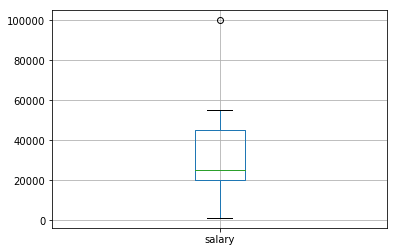

In [398]:
df.boxplot(column='salary', sym='o', return_type='axes')

The box part is 25%-75%, with the red line being the median. The **whiskers** are usually the maximum and minimum, but `matplotlib`/`pandas` likes to display it as "oh this is where nice values live" (a.k.a. IQR 1.5). We can make it do max and min by passing `whis='range'` when we make the box plot.

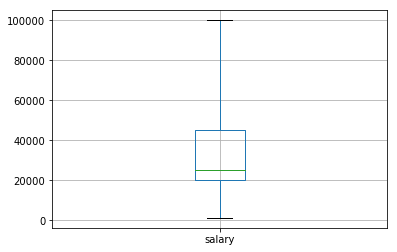

In [399]:
df.boxplot(column='salary', sym='o', whis='range', return_type='axes')

## 4. Variation 

I'm going to steal a set of numbers from [Khan Academy](https://www.khanacademy.org/math/probability/descriptive-statistics/variance-std-deviation/v/range-variance-and-standard-deviation-as-measures-of-dispersion). Let's say we have two very boring sets of numbers.

In [400]:
list_one = pd.Series([-10, 0, 10, 20, 30])
list_two = pd.Series([8, 9, 10, 11, 12])
print("list one is")
print(list_one)
print("list two is")
print(list_two)

list one is
0   -10
1     0
2    10
3    20
4    30
dtype: int64
list two is
0     8
1     9
2    10
3    11
4    12
dtype: int64


Let's use their central tendencies to describe them.

In [401]:
print("The mean of list_one is", list_one.mean())
print("The mean of list_two is", list_one.mean())
print("The median of list_one is", list_one.median())
print("The median of list_two is", list_one.median())

The mean of list_one is 10.0
The mean of list_two is 10.0
The median of list_one is 10.0
The median of list_two is 10.0


Huh! But I mean, let's be honest: THESE LISTS OF NUMBERS ARE VERY DIFFERENT. If their central tendencies are the same, the way to describe them, then, is to talk about the *spread*, or how the actual numbers themselves are distributed.

So we learned about the **range** before, it's the difference between the smallest and largest number.

* For `[-10, 0, 10, 20, 30]`, the range is `40`. It's much more dispersed.
* For `[8, 9, 10, 11, 12]`, the range is `4`. It's much tighter.

That's helpful! But there are more ways to measure the spread than just range.

## Measures of variation (spread)

Along with range, there are two other things we need to learn about how these numbers are distributed: **variance** and **standard deviation**.

* **Range** is the difference between the largest and smallest number
* **Variance** is difference between each data point and the mean, squared. 
* **Standard deviation** is the square root of the variance.

### 4.1. Range

In [402]:
# Data points [-10, 0, 10, 20, 30]

(30) - (-10)

40

In [403]:
# Data points [8, 9, 10, 11, 12]

In [404]:
(12) - (8)

4

### 4.2. Variance

Each data point, subtracted from the mean, squared, and then you add all that together. It looks like this:

In [405]:
# Data points [-10, 0, 10, 20, 30]
# Mean: 10
((-10 - 10)**2 + (0 - 10)**2 + (10 - 10)**2 + (20 - 10)**2 + (30 - 10)**2) / 5

200.0

In [406]:
# Data points [8, 9, 10, 11, 12]
# Mean: 10
((8 - 10)**2 + (9 - 10)**2 + (10 - 10)**2 + (11 - 10)**2 + (12 - 10)**2) / 5

2.0

In [407]:
# And pandas agrees
# Why ddof=0? it has to do with sample variance. 
# Means Delta Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number of elements. 
# By default ddof is zero.
print(list_one.var(ddof=0))
print(list_two.var(ddof=0))

200.0
2.0


So first, the first data set has a much higher variance than the first variance.

### 4.3. Standard deviation

In [408]:
import math

In [409]:
# Data points [-10, 0, 10, 20, 30]
# Variance: 200
math.sqrt(200)

14.142135623730951

In [410]:
# Data points [8, 9, 10, 11, 12]
# Variance: 2.0
math.sqrt(2)

1.4142135623730951

The first data set has ten times the standard deviation than the second data set!" which he is really excited about. Since the standard deviation is 10x larger, think about it as "generally, a data point in the first data set is 10x further from the mean than in the second data set."

## Measures of variation (spread) recap

Range is easy. Variance and standard deviation are a little tougher - think of them as **measurements of how far away from the mean your data generally is**. High variance/standard deviation = numbers are generally spread out. Small variance/standard deviation = numbers are generally closer to the mean.

Range of Salaries:

In [411]:
df['salary'].max() - df['salary'].min()

98800

Standard deviation of Salaries:

In [412]:
df['salary'].std()

32530.805912754964

Variance of Salaries:

In [413]:
df['salary'].var()

1058253333.3333334

## 5. Finding outliers

Standard deviation is helpful because it describes how far away from the mean your data generally is. We can use this to **find data points that are usually far from the mean.** These are outliers!

In [414]:
df.sort_values(by='salary', ascending=False).head(3)

,name,salary
6,Bill Gates,100000
2,James,55000
3,John,35000


In [415]:
df['salary_std'] = ((df['salary'] - df['salary'].mean()).apply(abs) / df['salary'].std())

In [416]:
df.sort_values(by='salary', ascending=False).head(3)

,name,salary,salary_std
6,Bill Gates,100000,1.949
2,James,55000,0.566
3,John,35000,0.049


That is, Bill Gates, **two standard deviations away from the mean.** Generally, 3.0 is considered a extreme outlier. 1.5 is considered *maybe* an outlier, but probably not really. We can see how many standard deviations they are away from the mean.

In [417]:
df

,name,salary,salary_std
0,Smushface,1200,1.088
1,Jen,25000,0.357
2,James,55000,0.566
3,John,35000,0.049
4,Josephine,25000,0.357
5,Jacques,15000,0.664
6,Bill Gates,100000,1.949


Box-and-whisker plot of salaries with uncleaned data.

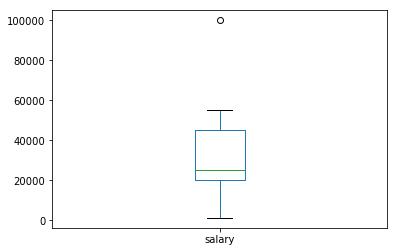

In [418]:
df['salary'].plot(kind='box')

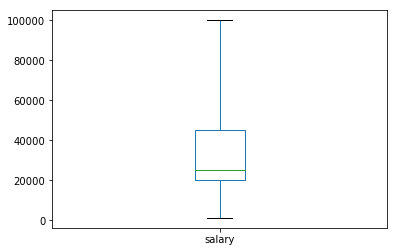

In [419]:
df['salary'].plot(kind='box', whis='range')

Histogram of salaries with uncleaned data.

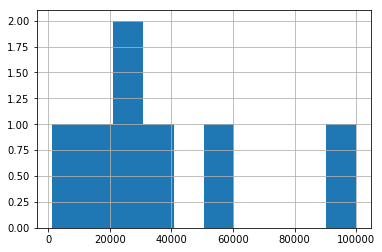

In [420]:
df['salary'].hist()

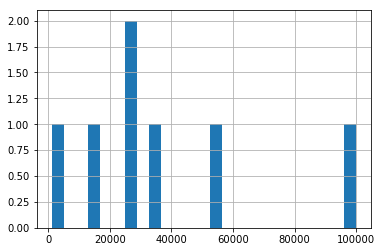

In [421]:
df['salary'].hist(bins=25)

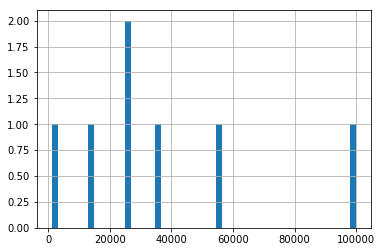

In [422]:
df['salary'].hist(bins=50)

The salary data is called a **normal distribution**. You can look for outliers. 

Only keep people with a standard deviation of less than 1.5.


In [423]:
cleaned_df = df[df['salary_std'] < 1.5]

In [424]:
cleaned_df

,name,salary,salary_std
0,Smushface,1200,1.088
1,Jen,25000,0.357
2,James,55000,0.566
3,John,35000,0.049
4,Josephine,25000,0.357
5,Jacques,15000,0.664


In [425]:
cleaned_df['salary'].describe()

count       6.000
mean    26033.333
std     18221.050
min      1200.000
25%     17500.000
50%     25000.000
75%     32500.000
max     55000.000
Name: salary, dtype: float64

Now that we got rid of some people, we can also recalculate the standard deviation! Remember, standard deviation is a relationship to the **mean**, and **outliers move the mean**.

In [426]:
cleaned_df2['new_salary_std'] = ((cleaned_df2['salary'] - cleaned_df2['salary'].mean()).apply(abs) / cleaned_df2['salary'].std())
cleaned_df2.sort_values(by='new_salary_std', ascending=False).head(5)

C:\Users\francisco.sacramento\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,name,salary,salary_std,new_salary_std
2,James,55000.000,0.566,1.590
0,Smushface,1200.000,1.088,1.363
5,Jacques,15000.000,0.664,0.606
3,John,35000.000,0.049,0.492
1,Jen,25000.000,0.357,0.057


In [427]:
cleaned_df2

,name,salary,salary_std,new_salary_std
0,Smushface,1200.000,1.088,1.363
1,Jen,25000.000,0.357,0.057
2,James,55000.000,0.566,1.590
3,John,35000.000,0.049,0.492
4,Josephine,25000.000,0.357,0.057
5,Jacques,15000.000,0.664,0.606
new_salary_std,NaN,nan,nan,nan


In [428]:
cleaned_df3 = pd.DataFrame([
 { 'name': 'Smushface', 'salary': 1200, 'salary_std': 1.088  } ,
 { 'name': 'Jen', 'salary': 25000, 'salary_std': 0.357 },
 { 'name': 'James', 'salary': 55000, 'salary_std': 0.566 },
 { 'name': 'John', 'salary': 35000, 'salary_std': 0.049 },
 { 'name': 'Josephine', 'salary': 25000, 'salary_std': 0.357 },
 { 'name': 'Jacques', 'salary': 15000, 'salary_std': 0.664 }, 
])
cleaned_df3

,name,salary,salary_std
0,Smushface,1200,1.088
1,Jen,25000,0.357
2,James,55000,0.566
3,John,35000,0.049
4,Josephine,25000,0.357
5,Jacques,15000,0.664


In [429]:
cleaned_df3['new_salary_std'] = ((cleaned_df3['salary'] - cleaned_df3['salary'].mean()).apply(abs) / cleaned_df3['salary'].std())
cleaned_df3.sort_values(by='new_salary_std', ascending=False).head(5)

,name,salary,salary_std,new_salary_std
2,James,55000,0.566,1.590
0,Smushface,1200,1.088,1.363
5,Jacques,15000,0.664,0.606
3,John,35000,0.049,0.492
1,Jen,25000,0.357,0.057


In [430]:
cleaned_df3

,name,salary,salary_std,new_salary_std
0,Smushface,1200,1.088,1.363
1,Jen,25000,0.357,0.057
2,James,55000,0.566,1.590
3,John,35000,0.049,0.492
4,Josephine,25000,0.357,0.057
5,Jacques,15000,0.664,0.606


Box-and-whisker plot of weights with cleaned data

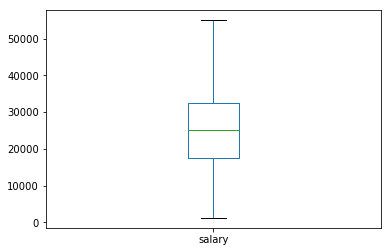

In [431]:
cleaned_df3['salary'].plot(kind='box')

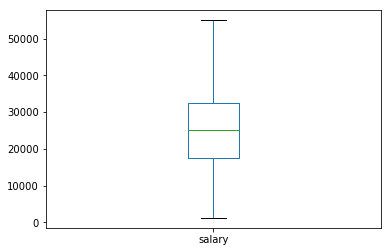

In [432]:
cleaned_df3['salary'].plot(kind='box', whis='range')

Histogram of salaries with cleaned data.

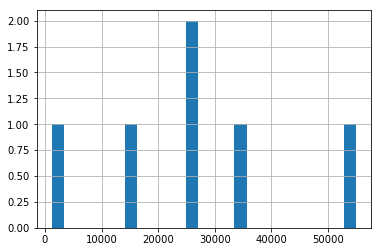

In [433]:
cleaned_df3['salary'].hist(bins=25)

## 6. Skewness of Salary values

Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive or negative, or undefined.

- Negative skew: The left tail is longer; the mass of the distribution is concentrated on the right of the figure. The distribution is said to be left-skewed, left-tailed, or skewed to the left, despite the fact that the curve itself appears to be skewed or leaning to the right; left instead refers to the left tail being drawn out and, often, the mean being skewed to the left of a typical center of the data. A left-skewed distribution usually appears as a right-leaning curve.

- positive skew: The right tail is longer; the mass of the distribution is concentrated on the left of the figure. The distribution is said to be right-skewed, right-tailed, or skewed to the right, despite the fact that the curve itself appears to be skewed or leaning to the left; right instead refers to the right tail being drawn out and, often, the mean being skewed to the right of a typical center of the data. A right-skewed distribution usually appears as a left-leaning curve.

https://en.wikipedia.org/wiki/Skewness

In [434]:
df['salary'].skew()

1.3793218280566242

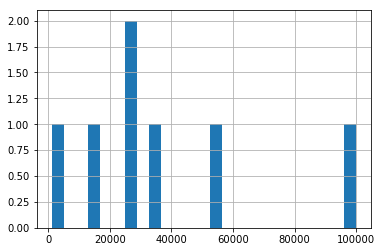

In [435]:
df['salary'].hist(bins=25)

In [436]:
cleaned_df3['salary'].skew()

0.41487678990514965

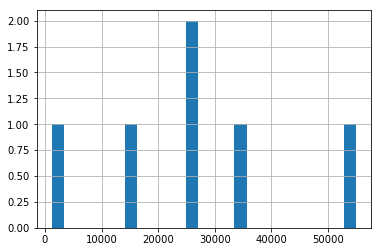

In [437]:
cleaned_df3['salary'].hist(bins=25)

## 7. Kurtosis of Salary values

Kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable. In a similar way to the concept of skewness, kurtosis is a descriptor of the shape of a probability distribution and, just as for skewness, there are different ways of quantifying it for a theoretical distribution and corresponding ways of estimating it from a sample from a population.

- The kurtosis of any univariate normal distribution is 3. 
- It is common to compare the kurtosis of a distribution to this value. 
- Distributions with kurtosis less than 3 are said to be platykurtic, although this does not imply the distribution is "flat-topped" as sometimes reported. Rather, it means the distribution produces fewer and less extreme outliers than does the normal distribution. 
- Distributions with kurtosis greater than 3 are said to be leptokurtic.
 
https://medical-dictionary.thefreedictionary.com/Platykurtic+distribution

In [438]:
df['salary'].kurt()

2.1405862367985238

In [439]:
cleaned_df3['salary'].kurt()

0.7712638454822196